In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=np.inf)

In [46]:
dir_final_save  = 'D:/rohan/thesis/Projects/Machine_Learning/Data/Combined_Data/'
dir_block_save  = 'D:/rohan/thesis/Projects/Machine_Learning/Data/Combined_Data/Blockwise/'
dir_blisk_save  = 'D:/rohan/thesis/Projects/Machine_Learning/Data/Combined_Data/Blisk/'

In [75]:
print('Enter 1 for single file training, 2 for blockwise training, 3 for full-blisk training')

def single():
    dir_final_save  = 'D:/rohan/thesis/Projects/Machine_Learning/Data/Combined_Data/'
    print('Input block number and angle')
    block = input()
    angle = input()
    df = pd.read_excel(str(dir_final_save)+'finaldf_forward_with_compensation'+str(block)+'__'+str(int(angle))+'.xlsx')
    print(df.shape)
    return df

def block():
    dir_block_save  = 'D:/rohan/thesis/Projects/Machine_Learning/Data/Combined_Data/Blockwise/'
    print('Input block number')
    block = input()
    df = pd.read_csv(str(dir_block_save)+str(block)+'.csv')
    print(df.shape)
    return df
    
def blisk():
    dir_blisk_save  = 'D:/rohan/thesis/Projects/Machine_Learning/Data/Combined_Data/Blisk/'
    df = pd.read_csv(str(dir_blisk_save)+'cleaned_full_blisk'+'.csv', mode='a', chunksize='10000',index=False)
    print(df.shape)
    return df
    
switch = { 
           1 : single,
           2 : block,
           3 : blisk,
          }

df = switch[int(input())]()

Enter 1 for single file training, 2 for blockwise training, 3 for full-blisk training
2
Input block number
1030
(570085, 75)


In [92]:
print(df.columns, len(df.columns))
df.iloc[0:5]

Index(['Leading angle', 'Side tilt angle', 'Surface Contact point X',
       'Surface contact point Y', 'Surface contact point z',
       'Surface Orietation X', 'Surface Orietation Y', 'Surface Orietation Z',
       'Tool Tip Point X', 'Tool Tip Point Y', 'Tool Tip Point Z',
       'Tool Orientation X', 'Tool Orientation Y', 'Tool Orientation Z',
       'Closes Point Distance (Surface Contact Point - Acquired TCP 1030 blade0)',
       'time', 'MachineX', 'MachineY', 'MachineZ', 'MachineA', 'MachineC',
       'LoadSpindle', 'TransfX', 'TransfY', 'TransfZ', 'TransfI', 'TransfJ',
       'TransfK', 'executionDuration', 'previousExecutionDuration',
       'relativeTimetoPreviousCall program number', 'timeStamp', 'Tool Length',
       'Tool Radius', 'G54-X', 'G54-Y', 'G54-Z', 'G54-A', 'G54-C',
       'ProgNumber', 'Blade', 'Fx_mean', 'Fy_mean', 'Fz_mean', 'Mz_mean',
       'Fc_mean', 'Fa_mean', 'FcN_mean', 'Fres_mean', 'Fx_sigma', 'Fy_sigma',
       'Fz_sigma', 'Mz_sigma', 'Fc_sigma', 'Fa_s

Leading angle  Side tilt angle  Surface Contact point X  \
0      -0.046109         0.916268                19.488772   
1      -0.048700         0.917067                19.761765   
2      -0.048730         0.917819                20.044074   
3      -0.050592         0.918638                20.322761   
4      -0.051468         0.919445                20.601555   

   Surface contact point Y  Surface contact point z  Surface Orietation X  \
0               220.138764                37.931995              0.437120   
1               220.114566                38.083267              0.438986   
2               220.088903                38.239816              0.439272   
3               220.063471                38.394408              0.440167   
4               220.037474                38.549146              0.441022   

   Surface Orietation Y  Surface Orietation Z  Tool Tip Point X  \
0              0.565013             -0.699776         21.651474   
1              0.564308             -0.699177         21.933039   
2              0.563791             -0.699415         22.214493   
3              0.563172             -0.699350         22.496054   
4              0.562590             -0.699280         22.777538   

   Tool Tip Point Y  Tool Tip Point Z  Tool Orientation X  Tool Orientation Y  \
0        217.548248         33.832752            0.076779            0.996907   
1        217.519989         33.985321            0.077218            0.996880   
2        217.491379         34.138046            0.077645            0.996853   
3        217.462387         34.290527            0.078062            0.996827   
4        217.433044         34.443100            0.078469            0.996802   

   Tool Orientation Z  \
0           -0.016745   
1           -0.016362   
2           -0.015961   
3           -0.015546   
4           -0.015113   

   Closes Point Distance (Surface Contact Point - Acquired TCP 1030 blade0)  \
0                                           6.079108                          
1                                           6.078589                          
2                                           6.078344                          
3                                           6.078300                          
4                                           6.078251                          

         time  MachineX   MachineY   MachineZ  MachineA   MachineC  \
0  132.738750 -94.90060 -113.36510 -170.47040 -87.19120  328.61320   
1  132.752502 -94.98910 -113.29380 -170.38160 -87.12930  328.51710   
2  132.767502 -95.08000 -113.21140 -170.28780 -87.06430  328.42030   
3  132.769002 -95.24426 -113.10088 -170.22710 -86.99312  328.30626   
4  130.636253 -94.33695 -113.36445 -169.75185 -87.02565  328.49170   

   LoadSpindle    TransfX     TransfY    TransfZ   TransfI   TransfJ  \
0    11.213636  21.853771  218.026539  33.429709  0.663812  0.217602   
1    11.213636  22.122596  218.000895  33.576253  0.723514  0.162299   
2    11.213636  22.391384  217.974918  33.722705  0.777507  0.096804   
3    11.091818  22.640012  217.951940  33.858208  0.720344 -0.038818   
4    11.213636  22.985319  217.995685  34.035789  0.764042  0.136074   

    TransfK  executionDuration  previousExecutionDuration  \
0  0.715544           0.003418                   0.003768   
1  0.670959           0.005353                   0.004495   
2  0.621379           0.004671                   0.005334   
3  0.554892           0.005398                   0.005213   
4  0.587867           0.004505                   0.004749   

   relativeTimetoPreviousCall program number     timeStamp  Tool Length  \
0                                   0.006865  6.375063e+10     226.4591   
1                                   0.008129  6.375063e+10     226.4591   
2                                   0.007162  6.375063e+10     226.4591   
3                                   0.007447  6.375063e+10     226.4591   
4                                   0.007471  6.375063e

In [93]:
def data(df):
    X = df.drop(['Tool Point Deviation'], axis=1).copy(deep=True).to_numpy(dtype=np.float64)
    y = df['Tool Point Deviation'].copy(deep=True).to_numpy(dtype=np.float64)
    return X,y

In [94]:
X,y = data(df)

In [114]:
# Normalization

scaler1 = MinMaxScaler(feature_range=(0,1))
scaler1.fit(X)
X_scaled = scaler1.transform(X)
# scaler1.inverse_transform(X_scaled)

scaler2 = MinMaxScaler(feature_range=(0,1))
scaler2.fit(y[:,np.newaxis])
y_scaled = scaler2.transform(y[:,np.newaxis])
# scaler2.inverse_transform(y_scaled)

In [115]:
initializer1 = tf.keras.initializers.GlorotUniform()
initializer2 = tf.keras.initializers.HeNormal()

inputs = tf.keras.Input(shape=(X.shape[1]), dtype=tf.float64) 
x = layers.Dense(64, activation="relu",  kernel_initializer=initializer2)(inputs)
x = layers.Dense(128, activation="relu",  kernel_initializer=initializer2)(x)
#x = layers.Dense(128, activation="tanh", kernel_initializer=initializer1)(x)
#x = layers.Dense(64, activation="relu", kernel_initializer=initializer2)(x)
outputs = layers.Dense(1, activation="linear",kernel_initializer=initializer2)(x)

In [116]:
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="functional_model")
model.summary()

Model: "functional_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 74)]              0         
_________________________________________________________________
dense_33 (Dense)             (None, 64)                4800      
_________________________________________________________________
dense_34 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 129       
Total params: 13,249
Trainable params: 13,249
Non-trainable params: 0
_________________________________________________________________


In [117]:
#tf.keras.utils.plot_model(model, "functional_model.png", show_shapes=True)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.33, random_state=42, shuffle=True)

In [122]:
model.compile(
    loss = tf.keras.losses.MeanSquaredError(reduction="auto", name="mse"),
    #loss = tf.keras.losses.Huber(name='huber_loss'),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = [tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.RootMeanSquaredError()],
             )


In [123]:
early_stopping = EarlyStopping(monitor='val_loss', patience=100, mode='min')
model_checkpoint = ModelCheckpoint('custom_model.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

In [124]:
history = model.fit(X_train, y_train, epochs=1000,validation_data=(X_test,y_test), verbose=1,callbacks=[early_stopping,model_checkpoint], batch_size = 100)

Epoch 1/1000
3820/3820 [==============================] - 4s 1ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0479 - val_loss: 4.8954e-04 - val_mean_squared_error: 4.8954e-04 - val_root_mean_squared_error: 0.0221

Epoch 00001: val_loss improved from inf to 0.00049, saving model to custom_model.h5
Epoch 2/1000
3820/3820 [==============================] - 4s 1ms/step - loss: 5.6493e-04 - mean_squared_error: 5.6493e-04 - root_mean_squared_error: 0.0238 - val_loss: 8.0982e-04 - val_mean_squared_error: 8.0982e-04 - val_root_mean_squared_error: 0.0285

Epoch 00002: val_loss did not improve from 0.00049
Epoch 3/1000
3820/3820 [==============================] - 4s 1ms/step - loss: 5.4895e-04 - mean_squared_error: 5.4895e-04 - root_mean_squared_error: 0.0234 - val_loss: 5.0409e-04 - val_mean_squared_error: 5.0409e-04 - val_root_mean_squared_error: 0.0225

Epoch 00003: val_loss did not improve from 0.00049
Epoch 4/1000
3820/3820 [==============================] -

3820/3820 [==============================] - 5s 1ms/step - loss: 2.0505e-04 - mean_squared_error: 2.0505e-04 - root_mean_squared_error: 0.0143 - val_loss: 1.4958e-04 - val_mean_squared_error: 1.4958e-04 - val_root_mean_squared_error: 0.0122

Epoch 00052: val_loss improved from 0.00015 to 0.00015, saving model to custom_model.h5
Epoch 53/1000
3820/3820 [==============================] - 5s 1ms/step - loss: 2.0319e-04 - mean_squared_error: 2.0319e-04 - root_mean_squared_error: 0.0143 - val_loss: 2.1851e-04 - val_mean_squared_error: 2.1851e-04 - val_root_mean_squared_error: 0.0148

Epoch 00053: val_loss did not improve from 0.00015
Epoch 54/1000
3820/3820 [==============================] - 4s 1ms/step - loss: 2.0169e-04 - mean_squared_error: 2.0169e-04 - root_mean_squared_error: 0.0142 - val_loss: 1.6723e-04 - val_mean_squared_error: 1.6723e-04 - val_root_mean_squared_error: 0.0129

Epoch 00054: val_loss did not improve from 0.00015
Epoch 55/1000
3820/3820 [==============================]


Epoch 00078: val_loss did not improve from 0.00015
Epoch 79/1000
3820/3820 [==============================] - 4s 1ms/step - loss: 1.9018e-04 - mean_squared_error: 1.9018e-04 - root_mean_squared_error: 0.0138 - val_loss: 1.9303e-04 - val_mean_squared_error: 1.9303e-04 - val_root_mean_squared_error: 0.0139

Epoch 00079: val_loss did not improve from 0.00015
Epoch 80/1000
3820/3820 [==============================] - 4s 1ms/step - loss: 1.8992e-04 - mean_squared_error: 1.8992e-04 - root_mean_squared_error: 0.0138 - val_loss: 2.8498e-04 - val_mean_squared_error: 2.8498e-04 - val_root_mean_squared_error: 0.0169

Epoch 00080: val_loss did not improve from 0.00015
Epoch 81/1000
3820/3820 [==============================] - 4s 1ms/step - loss: 1.9353e-04 - mean_squared_error: 1.9353e-04 - root_mean_squared_error: 0.0139 - val_loss: 2.2712e-04 - val_mean_squared_error: 2.2712e-04 - val_root_mean_squared_error: 0.0151

Epoch 00081: val_loss did not improve from 0.00015
Epoch 82/1000
3820/3820 [==

KeyboardInterrupt: 

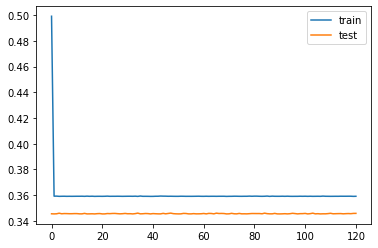

In [125]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')

plt.legend()
plt.show()


In [126]:
y_pred = model.predict(X_test)

In [132]:
for i in np.arange(X_test.shape[0]):
    print(i,y_test[i], y_pred[i])

0 [0.02152349] [0.06943702]
1 [0.05390305] [0.07906284]
2 [0.08310122] [0.11324783]
3 [0.05021123] [0.06825639]
4 [0.05992243] [0.08407111]
5 [0.40339748] [0.4199177]
6 [0.08335164] [0.11864003]
7 [0.09955712] [0.08775219]
8 [0.10365147] [0.10970011]
9 [0.35315069] [0.3575849]
10 [0.57112104] [0.58528733]
11 [0.08769981] [0.09078802]
12 [0.3248953] [0.33168134]
13 [0.04829878] [0.06968585]
14 [0.10578243] [0.09947439]
15 [0.2525051] [0.25856513]
16 [0.10506723] [0.10276573]
17 [0.11479593] [0.13142644]
18 [0.12289093] [0.125253]
19 [0.10483298] [0.10462856]
20 [0.0747043] [0.07836246]
21 [0.91579588] [0.93158674]
22 [0.25907744] [0.27813375]
23 [0.48941794] [0.506832]
24 [0.1758386] [0.1851801]
25 [0.14842083] [0.15119053]
26 [0.0810112] [0.09719027]
27 [0.06629506] [0.07836741]
28 [0.22561719] [0.24013577]
29 [0.24605223] [0.26744622]
30 [0.09836257] [0.10022932]
31 [0.10299251] [0.12277071]
32 [0.10360366] [0.11237395]
33 [0.03130638] [0.05655546]
34 [0.89645516] [0.915859]
35 [0.372

562 [0.14592456] [0.15043631]
563 [0.52299591] [0.5351357]
564 [0.06781012] [0.07023624]
565 [0.76574046] [0.780324]
566 [0.07333081] [0.08348564]
567 [0.24377906] [0.23939286]
568 [0.08014047] [0.100911]
569 [0.07172315] [0.07644503]
570 [0.08146911] [0.11636691]
571 [0.7679008] [0.75541]
572 [0.16446361] [0.17917222]
573 [0.03117838] [0.04868083]
574 [0.09044044] [0.10366341]
575 [0.18988136] [0.21579319]
576 [0.0805281] [0.08495227]
577 [0.11912988] [0.13232355]
578 [0.0403061] [0.04792455]
579 [0.20902598] [0.2400073]
580 [0.47971263] [0.47212067]
581 [0.841615] [0.85505354]
582 [0.28764914] [0.31856358]
583 [0.24037327] [0.26410088]
584 [0.06442476] [0.0731771]
585 [0.62035964] [0.62301844]
586 [0.10502193] [0.10742214]
587 [0.17475567] [0.19808483]
588 [0.10546869] [0.12565838]
589 [0.04148805] [0.06171886]
590 [0.18503178] [0.19772042]
591 [0.40136159] [0.39938492]
592 [0.22584701] [0.23943007]
593 [0.12998827] [0.13615105]
594 [0.03700004] [0.05472109]
595 [0.21030636] [0.20305

1132 [0.13316509] [0.13794723]
1133 [0.53788717] [0.56364566]
1134 [0.05133703] [0.08450717]
1135 [0.0534625] [0.06194584]
1136 [0.54255869] [0.55220985]
1137 [0.32928313] [0.33109957]
1138 [0.16318755] [0.18115821]
1139 [0.10852279] [0.11536335]
1140 [0.09752123] [0.09935528]
1141 [0.1414022] [0.16776273]
1142 [0.09991671] [0.11334516]
1143 [0.79807673] [0.82337624]
1144 [0.08469401] [0.07336003]
1145 [0.10311532] [0.08649891]
1146 [0.11156979] [0.10175338]
1147 [0.08062375] [0.087934]
1148 [0.32252563] [0.35995322]
1149 [0.09016369] [0.09897781]
1150 [0.09958967] [0.10950661]
1151 [0.0734767] [0.08944295]
1152 [0.12608166] [0.1166679]
1153 [0.19487761] [0.22045325]
1154 [0.14382177] [0.1592807]
1155 [0.12699424] [0.13855055]
1156 [0.25933937] [0.272067]
1157 [0.07207388] [0.08845887]
1158 [0.17199707] [0.19960445]
1159 [0.08064002] [0.08561248]
1160 [0.20209367] [0.22812875]
1161 [0.14996187] [0.1749028]
1162 [0.06624666] [0.09830293]
1163 [0.08266926] [0.07920192]
1164 [0.03749319] 

1728 [0.21762518] [0.23145828]
1729 [0.04705889] [0.0732306]
1730 [0.10968547] [0.12292105]
1731 [0.06641809] [0.08942173]
1732 [0.20432125] [0.23244613]
1733 [0.1169831] [0.11478394]
1734 [0.03746728] [0.05644676]
1735 [0.19327607] [0.21124014]
1736 [0.22691856] [0.2595066]
1737 [0.24252504] [0.26269743]
1738 [0.07535359] [0.07831031]
1739 [0.05864259] [0.06104711]
1740 [0.09441755] [0.12075352]
1741 [0.127149] [0.14521496]
1742 [0.73603251] [0.7619723]
1743 [0.03612148] [0.07298265]
1744 [0.09976462] [0.09770086]
1745 [0.7606451] [0.78779423]
1746 [0.17396964] [0.16601384]
1747 [0.11721329] [0.1301024]
1748 [0.09040191] [0.07963534]
1749 [0.21257317] [0.22443658]
1750 [0.2225579] [0.20604984]
1751 [0.92344076] [0.94991493]
1752 [0.06532509] [0.08890458]
1753 [0.29523415] [0.3246719]
1754 [0.11191188] [0.13225698]
1755 [0.11590516] [0.12559615]
1756 [0.10431621] [0.09997799]
1757 [0.10663268] [0.11005859]
1758 [0.3900323] [0.41023672]
1759 [0.21274378] [0.22846438]
1760 [0.09539358] [

2327 [0.11541155] [0.12234053]
2328 [0.0606577] [0.0823563]
2329 [0.21896733] [0.23253238]
2330 [0.04247532] [0.04996277]
2331 [0.10243387] [0.09955288]
2332 [0.24942059] [0.27203482]
2333 [0.05362783] [0.05879839]
2334 [0.05720556] [0.06208204]
2335 [0.06489676] [0.08193656]
2336 [0.04398359] [0.06573988]
2337 [0.3258104] [0.3431917]
2338 [0.04948933] [0.05911139]
2339 [0.12545135] [0.13324447]
2340 [0.10298474] [0.08524089]
2341 [0.43394462] [0.4412422]
2342 [0.59334501] [0.5986099]
2343 [0.01613808] [0.04438256]
2344 [0.14943027] [0.1471653]
2345 [0.04126622] [0.07732337]
2346 [0.36150525] [0.40137982]
2347 [0.0707436] [0.08907028]
2348 [0.190568] [0.21034871]
2349 [0.8546554] [0.86653113]
2350 [0.03516621] [0.04955869]
2351 [0.14515001] [0.1693242]
2352 [0.22390288] [0.24698804]
2353 [0.04724279] [0.06717151]
2354 [0.10484741] [0.11843807]
2355 [0.35323463] [0.3580134]
2356 [0.11037683] [0.1003224]
2357 [0.09689402] [0.09862803]
2358 [0.02099931] [0.04229983]
2359 [0.06940985] [0.0

2934 [0.06274381] [0.08221498]
2935 [0.1912352] [0.1832451]
2936 [0.09448318] [0.11588662]
2937 [0.16519297] [0.17314403]
2938 [0.08179848] [0.07673953]
2939 [0.07038976] [0.07518651]
2940 [0.19621071] [0.2158374]
2941 [0.08674693] [0.09650773]
2942 [0.21384339] [0.25154677]
2943 [0.07090223] [0.08190607]
2944 [0.06537995] [0.08891109]
2945 [0.11287036] [0.11515255]
2946 [0.04759437] [0.04646012]
2947 [0.39965124] [0.42721888]
2948 [0.12715564] [0.14165291]
2949 [0.09054862] [0.10917427]
2950 [0.76473858] [0.8014491]
2951 [0.18598838] [0.18749174]
2952 [0.09516814] [0.10173739]
2953 [0.06532674] [0.07203135]
2954 [0.96362862] [0.96208453]
2955 [0.14541885] [0.13895585]
2956 [0.78695776] [0.8105469]
2957 [0.12407427] [0.14617431]
2958 [0.1032144] [0.1249535]
2959 [0.21714998] [0.23730777]
2960 [0.93842173] [0.9294795]
2961 [0.0600399] [0.07156198]
2962 [0.05676307] [0.07500772]
2963 [0.22577346] [0.24886663]
2964 [0.16107136] [0.19011015]
2965 [0.21002187] [0.22312233]
2966 [0.19405952]

3475 [0.05249726] [0.07046325]
3476 [0.13017492] [0.13186824]
3477 [0.67343949] [0.6888974]
3478 [0.12456666] [0.14520851]
3479 [0.23647739] [0.27134308]
3480 [0.05542939] [0.0792589]
3481 [0.0651923] [0.07417654]
3482 [0.14757825] [0.16602388]
3483 [0.08888594] [0.09718981]
3484 [0.2705029] [0.29489043]
3485 [0.90826616] [0.9250605]
3486 [0.05976463] [0.08148073]
3487 [0.00822216] [0.05048189]
3488 [0.1093177] [0.10910107]
3489 [0.17707238] [0.20642664]
3490 [0.14727192] [0.16261002]
3491 [0.08953176] [0.09568451]
3492 [0.09173144] [0.09948631]
3493 [0.04654828] [0.07028785]
3494 [0.15339154] [0.18029658]
3495 [0.18710847] [0.1980808]
3496 [0.02427349] [0.06394872]
3497 [0.0861603] [0.10064892]
3498 [0.04055415] [0.06244507]
3499 [0.32897715] [0.3391693]
3500 [0.09437619] [0.10200015]
3501 [0.02736359] [0.05305804]
3502 [0.07975795] [0.08095296]
3503 [0.03097884] [0.04471775]
3504 [0.1262871] [0.14379163]
3505 [0.19855517] [0.20640342]
3506 [0.19301436] [0.20661838]
3507 [0.66107193] 

4085 [0.18917045] [0.20257154]
4086 [0.15533124] [0.19267067]
4087 [0.37554587] [0.4080484]
4088 [0.18238758] [0.19042833]
4089 [0.05423209] [0.07296411]
4090 [0.25250909] [0.26730195]
4091 [0.07044804] [0.09394673]
4092 [0.83341622] [0.8525009]
4093 [0.1535975] [0.14968516]
4094 [0.0312562] [0.05972126]
4095 [0.19297755] [0.19963023]
4096 [0.91353129] [0.9324467]
4097 [0.28365004] [0.2948251]
4098 [0.90944715] [0.93753314]
4099 [0.23827926] [0.25703833]
4100 [0.15979439] [0.18238486]
4101 [0.09467233] [0.08825981]
4102 [0.12507831] [0.10550281]
4103 [0.14650444] [0.15261209]
4104 [0.57419072] [0.60562277]
4105 [0.12866715] [0.11828972]
4106 [0.09490657] [0.12341708]
4107 [0.16118299] [0.1736429]
4108 [0.04664807] [0.04374174]
4109 [0.11198243] [0.12626529]
4110 [0.14194563] [0.14820038]
4111 [0.06846294] [0.08234631]
4112 [0.07462913] [0.07258514]
4113 [0.04207278] [0.0570929]
4114 [0.10115845] [0.09551086]
4115 [0.08666166] [0.09496117]
4116 [0.20807093] [0.22761631]
4117 [0.23563526

4627 [0.13055456] [0.12182149]
4628 [0.08831799] [0.08149077]
4629 [0.08915545] [0.08524849]
4630 [0.10082972] [0.09770813]
4631 [0.0436775] [0.05757712]
4632 [0.13525281] [0.15286939]
4633 [0.46055523] [0.47883675]
4634 [0.08163954] [0.09306585]
4635 [0.0518424] [0.06644356]
4636 [0.10908365] [0.12105392]
4637 [0.10404438] [0.12665321]
4638 [0.10186378] [0.11662936]
4639 [0.05510296] [0.04090837]
4640 [0.12870107] [0.13950092]
4641 [0.11154513] [0.11425057]
4642 [0.08405621] [0.10500559]
4643 [0.62229416] [0.658744]
4644 [0.13954595] [0.12174785]
4645 [0.10491874] [0.1290417]
4646 [0.11732668] [0.12665755]
4647 [0.07733988] [0.08561661]
4648 [0.1371991] [0.1580863]
4649 [0.16270644] [0.17102854]
4650 [0.36000414] [0.3779931]
4651 [0.19030206] [0.20440918]
4652 [0.04847379] [0.06826352]
4653 [0.64751711] [0.64162076]
4654 [0.40557378] [0.42686123]
4655 [0.05821232] [0.07108116]
4656 [0.02333547] [0.06136214]
4657 [0.16326031] [0.1748002]
4658 [0.69325941] [0.70764863]
4659 [0.09729993]

5202 [0.39791211] [0.4241117]
5203 [0.17928627] [0.1843625]
5204 [0.0551394] [0.0727914]
5205 [0.13002583] [0.14195673]
5206 [0.04426864] [0.06021176]
5207 [0.20485619] [0.22782904]
5208 [0.05194657] [0.06284552]
5209 [0.13304327] [0.15487674]
5210 [0.08799108] [0.09918427]
5211 [0.09262911] [0.09642233]
5212 [0.03542804] [0.06205484]
5213 [0.04748357] [0.08431289]
5214 [0.09452846] [0.10615964]
5215 [0.15343304] [0.15192987]
5216 [0.07423221] [0.08582705]
5217 [0.79609304] [0.8060659]
5218 [0.07553235] [0.09612644]
5219 [0.16664966] [0.1772898]
5220 [0.07052311] [0.08361699]
5221 [0.06858986] [0.09016067]
5222 [0.84042206] [0.8758709]
5223 [0.02236212] [0.05156057]
5224 [0.22187408] [0.25198668]
5225 [0.08372312] [0.10219882]
5226 [0.08236307] [0.1040349]
5227 [0.10355688] [0.12196562]
5228 [0.0990326] [0.11150964]
5229 [0.2108797] [0.23965877]
5230 [0.12259736] [0.13075161]
5231 [0.11194707] [0.1200857]
5232 [0.08778036] [0.09188201]
5233 [0.12429877] [0.13388446]
5234 [0.0450826] [0

5756 [0.07613628] [0.08731723]
5757 [0.14558964] [0.1673294]
5758 [0.06201364] [0.08179771]
5759 [0.15830576] [0.17813191]
5760 [0.0691474] [0.07710403]
5761 [0.15912968] [0.19698067]
5762 [0.09475957] [0.10330413]
5763 [0.06754684] [0.07334366]
5764 [0.91100203] [0.95123714]
5765 [0.03729606] [0.04984761]
5766 [0.10634192] [0.11884449]
5767 [0.11360807] [0.12269557]
5768 [0.14128911] [0.14696988]
5769 [0.521382] [0.5210239]
5770 [0.02995178] [0.05574379]
5771 [0.14690243] [0.14440465]
5772 [0.07939121] [0.09129385]
5773 [0.12615213] [0.13840549]
5774 [0.08560227] [0.10613802]
5775 [0.15923942] [0.17356957]
5776 [0.10760802] [0.12355955]
5777 [0.0707118] [0.08095566]
5778 [0.07731773] [0.07652132]
5779 [0.0381571] [0.06818859]
5780 [0.01330593] [0.06370562]
5781 [0.46590707] [0.47572598]
5782 [0.22971742] [0.2650452]
5783 [0.90131139] [0.92332864]
5784 [0.11816664] [0.14024805]
5785 [0.10318607] [0.10650933]
5786 [0.05225272] [0.0675037]
5787 [0.10104804] [0.10602202]
5788 [0.05269578]

6343 [0.12233647] [0.11305987]
6344 [0.15053617] [0.14781608]
6345 [0.06764941] [0.08062269]
6346 [0.87684627] [0.8886236]
6347 [0.14952728] [0.1461179]
6348 [0.11139104] [0.10302015]
6349 [0.11815907] [0.12443423]
6350 [0.09082187] [0.10043295]
6351 [0.38384647] [0.41704038]
6352 [0.11721969] [0.13446991]
6353 [0.10260268] [0.11842607]
6354 [0.19978094] [0.19732654]
6355 [0.16027835] [0.18425527]
6356 [0.03846626] [0.05692635]
6357 [0.07775195] [0.08598694]
6358 [0.06052252] [0.07907126]
6359 [0.9383155] [0.95710075]
6360 [0.13486923] [0.15999827]
6361 [0.07676372] [0.07440682]
6362 [0.10279334] [0.088002]
6363 [0.06156352] [0.0693068]
6364 [0.11537369] [0.12301872]
6365 [0.03127992] [0.05662932]
6366 [0.76092272] [0.7678512]
6367 [0.03836842] [0.05112987]
6368 [0.14143776] [0.15848792]
6369 [0.09924665] [0.09585554]
6370 [0.23473235] [0.23525836]
6371 [0.28809812] [0.314446]
6372 [0.05334259] [0.07034142]
6373 [0.05918951] [0.07558673]
6374 [0.9294206] [0.9564161]
6375 [0.48557554] [

6979 [0.04066765] [0.04198298]
6980 [0.58251946] [0.5631909]
6981 [0.07109242] [0.07171601]
6982 [0.05438025] [0.06141479]
6983 [0.22509637] [0.22929841]
6984 [0.11483868] [0.10856033]
6985 [0.14878521] [0.19110127]
6986 [0.08079025] [0.08459759]
6987 [0.06219548] [0.06967652]
6988 [0.07001525] [0.08590887]
6989 [0.27470501] [0.29219845]
6990 [0.03689453] [0.0605838]
6991 [0.20437355] [0.21788426]
6992 [0.07722988] [0.09471224]
6993 [0.05287177] [0.05268481]
6994 [0.026752] [0.06109609]
6995 [0.03698802] [0.06734297]
6996 [0.53375699] [0.54800016]
6997 [0.11870708] [0.10800695]
6998 [0.20920973] [0.21865298]
6999 [0.04306781] [0.07004084]
7000 [0.76942964] [0.7671461]
7001 [0.12841448] [0.11088441]
7002 [0.05772764] [0.08063999]
7003 [0.16244036] [0.17916936]
7004 [0.16447686] [0.17792931]
7005 [0.35874071] [0.37117964]
7006 [0.20159383] [0.24076965]
7007 [0.1353142] [0.16730358]
7008 [0.13602035] [0.12809776]
7009 [0.02742016] [0.07464767]
7010 [0.33211414] [0.34675974]
7011 [0.055365

7496 [0.78937203] [0.7966404]
7497 [0.05843119] [0.06265201]
7498 [0.14593632] [0.1470587]
7499 [0.18720713] [0.21896654]
7500 [0.29749315] [0.30771923]
7501 [0.06580249] [0.07828182]
7502 [0.23847557] [0.28022534]
7503 [0.08614958] [0.09393626]
7504 [0.03040468] [0.04703813]
7505 [0.17011157] [0.18999135]
7506 [0.09180543] [0.09997921]
7507 [0.92651254] [0.9501888]
7508 [0.05269421] [0.07210948]
7509 [0.0695563] [0.09567513]
7510 [0.06079893] [0.07989477]
7511 [0.09335084] [0.10004843]
7512 [0.13048146] [0.14670734]
7513 [0.15920634] [0.14593719]
7514 [0.15931417] [0.17129552]
7515 [0.06980778] [0.08438577]
7516 [0.04084687] [0.06077829]
7517 [0.09326908] [0.09491473]
7518 [0.68970826] [0.72846174]
7519 [0.10894069] [0.11495441]
7520 [0.53865824] [0.55031437]
7521 [0.07979074] [0.07912736]
7522 [0.07562114] [0.08156155]
7523 [0.0895852] [0.10112975]
7524 [0.09265908] [0.0885533]
7525 [0.07323638] [0.075207]
7526 [0.22990474] [0.2537859]
7527 [0.02080271] [0.05657305]
7528 [0.19785949]

8127 [0.02333317] [0.05686912]
8128 [0.02755121] [0.05871037]
8129 [0.73716672] [0.75379926]
8130 [0.95536333] [0.9391555]
8131 [0.04250266] [0.07085447]
8132 [0.31122875] [0.32990596]
8133 [0.07164507] [0.07704526]
8134 [0.0488134] [0.07151868]
8135 [0.0334385] [0.05540767]
8136 [0.18216404] [0.17431423]
8137 [0.09971634] [0.10563208]
8138 [0.09277618] [0.11796293]
8139 [0.02624195] [0.05530866]
8140 [0.0960343] [0.09501906]
8141 [0.70683487] [0.7184917]
8142 [0.29915037] [0.2991337]
8143 [0.11915077] [0.13863821]
8144 [0.19865488] [0.23787598]
8145 [0.08218628] [0.08994308]
8146 [0.70248375] [0.72517955]
8147 [0.5377509] [0.5379357]
8148 [0.2008132] [0.2101936]
8149 [0.03651592] [0.06053551]
8150 [0.19660146] [0.21387945]
8151 [0.15004852] [0.14240567]
8152 [0.11014448] [0.11505052]
8153 [0.09219506] [0.0985155]
8154 [0.04745604] [0.06068639]
8155 [0.13001507] [0.14696269]
8156 [0.03800749] [0.0529657]
8157 [0.87085912] [0.8927726]
8158 [0.12572672] [0.12958217]
8159 [0.09337565] [0.

8675 [0.09317995] [0.11979982]
8676 [0.0725348] [0.09600458]
8677 [0.16373504] [0.17593838]
8678 [0.13821293] [0.13983661]
8679 [0.07418261] [0.08011505]
8680 [0.1268269] [0.12130614]
8681 [0.52360801] [0.53917205]
8682 [0.06398558] [0.07748612]
8683 [0.02698263] [0.05212265]
8684 [0.0596086] [0.08745272]
8685 [0.24253684] [0.2600261]
8686 [0.04792029] [0.07177024]
8687 [0.28950832] [0.30848658]
8688 [0.20818563] [0.22835222]
8689 [0.43641564] [0.4472802]
8690 [0.06295248] [0.08809949]
8691 [0.19998933] [0.22275253]
8692 [0.13014599] [0.12997279]
8693 [0.17385703] [0.19338071]
8694 [0.13007241] [0.1455525]
8695 [0.17124037] [0.16707842]
8696 [0.06044829] [0.07210693]
8697 [0.21103261] [0.25017712]
8698 [0.24143727] [0.2703785]
8699 [0.32594068] [0.34401375]
8700 [0.1727492] [0.17455669]
8701 [0.07995696] [0.11801698]
8702 [0.16330085] [0.17797428]
8703 [0.03920834] [0.05372705]
8704 [0.95825074] [0.96696603]
8705 [0.07866495] [0.08798225]
8706 [0.06954031] [0.08087889]
8707 [0.07405898

9247 [0.09336922] [0.10394551]
9248 [0.0685933] [0.09522729]
9249 [0.12489865] [0.13299906]
9250 [0.08234531] [0.09688611]
9251 [0.14610099] [0.14983936]
9252 [0.17083871] [0.1808583]
9253 [0.21725138] [0.23178475]
9254 [0.11194527] [0.13552491]
9255 [0.34268878] [0.36747056]
9256 [0.13796956] [0.150806]
9257 [0.12185509] [0.12885794]
9258 [0.79993574] [0.81304777]
9259 [0.11726801] [0.13943337]
9260 [0.07449619] [0.08014098]
9261 [0.6271804] [0.6265272]
9262 [0.13858751] [0.1573111]
9263 [0.05556597] [0.06249776]
9264 [0.90382104] [0.8995318]
9265 [0.2908918] [0.2957891]
9266 [0.08807131] [0.10317601]
9267 [0.16860149] [0.17729273]
9268 [0.12713947] [0.15965039]
9269 [0.09287409] [0.07603689]
9270 [0.08378027] [0.08194686]
9271 [0.20849771] [0.24841383]
9272 [0.16773286] [0.18787494]
9273 [0.13811886] [0.1518165]
9274 [0.32489873] [0.3435948]
9275 [0.05492872] [0.05969136]
9276 [0.03535451] [0.05959824]
9277 [0.41917553] [0.4281628]
9278 [0.10596477] [0.10064369]
9279 [0.20707142] [0.

9814 [0.16285874] [0.16465442]
9815 [0.28066623] [0.31622094]
9816 [0.0734156] [0.07954003]
9817 [0.23141895] [0.2433569]
9818 [0.0183311] [0.04632721]
9819 [0.08410727] [0.08561525]
9820 [0.1091459] [0.11662137]
9821 [0.0645386] [0.08014107]
9822 [0.12869409] [0.10791246]
9823 [0.02695271] [0.05093337]
9824 [0.13180246] [0.13787009]
9825 [0.14277387] [0.14464605]
9826 [0.09373685] [0.09126469]
9827 [0.08947644] [0.1373738]
9828 [0.06285669] [0.08605998]
9829 [0.05467837] [0.05635446]
9830 [0.09866528] [0.10395005]
9831 [0.05230874] [0.06639228]
9832 [0.07676464] [0.0789891]
9833 [0.12170728] [0.14412445]
9834 [0.24315025] [0.27082026]
9835 [0.111992] [0.12029637]
9836 [0.06060453] [0.0723776]
9837 [0.11630047] [0.11130992]
9838 [0.97459821] [0.9807445]
9839 [0.20626764] [0.19099446]
9840 [0.16531776] [0.1830245]
9841 [0.0609582] [0.07392134]
9842 [0.08196732] [0.07410893]
9843 [0.03872673] [0.05701584]
9844 [0.23557073] [0.2529024]
9845 [0.10378461] [0.10763947]
9846 [0.04237089] [0.0

10443 [0.07099965] [0.08150587]
10444 [0.15074784] [0.16675307]
10445 [0.08443279] [0.09709278]
10446 [0.07026762] [0.08188371]
10447 [0.04379497] [0.06218188]
10448 [0.15397849] [0.16239135]
10449 [0.26478093] [0.28826448]
10450 [0.24384564] [0.26753077]
10451 [0.93903707] [0.9265773]
10452 [0.92455364] [0.948359]
10453 [0.15453967] [0.19270475]
10454 [0.04801666] [0.0595241]
10455 [0.16956076] [0.16876458]
10456 [0.05288125] [0.07162993]
10457 [0.29461299] [0.29687083]
10458 [0.92317086] [0.95581716]
10459 [0.09099642] [0.10922463]
10460 [0.20049991] [0.2266781]
10461 [0.08538787] [0.08679492]
10462 [0.13819444] [0.16140021]
10463 [0.27848326] [0.30211478]
10464 [0.10475298] [0.10942711]
10465 [0.04014131] [0.06454259]
10466 [0.12014897] [0.12545273]
10467 [0.18187956] [0.18669651]
10468 [0.10672938] [0.12102655]
10469 [0.07098974] [0.07580733]
10470 [0.06518167] [0.07677697]
10471 [0.11898574] [0.13047549]
10472 [0.20859425] [0.21840496]
10473 [0.05888749] [0.07733306]
10474 [0.0658

10999 [0.9143498] [0.94940627]
11000 [0.39628819] [0.3965225]
11001 [0.04975322] [0.06500998]
11002 [0.0652287] [0.078873]
11003 [0.07778464] [0.07381627]
11004 [0.42568473] [0.44897833]
11005 [0.12918049] [0.13667464]
11006 [0.13399915] [0.14792933]
11007 [0.25007917] [0.26709452]
11008 [0.04938594] [0.06687024]
11009 [0.23392919] [0.24649335]
11010 [0.13167207] [0.13458686]
11011 [0.13910109] [0.14133364]
11012 [0.10707037] [0.13223028]
11013 [0.08197355] [0.1102659]
11014 [0.08797883] [0.08219816]
11015 [0.04787756] [0.05947974]
11016 [0.36425492] [0.3832901]
11017 [0.12273812] [0.132019]
11018 [0.2107875] [0.23290105]
11019 [0.08420611] [0.11720638]
11020 [0.04204402] [0.04993778]
11021 [0.59465934] [0.615769]
11022 [0.12959703] [0.1402257]
11023 [0.10533128] [0.09968886]
11024 [0.05891431] [0.05815721]
11025 [0.10704545] [0.10621202]
11026 [0.07529767] [0.08835177]
11027 [0.11518743] [0.12521902]
11028 [0.15468628] [0.17698643]
11029 [0.10019769] [0.11064678]
11030 [0.08122356] [0

11569 [0.13384888] [0.16290492]
11570 [0.10766545] [0.10650092]
11571 [0.1621841] [0.17943744]
11572 [0.16735895] [0.19297674]
11573 [0.14237086] [0.15674312]
11574 [0.09080305] [0.09456646]
11575 [0.39655301] [0.40885916]
11576 [0.21766204] [0.21194813]
11577 [0.1025046] [0.11172283]
11578 [0.11409731] [0.11522281]
11579 [0.09977884] [0.09449615]
11580 [0.11328562] [0.11566299]
11581 [0.05761821] [0.08388671]
11582 [0.13666727] [0.15392962]
11583 [0.05398614] [0.0702424]
11584 [0.21913076] [0.23778573]
11585 [0.25940322] [0.2939361]
11586 [0.12343575] [0.13495031]
11587 [0.07047916] [0.09046055]
11588 [0.05325478] [0.07713699]
11589 [0.0276277] [0.04642352]
11590 [0.06731588] [0.06941359]
11591 [0.41523512] [0.4486084]
11592 [0.2283489] [0.24222411]
11593 [0.04953049] [0.08098149]
11594 [0.11017019] [0.12170033]
11595 [0.12647097] [0.14110649]
11596 [0.23325131] [0.24322116]
11597 [0.10112419] [0.10929816]
11598 [0.09857339] [0.12447728]
11599 [0.35382976] [0.3816851]
11600 [0.2110318

12147 [0.22869619] [0.24947552]
12148 [0.10332909] [0.12068656]
12149 [0.07240323] [0.09539336]
12150 [0.34478617] [0.35971418]
12151 [0.12479245] [0.14122063]
12152 [0.06774874] [0.09244584]
12153 [0.09443348] [0.10336497]
12154 [0.09732943] [0.10840372]
12155 [0.10552476] [0.11702171]
12156 [0.14099374] [0.1526779]
12157 [0.28663204] [0.3079266]
12158 [0.07748627] [0.09423056]
12159 [0.16329606] [0.19105719]
12160 [0.01876366] [0.0519887]
12161 [0.1466723] [0.14762805]
12162 [0.06815693] [0.07612195]
12163 [0.34282698] [0.35860795]
12164 [0.32336792] [0.33103874]
12165 [0.20551508] [0.2222159]
12166 [0.11658497] [0.12940484]
12167 [0.15790352] [0.19113673]
12168 [0.03152546] [0.05537944]
12169 [0.07880014] [0.10350439]
12170 [0.02221724] [0.05462629]
12171 [0.16884951] [0.18330921]
12172 [0.07601471] [0.09657048]
12173 [0.14049592] [0.14341147]
12174 [0.04119073] [0.07012737]
12175 [0.04987116] [0.05653936]
12176 [0.25493731] [0.27895135]
12177 [0.18496693] [0.177991]
12178 [0.155944

12712 [0.11293667] [0.13887902]
12713 [0.18835478] [0.20924184]
12714 [0.0652286] [0.06254391]
12715 [0.20775476] [0.22635053]
12716 [0.08544656] [0.09637962]
12717 [0.1670558] [0.17543505]
12718 [0.10110684] [0.11315642]
12719 [0.06126719] [0.07477638]
12720 [0.23858929] [0.2691491]
12721 [0.14183253] [0.15299043]
12722 [0.0545411] [0.08058639]
12723 [0.12382489] [0.11592198]
12724 [0.11780164] [0.12316288]
12725 [0.12566261] [0.13141456]
12726 [0.33504442] [0.35230118]
12727 [0.07478867] [0.07538119]
12728 [0.13046015] [0.12639147]
12729 [0.60822944] [0.61273396]
12730 [0.18836412] [0.2149587]
12731 [0.10770879] [0.1424738]
12732 [0.23942135] [0.2504532]
12733 [0.15857004] [0.16798906]
12734 [0.20096408] [0.21011807]
12735 [0.08244989] [0.07888898]
12736 [0.06636954] [0.06890528]
12737 [0.18450029] [0.22790948]
12738 [0.85297327] [0.8790778]
12739 [0.04205444] [0.06803863]
12740 [0.03489329] [0.04963719]
12741 [0.79750599] [0.81464714]
12742 [0.17503007] [0.18698964]
12743 [0.0954811

13295 [0.14291422] [0.1506604]
13296 [0.11613679] [0.13108325]
13297 [0.19710994] [0.20659178]
13298 [0.15531085] [0.16965935]
13299 [0.14857754] [0.17279835]
13300 [0.613801] [0.6043191]
13301 [0.14416497] [0.14830457]
13302 [0.07038161] [0.08723585]
13303 [0.81925619] [0.8253662]
13304 [0.04264208] [0.067155]
13305 [0.26556317] [0.282495]
13306 [0.07166389] [0.08017167]
13307 [0.23489673] [0.25057364]
13308 [0.11590756] [0.11905143]
13309 [0.03525354] [0.05942681]
13310 [0.08982169] [0.08813229]
13311 [0.17031076] [0.17821075]
13312 [0.20178582] [0.20898601]
13313 [0.20411335] [0.21966793]
13314 [0.11537139] [0.12430447]
13315 [0.30041047] [0.3281934]
13316 [0.10165981] [0.1137865]
13317 [0.189662] [0.20641355]
13318 [0.09683477] [0.08925918]
13319 [0.22957393] [0.238129]
13320 [0.07972513] [0.08684368]
13321 [0.1501407] [0.16552958]
13322 [0.06573919] [0.07723889]
13323 [0.03485659] [0.06488067]
13324 [0.19584537] [0.20441888]
13325 [0.041104] [0.05990622]
13326 [0.10927519] [0.1255

13928 [0.08395064] [0.11019543]
13929 [0.66466535] [0.69970727]
13930 [0.16227218] [0.18485624]
13931 [0.10837494] [0.13671702]
13932 [0.62694058] [0.6405027]
13933 [0.14466928] [0.1493826]
13934 [0.07884275] [0.07787839]
13935 [0.06872321] [0.07013171]
13936 [0.09247946] [0.08648312]
13937 [0.02074383] [0.05403791]
13938 [0.15942761] [0.17049915]
13939 [0.10412418] [0.1342653]
13940 [0.19712279] [0.20621793]
13941 [0.91979463] [0.944553]
13942 [0.02754497] [0.04752022]
13943 [0.03790474] [0.06359015]
13944 [0.20530841] [0.24066144]
13945 [0.08556516] [0.09972418]
13946 [0.07754017] [0.09373585]
13947 [0.12161651] [0.13954309]
13948 [0.05920107] [0.07715648]
13949 [0.05715432] [0.08123141]
13950 [0.60862794] [0.6384253]
13951 [0.09071657] [0.09733693]
13952 [0.49454606] [0.5164727]
13953 [0.42215989] [0.43960556]
13954 [0.22266805] [0.2414763]
13955 [0.0879609] [0.10098992]
13956 [0.05914289] [0.09898472]
13957 [0.10619736] [0.10915197]
13958 [0.1531179] [0.1912095]
13959 [0.09012721] 

14480 [0.16844945] [0.17169006]
14481 [0.51102894] [0.5146474]
14482 [0.04898356] [0.03733606]
14483 [0.10717595] [0.1312877]
14484 [0.0907255] [0.10989964]
14485 [0.50470096] [0.5086461]
14486 [0.93264934] [0.94332933]
14487 [0.04492256] [0.06091102]
14488 [0.09120565] [0.09351723]
14489 [0.05434666] [0.06727967]
14490 [0.92393462] [0.9516872]
14491 [0.23705045] [0.24714519]
14492 [0.06866332] [0.08666229]
14493 [0.07687298] [0.08422171]
14494 [0.07167128] [0.09431741]
14495 [0.40781578] [0.41693923]
14496 [0.12824489] [0.12540783]
14497 [0.11203357] [0.11312442]
14498 [0.0944761] [0.07445002]
14499 [0.11542304] [0.12799951]
14500 [0.12742121] [0.13975132]
14501 [0.10244927] [0.12183721]
14502 [0.05386241] [0.06209794]
14503 [0.09901208] [0.11421274]
14504 [0.43129821] [0.4470371]
14505 [0.20673345] [0.19204149]
14506 [0.10089139] [0.11097066]
14507 [0.05853988] [0.07738976]
14508 [0.18193998] [0.17291735]
14509 [0.29073569] [0.2994271]
14510 [0.28658914] [0.30596876]
14511 [0.1075305

15012 [0.16962658] [0.1901822]
15013 [0.4042411] [0.4319821]
15014 [0.03506143] [0.04870644]
15015 [0.06357753] [0.07495319]
15016 [0.11277199] [0.10826536]
15017 [0.16855484] [0.17878875]
15018 [0.10697386] [0.11659162]
15019 [0.06237155] [0.07949531]
15020 [0.0315864] [0.04254128]
15021 [0.25218566] [0.24580428]
15022 [0.33725133] [0.3794819]
15023 [0.11220007] [0.12329026]
15024 [0.07334408] [0.09962646]
15025 [0.05401448] [0.07183319]
15026 [0.09628524] [0.09611776]
15027 [0.90692066] [0.898826]
15028 [0.07378107] [0.09364519]
15029 [0.15812075] [0.16131774]
15030 [0.06902386] [0.0807478]
15031 [0.08785605] [0.08884214]
15032 [0.1206149] [0.1234661]
15033 [0.06966843] [0.06922146]
15034 [0.11673206] [0.1396608]
15035 [0.01682873] [0.03875756]
15036 [0.21111842] [0.22864242]
15037 [0.16743785] [0.18843077]
15038 [0.16556888] [0.13676037]
15039 [0.28738326] [0.29602364]
15040 [0.09408697] [0.09620862]
15041 [0.10382869] [0.09741917]
15042 [0.08840843] [0.11187118]
15043 [0.08974514] 

15584 [0.62648127] [0.65148485]
15585 [0.20807469] [0.2442969]
15586 [0.15398219] [0.15957607]
15587 [0.20400479] [0.21213107]
15588 [0.50584119] [0.5153426]
15589 [0.16694447] [0.19746286]
15590 [0.08513632] [0.09878454]
15591 [0.04223416] [0.05112263]
15592 [0.24985076] [0.26165718]
15593 [0.1042048] [0.10837372]
15594 [0.08884144] [0.11040903]
15595 [0.27106942] [0.2921598]
15596 [0.06779941] [0.07381344]
15597 [0.14309598] [0.14666718]
15598 [0.48986964] [0.49791643]
15599 [0.08215875] [0.10285742]
15600 [0.83708427] [0.82983345]
15601 [0.09330989] [0.10378356]
15602 [0.09876097] [0.09503943]
15603 [0.40845967] [0.42244682]
15604 [0.20005873] [0.22338139]
15605 [0.28545728] [0.3098891]
15606 [0.74047117] [0.7753869]
15607 [0.70518302] [0.7286769]
15608 [0.09009785] [0.08697269]
15609 [0.18061295] [0.19383545]
15610 [0.09338497] [0.08476955]
15611 [0.14490195] [0.15630972]
15612 [0.12219569] [0.13074125]
15613 [0.11767779] [0.11001568]
15614 [0.7202929] [0.7119118]
15615 [0.09201948

16207 [0.90156795] [0.9106436]
16208 [0.1206867] [0.11715198]
16209 [0.0913073] [0.10453633]
16210 [0.20586289] [0.20867331]
16211 [0.11267381] [0.11846374]
16212 [0.24059084] [0.27092052]
16213 [0.09919457] [0.0876424]
16214 [0.14996365] [0.16050614]
16215 [0.40768649] [0.42238608]
16216 [0.04380338] [0.0591438]
16217 [0.11986195] [0.13657758]
16218 [0.06759637] [0.08442725]
16219 [0.19981426] [0.20728055]
16220 [0.03066444] [0.05802366]
16221 [0.05171881] [0.08061618]
16222 [0.35721202] [0.37739888]
16223 [0.18329204] [0.21431115]
16224 [0.06293858] [0.06605727]
16225 [0.15097748] [0.15339005]
16226 [0.07561725] [0.07761703]
16227 [0.07429573] [0.08966479]
16228 [0.22768612] [0.25496867]
16229 [0.13615206] [0.12494257]
16230 [0.11330454] [0.15865013]
16231 [0.13148456] [0.14154075]
16232 [0.05271633] [0.06467628]
16233 [0.06846016] [0.07273436]
16234 [0.0870398] [0.10357445]
16235 [0.12394988] [0.13113308]
16236 [0.24649739] [0.27242506]
16237 [0.24567336] [0.24983887]
16238 [0.04228

16763 [0.1366344] [0.1516327]
16764 [0.38878696] [0.40653735]
16765 [0.90107176] [0.9290798]
16766 [0.17852699] [0.18688634]
16767 [0.03351246] [0.0571737]
16768 [0.78047938] [0.7997072]
16769 [0.08875504] [0.08934871]
16770 [0.26415509] [0.29114246]
16771 [0.12619239] [0.12644608]
16772 [0.05791857] [0.0741924]
16773 [0.04392148] [0.05789373]
16774 [0.19437303] [0.21307386]
16775 [0.09457402] [0.10452424]
16776 [0.27585914] [0.29303053]
16777 [0.08113582] [0.08014027]
16778 [0.11012372] [0.13039495]
16779 [0.07687675] [0.10590128]
16780 [0.08332184] [0.08402951]
16781 [0.12515104] [0.14174752]
16782 [0.00637833] [0.04691478]
16783 [0.06830774] [0.08534279]
16784 [0.24155983] [0.24741901]
16785 [0.10904397] [0.13807856]
16786 [0.0222557] [0.06004783]
16787 [0.39694854] [0.4144762]
16788 [0.0781959] [0.09091182]
16789 [0.07027501] [0.07558329]
16790 [0.21021261] [0.20721202]
16791 [0.18211548] [0.21295561]
16792 [0.09701749] [0.10633557]
16793 [0.07976699] [0.08823192]
16794 [0.04459455

17343 [0.17384438] [0.17726372]
17344 [0.07641071] [0.08962996]
17345 [0.25956404] [0.25164706]
17346 [0.0590289] [0.08166673]
17347 [0.08154085] [0.08768999]
17348 [0.73685552] [0.75439155]
17349 [0.0420778] [0.06470976]
17350 [0.05542071] [0.0765589]
17351 [0.21277718] [0.19246714]
17352 [0.93884127] [0.9561448]
17353 [0.05771876] [0.07914811]
17354 [0.07972308] [0.10160792]
17355 [0.06313716] [0.07920008]
17356 [0.12901836] [0.14938372]
17357 [0.08523738] [0.09292944]
17358 [0.05246962] [0.06678654]
17359 [0.1832515] [0.216802]
17360 [0.10539967] [0.12296258]
17361 [0.06916229] [0.07929999]
17362 [0.15044949] [0.14160125]
17363 [0.08234486] [0.08694343]
17364 [0.47699759] [0.48403332]
17365 [0.7974471] [0.80755985]
17366 [0.0763236] [0.09880348]
17367 [0.05115247] [0.06232511]
17368 [0.18671626] [0.2132677]
17369 [0.03616694] [0.0710438]
17370 [0.36272306] [0.4096345]
17371 [0.08553483] [0.08099791]
17372 [0.71512838] [0.7415471]
17373 [0.11197906] [0.1417769]
17374 [0.10611862] [0.

17952 [0.1262476] [0.09853882]
17953 [0.06847629] [0.0677897]
17954 [0.93016983] [0.93269235]
17955 [0.06369728] [0.08103208]
17956 [0.09941852] [0.10299169]
17957 [0.8601097] [0.8846896]
17958 [0.08174682] [0.08664796]
17959 [0.08906786] [0.09489553]
17960 [0.0896139] [0.09866403]
17961 [0.06875948] [0.07925221]
17962 [0.08567935] [0.08532544]
17963 [0.91102697] [0.9240157]
17964 [0.19771935] [0.2043354]
17965 [0.06329943] [0.07247723]
17966 [0.7740633] [0.7723255]
17967 [0.14678292] [0.15006505]
17968 [0.25069016] [0.26780596]
17969 [0.08943419] [0.09226625]
17970 [0.0649445] [0.0741809]
17971 [0.18570377] [0.19937435]
17972 [0.16586701] [0.17394558]
17973 [0.0678979] [0.08401758]
17974 [0.07502535] [0.08100109]
17975 [0.77011872] [0.78991413]
17976 [0.91947675] [0.9486643]
17977 [0.0582097] [0.07294751]
17978 [0.54805752] [0.56927043]
17979 [0.06322016] [0.09181917]
17980 [0.26421688] [0.27511808]
17981 [0.14177029] [0.16398709]
17982 [0.11469595] [0.10598713]
17983 [0.1412018] [0.1

18556 [0.1810551] [0.2025631]
18557 [0.10743736] [0.10549133]
18558 [0.39934945] [0.40673468]
18559 [0.10483133] [0.1165476]
18560 [0.81190567] [0.84366655]
18561 [0.08923603] [0.09096962]
18562 [0.06688289] [0.09979261]
18563 [0.29308294] [0.32457668]
18564 [0.14977274] [0.20459719]
18565 [0.05191993] [0.06721783]
18566 [0.07470266] [0.0988603]
18567 [0.14286281] [0.13986647]
18568 [0.13692745] [0.14763333]
18569 [0.17157823] [0.20314729]
18570 [0.02802309] [0.04004962]
18571 [0.05045344] [0.06719393]
18572 [0.05011227] [0.05455577]
18573 [0.36613594] [0.36754805]
18574 [0.08736514] [0.10072307]
18575 [0.1025465] [0.1040211]
18576 [0.08821742] [0.07975852]
18577 [0.0827588] [0.0993664]
18578 [0.07583459] [0.09023087]
18579 [0.2360021] [0.20598899]
18580 [0.22955572] [0.24449486]
18581 [0.0294508] [0.07428795]
18582 [0.09944873] [0.09484712]
18583 [0.09694755] [0.10454242]
18584 [0.08908425] [0.0983191]
18585 [0.12904429] [0.13398816]
18586 [0.05146794] [0.07060483]
18587 [0.1160924] [

19114 [0.18653321] [0.20432274]
19115 [0.09281513] [0.1132925]
19116 [0.15889699] [0.1726094]
19117 [0.08025907] [0.0790908]
19118 [0.2212739] [0.2458181]
19119 [0.12849892] [0.1268927]
19120 [0.11683321] [0.12617512]
19121 [0.10012555] [0.10502047]
19122 [0.32775665] [0.33593222]
19123 [0.22278409] [0.21403341]
19124 [0.0352773] [0.06353924]
19125 [0.12587206] [0.12274421]
19126 [0.09536717] [0.0926134]
19127 [0.27297625] [0.29069024]
19128 [0.06500505] [0.09059784]
19129 [0.09041513] [0.09778105]
19130 [0.11540508] [0.12069923]
19131 [0.04211295] [0.0531666]
19132 [0.10938812] [0.12771738]
19133 [0.94761147] [0.941219]
19134 [0.04771394] [0.0603863]
19135 [0.19953444] [0.22510211]
19136 [0.12473182] [0.14238328]
19137 [0.23376424] [0.25370932]
19138 [0.33965347] [0.37559566]
19139 [0.11272908] [0.11819074]
19140 [0.03330693] [0.04931016]
19141 [0.11470853] [0.12377524]
19142 [0.347216] [0.36846945]
19143 [0.07414339] [0.05871467]
19144 [0.03541691] [0.06399739]
19145 [0.11149705] [0.

19722 [0.10111083] [0.13019247]
19723 [0.18463889] [0.20894727]
19724 [0.09209984] [0.11536533]
19725 [0.11264291] [0.11839404]
19726 [0.05997476] [0.0680477]
19727 [0.05229006] [0.0629191]
19728 [0.65829537] [0.66339934]
19729 [0.07235101] [0.08155928]
19730 [0.19514267] [0.21587037]
19731 [0.24867361] [0.2649805]
19732 [0.19120764] [0.21657273]
19733 [0.04652719] [0.0608723]
19734 [0.37569203] [0.3913562]
19735 [0.04307751] [0.05539384]
19736 [0.10613971] [0.1060745]
19737 [0.17575849] [0.19746947]
19738 [0.0799455] [0.08612591]
19739 [0.23085373] [0.24261011]
19740 [0.0756288] [0.11497281]
19741 [0.05730625] [0.08273613]
19742 [0.05510064] [0.06583422]
19743 [0.13404617] [0.127597]
19744 [0.07979352] [0.08567987]
19745 [0.06243334] [0.07461534]
19746 [0.15708017] [0.17957687]
19747 [0.86795437] [0.8826959]
19748 [0.63320476] [0.65401196]
19749 [0.5873479] [0.59047544]
19750 [0.05462937] [0.08108131]
19751 [0.91743563] [0.9263234]
19752 [0.92868833] [0.9420603]
19753 [0.0929006] [0.1

20268 [0.31123338] [0.32087356]
20269 [0.91440877] [0.9596876]
20270 [0.28716993] [0.288919]
20271 [0.25492603] [0.26786974]
20272 [0.10611552] [0.12952529]
20273 [0.08698539] [0.09334831]
20274 [0.01976969] [0.04205199]
20275 [0.09178947] [0.10544483]
20276 [0.21374979] [0.25263923]
20277 [0.06089755] [0.06866218]
20278 [0.12801799] [0.11716826]
20279 [0.11357956] [0.12482337]
20280 [0.11178438] [0.13976479]
20281 [0.05621209] [0.07754954]
20282 [0.12369886] [0.10864399]
20283 [0.09788728] [0.10263322]
20284 [0.06341295] [0.07157784]
20285 [0.13207785] [0.10914299]
20286 [0.54139643] [0.57331175]
20287 [0.24204806] [0.2658828]
20288 [0.33693352] [0.3643997]
20289 [0.05708158] [0.08535273]
20290 [0.0477005] [0.0682922]
20291 [0.09700055] [0.11323223]
20292 [0.05725214] [0.06768089]
20293 [0.76656135] [0.79032755]
20294 [0.11802223] [0.1347523]
20295 [0.088806] [0.09614827]
20296 [0.22187865] [0.25340483]
20297 [0.07653104] [0.08633184]
20298 [0.10121034] [0.11194883]
20299 [0.14468345]

20827 [0.06104739] [0.07048541]
20828 [0.17476944] [0.19256507]
20829 [0.30518403] [0.32309827]
20830 [0.36331131] [0.37764618]
20831 [0.2334303] [0.23793931]
20832 [0.04648614] [0.07094213]
20833 [0.13868387] [0.14665148]
20834 [0.1059591] [0.12624975]
20835 [0.14906181] [0.15156789]
20836 [0.0879318] [0.09391759]
20837 [0.04093279] [0.0625568]
20838 [0.23767213] [0.2602857]
20839 [0.84363733] [0.85913336]
20840 [0.13814386] [0.14044236]
20841 [0.71068848] [0.73767513]
20842 [0.30773062] [0.34774196]
20843 [0.09920242] [0.09117953]
20844 [0.05412851] [0.06764216]
20845 [0.29698699] [0.30569994]
20846 [0.80076911] [0.80522704]
20847 [0.05797077] [0.07896763]
20848 [0.12660982] [0.14059134]
20849 [0.90380306] [0.908182]
20850 [0.06530805] [0.08464845]
20851 [0.11697585] [0.11792954]
20852 [0.2165134] [0.22732748]
20853 [0.05749864] [0.05561377]
20854 [0.63468958] [0.6478014]
20855 [0.86193772] [0.89173424]
20856 [0.19901512] [0.21209319]
20857 [0.14146357] [0.15871419]
20858 [0.29957018

21389 [0.10202022] [0.11545597]
21390 [0.06800461] [0.09095687]
21391 [0.10948295] [0.10324962]
21392 [0.12864414] [0.14328115]
21393 [0.04656216] [0.0592548]
21394 [0.14994375] [0.16019563]
21395 [0.04801037] [0.05143842]
21396 [0.06404302] [0.07048549]
21397 [0.30814705] [0.33293074]
21398 [0.16575965] [0.17402107]
21399 [0.38564909] [0.39559752]
21400 [0.08464333] [0.08339206]
21401 [0.13564798] [0.14658535]
21402 [0.08698026] [0.10466815]
21403 [0.23303966] [0.23413889]
21404 [0.06976667] [0.08143892]
21405 [0.05786886] [0.06119574]
21406 [0.08683595] [0.10149527]
21407 [0.84156064] [0.8227202]
21408 [0.14763821] [0.1726774]
21409 [0.05708293] [0.05385321]
21410 [0.83157774] [0.86354005]
21411 [0.65445474] [0.63165444]
21412 [0.09531271] [0.10987858]
21413 [0.07433128] [0.08311489]
21414 [0.40985552] [0.4463919]
21415 [0.09197758] [0.09554183]
21416 [0.07361428] [0.08907893]
21417 [0.03926395] [0.05538004]
21418 [0.14451177] [0.13948469]
21419 [0.25375494] [0.27150023]
21420 [0.086

21972 [0.06203644] [0.08481883]
21973 [0.11311656] [0.13446808]
21974 [0.39412813] [0.4239972]
21975 [0.07642781] [0.09649411]
21976 [0.09782677] [0.10372326]
21977 [0.08494449] [0.08490277]
21978 [0.26512466] [0.2774628]
21979 [0.54783057] [0.56880265]
21980 [0.37492453] [0.3802385]
21981 [0.34527436] [0.35518193]
21982 [0.20265144] [0.21365288]
21983 [0.03637774] [0.0659492]
21984 [0.06192338] [0.08789027]
21985 [0.01912416] [0.04671873]
21986 [0.07247337] [0.09521456]
21987 [0.11172873] [0.12082073]
21988 [0.18190752] [0.20531999]
21989 [0.09924877] [0.12497009]
21990 [0.30630939] [0.3268989]
21991 [0.17876984] [0.1919909]
21992 [0.08522244] [0.08473372]
21993 [0.14976118] [0.1517362]
21994 [0.11070166] [0.11831947]
21995 [0.09889108] [0.11991441]
21996 [0.08709409] [0.07546272]
21997 [0.10382447] [0.12569381]
21998 [0.07269908] [0.09961311]
21999 [0.34283315] [0.36164466]
22000 [0.05388779] [0.07008959]
22001 [0.1168844] [0.11172758]
22002 [0.18490885] [0.18842855]
22003 [0.1206085

22609 [0.07313195] [0.09103933]
22610 [0.86921414] [0.88293755]
22611 [0.09665736] [0.1076655]
22612 [0.04190724] [0.05595081]
22613 [0.92644806] [0.9387938]
22614 [0.12073504] [0.13264722]
22615 [0.10382979] [0.1217565]
22616 [0.51680444] [0.53478014]
22617 [0.06025754] [0.05923329]
22618 [0.12422318] [0.15111928]
22619 [0.81272405] [0.8361895]
22620 [0.30528587] [0.34281802]
22621 [0.05848593] [0.08249487]
22622 [0.03950812] [0.06612557]
22623 [0.14095596] [0.14775595]
22624 [0.07738569] [0.08082894]
22625 [0.23378379] [0.24628155]
22626 [0.92065741] [0.94319487]
22627 [0.08213516] [0.08183146]
22628 [0.11762104] [0.11597606]
22629 [0.40727615] [0.42746225]
22630 [0.19955718] [0.21557283]
22631 [0.77827035] [0.77598715]
22632 [0.11820965] [0.12977694]
22633 [0.28892816] [0.31286445]
22634 [0.07416856] [0.09210584]
22635 [0.14247948] [0.17465746]
22636 [0.21859306] [0.23792431]
22637 [0.17926644] [0.18872355]
22638 [0.08260509] [0.08005005]
22639 [0.30351158] [0.3609666]
22640 [0.1094

23202 [0.15436512] [0.16274211]
23203 [0.08932501] [0.10375707]
23204 [0.69585477] [0.7113145]
23205 [0.44058868] [0.45903316]
23206 [0.4036088] [0.41811112]
23207 [0.41468847] [0.4174015]
23208 [0.11970767] [0.13066874]
23209 [0.11646801] [0.15277386]
23210 [0.06874336] [0.07199908]
23211 [0.07981165] [0.08524835]
23212 [0.05762313] [0.06125973]
23213 [0.05773156] [0.06598672]
23214 [0.10501961] [0.10768256]
23215 [0.90075351] [0.93564975]
23216 [0.04803853] [0.07026869]
23217 [0.59192074] [0.63066536]
23218 [0.91022721] [0.9270056]
23219 [0.09520367] [0.12456383]
23220 [0.11715925] [0.12947217]
23221 [0.15950756] [0.19456404]
23222 [0.13757583] [0.14902246]
23223 [0.07388439] [0.08525415]
23224 [0.28056084] [0.3126492]
23225 [0.05947925] [0.07548825]
23226 [0.93610386] [0.9448037]
23227 [0.10007802] [0.12240159]
23228 [0.02254971] [0.04514471]
23229 [0.10912558] [0.12751788]
23230 [0.05643539] [0.06489128]
23231 [0.10597548] [0.10754529]
23232 [0.23861977] [0.26647255]
23233 [0.32362

23754 [0.11181408] [0.12037712]
23755 [0.04128852] [0.05790922]
23756 [0.03651566] [0.04683426]
23757 [0.11509561] [0.11335179]
23758 [0.37424048] [0.3624077]
23759 [0.08378999] [0.07893572]
23760 [0.1784371] [0.23210323]
23761 [0.55278911] [0.5744506]
23762 [0.04725291] [0.05606236]
23763 [0.13598955] [0.13737293]
23764 [0.12235499] [0.13920519]
23765 [0.04837449] [0.06252568]
23766 [0.13979346] [0.15479495]
23767 [0.08431078] [0.08368593]
23768 [0.09443264] [0.11239873]
23769 [0.25180221] [0.3088603]
23770 [0.23767196] [0.25353757]
23771 [0.0699283] [0.0747608]
23772 [0.12066002] [0.12766832]
23773 [0.1834925] [0.20301782]
23774 [0.09676216] [0.08111808]
23775 [0.14438863] [0.14940242]
23776 [0.52397528] [0.52822214]
23777 [0.11173184] [0.1257632]
23778 [0.06149564] [0.08885476]
23779 [0.05187047] [0.05870011]
23780 [0.16893307] [0.19692843]
23781 [0.05108296] [0.06641857]
23782 [0.21950608] [0.23333135]
23783 [0.07884944] [0.08821505]
23784 [0.2160924] [0.24049526]
23785 [0.0650503]

24395 [0.10601683] [0.1060803]
24396 [0.15223454] [0.14718053]
24397 [0.04928025] [0.06019205]
24398 [0.08824775] [0.07927071]
24399 [0.10434703] [0.12432262]
24400 [0.08333541] [0.08017097]
24401 [0.61842333] [0.6386703]
24402 [0.11858313] [0.15836224]
24403 [0.0901743] [0.08988304]
24404 [0.08872801] [0.09939412]
24405 [0.05269921] [0.06401475]
24406 [0.15329425] [0.16433725]
24407 [0.12647303] [0.13307638]
24408 [0.06458185] [0.07348799]
24409 [0.61717444] [0.6337255]
24410 [0.11757462] [0.1072412]
24411 [0.09338192] [0.09297365]
24412 [0.14091337] [0.1607399]
24413 [0.11513151] [0.14046076]
24414 [0.14729115] [0.17110272]
24415 [0.19171504] [0.23373616]
24416 [0.86327196] [0.87637925]
24417 [0.07677507] [0.09860715]
24418 [0.14300891] [0.12480588]
24419 [0.08486025] [0.09240334]
24420 [0.1305229] [0.14957516]
24421 [0.15025481] [0.14677031]
24422 [0.0220773] [0.05153603]
24423 [0.07061927] [0.06951089]
24424 [0.13174777] [0.13507016]
24425 [0.12519384] [0.14729469]
24426 [0.2673463

24935 [0.11178288] [0.13811162]
24936 [0.09240439] [0.09474304]
24937 [0.25815522] [0.28839985]
24938 [0.90563742] [0.9270047]
24939 [0.03806001] [0.0426911]
24940 [0.04015573] [0.05147868]
24941 [0.57745196] [0.5997034]
24942 [0.12520045] [0.13829947]
24943 [0.11692107] [0.1225856]
24944 [0.07327044] [0.07396663]
24945 [0.01903779] [0.04597439]
24946 [0.22448951] [0.24815099]
24947 [0.0853436] [0.09369372]
24948 [0.08979369] [0.11809776]
24949 [0.11485895] [0.11874696]
24950 [0.03627083] [0.04873747]
24951 [0.10920319] [0.11783412]
24952 [0.10320047] [0.10681174]
24953 [0.3139086] [0.31281412]
24954 [0.04325045] [0.05895097]
24955 [0.14572386] [0.16918206]
24956 [0.04887134] [0.07397669]
24957 [0.05958501] [0.07611382]
24958 [0.07225469] [0.07496144]
24959 [0.18096759] [0.19067056]
24960 [0.12417681] [0.13886873]
24961 [0.11765321] [0.12278249]
24962 [0.21194988] [0.21609925]
24963 [0.0231963] [0.03966482]
24964 [0.15878255] [0.16737027]
24965 [0.2842595] [0.3061031]
24966 [0.03094206

25517 [0.12261313] [0.13589916]
25518 [0.11141443] [0.11648367]
25519 [0.65840301] [0.68041587]
25520 [0.10186257] [0.10856314]
25521 [0.21849515] [0.20534448]
25522 [0.08091009] [0.07673863]
25523 [0.06083923] [0.06366801]
25524 [0.09767882] [0.1219558]
25525 [0.12928969] [0.15133952]
25526 [0.09591235] [0.11054121]
25527 [0.27102311] [0.2987194]
25528 [0.06390664] [0.07938851]
25529 [0.04960879] [0.07284033]
25530 [0.12226759] [0.11516977]
25531 [0.72233131] [0.74420005]
25532 [0.15511878] [0.1640033]
25533 [0.27129924] [0.29981706]
25534 [0.87214822] [0.8891182]
25535 [0.46993269] [0.49943617]
25536 [0.11214372] [0.11654799]
25537 [0.0823471] [0.10317796]
25538 [0.15928148] [0.16034022]
25539 [0.02975427] [0.05276509]
25540 [0.19902704] [0.21317898]
25541 [0.07731909] [0.07137635]
25542 [0.23242279] [0.2580406]
25543 [0.09142311] [0.0924013]
25544 [0.12100935] [0.12569055]
25545 [0.89389001] [0.91607875]
25546 [0.06606605] [0.09109354]
25547 [0.10751523] [0.11114111]
25548 [0.111475

26089 [0.01275792] [0.05688863]
26090 [0.09362471] [0.09153746]
26091 [0.11547128] [0.1394947]
26092 [0.10951407] [0.10297646]
26093 [0.13204261] [0.12594396]
26094 [0.06494605] [0.08016888]
26095 [0.92987823] [0.95171744]
26096 [0.10255371] [0.11207736]
26097 [0.02330823] [0.04606215]
26098 [0.12855522] [0.13526693]
26099 [0.04741034] [0.0701036]
26100 [0.05382121] [0.06765735]
26101 [0.07235613] [0.07082163]
26102 [0.05861957] [0.07370995]
26103 [0.15010884] [0.16384926]
26104 [0.0904429] [0.07676747]
26105 [0.33640671] [0.34852394]
26106 [0.50008644] [0.5282603]
26107 [0.07204169] [0.07480629]
26108 [0.82150148] [0.83877236]
26109 [0.10455704] [0.140229]
26110 [0.32761832] [0.3321852]
26111 [0.02546691] [0.04026563]
26112 [0.03911436] [0.06607075]
26113 [0.10053868] [0.10833105]
26114 [0.11663936] [0.11036797]
26115 [0.27610936] [0.3232223]
26116 [0.08498678] [0.09157954]
26117 [0.14614952] [0.1394228]
26118 [0.18185697] [0.22570062]
26119 [0.09779123] [0.12253817]
26120 [0.23050214

26666 [0.07825522] [0.09861375]
26667 [0.08121881] [0.08745481]
26668 [0.05949785] [0.08375301]
26669 [0.11941334] [0.16027889]
26670 [0.21042211] [0.21408908]
26671 [0.41249602] [0.3993711]
26672 [0.22280961] [0.211939]
26673 [0.7840396] [0.7942503]
26674 [0.15879673] [0.17622195]
26675 [0.0865806] [0.08989277]
26676 [0.84393198] [0.87523204]
26677 [0.07612991] [0.09493155]
26678 [0.21563473] [0.23301937]
26679 [0.65890957] [0.67933214]
26680 [0.29732813] [0.32071546]
26681 [0.08398705] [0.09774857]
26682 [0.41736841] [0.43497205]
26683 [0.13055932] [0.12711746]
26684 [0.39695278] [0.4173288]
26685 [0.02660713] [0.04996615]
26686 [0.10022125] [0.11229391]
26687 [0.62097789] [0.63081276]
26688 [0.04843973] [0.0545363]
26689 [0.08058953] [0.08120553]
26690 [0.05063646] [0.05878496]
26691 [0.07307663] [0.07280785]
26692 [0.14077529] [0.14038153]
26693 [0.45279096] [0.47582507]
26694 [0.38321284] [0.40857866]
26695 [0.04944864] [0.05905263]
26696 [0.22451123] [0.24195111]
26697 [0.2833924

27260 [0.09948815] [0.09903517]
27261 [0.05043812] [0.07006985]
27262 [0.11937465] [0.10258595]
27263 [0.11350532] [0.13068867]
27264 [0.23009801] [0.24858147]
27265 [0.08781032] [0.1099816]
27266 [0.04488666] [0.06930093]
27267 [0.17795541] [0.1925889]
27268 [0.17788436] [0.18935488]
27269 [0.04542489] [0.05579817]
27270 [0.70299179] [0.71467084]
27271 [0.04686756] [0.05272382]
27272 [0.19282189] [0.21602355]
27273 [0.04830802] [0.05509406]
27274 [0.16520965] [0.1768376]
27275 [0.02300642] [0.05301505]
27276 [0.6448616] [0.65906954]
27277 [0.23734012] [0.26162165]
27278 [0.36770271] [0.37128964]
27279 [0.27084739] [0.25778303]
27280 [0.0724334] [0.06895027]
27281 [0.12378087] [0.14985712]
27282 [0.14972453] [0.16906445]
27283 [0.08199124] [0.08596468]
27284 [0.04633489] [0.0636223]
27285 [0.08115661] [0.11831749]
27286 [0.10385613] [0.11195922]
27287 [0.17905503] [0.18052065]
27288 [0.11689283] [0.12982765]
27289 [0.10633428] [0.11159258]
27290 [0.08884362] [0.08269725]
27291 [0.33931

27822 [0.04352727] [0.05401308]
27823 [0.05426271] [0.07200257]
27824 [0.45051436] [0.4586922]
27825 [0.08975139] [0.09654611]
27826 [0.06732151] [0.07201847]
27827 [0.08635401] [0.07945704]
27828 [0.06080828] [0.07790036]
27829 [0.02952908] [0.05128211]
27830 [0.18388391] [0.18202452]
27831 [0.05055007] [0.07997832]
27832 [0.41360521] [0.43579787]
27833 [0.08647785] [0.08799405]
27834 [0.16887493] [0.19032703]
27835 [0.19984949] [0.2272574]
27836 [0.28813487] [0.30552298]
27837 [0.90281379] [0.9217365]
27838 [0.1056248] [0.12163446]
27839 [0.18954473] [0.21026663]
27840 [0.23917902] [0.2646669]
27841 [0.16087147] [0.18016495]
27842 [0.06690904] [0.0681125]
27843 [0.11227452] [0.12326349]
27844 [0.28474108] [0.29108605]
27845 [0.12301534] [0.15119621]
27846 [0.07222374] [0.09387114]
27847 [0.30843997] [0.32813877]
27848 [0.06127388] [0.08343561]
27849 [0.8357069] [0.8576002]
27850 [0.15447761] [0.17794006]
27851 [0.31730095] [0.32867625]
27852 [0.01618948] [0.04005609]
27853 [0.3436055

28398 [0.11775872] [0.12585771]
28399 [0.08629166] [0.08474702]
28400 [0.18612429] [0.19102736]
28401 [0.17588639] [0.20276937]
28402 [0.67273707] [0.67709136]
28403 [0.08006584] [0.09674849]
28404 [0.15098367] [0.16763918]
28405 [0.03262597] [0.05090667]
28406 [0.13725624] [0.14553598]
28407 [0.08233739] [0.09386694]
28408 [0.21341126] [0.2102008]
28409 [0.15936513] [0.16122892]
28410 [0.39766563] [0.4164665]
28411 [0.07040291] [0.08538703]
28412 [0.11322916] [0.12415727]
28413 [0.8289729] [0.86557865]
28414 [0.11054463] [0.11993266]
28415 [0.33826599] [0.36582527]
28416 [0.08639563] [0.10404665]
28417 [0.14743697] [0.15478398]
28418 [0.2280597] [0.24634671]
28419 [0.27138189] [0.26583332]
28420 [0.21292397] [0.2225676]
28421 [0.074885] [0.08049337]
28422 [0.40879928] [0.4235858]
28423 [0.09222908] [0.08921206]
28424 [0.50089212] [0.5388179]
28425 [0.12111386] [0.14853214]
28426 [0.26110642] [0.28400466]
28427 [0.03193944] [0.05954282]
28428 [0.04359286] [0.06359084]
28429 [0.05524602

28943 [0.0803457] [0.10214203]
28944 [0.09858636] [0.09698936]
28945 [0.06725424] [0.08451404]
28946 [0.05817875] [0.07352649]
28947 [0.1392559] [0.15447724]
28948 [0.05256256] [0.07074141]
28949 [0.06780848] [0.08073689]
28950 [0.04956827] [0.08278383]
28951 [0.18714791] [0.19983529]
28952 [0.19904038] [0.19842926]
28953 [0.74214918] [0.7626248]
28954 [0.07079125] [0.08095521]
28955 [0.10640385] [0.11548462]
28956 [0.91305439] [0.9290067]
28957 [0.68968609] [0.7107775]
28958 [0.13545087] [0.14065267]
28959 [0.80791582] [0.8329422]
28960 [0.41359118] [0.42983237]
28961 [0.089557] [0.07840307]
28962 [0.16040378] [0.1723673]
28963 [0.07424033] [0.08599936]
28964 [0.07980418] [0.09124164]
28965 [0.378147] [0.3997624]
28966 [0.0912964] [0.09691335]
28967 [0.25405976] [0.27662587]
28968 [0.14232628] [0.16814259]
28969 [0.12437279] [0.1317697]
28970 [0.11311484] [0.09581263]
28971 [0.0508356] [0.06460797]
28972 [0.12014987] [0.10515818]
28973 [0.09920748] [0.11844239]
28974 [0.06012523] [0.0

29526 [0.12056879] [0.1121705]
29527 [0.05272401] [0.07749137]
29528 [0.10557951] [0.13206255]
29529 [0.08127944] [0.08363215]
29530 [0.0884528] [0.09025227]
29531 [0.03654004] [0.05884014]
29532 [0.09184233] [0.11451714]
29533 [0.36013529] [0.36272708]
29534 [0.09944151] [0.10995316]
29535 [0.05459857] [0.06643169]
29536 [0.12542532] [0.12822233]
29537 [0.02646355] [0.05195309]
29538 [0.79251232] [0.8089878]
29539 [0.05203465] [0.06807947]
29540 [0.46225448] [0.50435406]
29541 [0.05123757] [0.0855992]
29542 [0.06044447] [0.0856574]
29543 [0.03735289] [0.04492359]
29544 [0.1019044] [0.10975769]
29545 [0.0574681] [0.07166173]
29546 [0.04304075] [0.07263385]
29547 [0.92203294] [0.9549389]
29548 [0.31876535] [0.35701132]
29549 [0.04898562] [0.06275449]
29550 [0.52840478] [0.5665016]
29551 [0.21010277] [0.23884843]
29552 [0.07784251] [0.07366841]
29553 [0.29098862] [0.3132261]
29554 [0.82023619] [0.8568642]
29555 [0.13978528] [0.15064622]
29556 [0.10516429] [0.11588346]
29557 [0.17804792] 

30098 [0.78417951] [0.7860296]
30099 [0.10197695] [0.10784651]
30100 [0.06185892] [0.07007002]
30101 [0.09557112] [0.10123015]
30102 [0.15065416] [0.17525274]
30103 [0.06693543] [0.08720792]
30104 [0.11825059] [0.12498799]
30105 [0.04472787] [0.06890173]
30106 [0.18583421] [0.21301065]
30107 [0.84655891] [0.8538205]
30108 [0.03718221] [0.0535164]
30109 [0.16743966] [0.18320283]
30110 [0.22990635] [0.23943575]
30111 [0.16298835] [0.17109224]
30112 [0.08755666] [0.08197243]
30113 [0.19334884] [0.22120552]
30114 [0.06691897] [0.07532073]
30115 [0.10613025] [0.12284162]
30116 [0.14696204] [0.14220765]
30117 [0.05857122] [0.07451552]
30118 [0.20972564] [0.22393706]
30119 [0.15070872] [0.15468301]
30120 [0.19115754] [0.20015895]
30121 [0.1321972] [0.14380492]
30122 [0.06222153] [0.06287261]
30123 [0.06880476] [0.08097325]
30124 [0.2324457] [0.26496533]
30125 [0.10189234] [0.10946962]
30126 [0.35737861] [0.37256816]
30127 [0.0385605] [0.07717431]
30128 [0.11719192] [0.12072927]
30129 [0.17611

30737 [0.242507] [0.21621564]
30738 [0.11124364] [0.12396937]
30739 [0.16219317] [0.18874325]
30740 [0.07282177] [0.05992188]
30741 [0.05032492] [0.07289449]
30742 [0.53615256] [0.55256176]
30743 [0.08704309] [0.10028741]
30744 [0.12031671] [0.12179876]
30745 [0.08364224] [0.09565417]
30746 [0.2175773] [0.20780618]
30747 [0.09951043] [0.11992021]
30748 [0.18393124] [0.18503673]
30749 [0.14548396] [0.15769425]
30750 [0.04041309] [0.05251531]
30751 [0.32813546] [0.34183308]
30752 [0.92123466] [0.92301667]
30753 [0.19593466] [0.2243117]
30754 [0.08270392] [0.0819592]
30755 [0.06249311] [0.06277099]
30756 [0.1535323] [0.15485123]
30757 [0.96123158] [0.9430498]
30758 [0.34584642] [0.3485768]
30759 [0.2751964] [0.29915705]
30760 [0.2135592] [0.23041356]
30761 [0.71053759] [0.72056025]
30762 [0.09550277] [0.09271956]
30763 [0.06003239] [0.06189372]
30764 [0.16019306] [0.18499725]
30765 [0.0925873] [0.08348096]
30766 [0.20933674] [0.2230359]
30767 [0.08556295] [0.08208731]
30768 [0.27529115] [

31385 [0.15950684] [0.17212215]
31386 [0.05910973] [0.07103968]
31387 [0.17277447] [0.19887438]
31388 [0.13919619] [0.1255787]
31389 [0.0713985] [0.08408376]
31390 [0.15095777] [0.15929902]
31391 [0.20983728] [0.23719367]
31392 [0.07043792] [0.07709841]
31393 [0.31272964] [0.3174393]
31394 [0.10380279] [0.12023995]
31395 [0.063456] [0.08586127]
31396 [0.05843293] [0.06517633]
31397 [0.14457964] [0.15090922]
31398 [0.12428718] [0.1267904]
31399 [0.16643007] [0.17472765]
31400 [0.19296674] [0.2305496]
31401 [0.08204107] [0.08466512]
31402 [0.12622905] [0.13198626]
31403 [0.09868354] [0.1094978]
31404 [0.39098967] [0.44223735]
31405 [0.13950717] [0.1554217]
31406 [0.05469111] [0.07156088]
31407 [0.08333748] [0.10613946]
31408 [0.08115213] [0.0833823]
31409 [0.09704376] [0.11743094]
31410 [0.09414679] [0.10182374]
31411 [0.7967369] [0.82304305]
31412 [0.15312874] [0.16562033]
31413 [0.06628531] [0.07968852]
31414 [0.08565203] [0.08691698]
31415 [0.18721143] [0.19387116]
31416 [0.13934084] 

31929 [0.1122899] [0.12240456]
31930 [0.12075588] [0.1456342]
31931 [0.19453057] [0.21274216]
31932 [0.52338411] [0.5360319]
31933 [0.03890166] [0.05621805]
31934 [0.04863067] [0.06693852]
31935 [0.07151838] [0.06558982]
31936 [0.0509565] [0.05530265]
31937 [0.90861289] [0.93557465]
31938 [0.04686814] [0.07088583]
31939 [0.10049797] [0.11006246]
31940 [0.93618597] [0.9500234]
31941 [0.65402885] [0.66537976]
31942 [0.08945177] [0.10737285]
31943 [0.11532147] [0.12707442]
31944 [0.1673163] [0.1871589]
31945 [0.18968417] [0.18766916]
31946 [0.02108563] [0.045889]
31947 [0.20069834] [0.212826]
31948 [0.05286437] [0.07440265]
31949 [0.12356286] [0.12584074]
31950 [0.12608643] [0.14014213]
31951 [0.33841177] [0.36017236]
31952 [0.61047187] [0.6194421]
31953 [0.24580224] [0.2507711]
31954 [0.90750004] [0.9283854]
31955 [0.12280666] [0.14423364]
31956 [0.14781828] [0.14551029]
31957 [0.11009018] [0.12290926]
31958 [0.17902062] [0.17096922]
31959 [0.09383243] [0.1041832]
31960 [0.0665892] [0.07

32470 [0.11611834] [0.12232149]
32471 [0.0812443] [0.09755945]
32472 [0.80939904] [0.8152394]
32473 [0.13926443] [0.13177857]
32474 [0.06097922] [0.07021494]
32475 [0.08600622] [0.10783499]
32476 [0.18721346] [0.2025967]
32477 [0.07244481] [0.08819547]
32478 [0.01976112] [0.042988]
32479 [0.10510372] [0.09501429]
32480 [0.08168407] [0.08314129]
32481 [0.07583897] [0.07761236]
32482 [0.21205967] [0.25022176]
32483 [0.15680434] [0.16640028]
32484 [0.02758628] [0.06645764]
32485 [0.06005861] [0.08402981]
32486 [0.12230612] [0.08269932]
32487 [0.1295333] [0.12557591]
32488 [0.0444837] [0.06605746]
32489 [0.92892559] [0.9144001]
32490 [0.07060496] [0.07742982]
32491 [0.9296872] [0.9387265]
32492 [0.0814039] [0.0905781]
32493 [0.07783458] [0.08934808]
32494 [0.120955] [0.10355689]
32495 [0.15188663] [0.16355349]
32496 [0.10768909] [0.13658258]
32497 [0.04893047] [0.0691328]
32498 [0.59944145] [0.61736476]
32499 [0.08491994] [0.07960024]
32500 [0.08212386] [0.0881407]
32501 [0.33439833] [0.32

33016 [0.03419201] [0.06123018]
33017 [0.02201796] [0.05658342]
33018 [0.89105185] [0.9116463]
33019 [0.13699075] [0.12613593]
33020 [0.03172284] [0.04119664]
33021 [0.29224605] [0.31268063]
33022 [0.09953047] [0.10776795]
33023 [0.03954104] [0.06270577]
33024 [0.03147228] [0.05531001]
33025 [0.11275632] [0.12357429]
33026 [0.0196058] [0.03971796]
33027 [0.10788548] [0.13531803]
33028 [0.9339721] [0.9468088]
33029 [0.15490795] [0.1674562]
33030 [0.06882892] [0.07794647]
33031 [0.08242546] [0.0841897]
33032 [0.05924919] [0.07689857]
33033 [0.09007027] [0.0987687]
33034 [0.23229334] [0.23491558]
33035 [0.08104845] [0.11171407]
33036 [0.28890993] [0.30632567]
33037 [0.07228343] [0.084242]
33038 [0.51984138] [0.5255938]
33039 [0.1567171] [0.16791777]
33040 [0.07112023] [0.07248317]
33041 [0.65141437] [0.6678493]
33042 [0.11420491] [0.09896882]
33043 [0.16654166] [0.16745488]
33044 [0.05310067] [0.06062873]
33045 [0.03454062] [0.04986491]
33046 [0.24158135] [0.2661866]
33047 [0.04586366] [0

33627 [0.88055652] [0.8949403]
33628 [0.13962818] [0.15254714]
33629 [0.36094955] [0.36662477]
33630 [0.14320636] [0.13695776]
33631 [0.08223208] [0.08190148]
33632 [0.05719025] [0.07556634]
33633 [0.16743715] [0.17996763]
33634 [0.33032886] [0.35714847]
33635 [0.09098363] [0.10952955]
33636 [0.05916247] [0.07300195]
33637 [0.13454682] [0.11159492]
33638 [0.04797238] [0.06816107]
33639 [0.05450753] [0.05763873]
33640 [0.03940845] [0.06201424]
33641 [0.13352537] [0.10158891]
33642 [0.29867346] [0.32641914]
33643 [0.08736004] [0.09403841]
33644 [0.09466775] [0.10045558]
33645 [0.12304821] [0.1223253]
33646 [0.07798257] [0.07170076]
33647 [0.1270245] [0.15021446]
33648 [0.08410434] [0.09395433]
33649 [0.03801521] [0.05492548]
33650 [0.0658423] [0.07084464]
33651 [0.05186991] [0.06552113]
33652 [0.66830107] [0.6829513]
33653 [0.0439071] [0.05923255]
33654 [0.07688326] [0.08364914]
33655 [0.07697495] [0.06951737]
33656 [0.25631658] [0.28877217]
33657 [0.09445051] [0.080687]
33658 [0.6096191

34235 [0.08698942] [0.1065053]
34236 [0.88697814] [0.89879596]
34237 [0.05289202] [0.05766356]
34238 [0.21178705] [0.21691106]
34239 [0.85792926] [0.8426017]
34240 [0.17130141] [0.18861417]
34241 [0.12147005] [0.12833919]
34242 [0.53349766] [0.54346645]
34243 [0.70525313] [0.75398827]
34244 [0.25721883] [0.30441368]
34245 [0.49500323] [0.5047508]
34246 [0.24883701] [0.2759991]
34247 [0.06470527] [0.06470557]
34248 [0.09421746] [0.11165596]
34249 [0.25236324] [0.266881]
34250 [0.07983811] [0.0891154]
34251 [0.91059541] [0.9150462]
34252 [0.06857455] [0.09121156]
34253 [0.10981487] [0.11484114]
34254 [0.09253547] [0.10490777]
34255 [0.09103252] [0.07516903]
34256 [0.11769925] [0.1238866]
34257 [0.08726474] [0.09853204]
34258 [0.0284779] [0.05640253]
34259 [0.55790221] [0.5532219]
34260 [0.92119693] [0.93653715]
34261 [0.09888629] [0.10423994]
34262 [0.69896412] [0.71839094]
34263 [0.1517474] [0.17716853]
34264 [0.05963716] [0.07439986]
34265 [0.15750875] [0.16203985]
34266 [0.14981015] [

34768 [0.24162626] [0.2612376]
34769 [0.07820257] [0.10662436]
34770 [0.0654037] [0.06913251]
34771 [0.9684946] [0.9699019]
34772 [0.08723779] [0.08914579]
34773 [0.16379464] [0.17332993]
34774 [0.35241433] [0.35412773]
34775 [0.08493995] [0.09063169]
34776 [0.11243376] [0.1283847]
34777 [0.12062956] [0.12473625]
34778 [0.04017006] [0.05375562]
34779 [0.1442322] [0.14317876]
34780 [0.0623136] [0.06602567]
34781 [0.09622354] [0.08559342]
34782 [0.32678727] [0.3082718]
34783 [0.09784144] [0.10337442]
34784 [0.0935284] [0.08246274]
34785 [0.04529805] [0.05659933]
34786 [0.1039838] [0.11231342]
34787 [0.19598414] [0.21068057]
34788 [0.18142877] [0.21143399]
34789 [0.14661253] [0.16057715]
34790 [0.55924685] [0.5742585]
34791 [0.11835413] [0.13619216]
34792 [0.06472749] [0.06964434]
34793 [0.72736309] [0.7755072]
34794 [0.10734091] [0.11569159]
34795 [0.34083657] [0.35717198]
34796 [0.93320066] [0.94954354]
34797 [0.7020465] [0.7188928]
34798 [0.04399203] [0.05244391]
34799 [0.1783049] [0.1

35344 [0.20309976] [0.22503439]
35345 [0.07880155] [0.09241151]
35346 [0.08729361] [0.09435274]
35347 [0.04770782] [0.04723177]
35348 [0.04595247] [0.06506854]
35349 [0.82746069] [0.83784807]
35350 [0.04494189] [0.07167035]
35351 [0.30271905] [0.3101042]
35352 [0.18726968] [0.21825683]
35353 [0.09192358] [0.10167193]
35354 [0.30079896] [0.3422092]
35355 [0.06733386] [0.08020093]
35356 [0.89621452] [0.94415236]
35357 [0.03351233] [0.05607233]
35358 [0.09297623] [0.10919745]
35359 [0.042027] [0.05955223]
35360 [0.10335141] [0.11361393]
35361 [0.18556772] [0.21086296]
35362 [0.04142947] [0.06713185]
35363 [0.04840756] [0.06410769]
35364 [0.12883704] [0.1453827]
35365 [0.05136369] [0.06664937]
35366 [0.17945859] [0.19248958]
35367 [0.11470335] [0.11848159]
35368 [0.11992658] [0.12679075]
35369 [0.97058202] [0.96254104]
35370 [0.23568585] [0.24442382]
35371 [0.07907523] [0.1016957]
35372 [0.28226004] [0.3026247]
35373 [0.08461543] [0.09231646]
35374 [0.15163262] [0.1731264]
35375 [0.1004231

35900 [0.89977416] [0.9100992]
35901 [0.59682072] [0.62688565]
35902 [0.91647695] [0.918923]
35903 [0.10056284] [0.11683016]
35904 [0.2402476] [0.25442392]
35905 [0.03893274] [0.05120929]
35906 [0.45426108] [0.44915867]
35907 [0.4864415] [0.49581292]
35908 [0.27072873] [0.26686263]
35909 [0.21392101] [0.23131025]
35910 [0.93728704] [0.9465116]
35911 [0.06533063] [0.07995951]
35912 [0.11166211] [0.09903589]
35913 [0.88909942] [0.8913621]
35914 [0.73595772] [0.7520907]
35915 [0.95815791] [0.9405019]
35916 [0.14468787] [0.14666528]
35917 [0.05526966] [0.05573856]
35918 [0.10207045] [0.10952602]
35919 [0.05915576] [0.06727796]
35920 [0.06253031] [0.08012884]
35921 [0.29272413] [0.31768402]
35922 [0.11530605] [0.11891831]
35923 [0.10201575] [0.12086752]
35924 [0.1070559] [0.11851501]
35925 [0.20964256] [0.2332223]
35926 [0.15453706] [0.14829732]
35927 [0.76521601] [0.80410963]
35928 [0.05441404] [0.08318342]
35929 [0.10047139] [0.11557706]
35930 [0.10419359] [0.12111564]
35931 [0.43611298] 

36506 [0.03544183] [0.05126298]
36507 [0.28750303] [0.31223458]
36508 [0.06284295] [0.06419223]
36509 [0.17609297] [0.17595191]
36510 [0.2933007] [0.30424935]
36511 [0.17930315] [0.150024]
36512 [0.21090416] [0.21463238]
36513 [0.04467426] [0.06302474]
36514 [0.09839991] [0.10794211]
36515 [0.09239585] [0.07395807]
36516 [0.08513115] [0.09183311]
36517 [0.09688621] [0.09262106]
36518 [0.0479852] [0.08787707]
36519 [0.02294021] [0.05988999]
36520 [0.08208848] [0.08690093]
36521 [0.21305453] [0.23337092]
36522 [0.08283391] [0.09973396]
36523 [0.11720495] [0.11203301]
36524 [0.63539274] [0.66096586]
36525 [0.03143724] [0.03981278]
36526 [0.13001743] [0.15412125]
36527 [0.17443664] [0.17686109]
36528 [0.1283029] [0.14878978]
36529 [0.03912526] [0.06813961]
36530 [0.11871212] [0.11312802]
36531 [0.02650209] [0.04513949]
36532 [0.07267121] [0.09062483]
36533 [0.90967131] [0.91864824]
36534 [0.22240929] [0.2433706]
36535 [0.2033033] [0.22360414]
36536 [0.06849983] [0.09053084]
36537 [0.067873

37073 [0.03815141] [0.05291151]
37074 [0.19397995] [0.22890224]
37075 [0.05220703] [0.07033275]
37076 [0.07419668] [0.08213026]
37077 [0.11861951] [0.11138995]
37078 [0.08002716] [0.08085281]
37079 [0.27714629] [0.30483738]
37080 [0.09234165] [0.10878699]
37081 [0.07584873] [0.07454606]
37082 [0.19956247] [0.2199564]
37083 [0.0879962] [0.09541716]
37084 [0.13716407] [0.1593918]
37085 [0.3998583] [0.38358995]
37086 [0.08143387] [0.08127438]
37087 [0.08167255] [0.08507952]
37088 [0.06346466] [0.07244461]
37089 [0.03875563] [0.05677709]
37090 [0.14036309] [0.14884645]
37091 [0.18396349] [0.19154143]
37092 [0.29895711] [0.31390807]
37093 [0.15926267] [0.18554391]
37094 [0.09485228] [0.09123251]
37095 [0.04719106] [0.07615437]
37096 [0.24309061] [0.26795098]
37097 [0.08959179] [0.10817523]
37098 [0.21139568] [0.24596559]
37099 [0.17881975] [0.18571466]
37100 [0.0674812] [0.07587231]
37101 [0.90435028] [0.9266819]
37102 [0.12623639] [0.13203782]
37103 [0.44062478] [0.45216376]
37104 [0.05371

37639 [0.09223992] [0.11040937]
37640 [0.06409457] [0.0733868]
37641 [0.15103907] [0.15308641]
37642 [0.08553817] [0.09553368]
37643 [0.09090375] [0.09359778]
37644 [0.0833924] [0.08359947]
37645 [0.20173751] [0.230638]
37646 [0.0715096] [0.07714191]
37647 [0.08395749] [0.09611627]
37648 [0.0732223] [0.07411043]
37649 [0.10835233] [0.0991389]
37650 [0.09624721] [0.10673414]
37651 [0.24075573] [0.26202515]
37652 [0.29880994] [0.31629863]
37653 [0.13888021] [0.17702478]
37654 [0.17134288] [0.18960199]
37655 [0.88051255] [0.8969486]
37656 [0.46820105] [0.49403733]
37657 [0.93247625] [0.957332]
37658 [0.33763084] [0.34288728]
37659 [0.0864814] [0.11131718]
37660 [0.11208626] [0.12351731]
37661 [0.36790531] [0.394336]
37662 [0.15958698] [0.16934067]
37663 [0.18985257] [0.2075988]
37664 [0.08822902] [0.10060068]
37665 [0.1054253] [0.12045047]
37666 [0.88007629] [0.9031818]
37667 [0.0768814] [0.09477509]
37668 [0.04839563] [0.07944484]
37669 [0.07946717] [0.08903167]
37670 [0.10829952] [0.115

38270 [0.32380634] [0.33867908]
38271 [0.05797089] [0.0729674]
38272 [0.08273699] [0.09104465]
38273 [0.47628588] [0.48261636]
38274 [0.12296241] [0.11890408]
38275 [0.30914453] [0.33385965]
38276 [0.09004003] [0.08765776]
38277 [0.12152356] [0.13542607]
38278 [0.04450476] [0.06788551]
38279 [0.12250781] [0.14804828]
38280 [0.12581762] [0.13452432]
38281 [0.08790047] [0.09668324]
38282 [0.09869382] [0.12400473]
38283 [0.07610336] [0.09934464]
38284 [0.08549299] [0.06535131]
38285 [0.05479045] [0.06135702]
38286 [0.13718463] [0.12832366]
38287 [0.77267271] [0.797867]
38288 [0.16344052] [0.17924087]
38289 [0.84832314] [0.8732588]
38290 [0.25939646] [0.26724923]
38291 [0.14370593] [0.17080928]
38292 [0.06033706] [0.087116]
38293 [0.05565009] [0.07295898]
38294 [0.13267305] [0.14834438]
38295 [0.0755075] [0.08515832]
38296 [0.11269002] [0.12718356]
38297 [0.15121535] [0.15062295]
38298 [0.0668581] [0.08303145]
38299 [0.60957648] [0.62272465]
38300 [0.08807835] [0.11762653]
38301 [0.1147391

38827 [0.10503665] [0.09803503]
38828 [0.07910694] [0.09025891]
38829 [0.12110815] [0.14527975]
38830 [0.12755052] [0.12249177]
38831 [0.0477212] [0.06355023]
38832 [0.11290246] [0.12228361]
38833 [0.06741401] [0.08644739]
38834 [0.78075042] [0.7856745]
38835 [0.23149019] [0.23407492]
38836 [0.08619127] [0.09909508]
38837 [0.05271341] [0.06410409]
38838 [0.23095723] [0.25868678]
38839 [0.68551207] [0.7163729]
38840 [0.12462011] [0.12437688]
38841 [0.06927091] [0.0674829]
38842 [0.14105488] [0.1335121]
38843 [0.06079667] [0.07310954]
38844 [0.21384958] [0.23067918]
38845 [0.03450721] [0.05493433]
38846 [0.08164602] [0.0839013]
38847 [0.80082907] [0.8026387]
38848 [0.68109964] [0.6957797]
38849 [0.05833436] [0.05429997]
38850 [0.12909867] [0.13268618]
38851 [0.08231138] [0.07776677]
38852 [0.70012569] [0.68023336]
38853 [0.05126522] [0.06104926]
38854 [0.09927143] [0.09439863]
38855 [0.91453263] [0.9377338]
38856 [0.03359763] [0.04502709]
38857 [0.07797221] [0.08358198]
38858 [0.7332881]

39379 [0.47901582] [0.4875405]
39380 [0.08497979] [0.0872682]
39381 [0.31038242] [0.33071673]
39382 [0.03003895] [0.04407375]
39383 [0.10317984] [0.09524626]
39384 [0.72735488] [0.74198794]
39385 [0.20617362] [0.22945346]
39386 [0.33367013] [0.3426976]
39387 [0.12939969] [0.14620025]
39388 [0.08667097] [0.10732816]
39389 [0.02868046] [0.05872578]
39390 [0.66303887] [0.6788276]
39391 [0.02904289] [0.03646177]
39392 [0.14594641] [0.14911371]
39393 [0.10505566] [0.08970483]
39394 [0.12988284] [0.17465225]
39395 [0.06721098] [0.08789136]
39396 [0.91539178] [0.9458433]
39397 [0.91507562] [0.9445573]
39398 [0.6447519] [0.67148125]
39399 [0.17627978] [0.1944566]
39400 [0.35405362] [0.35914776]
39401 [0.11467279] [0.13317877]
39402 [0.18539839] [0.19244988]
39403 [0.13174026] [0.12503038]
39404 [0.08810686] [0.09538854]
39405 [0.07329698] [0.09595681]
39406 [0.0719469] [0.09914494]
39407 [0.07312244] [0.07261345]
39408 [0.34557431] [0.35557348]
39409 [0.15895173] [0.20349057]
39410 [0.05318695

40017 [0.89354282] [0.9005232]
40018 [0.21839917] [0.2345198]
40019 [0.45735508] [0.46608454]
40020 [0.05189125] [0.07317062]
40021 [0.26898972] [0.28958136]
40022 [0.15150871] [0.16140395]
40023 [0.12296139] [0.1427405]
40024 [0.07226558] [0.08473816]
40025 [0.74132231] [0.7543794]
40026 [0.07772247] [0.11822755]
40027 [0.18361547] [0.21453993]
40028 [0.0876445] [0.09262174]
40029 [0.10672055] [0.10223091]
40030 [0.14428607] [0.15646859]
40031 [0.04806188] [0.05993775]
40032 [0.21209046] [0.22362769]
40033 [0.15970674] [0.1667849]
40034 [0.11657586] [0.12961337]
40035 [0.14324927] [0.13328043]
40036 [0.14008618] [0.16629227]
40037 [0.49546599] [0.5156124]
40038 [0.03687252] [0.05552111]
40039 [0.19373323] [0.20445211]
40040 [0.08242937] [0.08163778]
40041 [0.14581749] [0.15092106]
40042 [0.25529976] [0.26128736]
40043 [0.10431654] [0.11242481]
40044 [0.25565383] [0.2854646]
40045 [0.03861637] [0.06186207]
40046 [0.0651643] [0.07985532]
40047 [0.08207694] [0.10162555]
40048 [0.1005487]

40558 [0.03774508] [0.04851662]
40559 [0.21346239] [0.23562725]
40560 [0.28016452] [0.30238932]
40561 [0.12169011] [0.12967609]
40562 [0.03557535] [0.06067724]
40563 [0.18112884] [0.19943672]
40564 [0.11086604] [0.12227301]
40565 [0.06917766] [0.07720819]
40566 [0.60984423] [0.6187893]
40567 [0.04524879] [0.05657355]
40568 [0.03359982] [0.04839858]
40569 [0.08005981] [0.09252372]
40570 [0.055719] [0.04972355]
40571 [0.02351593] [0.04690995]
40572 [0.06658958] [0.07243305]
40573 [0.0364007] [0.06913997]
40574 [0.08524697] [0.09001478]
40575 [0.27631646] [0.29061866]
40576 [0.06902761] [0.09236376]
40577 [0.13034138] [0.15869966]
40578 [0.05346079] [0.07534739]
40579 [0.02515636] [0.04302122]
40580 [0.0625199] [0.08264154]
40581 [0.08381342] [0.09257632]
40582 [0.1396332] [0.15776952]
40583 [0.09087189] [0.09546524]
40584 [0.08101325] [0.09944121]
40585 [0.09292988] [0.11512488]
40586 [0.11190511] [0.09814795]
40587 [0.1922474] [0.21002989]
40588 [0.07233618] [0.09183905]
40589 [0.077665

41160 [0.08148315] [0.10096458]
41161 [0.05957465] [0.05478654]
41162 [0.15085562] [0.17129192]
41163 [0.21116696] [0.22665404]
41164 [0.11170201] [0.14230555]
41165 [0.06182929] [0.05815087]
41166 [0.23941576] [0.24802873]
41167 [0.10379355] [0.12101419]
41168 [0.17683475] [0.20262596]
41169 [0.13386399] [0.15891825]
41170 [0.46784714] [0.48032543]
41171 [0.10232142] [0.11055137]
41172 [0.02625834] [0.06154269]
41173 [0.07403487] [0.08182574]
41174 [0.02311364] [0.05004817]
41175 [0.14812475] [0.17055051]
41176 [0.05391865] [0.07842099]
41177 [0.11329502] [0.11791359]
41178 [0.14639488] [0.15826744]
41179 [0.13355932] [0.15344884]
41180 [0.10586264] [0.13055241]
41181 [0.05349957] [0.07708742]
41182 [0.12605831] [0.14687078]
41183 [0.06192944] [0.08142953]
41184 [0.61003516] [0.63017637]
41185 [0.17225012] [0.15907206]
41186 [0.07993196] [0.09734823]
41187 [0.06304559] [0.08166344]
41188 [0.04436307] [0.04756683]
41189 [0.20808694] [0.22953384]
41190 [0.03949458] [0.05493125]
41191 [0

41760 [0.13230768] [0.15132213]
41761 [0.05719053] [0.07679518]
41762 [0.15706077] [0.16405782]
41763 [0.83676426] [0.8565604]
41764 [0.07557469] [0.09394544]
41765 [0.07777731] [0.06504245]
41766 [0.05942645] [0.07282107]
41767 [0.06615619] [0.08032208]
41768 [0.80405834] [0.82962245]
41769 [0.25816111] [0.2845196]
41770 [0.80550689] [0.8283074]
41771 [0.25845532] [0.2785399]
41772 [0.04533434] [0.06138495]
41773 [0.20161033] [0.22393686]
41774 [0.06997826] [0.06692013]
41775 [0.11356419] [0.12092028]
41776 [0.1243885] [0.13927631]
41777 [0.05626478] [0.07275656]
41778 [0.42995327] [0.44932124]
41779 [0.05814777] [0.074889]
41780 [0.13319645] [0.14931679]
41781 [0.278502] [0.29795018]
41782 [0.09427038] [0.10950694]
41783 [0.07409201] [0.10264664]
41784 [0.39155187] [0.4213041]
41785 [0.16503648] [0.18502495]
41786 [0.56352808] [0.56442773]
41787 [0.06861427] [0.0726284]
41788 [0.10858339] [0.10251469]
41789 [0.09176112] [0.10815441]
41790 [0.12099269] [0.1384068]
41791 [0.12540515] [

42381 [0.44282673] [0.46513107]
42382 [0.08416323] [0.09587252]
42383 [0.37273905] [0.38486344]
42384 [0.22836927] [0.25361675]
42385 [0.04686254] [0.05989645]
42386 [0.13261761] [0.12888044]
42387 [0.03959166] [0.05719644]
42388 [0.06985077] [0.08515523]
42389 [0.13252628] [0.13320526]
42390 [0.60855793] [0.6174808]
42391 [0.15803293] [0.15674175]
42392 [0.08336012] [0.09092083]
42393 [0.06817753] [0.07991956]
42394 [0.08751741] [0.09507246]
42395 [0.09390148] [0.1021977]
42396 [0.10770479] [0.11566658]
42397 [0.1225538] [0.09753197]
42398 [0.34749732] [0.38073158]
42399 [0.1674016] [0.20371774]
42400 [0.17573072] [0.20356996]
42401 [0.55662063] [0.5813688]
42402 [0.10278287] [0.12239978]
42403 [0.20507673] [0.21499942]
42404 [0.09564882] [0.08932536]
42405 [0.03238975] [0.04636413]
42406 [0.06531124] [0.06908553]
42407 [0.06957731] [0.08233643]
42408 [0.07461771] [0.07385216]
42409 [0.37804318] [0.42563134]
42410 [0.34980935] [0.37601537]
42411 [0.22341902] [0.2549448]
42412 [0.03202

42964 [0.11449203] [0.10311988]
42965 [0.31197211] [0.31445795]
42966 [0.04068445] [0.04928243]
42967 [0.24134743] [0.23126425]
42968 [0.18994072] [0.23288725]
42969 [0.29464582] [0.3119045]
42970 [0.02926552] [0.04898094]
42971 [0.24781206] [0.26941708]
42972 [0.08552364] [0.10380023]
42973 [0.05844137] [0.07781191]
42974 [0.15565457] [0.16966334]
42975 [0.09421035] [0.09606893]
42976 [0.11259104] [0.12870376]
42977 [0.08707785] [0.07137209]
42978 [0.02259614] [0.06112893]
42979 [0.15560328] [0.17191659]
42980 [0.16768208] [0.18075085]
42981 [0.09307251] [0.08849488]
42982 [0.08074614] [0.08622316]
42983 [0.87866626] [0.9033012]
42984 [0.05333676] [0.071822]
42985 [0.08884407] [0.09746516]
42986 [0.077927] [0.08201397]
42987 [0.1437037] [0.15636589]
42988 [0.08531573] [0.11059652]
42989 [0.05140037] [0.06225844]
42990 [0.80753475] [0.8150717]
42991 [0.18776566] [0.19551322]
42992 [0.04573608] [0.05571214]
42993 [0.30860612] [0.31430537]
42994 [0.15141557] [0.15587606]
42995 [0.9075431

43490 [0.33502518] [0.35142168]
43491 [0.18858026] [0.20705678]
43492 [0.0375333] [0.07316959]
43493 [0.06846222] [0.08480293]
43494 [0.04861248] [0.06587411]
43495 [0.11184521] [0.12112632]
43496 [0.17529207] [0.1891463]
43497 [0.28225047] [0.30595282]
43498 [0.27963841] [0.3073157]
43499 [0.03981061] [0.07722165]
43500 [0.88189245] [0.9043184]
43501 [0.34682775] [0.3516469]
43502 [0.06900011] [0.07543848]
43503 [0.13875003] [0.1471805]
43504 [0.10693245] [0.09594215]
43505 [0.1432371] [0.1692889]
43506 [0.1580994] [0.17426412]
43507 [0.07467125] [0.09117511]
43508 [0.04161931] [0.05489717]
43509 [0.87826277] [0.8914978]
43510 [0.01655352] [0.0413657]
43511 [0.04526219] [0.05733716]
43512 [0.27176076] [0.27990273]
43513 [0.15761455] [0.18047231]
43514 [0.1313115] [0.12649898]
43515 [0.14021109] [0.16158581]
43516 [0.07296083] [0.09106601]
43517 [0.06008526] [0.07507597]
43518 [0.62800358] [0.6495689]
43519 [0.06241216] [0.06539444]
43520 [0.11210188] [0.11887172]
43521 [0.14628519] [0

44079 [0.11834981] [0.12376811]
44080 [0.22444754] [0.23731628]
44081 [0.06267554] [0.07211541]
44082 [0.06218896] [0.08744555]
44083 [0.0677686] [0.07857063]
44084 [0.27546577] [0.28740463]
44085 [0.1147546] [0.12464764]
44086 [0.07929786] [0.09340642]
44087 [0.31014783] [0.333648]
44088 [0.05921059] [0.05747344]
44089 [0.17971187] [0.18154784]
44090 [0.11663065] [0.14743215]
44091 [0.89899153] [0.91929454]
44092 [0.04110394] [0.06121126]
44093 [0.55061219] [0.5708346]
44094 [0.24580009] [0.25243154]
44095 [0.18161284] [0.20306443]
44096 [0.11887722] [0.12401074]
44097 [0.08114058] [0.08495467]
44098 [0.06967616] [0.10025918]
44099 [0.12171767] [0.1320716]
44100 [0.1070799] [0.10408942]
44101 [0.24883868] [0.26194203]
44102 [0.04560958] [0.04972647]
44103 [0.29731336] [0.3105763]
44104 [0.15474386] [0.17603299]
44105 [0.38154907] [0.40101427]
44106 [0.77570885] [0.79964805]
44107 [0.05488319] [0.06229424]
44108 [0.10176865] [0.10847787]
44109 [0.26129454] [0.28413218]
44110 [0.0671944

44664 [0.10067741] [0.09988093]
44665 [0.22095868] [0.24266203]
44666 [0.05169437] [0.05815694]
44667 [0.09908922] [0.13745487]
44668 [0.12064186] [0.14204574]
44669 [0.07966044] [0.09211622]
44670 [0.20796262] [0.23319829]
44671 [0.13997351] [0.13998255]
44672 [0.11017661] [0.13047877]
44673 [0.08252357] [0.09233617]
44674 [0.0248115] [0.06322514]
44675 [0.78764921] [0.7813481]
44676 [0.13317714] [0.14614455]
44677 [0.07846469] [0.08015361]
44678 [0.13052424] [0.1509554]
44679 [0.09137268] [0.09824859]
44680 [0.14658957] [0.1586386]
44681 [0.13139522] [0.13053687]
44682 [0.05321475] [0.06184265]
44683 [0.0770977] [0.09820548]
44684 [0.0699567] [0.07780829]
44685 [0.16248574] [0.165356]
44686 [0.05983799] [0.07695563]
44687 [0.37011381] [0.37578875]
44688 [0.11527443] [0.1457963]
44689 [0.07628293] [0.10942984]
44690 [0.0877626] [0.09223174]
44691 [0.14470604] [0.15865825]
44692 [0.05140624] [0.06671917]
44693 [0.11103308] [0.11721202]
44694 [0.2410215] [0.26204485]
44695 [0.189926] [0

45214 [0.14600138] [0.1561992]
45215 [0.0784865] [0.09115965]
45216 [0.09425649] [0.11214569]
45217 [0.22709989] [0.24220414]
45218 [0.07219959] [0.07715095]
45219 [0.89683944] [0.90883887]
45220 [0.18572956] [0.21119523]
45221 [0.28486758] [0.30825436]
45222 [0.05779616] [0.07703327]
45223 [0.10420606] [0.12504782]
45224 [0.09306264] [0.09897386]
45225 [0.08809305] [0.07179739]
45226 [0.19491675] [0.19716354]
45227 [0.14789231] [0.13381912]
45228 [0.78169687] [0.79981965]
45229 [0.34117421] [0.34823218]
45230 [0.11959947] [0.11775453]
45231 [0.09570063] [0.11499126]
45232 [0.17818617] [0.18282852]
45233 [0.10247505] [0.10640926]
45234 [0.24470643] [0.25853774]
45235 [0.04320279] [0.06526044]
45236 [0.03710433] [0.05574188]
45237 [0.35336826] [0.3616337]
45238 [0.06244862] [0.09254517]
45239 [0.10854005] [0.10890887]
45240 [0.08184785] [0.08683649]
45241 [0.68875424] [0.7085565]
45242 [0.41551067] [0.43884164]
45243 [0.14327898] [0.17450242]
45244 [0.11383063] [0.11552812]
45245 [0.213

45830 [0.13611311] [0.13165663]
45831 [0.05703797] [0.07936297]
45832 [0.78501937] [0.8088234]
45833 [0.23338163] [0.26193678]
45834 [0.39552918] [0.4263262]
45835 [0.11072478] [0.11749105]
45836 [0.16424568] [0.17096664]
45837 [0.7187141] [0.7541533]
45838 [0.05847787] [0.07797937]
45839 [0.09649351] [0.09993628]
45840 [0.1099108] [0.13011171]
45841 [0.1097622] [0.11460719]
45842 [0.13248925] [0.15564714]
45843 [0.12407508] [0.13642383]
45844 [0.10606478] [0.1350778]
45845 [0.12485523] [0.14523433]
45846 [0.37114781] [0.36716643]
45847 [0.33176225] [0.34717816]
45848 [0.03430874] [0.06991616]
45849 [0.07467301] [0.0843064]
45850 [0.06517958] [0.07530572]
45851 [0.12187614] [0.12773022]
45852 [0.66798487] [0.6837398]
45853 [0.32918496] [0.35201266]
45854 [0.10513513] [0.10537597]
45855 [0.1780932] [0.17479615]
45856 [0.1313518] [0.16776164]
45857 [0.0357257] [0.05323914]
45858 [0.14759595] [0.16191648]
45859 [0.08728391] [0.10292521]
45860 [0.10987782] [0.11884532]
45861 [0.92562704] [

46372 [0.12525406] [0.14087482]
46373 [0.08096192] [0.07836552]
46374 [0.04948408] [0.06115051]
46375 [0.26188153] [0.29056293]
46376 [0.05354232] [0.07511808]
46377 [0.84943715] [0.858154]
46378 [0.06656731] [0.08967307]
46379 [0.03491101] [0.06259001]
46380 [0.14595333] [0.13135928]
46381 [0.09720524] [0.09315493]
46382 [0.85917332] [0.86126965]
46383 [0.14333657] [0.17238961]
46384 [0.12477059] [0.13367492]
46385 [0.0931595] [0.09180326]
46386 [0.13961836] [0.1447356]
46387 [0.02286544] [0.04498976]
46388 [0.07798745] [0.08146293]
46389 [0.05318432] [0.07480492]
46390 [0.35718065] [0.34626564]
46391 [0.08671369] [0.09444776]
46392 [0.16531567] [0.1942543]
46393 [0.05307798] [0.06266385]
46394 [0.85873429] [0.87337863]
46395 [0.0704563] [0.08541401]
46396 [0.08098851] [0.08871426]
46397 [0.04624282] [0.06858706]
46398 [0.41894151] [0.42845175]
46399 [0.23151286] [0.25782365]
46400 [0.90064103] [0.91451573]
46401 [0.09369688] [0.10386144]
46402 [0.08349305] [0.09371343]
46403 [0.05474

46912 [0.06142817] [0.06811207]
46913 [0.08260262] [0.08744866]
46914 [0.05653015] [0.0785588]
46915 [0.10172081] [0.1133902]
46916 [0.20709057] [0.22720014]
46917 [0.06844695] [0.09134627]
46918 [0.33039044] [0.38418615]
46919 [0.68646397] [0.6907561]
46920 [0.09095143] [0.10547169]
46921 [0.03308275] [0.06139085]
46922 [0.29904928] [0.32701805]
46923 [0.17655988] [0.19094723]
46924 [0.78872891] [0.80541134]
46925 [0.02933547] [0.04759223]
46926 [0.05676796] [0.07028534]
46927 [0.53493411] [0.5291676]
46928 [0.36986637] [0.37999454]
46929 [0.79067864] [0.81033105]
46930 [0.8795078] [0.9026406]
46931 [0.05596683] [0.07941058]
46932 [0.20232043] [0.22685497]
46933 [0.51112756] [0.52514815]
46934 [0.09791869] [0.09720419]
46935 [0.07596435] [0.08921348]
46936 [0.11884601] [0.12403342]
46937 [0.12501188] [0.14822045]
46938 [0.13317297] [0.1367558]
46939 [0.07369337] [0.08508899]
46940 [0.16600589] [0.17160004]
46941 [0.10025069] [0.11581323]
46942 [0.14749238] [0.1499725]
46943 [0.0394240

47471 [0.08376948] [0.09743241]
47472 [0.03091528] [0.04214997]
47473 [0.57131951] [0.593525]
47474 [0.06985349] [0.08761944]
47475 [0.37146429] [0.37035668]
47476 [0.31447299] [0.32042745]
47477 [0.09205539] [0.098756]
47478 [0.0698797] [0.07858881]
47479 [0.18414692] [0.19780499]
47480 [0.07457828] [0.07661512]
47481 [0.1607223] [0.14537792]
47482 [0.01037574] [0.04846524]
47483 [0.28074992] [0.30541822]
47484 [0.11517316] [0.09887137]
47485 [0.09967582] [0.09924251]
47486 [0.10842659] [0.09718242]
47487 [0.11811957] [0.12984453]
47488 [0.91544946] [0.91982186]
47489 [0.77846852] [0.80714595]
47490 [0.11721491] [0.1259591]
47491 [0.10243432] [0.12086846]
47492 [0.35998138] [0.3802792]
47493 [0.05236587] [0.06788629]
47494 [0.11054791] [0.12631902]
47495 [0.26972687] [0.29115206]
47496 [0.14421613] [0.15627405]
47497 [0.0472843] [0.06649522]
47498 [0.29992974] [0.31319788]
47499 [0.14347753] [0.15594216]
47500 [0.16673685] [0.17147166]
47501 [0.06387175] [0.06192181]
47502 [0.09118504

48066 [0.07870301] [0.09891337]
48067 [0.41254755] [0.4216949]
48068 [0.15242033] [0.16407613]
48069 [0.10617104] [0.10519548]
48070 [0.06249046] [0.07287968]
48071 [0.09056233] [0.10904196]
48072 [0.39926773] [0.40722263]
48073 [0.12233176] [0.15310916]
48074 [0.09048313] [0.10243528]
48075 [0.12527225] [0.12411422]
48076 [0.17851742] [0.188344]
48077 [0.04484872] [0.06337987]
48078 [0.06935629] [0.07224616]
48079 [0.13584315] [0.13635376]
48080 [0.32573308] [0.3408876]
48081 [0.06918037] [0.06567831]
48082 [0.06726459] [0.09297561]
48083 [0.10007893] [0.10425337]
48084 [0.0909838] [0.10406874]
48085 [0.14048702] [0.15051457]
48086 [0.04610119] [0.05117766]
48087 [0.46331819] [0.4830046]
48088 [0.32528051] [0.34631717]
48089 [0.52990535] [0.5361253]
48090 [0.07432439] [0.0894646]
48091 [0.07949782] [0.0798483]
48092 [0.08126068] [0.0908853]
48093 [0.37774792] [0.40355447]
48094 [0.17572119] [0.1743185]
48095 [0.18544788] [0.20264249]
48096 [0.1925604] [0.17977293]
48097 [0.13997671] [

48628 [0.14182357] [0.14800508]
48629 [0.01957202] [0.04254632]
48630 [0.07295185] [0.09157684]
48631 [0.15130516] [0.16173142]
48632 [0.11046645] [0.11483873]
48633 [0.08070157] [0.08346205]
48634 [0.71725214] [0.74074066]
48635 [0.32557272] [0.3415346]
48636 [0.73812211] [0.75541824]
48637 [0.08630473] [0.09764044]
48638 [0.09405545] [0.09490408]
48639 [0.11559775] [0.12603118]
48640 [0.31512006] [0.31146467]
48641 [0.07058516] [0.08289714]
48642 [0.43880005] [0.45060688]
48643 [0.12289679] [0.14479223]
48644 [0.0558385] [0.0695004]
48645 [0.11122735] [0.12121783]
48646 [0.12088745] [0.11499619]
48647 [0.12970954] [0.15547545]
48648 [0.28587884] [0.27374104]
48649 [0.10401661] [0.09605758]
48650 [0.76615724] [0.7948567]
48651 [0.19334299] [0.2168726]
48652 [0.34053467] [0.37467027]
48653 [0.03926302] [0.0562944]
48654 [0.86218088] [0.8793348]
48655 [0.15758768] [0.1758002]
48656 [0.37831879] [0.40681595]
48657 [0.12033992] [0.11909005]
48658 [0.07443609] [0.08542797]
48659 [0.0800775

49196 [0.81264434] [0.8368702]
49197 [0.10142819] [0.1019411]
49198 [0.05569785] [0.06889254]
49199 [0.0514159] [0.06491199]
49200 [0.35345124] [0.36552203]
49201 [0.08221904] [0.09125059]
49202 [0.19934465] [0.21661808]
49203 [0.24051973] [0.26478714]
49204 [0.0626113] [0.07439725]
49205 [0.10593511] [0.08961406]
49206 [0.49836987] [0.5275733]
49207 [0.10138304] [0.12215834]
49208 [0.16173156] [0.17549887]
49209 [0.02304057] [0.0622683]
49210 [0.09470469] [0.08876474]
49211 [0.21248104] [0.22435625]
49212 [0.30982734] [0.3223286]
49213 [0.33625464] [0.34608698]
49214 [0.03012435] [0.03915075]
49215 [0.06177738] [0.07265688]
49216 [0.14692833] [0.1597086]
49217 [0.08909824] [0.09893139]
49218 [0.11007634] [0.12854406]
49219 [0.0586718] [0.06941222]
49220 [0.05021678] [0.06395136]
49221 [0.2176365] [0.23833057]
49222 [0.06055241] [0.0894256]
49223 [0.06602488] [0.06639545]
49224 [0.01506527] [0.03474846]
49225 [0.12500115] [0.13582815]
49226 [0.08094427] [0.09525026]
49227 [0.49052661] 

49762 [0.23441648] [0.26037657]
49763 [0.17236549] [0.18379824]
49764 [0.05741253] [0.07949762]
49765 [0.05646819] [0.06858085]
49766 [0.02331606] [0.04825052]
49767 [0.90338624] [0.9189222]
49768 [0.07044857] [0.0747568]
49769 [0.14995099] [0.15019381]
49770 [0.07466278] [0.08762205]
49771 [0.62282431] [0.6362991]
49772 [0.06443692] [0.06763611]
49773 [0.2342824] [0.26185188]
49774 [0.0620905] [0.07307299]
49775 [0.01703581] [0.04340699]
49776 [0.14863528] [0.15762274]
49777 [0.09861298] [0.11304181]
49778 [0.07258089] [0.07149906]
49779 [0.09706769] [0.09657443]
49780 [0.20981542] [0.24314924]
49781 [0.05694469] [0.06167976]
49782 [0.10442282] [0.13055065]
49783 [0.37484292] [0.4048476]
49784 [0.07817861] [0.0915826]
49785 [0.88871152] [0.8810587]
49786 [0.09837662] [0.09461553]
49787 [0.10242269] [0.09814219]
49788 [0.19666706] [0.24354702]
49789 [0.10006753] [0.09778018]
49790 [0.13522732] [0.14074418]
49791 [0.09591463] [0.09543214]
49792 [0.16659469] [0.17571075]
49793 [0.1662936

50423 [0.04663045] [0.07056803]
50424 [0.15537606] [0.16074985]
50425 [0.7525112] [0.7524951]
50426 [0.09856339] [0.10078162]
50427 [0.14990988] [0.16021208]
50428 [0.33703093] [0.3563107]
50429 [0.29157747] [0.29531774]
50430 [0.04103577] [0.0759865]
50431 [0.09381026] [0.08632356]
50432 [0.07885664] [0.08961719]
50433 [0.04179742] [0.0493296]
50434 [0.128262] [0.13482657]
50435 [0.26572492] [0.29669678]
50436 [0.0314487] [0.06054714]
50437 [0.18464215] [0.20095752]
50438 [0.05327097] [0.07241688]
50439 [0.08213116] [0.0859848]
50440 [0.07813045] [0.07291568]
50441 [0.07888878] [0.09661604]
50442 [0.03855388] [0.057959]
50443 [0.11220023] [0.10185602]
50444 [0.18547763] [0.20078199]
50445 [0.11031872] [0.13139357]
50446 [0.08712823] [0.09018932]
50447 [0.12802437] [0.14348637]
50448 [0.29337447] [0.2880289]
50449 [0.07584829] [0.08812696]
50450 [0.03262021] [0.04679206]
50451 [0.06335106] [0.07483732]
50452 [0.19675579] [0.22499391]
50453 [0.40347174] [0.43024677]
50454 [0.02960672] [

50958 [0.62585371] [0.6520138]
50959 [0.72202695] [0.73677695]
50960 [0.21982996] [0.24092445]
50961 [0.04839697] [0.05796222]
50962 [0.28600563] [0.3205957]
50963 [0.1723548] [0.18485218]
50964 [0.04835965] [0.06508005]
50965 [0.21891419] [0.223426]
50966 [0.08140838] [0.10780436]
50967 [0.91238126] [0.94050527]
50968 [0.23586139] [0.26385522]
50969 [0.2504033] [0.2900715]
50970 [0.49615045] [0.5065776]
50971 [0.10983837] [0.10129023]
50972 [0.12984297] [0.15783633]
50973 [0.10193827] [0.1215392]
50974 [0.03112602] [0.06925168]
50975 [0.06060195] [0.06313103]
50976 [0.08366126] [0.09956053]
50977 [0.1266663] [0.1313915]
50978 [0.08219201] [0.10195605]
50979 [0.16528996] [0.17736992]
50980 [0.17906019] [0.21088515]
50981 [0.1493849] [0.16768256]
50982 [0.67200143] [0.7075589]
50983 [0.08460075] [0.09641093]
50984 [0.86328795] [0.8725629]
50985 [0.16779197] [0.18658543]
50986 [0.09981381] [0.10537706]
50987 [0.10322916] [0.12627731]
50988 [0.15284479] [0.14197505]
50989 [0.10713901] [0.

51512 [0.07823831] [0.07305127]
51513 [0.23666495] [0.25927025]
51514 [0.04677076] [0.05044578]
51515 [0.09987744] [0.09783651]
51516 [0.31025145] [0.3244478]
51517 [0.18188476] [0.21298571]
51518 [0.84488257] [0.85843724]
51519 [0.15839643] [0.15806803]
51520 [0.06654979] [0.07392395]
51521 [0.91556795] [0.931543]
51522 [0.06507131] [0.08317637]
51523 [0.4407545] [0.439159]
51524 [0.06995112] [0.08739641]
51525 [0.05932465] [0.0698401]
51526 [0.07415227] [0.10255832]
51527 [0.84312018] [0.8293489]
51528 [0.21324438] [0.23480377]
51529 [0.1341453] [0.13014919]
51530 [0.10881483] [0.11197581]
51531 [0.13341486] [0.15117219]
51532 [0.10498851] [0.11500309]
51533 [0.85134596] [0.86934346]
51534 [0.16396587] [0.17499715]
51535 [0.04048002] [0.06713232]
51536 [0.08897798] [0.08679339]
51537 [0.68645769] [0.71206915]
51538 [0.08569935] [0.08389133]
51539 [0.28576088] [0.30393687]
51540 [0.05201779] [0.0759313]
51541 [0.1977129] [0.21425451]
51542 [0.06364328] [0.07322917]
51543 [0.85693639] 

52099 [0.17011582] [0.18055958]
52100 [0.08014093] [0.08120977]
52101 [0.11846259] [0.12400482]
52102 [0.57916312] [0.59584236]
52103 [0.12471931] [0.15282784]
52104 [0.21072558] [0.22966515]
52105 [0.10025452] [0.10871814]
52106 [0.18326696] [0.20434223]
52107 [0.59389108] [0.6039049]
52108 [0.07388375] [0.07362383]
52109 [0.1768022] [0.19209002]
52110 [0.69289277] [0.69319504]
52111 [0.10791801] [0.11109647]
52112 [0.49098303] [0.5113008]
52113 [0.06028607] [0.06696706]
52114 [0.05553573] [0.06906473]
52115 [0.07568159] [0.08103211]
52116 [0.68261464] [0.6963571]
52117 [0.04581238] [0.06396414]
52118 [0.14260507] [0.14066932]
52119 [0.14304514] [0.1626735]
52120 [0.11262662] [0.11696815]
52121 [0.10967844] [0.1305353]
52122 [0.16430273] [0.18730186]
52123 [0.17518804] [0.18849298]
52124 [0.13755251] [0.14657378]
52125 [0.12810222] [0.13531438]
52126 [0.18775888] [0.20097071]
52127 [0.07208992] [0.08009791]
52128 [0.12169117] [0.14302063]
52129 [0.17617365] [0.20654267]
52130 [0.02964

52662 [0.19672096] [0.22580066]
52663 [0.35459511] [0.35313967]
52664 [0.05341814] [0.06959534]
52665 [0.60289339] [0.61624134]
52666 [0.87336241] [0.90043354]
52667 [0.76617198] [0.7698505]
52668 [0.22079506] [0.25000954]
52669 [0.05400818] [0.07237058]
52670 [0.21572775] [0.22851361]
52671 [0.1056993] [0.13526654]
52672 [0.17614188] [0.1870771]
52673 [0.07711768] [0.07503316]
52674 [0.11994592] [0.11625208]
52675 [0.0268396] [0.0500977]
52676 [0.07989268] [0.07537521]
52677 [0.06035155] [0.06538948]
52678 [0.04177569] [0.06593549]
52679 [0.07104497] [0.07003059]
52680 [0.15774232] [0.18857136]
52681 [0.02044223] [0.0521751]
52682 [0.28049368] [0.298066]
52683 [0.75322931] [0.75967205]
52684 [0.11236273] [0.11527856]
52685 [0.05916277] [0.06726091]
52686 [0.10827674] [0.1328753]
52687 [0.24736496] [0.25704965]
52688 [0.07970297] [0.08640792]
52689 [0.29102068] [0.30960384]
52690 [0.74679725] [0.7587288]
52691 [0.10171628] [0.10824945]
52692 [0.14080028] [0.14136674]
52693 [0.11515527]

53221 [0.09307449] [0.09388019]
53222 [0.05653201] [0.07076784]
53223 [0.0719945] [0.08262139]
53224 [0.08433391] [0.08586026]
53225 [0.10466352] [0.1115582]
53226 [0.02403603] [0.05142026]
53227 [0.06050175] [0.07279483]
53228 [0.08847781] [0.10572952]
53229 [0.09823366] [0.10270545]
53230 [0.11518794] [0.11632778]
53231 [0.0263312] [0.06485722]
53232 [0.13998724] [0.1509428]
53233 [0.29446599] [0.3011068]
53234 [0.04070465] [0.04752669]
53235 [0.13392952] [0.15178804]
53236 [0.31506806] [0.3138169]
53237 [0.86952656] [0.8931017]
53238 [0.10506783] [0.12545346]
53239 [0.09808863] [0.10896415]
53240 [0.1223624] [0.16469613]
53241 [0.08119686] [0.09736355]
53242 [0.16583532] [0.1773715]
53243 [0.1150539] [0.12283283]
53244 [0.07721254] [0.08058992]
53245 [0.08783031] [0.08117847]
53246 [0.23280969] [0.23908883]
53247 [0.15311887] [0.15517317]
53248 [0.02673975] [0.05998266]
53249 [0.10751061] [0.12205954]
53250 [0.05861825] [0.07575677]
53251 [0.03503751] [0.0536564]
53252 [0.03956528] 

53818 [0.35034442] [0.33971396]
53819 [0.14836033] [0.16169137]
53820 [0.06624919] [0.08787714]
53821 [0.08420343] [0.09347434]
53822 [0.15165402] [0.1606242]
53823 [0.14811475] [0.15786156]
53824 [0.05365308] [0.06689524]
53825 [0.34922256] [0.36385468]
53826 [0.39540621] [0.40962386]
53827 [0.07536304] [0.06790664]
53828 [0.12362806] [0.13918576]
53829 [0.05565381] [0.0743887]
53830 [0.05218968] [0.07562585]
53831 [0.10998639] [0.1212476]
53832 [0.33764785] [0.3359645]
53833 [0.10435354] [0.1319938]
53834 [0.31381452] [0.32525992]
53835 [0.926465] [0.93763095]
53836 [0.0498053] [0.05838021]
53837 [0.26880121] [0.28171256]
53838 [0.05899242] [0.07456962]
53839 [0.02007589] [0.05055398]
53840 [0.0516526] [0.07696333]
53841 [0.07839571] [0.08023979]
53842 [0.11112775] [0.11577623]
53843 [0.0575361] [0.07324157]
53844 [0.02043984] [0.05318368]
53845 [0.14405952] [0.15037806]
53846 [0.060103] [0.09267396]
53847 [0.36931881] [0.3910727]
53848 [0.03340071] [0.05392452]
53849 [0.07899371] [0

54391 [0.30543925] [0.33062303]
54392 [0.02585492] [0.05533326]
54393 [0.04641296] [0.0689076]
54394 [0.16819592] [0.17647976]
54395 [0.10887122] [0.10047951]
54396 [0.5832859] [0.57853174]
54397 [0.08214497] [0.08660711]
54398 [0.03798595] [0.05458431]
54399 [0.04798419] [0.06047447]
54400 [0.13851263] [0.1518113]
54401 [0.06026572] [0.07668142]
54402 [0.11137313] [0.10960713]
54403 [0.09584328] [0.11792283]
54404 [0.03354227] [0.05383041]
54405 [0.82823764] [0.8518456]
54406 [0.09131601] [0.09690912]
54407 [0.25518694] [0.2682267]
54408 [0.17100865] [0.18652324]
54409 [0.05874924] [0.07004304]
54410 [0.12769304] [0.14218464]
54411 [0.46301875] [0.4788331]
54412 [0.11119778] [0.1161706]
54413 [0.08650082] [0.08538038]
54414 [0.18519031] [0.18428463]
54415 [0.25806196] [0.27756485]
54416 [0.32272936] [0.35878924]
54417 [0.11645608] [0.11127477]
54418 [0.07422892] [0.08114661]
54419 [0.14157874] [0.15934694]
54420 [0.46469869] [0.47395328]
54421 [0.17315462] [0.18080749]
54422 [0.063880

54969 [0.93261545] [0.9541958]
54970 [0.15702576] [0.17313956]
54971 [0.08822577] [0.10312617]
54972 [0.15945126] [0.15745234]
54973 [0.27338204] [0.30650994]
54974 [0.15796724] [0.17142752]
54975 [0.13631366] [0.12620625]
54976 [0.07570656] [0.08449577]
54977 [0.5941761] [0.6061854]
54978 [0.08565278] [0.10770077]
54979 [0.04898671] [0.06990347]
54980 [0.07102878] [0.08034076]
54981 [0.04907955] [0.05805993]
54982 [0.0802324] [0.08743928]
54983 [0.04508246] [0.05353197]
54984 [0.0795485] [0.08592955]
54985 [0.14936025] [0.14989686]
54986 [0.89892341] [0.91840684]
54987 [0.07070284] [0.06871061]
54988 [0.04251278] [0.06097716]
54989 [0.27199348] [0.25175846]
54990 [0.06499736] [0.07625924]
54991 [0.05588158] [0.08550698]
54992 [0.75123717] [0.7358338]
54993 [0.0841604] [0.07508874]
54994 [0.08689337] [0.09593343]
54995 [0.23112792] [0.25239164]
54996 [0.66766217] [0.6802624]
54997 [0.13070599] [0.15931979]
54998 [0.0710733] [0.07306433]
54999 [0.06074534] [0.07112209]
55000 [0.07828736

55549 [0.24410833] [0.2595004]
55550 [0.25196725] [0.25770283]
55551 [0.05489039] [0.07282598]
55552 [0.20911747] [0.22335552]
55553 [0.28963315] [0.31511566]
55554 [0.06519773] [0.06931759]
55555 [0.09972225] [0.07334016]
55556 [0.16210494] [0.18295668]
55557 [0.06895328] [0.0807039]
55558 [0.0289703] [0.05108359]
55559 [0.08516929] [0.07818596]
55560 [0.06334517] [0.07007452]
55561 [0.0856636] [0.08831477]
55562 [0.03822026] [0.05621375]
55563 [0.80100012] [0.8352586]
55564 [0.0974802] [0.10045704]
55565 [0.19681177] [0.23704034]
55566 [0.031453] [0.0443905]
55567 [0.46037931] [0.47259203]
55568 [0.08250055] [0.08546538]
55569 [0.1656734] [0.17998159]
55570 [0.18668466] [0.17165263]
55571 [0.08276994] [0.07916158]
55572 [0.08186267] [0.06108803]
55573 [0.05310852] [0.06910133]
55574 [0.36921164] [0.3787109]
55575 [0.03287907] [0.06529286]
55576 [0.05397343] [0.08364954]
55577 [0.11301798] [0.12108336]
55578 [0.1998978] [0.23035204]
55579 [0.04704278] [0.07048991]
55580 [0.28478412] [

56100 [0.03188501] [0.06394113]
56101 [0.06336688] [0.07143138]
56102 [0.6094565] [0.6131659]
56103 [0.08961471] [0.09569021]
56104 [0.03481373] [0.05207881]
56105 [0.83495854] [0.85787296]
56106 [0.70485585] [0.70591325]
56107 [0.14263566] [0.14087838]
56108 [0.05583329] [0.05680406]
56109 [0.91123982] [0.9323553]
56110 [0.08653076] [0.08598861]
56111 [0.07863233] [0.09544893]
56112 [0.10700901] [0.10598789]
56113 [0.88380665] [0.9127837]
56114 [0.16623769] [0.15183087]
56115 [0.07602466] [0.07814834]
56116 [0.18001265] [0.16796127]
56117 [0.12611495] [0.11375316]
56118 [0.23676478] [0.25628152]
56119 [0.16408406] [0.17294535]
56120 [0.11332252] [0.08921463]
56121 [0.05373564] [0.06702239]
56122 [0.11832188] [0.12211716]
56123 [0.10577365] [0.0958278]
56124 [0.06444106] [0.08639589]
56125 [0.25252963] [0.25475326]
56126 [0.19281165] [0.21656568]
56127 [0.20512282] [0.22204106]
56128 [0.15471754] [0.19457631]
56129 [0.04660156] [0.05946198]
56130 [0.1739994] [0.18811642]
56131 [0.02591

56690 [0.9361986] [0.9539561]
56691 [0.14749643] [0.1608889]
56692 [0.13664728] [0.157258]
56693 [0.04342] [0.07030449]
56694 [0.09519771] [0.10535949]
56695 [0.09022976] [0.09686678]
56696 [0.03215712] [0.06736483]
56697 [0.05390578] [0.07034831]
56698 [0.03335686] [0.06546973]
56699 [0.23243247] [0.24213812]
56700 [0.09051386] [0.10377367]
56701 [0.05513159] [0.06807239]
56702 [0.05229209] [0.0651204]
56703 [0.0465905] [0.0654017]
56704 [0.17349899] [0.1857157]
56705 [0.05326665] [0.06417849]
56706 [0.10133975] [0.11979335]
56707 [0.21146847] [0.21817413]
56708 [0.07391873] [0.08029047]
56709 [0.71840889] [0.7433587]
56710 [0.05288808] [0.07716342]
56711 [0.07954925] [0.10316645]
56712 [0.11200821] [0.12871285]
56713 [0.33843744] [0.34833035]
56714 [0.18372584] [0.19352835]
56715 [0.55834485] [0.5959619]
56716 [0.10475579] [0.10020977]
56717 [0.86004904] [0.8717183]
56718 [0.03179522] [0.0615273]
56719 [0.05512737] [0.0831998]
56720 [0.25429717] [0.28102848]
56721 [0.73302314] [0.753

57385 [0.08572054] [0.08698327]
57386 [0.0537312] [0.0558323]
57387 [0.12276016] [0.138449]
57388 [0.12657774] [0.13314033]
57389 [0.06119344] [0.0714365]
57390 [0.31175114] [0.34502438]
57391 [0.10190298] [0.10055621]
57392 [0.82621736] [0.8480563]
57393 [0.14380046] [0.12988974]
57394 [0.12873412] [0.12649661]
57395 [0.09573552] [0.11333705]
57396 [0.10086597] [0.09308934]
57397 [0.52384836] [0.5332347]
57398 [0.08390121] [0.10327672]
57399 [0.81770366] [0.8242178]
57400 [0.16995295] [0.16379952]
57401 [0.03807635] [0.05767846]
57402 [0.13219519] [0.12916033]
57403 [0.10339922] [0.11325626]
57404 [0.33581162] [0.33398378]
57405 [0.10601511] [0.09535713]
57406 [0.06320166] [0.08035006]
57407 [0.10799831] [0.10961903]
57408 [0.34755625] [0.367686]
57409 [0.26425379] [0.28754002]
57410 [0.14641271] [0.14592285]
57411 [0.05713678] [0.06501549]
57412 [0.10127191] [0.10796624]
57413 [0.03531724] [0.06294895]
57414 [0.07083202] [0.0903465]
57415 [0.23070017] [0.25011075]
57416 [0.04357982] 

57824 [0.12461851] [0.13430493]
57825 [0.27459291] [0.30492774]
57826 [0.80693768] [0.8240613]
57827 [0.15886969] [0.16953819]
57828 [0.21536258] [0.23189598]
57829 [0.16473377] [0.17726089]
57830 [0.07412364] [0.09019348]
57831 [0.13928429] [0.16002977]
57832 [0.09330945] [0.10387076]
57833 [0.31006749] [0.3265927]
57834 [0.2112716] [0.23371086]
57835 [0.07089269] [0.0875935]
57836 [0.10716688] [0.11659811]
57837 [0.10447012] [0.12526847]
57838 [0.1345644] [0.14533855]
57839 [0.06609038] [0.08411891]
57840 [0.75280355] [0.76665634]
57841 [0.1143766] [0.13613196]
57842 [0.09617913] [0.09122095]
57843 [0.23686387] [0.2560062]
57844 [0.01915928] [0.04745536]
57845 [0.6993538] [0.7114327]
57846 [0.22770418] [0.23724774]
57847 [0.31627542] [0.33409852]
57848 [0.14677823] [0.16591287]
57849 [0.37370299] [0.36732525]
57850 [0.28103132] [0.2968561]
57851 [0.04493518] [0.06029113]
57852 [0.05332214] [0.07848146]
57853 [0.13847424] [0.14578435]
57854 [0.62587745] [0.66327184]
57855 [0.08997354]

58420 [0.42131727] [0.43896833]
58421 [0.23383676] [0.25852758]
58422 [0.09491101] [0.09786323]
58423 [0.82145426] [0.8196869]
58424 [0.0903922] [0.09343964]
58425 [0.15051365] [0.16413921]
58426 [0.12327773] [0.14010143]
58427 [0.89365828] [0.9102111]
58428 [0.11207808] [0.13246219]
58429 [0.09831345] [0.10475352]
58430 [0.35462026] [0.38247186]
58431 [0.05541478] [0.07096644]
58432 [0.06818465] [0.08113085]
58433 [0.52839464] [0.54171515]
58434 [0.04054639] [0.06426542]
58435 [0.41581404] [0.4313977]
58436 [0.0927959] [0.10189014]
58437 [0.10712526] [0.10229689]
58438 [0.12194819] [0.13800944]
58439 [0.10866523] [0.10881419]
58440 [0.20970195] [0.22977704]
58441 [0.12327741] [0.1282902]
58442 [0.89290989] [0.9142422]
58443 [0.22854098] [0.24377638]
58444 [0.18958174] [0.20664404]
58445 [0.75794371] [0.77203274]
58446 [0.10968599] [0.10705264]
58447 [0.07725461] [0.07730661]
58448 [0.9453443] [0.9508523]
58449 [0.03841535] [0.06026384]
58450 [0.21791312] [0.2356441]
58451 [0.05595723]

58996 [0.04740325] [0.06047286]
58997 [0.18982862] [0.21611077]
58998 [0.06825314] [0.06708227]
58999 [0.20163485] [0.22510296]
59000 [0.1274881] [0.14171569]
59001 [0.09720336] [0.10661414]
59002 [0.35429297] [0.36999628]
59003 [0.09844183] [0.10767579]
59004 [0.06386348] [0.07698764]
59005 [0.24715145] [0.270662]
59006 [0.19685896] [0.20969725]
59007 [0.03265168] [0.05098717]
59008 [0.03799122] [0.05335402]
59009 [0.35055645] [0.37093794]
59010 [0.07877079] [0.07947047]
59011 [0.06137826] [0.06864789]
59012 [0.07456465] [0.0948716]
59013 [0.15987984] [0.16247293]
59014 [0.01148293] [0.04055069]
59015 [0.28487455] [0.31044543]
59016 [0.03630862] [0.05215876]
59017 [0.02436186] [0.05674369]
59018 [0.11637372] [0.13187812]
59019 [0.09872295] [0.10650967]
59020 [0.10727579] [0.1340997]
59021 [0.23886367] [0.27060735]
59022 [0.13647327] [0.14560781]
59023 [0.20975162] [0.22132878]
59024 [0.11544158] [0.135039]
59025 [0.08250368] [0.08663172]
59026 [0.20964413] [0.23813675]
59027 [0.065156

59590 [0.02779467] [0.05361749]
59591 [0.17308808] [0.19803157]
59592 [0.11080294] [0.12095941]
59593 [0.05875192] [0.06284349]
59594 [0.21496515] [0.22754143]
59595 [0.33217849] [0.33746904]
59596 [0.1151341] [0.11903054]
59597 [0.06854525] [0.06532917]
59598 [0.80530711] [0.82755804]
59599 [0.23537359] [0.27401847]
59600 [0.09453811] [0.09632872]
59601 [0.15264536] [0.17145592]
59602 [0.1854298] [0.20222445]
59603 [0.28218081] [0.31136113]
59604 [0.07087087] [0.08244307]
59605 [0.13590406] [0.14489594]
59606 [0.12050363] [0.1347955]
59607 [0.17199032] [0.18675353]
59608 [0.03636686] [0.0717325]
59609 [0.0580515] [0.07283065]
59610 [0.14201655] [0.16991554]
59611 [0.06877248] [0.10171478]
59612 [0.05302615] [0.06488611]
59613 [0.08411554] [0.07986886]
59614 [0.0993806] [0.10868949]
59615 [0.40960438] [0.42840913]
59616 [0.04216342] [0.06341145]
59617 [0.28782449] [0.3094099]
59618 [0.14868338] [0.15085194]
59619 [0.09356757] [0.09937556]
59620 [0.94723121] [0.9473463]
59621 [0.0354732

60154 [0.68020122] [0.6720066]
60155 [0.20393146] [0.21824558]
60156 [0.08405741] [0.09655339]
60157 [0.09356311] [0.10540558]
60158 [0.08177099] [0.09100008]
60159 [0.10213158] [0.09493343]
60160 [0.07825087] [0.08684897]
60161 [0.05303179] [0.06761216]
60162 [0.19264483] [0.21184805]
60163 [0.34386656] [0.3743771]
60164 [0.07803358] [0.09301616]
60165 [0.06947378] [0.07886311]
60166 [0.03356376] [0.04869277]
60167 [0.13449017] [0.14887656]
60168 [0.0814825] [0.0936183]
60169 [0.12787712] [0.14011681]
60170 [0.08017833] [0.09683314]
60171 [0.15292593] [0.1693346]
60172 [0.1424821] [0.13524187]
60173 [0.10939258] [0.10686564]
60174 [0.38999978] [0.40742958]
60175 [0.75630529] [0.77778345]
60176 [0.07616759] [0.0745803]
60177 [0.12741645] [0.13584715]
60178 [0.09389852] [0.08900062]
60179 [0.1673877] [0.16956581]
60180 [0.15408475] [0.18167736]
60181 [0.5382145] [0.5665419]
60182 [0.49842337] [0.516282]
60183 [0.12798568] [0.13964267]
60184 [0.09181163] [0.11908679]
60185 [0.03212172] [

60734 [0.09215699] [0.11221503]
60735 [0.40633991] [0.39933285]
60736 [0.30612796] [0.35158432]
60737 [0.01759748] [0.05480347]
60738 [0.0867271] [0.08106084]
60739 [0.82471467] [0.8374877]
60740 [0.89425443] [0.90590847]
60741 [0.15023964] [0.1666187]
60742 [0.05066827] [0.07756692]
60743 [0.0850743] [0.08410135]
60744 [0.15353134] [0.1565575]
60745 [0.13770733] [0.14723936]
60746 [0.06591881] [0.05915584]
60747 [0.11229472] [0.10484789]
60748 [0.12365537] [0.10528295]
60749 [0.92095091] [0.94074845]
60750 [0.0777764] [0.06538071]
60751 [0.07680178] [0.07926356]
60752 [0.11523067] [0.12100916]
60753 [0.09542432] [0.08249155]
60754 [0.06252042] [0.09093186]
60755 [0.55370671] [0.5701844]
60756 [0.14520484] [0.17884135]
60757 [0.59021084] [0.610736]
60758 [0.79648421] [0.83434236]
60759 [0.63987102] [0.6449246]
60760 [0.10012662] [0.10730934]
60761 [0.19953161] [0.21500109]
60762 [0.92578497] [0.94910645]
60763 [0.50917877] [0.5440966]
60764 [0.09889224] [0.0967704]
60765 [0.23795824] [

61326 [0.8046991] [0.8011956]
61327 [0.18951714] [0.20240737]
61328 [0.15336354] [0.15608136]
61329 [0.67293528] [0.6840448]
61330 [0.12154348] [0.1406129]
61331 [0.06532979] [0.09148696]
61332 [0.05967366] [0.06482168]
61333 [0.22505655] [0.25307998]
61334 [0.11090092] [0.1308838]
61335 [0.20524706] [0.22458124]
61336 [0.1643574] [0.17181447]
61337 [0.4732742] [0.4904245]
61338 [0.20559462] [0.242157]
61339 [0.14863366] [0.1443419]
61340 [0.11390229] [0.1180035]
61341 [0.07092044] [0.08421317]
61342 [0.54730207] [0.56699944]
61343 [0.09570704] [0.10176417]
61344 [0.08613249] [0.10777262]
61345 [0.0758742] [0.09460656]
61346 [0.14238317] [0.15626566]
61347 [0.04102482] [0.05895954]
61348 [0.12232782] [0.13661562]
61349 [0.03457709] [0.04023283]
61350 [0.10960658] [0.14589597]
61351 [0.35165364] [0.36564478]
61352 [0.80810794] [0.8227445]
61353 [0.12063084] [0.12774408]
61354 [0.09783389] [0.10140162]
61355 [0.08842702] [0.10497024]
61356 [0.1687017] [0.16701339]
61357 [0.14641739] [0.1

61928 [0.5490653] [0.58361036]
61929 [0.05238057] [0.07580072]
61930 [0.63312704] [0.6495068]
61931 [0.14996634] [0.16636033]
61932 [0.12398001] [0.1167401]
61933 [0.12227524] [0.1230926]
61934 [0.09213139] [0.09371211]
61935 [0.06136673] [0.06781608]
61936 [0.03150819] [0.06099926]
61937 [0.0808761] [0.08499623]
61938 [0.14006548] [0.15495121]
61939 [0.09444251] [0.09850778]
61940 [0.05954378] [0.08252315]
61941 [0.05826291] [0.08455482]
61942 [0.11686693] [0.12520301]
61943 [0.08238792] [0.09215137]
61944 [0.12319054] [0.1529008]
61945 [0.05979651] [0.06363384]
61946 [0.09649807] [0.08933076]
61947 [0.12298691] [0.1417732]
61948 [0.25618341] [0.28829122]
61949 [0.05950244] [0.0814928]
61950 [0.91166634] [0.9263759]
61951 [0.06602689] [0.0593775]
61952 [0.30004746] [0.31380537]
61953 [0.10228294] [0.10982203]
61954 [0.61628067] [0.6356825]
61955 [0.29471183] [0.3039447]
61956 [0.06708793] [0.06894917]
61957 [0.13888233] [0.14372855]
61958 [0.12226869] [0.1421072]
61959 [0.08033807] [0

62465 [0.08218487] [0.08840451]
62466 [0.09872853] [0.09478505]
62467 [0.16615217] [0.19432294]
62468 [0.05646581] [0.08429307]
62469 [0.07447286] [0.09187438]
62470 [0.24175424] [0.27396056]
62471 [0.0629969] [0.07598699]
62472 [0.11329449] [0.12189804]
62473 [0.0843789] [0.08759381]
62474 [0.0741663] [0.08131991]
62475 [0.05184098] [0.06572074]
62476 [0.13176888] [0.13437963]
62477 [0.34900043] [0.37495604]
62478 [0.03658722] [0.05524421]
62479 [0.06552626] [0.09385779]
62480 [0.74748722] [0.7510532]
62481 [0.10642675] [0.11582528]
62482 [0.16416973] [0.18461409]
62483 [0.89577085] [0.9168023]
62484 [0.07481578] [0.0870441]
62485 [0.04553798] [0.06102525]
62486 [0.11448179] [0.11363367]
62487 [0.10582213] [0.0999607]
62488 [0.07603315] [0.09472135]
62489 [0.95658316] [0.9365826]
62490 [0.10411006] [0.11529656]
62491 [0.45908044] [0.45845523]
62492 [0.02116764] [0.05130337]
62493 [0.09164754] [0.08274568]
62494 [0.07026425] [0.06735823]
62495 [0.17521867] [0.19106764]
62496 [0.0991452

63030 [0.33780627] [0.33444118]
63031 [0.06803937] [0.08017707]
63032 [0.36677898] [0.38791397]
63033 [0.29539515] [0.31900597]
63034 [0.14596663] [0.15623184]
63035 [0.09075775] [0.1004451]
63036 [0.06913597] [0.0878543]
63037 [0.10550667] [0.12712754]
63038 [0.18936828] [0.20220274]
63039 [0.28286351] [0.31008023]
63040 [0.04980775] [0.06375606]
63041 [0.13629725] [0.1362947]
63042 [0.08276991] [0.1119549]
63043 [0.13847577] [0.14290845]
63044 [0.14455147] [0.1518651]
63045 [0.17922647] [0.21038134]
63046 [0.05290774] [0.06641727]
63047 [0.10227357] [0.10032506]
63048 [0.14282836] [0.16653422]
63049 [0.0507128] [0.06890825]
63050 [0.02619115] [0.05199895]
63051 [0.03920958] [0.05987741]
63052 [0.12710875] [0.10885577]
63053 [0.09165904] [0.10936354]
63054 [0.160976] [0.19708654]
63055 [0.03649663] [0.05379991]
63056 [0.0335062] [0.05990224]
63057 [0.88061181] [0.87742776]
63058 [0.22615694] [0.2148272]
63059 [0.18498968] [0.19462098]
63060 [0.10840096] [0.1190031]
63061 [0.19706467] 

63660 [0.10424104] [0.11390635]
63661 [0.19112405] [0.21164407]
63662 [0.08718956] [0.10135227]
63663 [0.07259777] [0.08155189]
63664 [0.19749097] [0.19417149]
63665 [0.03786163] [0.05450985]
63666 [0.06116249] [0.08153901]
63667 [0.22054584] [0.2488464]
63668 [0.11264292] [0.1284471]
63669 [0.11760565] [0.1121378]
63670 [0.01214394] [0.04886855]
63671 [0.08828655] [0.08958206]
63672 [0.04430209] [0.07086723]
63673 [0.25354499] [0.26770702]
63674 [0.32062547] [0.31089]
63675 [0.10204698] [0.12339489]
63676 [0.04232992] [0.08413477]
63677 [0.07256723] [0.08388845]
63678 [0.83540647] [0.85675144]
63679 [0.02952773] [0.04560699]
63680 [0.53501095] [0.52856624]
63681 [0.16113227] [0.15311085]
63682 [0.40483923] [0.41784987]
63683 [0.07305561] [0.08156271]
63684 [0.0507521] [0.05018668]
63685 [0.0887922] [0.09915793]
63686 [0.09584112] [0.09975634]
63687 [0.30629305] [0.32517347]
63688 [0.06169505] [0.06966166]
63689 [0.133803] [0.15582795]
63690 [0.92657142] [0.90255296]
63691 [0.11857667]

64197 [0.06864766] [0.0870732]
64198 [0.07030149] [0.08654798]
64199 [0.09220066] [0.11798303]
64200 [0.18909002] [0.19940418]
64201 [0.08221852] [0.09795874]
64202 [0.16041375] [0.15046662]
64203 [0.06895995] [0.07172874]
64204 [0.0349942] [0.05541836]
64205 [0.12362088] [0.12941214]
64206 [0.14116441] [0.14401503]
64207 [0.07780981] [0.06755119]
64208 [0.05758414] [0.07574042]
64209 [0.16522621] [0.18865715]
64210 [0.08934471] [0.09243254]
64211 [0.27705398] [0.29987624]
64212 [0.1248596] [0.11426754]
64213 [0.10323181] [0.09290709]
64214 [0.03779039] [0.05465315]
64215 [0.13414816] [0.12016578]
64216 [0.08114077] [0.0850039]
64217 [0.24652891] [0.27300885]
64218 [0.35888743] [0.38386592]
64219 [0.08566202] [0.10086374]
64220 [0.03924591] [0.08286206]
64221 [0.7555538] [0.76995957]
64222 [0.0870057] [0.10841625]
64223 [0.05694931] [0.06889221]
64224 [0.28268542] [0.29662496]
64225 [0.10998109] [0.1173951]
64226 [0.13611564] [0.14831612]
64227 [0.09446437] [0.08882245]
64228 [0.219890

64856 [0.04361186] [0.06671924]
64857 [0.07085258] [0.06342681]
64858 [0.04410422] [0.06249706]
64859 [0.07642302] [0.09853365]
64860 [0.09356105] [0.10871595]
64861 [0.27466378] [0.2942067]
64862 [0.13304604] [0.13547209]
64863 [0.12504761] [0.13848305]
64864 [0.86725463] [0.8822487]
64865 [0.11090269] [0.11947119]
64866 [0.0826465] [0.12043229]
64867 [0.37235443] [0.3911486]
64868 [0.09892877] [0.08769907]
64869 [0.05239396] [0.08386444]
64870 [0.61352255] [0.62391746]
64871 [0.15783211] [0.165113]
64872 [0.0760615] [0.08122437]
64873 [0.16182302] [0.16603911]
64874 [0.22115842] [0.22508244]
64875 [0.65976326] [0.68333715]
64876 [0.11788672] [0.12211999]
64877 [0.15360291] [0.13654505]
64878 [0.312679] [0.35285765]
64879 [0.2136526] [0.23915453]
64880 [0.02752104] [0.05584833]
64881 [0.25391724] [0.28274658]
64882 [0.07513134] [0.07721729]
64883 [0.20086436] [0.21853057]
64884 [0.10926698] [0.12673119]
64885 [0.05151684] [0.05911844]
64886 [0.04535453] [0.06885903]
64887 [0.10408645]

65435 [0.78078683] [0.8105113]
65436 [0.0754835] [0.09098816]
65437 [0.14610317] [0.1726071]
65438 [0.12076338] [0.13425408]
65439 [0.09312477] [0.11138733]
65440 [0.14012823] [0.13594139]
65441 [0.35133266] [0.3630639]
65442 [0.09086947] [0.11380518]
65443 [0.2614125] [0.27138194]
65444 [0.12635832] [0.12904248]
65445 [0.08625246] [0.08736399]
65446 [0.40600102] [0.43230042]
65447 [0.19218233] [0.20299989]
65448 [0.1055573] [0.11479093]
65449 [0.08117488] [0.09122994]
65450 [0.23579418] [0.25754407]
65451 [0.10649032] [0.09412784]
65452 [0.08676185] [0.09585688]
65453 [0.09575165] [0.11270863]
65454 [0.01273614] [0.0708696]
65455 [0.97524727] [0.9668522]
65456 [0.40162646] [0.41088513]
65457 [0.25403697] [0.27616832]
65458 [0.13293178] [0.13721026]
65459 [0.07963423] [0.09208273]
65460 [0.0797165] [0.09542058]
65461 [0.14534454] [0.16603561]
65462 [0.23575508] [0.2739704]
65463 [0.04912899] [0.07129661]
65464 [0.02337554] [0.03955647]
65465 [0.08804177] [0.10416635]
65466 [0.13728807]

65960 [0.05826862] [0.06519785]
65961 [0.52170235] [0.5380848]
65962 [0.05220812] [0.07166547]
65963 [0.05521988] [0.07739121]
65964 [0.09447026] [0.08613698]
65965 [0.21062629] [0.23039784]
65966 [0.06934984] [0.0771254]
65967 [0.12556281] [0.13569081]
65968 [0.20657838] [0.22194226]
65969 [0.4762178] [0.48134616]
65970 [0.24719856] [0.29729787]
65971 [0.26726304] [0.2768297]
65972 [0.06267035] [0.07852217]
65973 [0.25521565] [0.26737902]
65974 [0.89850913] [0.9176455]
65975 [0.52216527] [0.5444438]
65976 [0.1916153] [0.1994374]
65977 [0.15635986] [0.16948389]
65978 [0.44157217] [0.4535113]
65979 [0.15702456] [0.17082757]
65980 [0.12020938] [0.10978501]
65981 [0.14735618] [0.1456827]
65982 [0.03659936] [0.06453986]
65983 [0.03658004] [0.07309629]
65984 [0.08097059] [0.08641081]
65985 [0.04074352] [0.05805631]
65986 [0.23891735] [0.25552562]
65987 [0.05640783] [0.0649934]
65988 [0.38230365] [0.4132798]
65989 [0.1448096] [0.14837763]
65990 [0.0287911] [0.05780791]
65991 [0.08539226] [0.

66537 [0.26385323] [0.29269645]
66538 [0.13169139] [0.1381697]
66539 [0.12640964] [0.15839705]
66540 [0.12693165] [0.13990347]
66541 [0.02924093] [0.06060103]
66542 [0.05047888] [0.06793504]
66543 [0.25536413] [0.2707383]
66544 [0.21182486] [0.19512868]
66545 [0.03191308] [0.05209367]
66546 [0.09010205] [0.08848749]
66547 [0.16654471] [0.18156907]
66548 [0.06923613] [0.0711192]
66549 [0.07327124] [0.09408183]
66550 [0.09645118] [0.1143873]
66551 [0.04038959] [0.05125254]
66552 [0.26193355] [0.2567552]
66553 [0.10352532] [0.10991014]
66554 [0.0540655] [0.07458669]
66555 [0.06279249] [0.08344917]
66556 [0.21724644] [0.23101695]
66557 [0.13321089] [0.1550154]
66558 [0.11093268] [0.11697137]
66559 [0.06015863] [0.08200675]
66560 [0.10078238] [0.13659988]
66561 [0.13689682] [0.13940614]
66562 [0.06890483] [0.06296988]
66563 [0.0680572] [0.07831159]
66564 [0.09445088] [0.11479213]
66565 [0.0173219] [0.04727617]
66566 [0.05656047] [0.08001141]
66567 [0.11187651] [0.13023399]
66568 [0.04684284

67119 [0.19861224] [0.21969183]
67120 [0.02697611] [0.06786089]
67121 [0.21807115] [0.24888054]
67122 [0.10419507] [0.106832]
67123 [0.19641667] [0.19707853]
67124 [0.49656355] [0.48948312]
67125 [0.06956792] [0.08190691]
67126 [0.06239892] [0.07707274]
67127 [0.07816906] [0.07688897]
67128 [0.21552561] [0.23762482]
67129 [0.11448078] [0.1373237]
67130 [0.07844893] [0.09131767]
67131 [0.21307266] [0.21940741]
67132 [0.01431731] [0.05620425]
67133 [0.15532473] [0.17373759]
67134 [0.05712035] [0.07387475]
67135 [0.1677327] [0.18117085]
67136 [0.44725588] [0.46050778]
67137 [0.09704467] [0.10076397]
67138 [0.11042879] [0.11329695]
67139 [0.18241393] [0.21928543]
67140 [0.14597305] [0.15193178]
67141 [0.09514625] [0.12110636]
67142 [0.0912652] [0.12478162]
67143 [0.18481028] [0.19806826]
67144 [0.10041312] [0.11044239]
67145 [0.24093422] [0.24973586]
67146 [0.08309669] [0.08797652]
67147 [0.06491202] [0.0765029]
67148 [0.10322681] [0.09520904]
67149 [0.31673045] [0.35128266]
67150 [0.08996

67684 [0.10000972] [0.13108161]
67685 [0.1389598] [0.15534224]
67686 [0.18442911] [0.18522425]
67687 [0.08585764] [0.08757836]
67688 [0.12952114] [0.11777542]
67689 [0.57464438] [0.5841892]
67690 [0.21541397] [0.22423567]
67691 [0.11412364] [0.12314221]
67692 [0.77384867] [0.7943657]
67693 [0.27594103] [0.2937326]
67694 [0.05604151] [0.06891245]
67695 [0.08538095] [0.08867496]
67696 [0.08629137] [0.0795697]
67697 [0.1882032] [0.19939704]
67698 [0.88411548] [0.87613255]
67699 [0.08741226] [0.09197489]
67700 [0.19204544] [0.20999299]
67701 [0.24156626] [0.25192514]
67702 [0.0860402] [0.0845721]
67703 [0.08483389] [0.11009017]
67704 [0.10152264] [0.09546932]
67705 [0.05412193] [0.07347022]
67706 [0.15704814] [0.16413303]
67707 [0.22570153] [0.23538655]
67708 [0.12786306] [0.1542417]
67709 [0.19450066] [0.21763712]
67710 [0.3279108] [0.33918023]
67711 [0.01544603] [0.05451396]
67712 [0.04515273] [0.05810274]
67713 [0.0564958] [0.06770942]
67714 [0.14484732] [0.15065807]
67715 [0.056533] [0

68270 [0.68553317] [0.70271426]
68271 [0.07612581] [0.09399384]
68272 [0.08689458] [0.10027948]
68273 [0.03522209] [0.05105911]
68274 [0.10687554] [0.09818202]
68275 [0.04176409] [0.06216554]
68276 [0.10447655] [0.11174081]
68277 [0.91958913] [0.92031634]
68278 [0.03818645] [0.06768205]
68279 [0.1258031] [0.1392169]
68280 [0.05202884] [0.07583544]
68281 [0.97788868] [0.97548926]
68282 [0.52454208] [0.54736894]
68283 [0.1371882] [0.16667514]
68284 [0.23787852] [0.26622713]
68285 [0.8925761] [0.91575813]
68286 [0.09897203] [0.08313779]
68287 [0.03430473] [0.05984901]
68288 [0.27759092] [0.3022315]
68289 [0.06492176] [0.07719171]
68290 [0.06102985] [0.08079009]
68291 [0.72519836] [0.75506294]
68292 [0.08004815] [0.10601869]
68293 [0.05503917] [0.06896559]
68294 [0.04985664] [0.05902068]
68295 [0.09171207] [0.0991171]
68296 [0.09338746] [0.12211594]
68297 [0.4014147] [0.42029735]
68298 [0.41504985] [0.42367452]
68299 [0.10136944] [0.10966611]
68300 [0.11424155] [0.11161089]
68301 [0.043798

68831 [0.08650788] [0.10140242]
68832 [0.89289385] [0.9092456]
68833 [0.17295876] [0.18094294]
68834 [0.16212401] [0.17777863]
68835 [0.14521477] [0.16216463]
68836 [0.44367625] [0.45743665]
68837 [0.03577163] [0.05749429]
68838 [0.14276865] [0.17055388]
68839 [0.22676298] [0.2466337]
68840 [0.88199129] [0.9059214]
68841 [0.26374207] [0.28588274]
68842 [0.12060071] [0.13227953]
68843 [0.52991043] [0.54538274]
68844 [0.06036963] [0.06762726]
68845 [0.07128751] [0.07475396]
68846 [0.03783351] [0.05957056]
68847 [0.33352048] [0.34754696]
68848 [0.31341784] [0.3339529]
68849 [0.15600351] [0.18484056]
68850 [0.20780462] [0.20825398]
68851 [0.24054406] [0.26661345]
68852 [0.03509635] [0.05874678]
68853 [0.11127967] [0.12289805]
68854 [0.03488969] [0.04905507]
68855 [0.03600885] [0.04979496]
68856 [0.14889646] [0.16343975]
68857 [0.11482108] [0.1182337]
68858 [0.26814393] [0.27754936]
68859 [0.22278705] [0.26402026]
68860 [0.24937734] [0.27422255]
68861 [0.25952759] [0.27082145]
68862 [0.0880

69399 [0.18804509] [0.2030129]
69400 [0.12268225] [0.12489366]
69401 [0.03675853] [0.06718712]
69402 [0.04500053] [0.0663249]
69403 [0.55209576] [0.5747515]
69404 [0.05271887] [0.05448779]
69405 [0.11521891] [0.0991152]
69406 [0.07393073] [0.08905144]
69407 [0.09203204] [0.11409858]
69408 [0.81198288] [0.8283001]
69409 [0.01804797] [0.04761014]
69410 [0.06710972] [0.06394067]
69411 [0.06558104] [0.08138013]
69412 [0.05749686] [0.08415734]
69413 [0.04328667] [0.06054309]
69414 [0.36095485] [0.36324164]
69415 [0.15178567] [0.17212945]
69416 [0.13863955] [0.13979907]
69417 [0.61894964] [0.64694434]
69418 [0.19838589] [0.22150926]
69419 [0.13405075] [0.14477007]
69420 [0.24431046] [0.2657149]
69421 [0.64915891] [0.67449915]
69422 [0.05190783] [0.07801324]
69423 [0.06800065] [0.08558956]
69424 [0.07751116] [0.09505656]
69425 [0.85581712] [0.87280333]
69426 [0.12767646] [0.13339143]
69427 [0.12317092] [0.13859332]
69428 [0.11381782] [0.11252736]
69429 [0.17774222] [0.18589206]
69430 [0.07873

70002 [0.35067231] [0.366195]
70003 [0.40773261] [0.424561]
70004 [0.27927715] [0.27917778]
70005 [0.11415245] [0.10586831]
70006 [0.06543681] [0.07086706]
70007 [0.51469393] [0.5359579]
70008 [0.10884218] [0.11665245]
70009 [0.05636608] [0.06900951]
70010 [0.07833499] [0.09127144]
70011 [0.1217775] [0.11601605]
70012 [0.08179167] [0.09297393]
70013 [0.05426158] [0.060385]
70014 [0.05676801] [0.07587112]
70015 [0.43773749] [0.45641297]
70016 [0.06665645] [0.08322679]
70017 [0.74569677] [0.7669741]
70018 [0.01845022] [0.06009393]
70019 [0.11791065] [0.1179944]
70020 [0.11223256] [0.11498371]
70021 [0.03600667] [0.07245822]
70022 [0.2109067] [0.23315378]
70023 [0.98646433] [0.96984756]
70024 [0.05071686] [0.05786988]
70025 [0.02363515] [0.04064747]
70026 [0.34489578] [0.3485662]
70027 [0.04631605] [0.05972935]
70028 [0.3572616] [0.3775934]
70029 [0.90206411] [0.91554785]
70030 [0.11341072] [0.13679923]
70031 [0.07186554] [0.10323101]
70032 [0.66881012] [0.6843626]
70033 [0.25618383] [0.2

70608 [0.21747986] [0.23560439]
70609 [0.16563207] [0.16434078]
70610 [0.20483474] [0.21135661]
70611 [0.10548786] [0.12518172]
70612 [0.90089424] [0.91078717]
70613 [0.10987383] [0.09861051]
70614 [0.79125523] [0.80528045]
70615 [0.06080412] [0.07574239]
70616 [0.05759145] [0.07933432]
70617 [0.53207686] [0.54511136]
70618 [0.75173375] [0.77]
70619 [0.02621641] [0.04680251]
70620 [0.10591672] [0.1625608]
70621 [0.11269407] [0.1338205]
70622 [0.05315334] [0.05887417]
70623 [0.0444316] [0.08009928]
70624 [0.17794057] [0.20069417]
70625 [0.12409729] [0.13411841]
70626 [0.5058514] [0.53336906]
70627 [0.59114178] [0.59702015]
70628 [0.09645104] [0.09362479]
70629 [0.16312265] [0.16453363]
70630 [0.08132882] [0.11872652]
70631 [0.38045027] [0.3682899]
70632 [0.14326833] [0.14274229]
70633 [0.07462128] [0.08394038]
70634 [0.06086497] [0.07459889]
70635 [0.1229418] [0.11289403]
70636 [0.09820132] [0.1029524]
70637 [0.36682061] [0.37755245]
70638 [0.0988309] [0.09244301]
70639 [0.04881138] [0.

71168 [0.92764043] [0.9497794]
71169 [0.42075] [0.41768628]
71170 [0.11527193] [0.14062287]
71171 [0.14689971] [0.17203687]
71172 [0.14963426] [0.1435895]
71173 [0.63201028] [0.62167674]
71174 [0.10918299] [0.11968094]
71175 [0.11351153] [0.10172859]
71176 [0.08522763] [0.08923317]
71177 [0.18759072] [0.2095173]
71178 [0.06383993] [0.07526242]
71179 [0.11391269] [0.10730134]
71180 [0.09587513] [0.08758783]
71181 [0.03835001] [0.04808128]
71182 [0.07197257] [0.07353442]
71183 [0.27155107] [0.28121725]
71184 [0.09033003] [0.10402145]
71185 [0.22076137] [0.22924584]
71186 [0.05767777] [0.0717786]
71187 [0.4290694] [0.43336427]
71188 [0.13573353] [0.13623232]
71189 [0.28420202] [0.30556843]
71190 [0.11059153] [0.12405003]
71191 [0.04553754] [0.04945693]
71192 [0.12318141] [0.12028705]
71193 [0.10765058] [0.12159663]
71194 [0.10875619] [0.13057213]
71195 [0.14284179] [0.15384264]
71196 [0.73078916] [0.7495108]
71197 [0.09391836] [0.11754444]
71198 [0.03794901] [0.04755524]
71199 [0.15208862

71810 [0.13690025] [0.16091196]
71811 [0.10990089] [0.11505273]
71812 [0.23227325] [0.25187275]
71813 [0.14767034] [0.16645454]
71814 [0.05714357] [0.08183119]
71815 [0.06047885] [0.08173772]
71816 [0.32625272] [0.37839672]
71817 [0.13829697] [0.15226106]
71818 [0.9128436] [0.9272493]
71819 [0.09415618] [0.10628863]
71820 [0.09883744] [0.11011589]
71821 [0.39729539] [0.410948]
71822 [0.03991653] [0.06617469]
71823 [0.01845381] [0.05384107]
71824 [0.12366956] [0.14145838]
71825 [0.11186126] [0.11421945]
71826 [0.06874099] [0.08193238]
71827 [0.25792459] [0.27502224]
71828 [0.1360362] [0.15024507]
71829 [0.59511912] [0.6154337]
71830 [0.0934359] [0.1104641]
71831 [0.06649597] [0.08051841]
71832 [0.19666911] [0.22628467]
71833 [0.29299309] [0.2927742]
71834 [0.09601763] [0.10118865]
71835 [0.09066477] [0.10394287]
71836 [0.13451569] [0.13307807]
71837 [0.0687136] [0.11256389]
71838 [0.09666874] [0.10600315]
71839 [0.14271731] [0.15808961]
71840 [0.08288869] [0.09323461]
71841 [0.08522843]

72350 [0.18388967] [0.19966926]
72351 [0.21434686] [0.24185659]
72352 [0.13603532] [0.14976183]
72353 [0.14314309] [0.14463681]
72354 [0.13763689] [0.14658065]
72355 [0.12237219] [0.12092371]
72356 [0.04907425] [0.05805913]
72357 [0.06812078] [0.09051291]
72358 [0.07662673] [0.09627514]
72359 [0.92302197] [0.94972897]
72360 [0.15800572] [0.17241307]
72361 [0.11826659] [0.11529385]
72362 [0.22950222] [0.24807782]
72363 [0.08238302] [0.09336024]
72364 [0.07794243] [0.08375201]
72365 [0.20438671] [0.21449526]
72366 [0.08827795] [0.08724628]
72367 [0.09586563] [0.1163886]
72368 [0.07867581] [0.08256501]
72369 [0.06396141] [0.08047996]
72370 [0.13081488] [0.13469413]
72371 [0.07061195] [0.08195338]
72372 [0.17058538] [0.19663669]
72373 [0.10913959] [0.10716274]
72374 [0.03594084] [0.06391142]
72375 [0.10618487] [0.13104592]
72376 [0.11406436] [0.12233266]
72377 [0.10509334] [0.09462939]
72378 [0.11460653] [0.11038945]
72379 [0.10025736] [0.11979555]
72380 [0.03564901] [0.05759896]
72381 [0.

72937 [0.09792051] [0.10271999]
72938 [0.07341941] [0.08874455]
72939 [0.21244435] [0.23159982]
72940 [0.09873578] [0.12381222]
72941 [0.08399055] [0.09534295]
72942 [0.0514306] [0.06186859]
72943 [0.56194524] [0.57512856]
72944 [0.0715434] [0.0792396]
72945 [0.80229302] [0.8131802]
72946 [0.11422749] [0.13639173]
72947 [0.14869653] [0.17884108]
72948 [0.2108538] [0.24598019]
72949 [0.04308316] [0.05478246]
72950 [0.11506502] [0.13685659]
72951 [0.18402775] [0.20566061]
72952 [0.69541291] [0.7059572]
72953 [0.82735154] [0.84367603]
72954 [0.1079211] [0.121174]
72955 [0.11962612] [0.1265789]
72956 [0.06520868] [0.08591745]
72957 [0.24256366] [0.26842335]
72958 [0.08073398] [0.10025995]
72959 [0.28057188] [0.3002674]
72960 [0.11100087] [0.11412115]
72961 [0.14571099] [0.15655285]
72962 [0.24707558] [0.27280754]
72963 [0.93194131] [0.9488767]
72964 [0.05586899] [0.07895048]
72965 [0.1396987] [0.14823937]
72966 [0.53986405] [0.5667085]
72967 [0.15001883] [0.16814713]
72968 [0.09151694] [0.

73500 [0.15438957] [0.14593218]
73501 [0.12950163] [0.14162773]
73502 [0.09454533] [0.10711669]
73503 [0.028329] [0.05589692]
73504 [0.10208955] [0.11006011]
73505 [0.02558202] [0.06231201]
73506 [0.18592827] [0.19607966]
73507 [0.04151964] [0.05825762]
73508 [0.8929618] [0.8935884]
73509 [0.15048296] [0.1633582]
73510 [0.08155751] [0.09635262]
73511 [0.21888259] [0.23921643]
73512 [0.19510439] [0.21361206]
73513 [0.09611476] [0.1141146]
73514 [0.05051502] [0.07339056]
73515 [0.22215465] [0.24139854]
73516 [0.18233468] [0.20155734]
73517 [0.2185344] [0.23549019]
73518 [0.16158137] [0.18066207]
73519 [0.09378133] [0.09146731]
73520 [0.14994053] [0.15884258]
73521 [0.13499917] [0.15778705]
73522 [0.05742311] [0.07061304]
73523 [0.20744622] [0.23636837]
73524 [0.57752784] [0.5965087]
73525 [0.04686355] [0.06091928]
73526 [0.91856509] [0.9324742]
73527 [0.20336489] [0.23918252]
73528 [0.09047446] [0.10422885]
73529 [0.95231916] [0.95787275]
73530 [0.8876807] [0.9134099]
73531 [0.0532611] [

74064 [0.09977073] [0.10274944]
74065 [0.29758052] [0.3209958]
74066 [0.80729448] [0.8301754]
74067 [0.08325969] [0.11894704]
74068 [0.20686924] [0.24430464]
74069 [0.88106867] [0.8920914]
74070 [0.02857893] [0.06775557]
74071 [0.07496573] [0.06484198]
74072 [0.12780599] [0.1511771]
74073 [0.10763505] [0.12915854]
74074 [0.09412319] [0.10978899]
74075 [0.156667] [0.15535337]
74076 [0.35810868] [0.369057]
74077 [0.05029351] [0.06298525]
74078 [0.09321194] [0.10739113]
74079 [0.27113483] [0.3050115]
74080 [0.93108674] [0.9364195]
74081 [0.71373275] [0.7170212]
74082 [0.18468266] [0.19702429]
74083 [0.25986951] [0.27495447]
74084 [0.75155712] [0.7656555]
74085 [0.04874546] [0.0744379]
74086 [0.09870705] [0.11859667]
74087 [0.07453549] [0.08721179]
74088 [0.1566564] [0.1743881]
74089 [0.08143611] [0.09124856]
74090 [0.05420748] [0.06575014]
74091 [0.90634315] [0.9274925]
74092 [0.03913476] [0.05475482]
74093 [0.03954097] [0.0589601]
74094 [0.13397752] [0.14599682]
74095 [0.14391001] [0.157

74631 [0.12711554] [0.11544654]
74632 [0.9341906] [0.95297754]
74633 [0.87814997] [0.8758713]
74634 [0.10059996] [0.10370959]
74635 [0.19458574] [0.20248075]
74636 [0.36778072] [0.34435576]
74637 [0.09954737] [0.09917825]
74638 [0.04075891] [0.06231727]
74639 [0.16656322] [0.16547115]
74640 [0.1512134] [0.15918167]
74641 [0.05229399] [0.0654397]
74642 [0.971779] [0.9444337]
74643 [0.12561439] [0.12355979]
74644 [0.19251063] [0.20984027]
74645 [0.08607534] [0.10552599]
74646 [0.29684454] [0.30826673]
74647 [0.06804671] [0.08614862]
74648 [0.30963148] [0.32167283]
74649 [0.19927679] [0.22036733]
74650 [0.09024467] [0.10489722]
74651 [0.03630555] [0.06702849]
74652 [0.33581595] [0.35481548]
74653 [0.18637604] [0.19333163]
74654 [0.10883186] [0.12542745]
74655 [0.05097679] [0.06750976]
74656 [0.06658398] [0.08187135]
74657 [0.03844004] [0.05583968]
74658 [0.04862123] [0.07870641]
74659 [0.18732916] [0.20665778]
74660 [0.12799727] [0.12383701]
74661 [0.29388946] [0.31169748]
74662 [0.567922

75229 [0.1857076] [0.21455498]
75230 [0.2275154] [0.24620749]
75231 [0.08240373] [0.09346908]
75232 [0.04406836] [0.06870361]
75233 [0.60360141] [0.6233505]
75234 [0.0858325] [0.0945703]
75235 [0.5402095] [0.5500805]
75236 [0.01396521] [0.04789898]
75237 [0.07279441] [0.08614876]
75238 [0.12174187] [0.1550425]
75239 [0.09721248] [0.11040303]
75240 [0.38177087] [0.40865156]
75241 [0.04684895] [0.07394298]
75242 [0.08133842] [0.08101253]
75243 [0.06709893] [0.0855015]
75244 [0.13887487] [0.14013435]
75245 [0.07346482] [0.07178693]
75246 [0.08528949] [0.0898532]
75247 [0.06813385] [0.08398148]
75248 [0.04690655] [0.05026127]
75249 [0.24092675] [0.25398085]
75250 [0.19609967] [0.22155577]
75251 [0.18958817] [0.19633882]
75252 [0.07770449] [0.08455266]
75253 [0.06419011] [0.08221915]
75254 [0.04691668] [0.05804734]
75255 [0.25164928] [0.26779878]
75256 [0.14613123] [0.1514131]
75257 [0.03331774] [0.05952685]
75258 [0.12642354] [0.12911332]
75259 [0.10486747] [0.11392416]
75260 [0.2737788] [

75846 [0.05527738] [0.06058545]
75847 [0.08144599] [0.088807]
75848 [0.04984045] [0.06390245]
75849 [0.09655297] [0.08098079]
75850 [0.06145451] [0.06603676]
75851 [0.09598892] [0.10560293]
75852 [0.04270037] [0.06557946]
75853 [0.36433769] [0.36691785]
75854 [0.15660059] [0.15469049]
75855 [0.0701909] [0.0726386]
75856 [0.28955483] [0.33461788]
75857 [0.21003696] [0.22738858]
75858 [0.52904369] [0.54537606]
75859 [0.02222535] [0.04110565]
75860 [0.03692082] [0.05716307]
75861 [0.92976142] [0.94178146]
75862 [0.1034363] [0.09842891]
75863 [0.93573463] [0.944183]
75864 [0.12670537] [0.13210075]
75865 [0.11092871] [0.11252016]
75866 [0.858464] [0.8755182]
75867 [0.57229325] [0.5923236]
75868 [0.73437779] [0.74930054]
75869 [0.20904016] [0.22647288]
75870 [0.33006652] [0.3699718]
75871 [0.11916661] [0.13684326]
75872 [0.1438506] [0.1524456]
75873 [0.14199976] [0.1523595]
75874 [0.14864466] [0.14154865]
75875 [0.84741544] [0.86988103]
75876 [0.46541213] [0.46987188]
75877 [0.11929343] [0.1

76377 [0.07195949] [0.08774008]
76378 [0.29770592] [0.33744258]
76379 [0.09157832] [0.09171444]
76380 [0.874921] [0.8834882]
76381 [0.32050736] [0.35540313]
76382 [0.13030592] [0.13418081]
76383 [0.19342511] [0.19351424]
76384 [0.02058574] [0.06617542]
76385 [0.06471976] [0.08521682]
76386 [0.11575366] [0.09757705]
76387 [0.16441218] [0.17348643]
76388 [0.08315582] [0.09606922]
76389 [0.16751599] [0.1880295]
76390 [0.04267983] [0.05550714]
76391 [0.22910108] [0.2599788]
76392 [0.67456223] [0.6906588]
76393 [0.1001327] [0.115713]
76394 [0.03463593] [0.05293599]
76395 [0.06072581] [0.0891956]
76396 [0.11201589] [0.11236741]
76397 [0.93551809] [0.9474336]
76398 [0.22547987] [0.24460469]
76399 [0.1147815] [0.1367639]
76400 [0.16329586] [0.22077143]
76401 [0.33151883] [0.36136058]
76402 [0.50400577] [0.49767068]
76403 [0.1239335] [0.13208862]
76404 [0.12164087] [0.11426072]
76405 [0.13948471] [0.15642373]
76406 [0.15235187] [0.15807454]
76407 [0.0711964] [0.09218924]
76408 [0.16055511] [0.1

76964 [0.87869239] [0.8858156]
76965 [0.2321135] [0.24230687]
76966 [0.17094252] [0.19793388]
76967 [0.34129676] [0.36832848]
76968 [0.14442398] [0.15876907]
76969 [0.13864784] [0.1504125]
76970 [0.07257161] [0.07247289]
76971 [0.06075038] [0.06690036]
76972 [0.11707479] [0.1431703]
76973 [0.06075879] [0.06950753]
76974 [0.12182733] [0.11714103]
76975 [0.13316867] [0.14570794]
76976 [0.19341374] [0.21836382]
76977 [0.09790094] [0.1047928]
76978 [0.08149475] [0.10113956]
76979 [0.27029914] [0.2942927]
76980 [0.10021088] [0.10985535]
76981 [0.46495198] [0.4792928]
76982 [0.37947011] [0.40761685]
76983 [0.64472007] [0.66271615]
76984 [0.07994404] [0.08653975]
76985 [0.17215907] [0.2024016]
76986 [0.16557526] [0.18714443]
76987 [0.45598269] [0.47858933]
76988 [0.15453381] [0.167186]
76989 [0.08099073] [0.09713608]
76990 [0.1091187] [0.11107363]
76991 [0.07167009] [0.08400203]
76992 [0.15509082] [0.16443041]
76993 [0.1362952] [0.12161238]
76994 [0.04700243] [0.0594925]
76995 [0.08614817] [0

77525 [0.3554227] [0.3794424]
77526 [0.08718505] [0.10877587]
77527 [0.24191364] [0.25662982]
77528 [0.23773026] [0.26546684]
77529 [0.0682304] [0.09628823]
77530 [0.24051411] [0.26868582]
77531 [0.0714991] [0.08489903]
77532 [0.16215664] [0.17539942]
77533 [0.1019564] [0.09707627]
77534 [0.09726135] [0.10319533]
77535 [0.38887542] [0.42118794]
77536 [0.08191274] [0.08735225]
77537 [0.03252511] [0.05014131]
77538 [0.14802175] [0.15283783]
77539 [0.22070194] [0.26021382]
77540 [0.03515136] [0.06190735]
77541 [0.09569] [0.09472673]
77542 [0.0445065] [0.06548277]
77543 [0.21071736] [0.23451896]
77544 [0.08392249] [0.09893487]
77545 [0.13739058] [0.13295628]
77546 [0.10303575] [0.09689766]
77547 [0.0428304] [0.0640651]
77548 [0.06236672] [0.06811445]
77549 [0.19411215] [0.22175108]
77550 [0.40374083] [0.4071691]
77551 [0.10081314] [0.11371253]
77552 [0.11503804] [0.12193931]
77553 [0.1281841] [0.13192527]
77554 [0.1075316] [0.10292864]
77555 [0.11473618] [0.13906728]
77556 [0.03566759] [0.

78099 [0.09486819] [0.10191124]
78100 [0.05899415] [0.0776896]
78101 [0.14264103] [0.15226017]
78102 [0.06517988] [0.07446527]
78103 [0.03934233] [0.07390844]
78104 [0.1897624] [0.20657958]
78105 [0.14459419] [0.16390222]
78106 [0.21005024] [0.22993465]
78107 [0.17296823] [0.18125486]
78108 [0.00100376] [0.03777032]
78109 [0.02793863] [0.0578889]
78110 [0.05522495] [0.06549736]
78111 [0.20593011] [0.21847454]
78112 [0.29236574] [0.3003425]
78113 [0.46132753] [0.476999]
78114 [0.07777759] [0.11305965]
78115 [0.31575988] [0.33573607]
78116 [0.09025361] [0.07025784]
78117 [0.19851769] [0.21797046]
78118 [0.10810325] [0.11744518]
78119 [0.13614269] [0.1490697]
78120 [0.12720607] [0.14621487]
78121 [0.04879721] [0.06627471]
78122 [0.14735468] [0.14859678]
78123 [0.06672104] [0.0776024]
78124 [0.24662246] [0.26193976]
78125 [0.33234006] [0.34677657]
78126 [0.14766316] [0.15992653]
78127 [0.28624277] [0.30964413]
78128 [0.77944764] [0.77297515]
78129 [0.5391772] [0.5639226]
78130 [0.05344813]

78689 [0.27097833] [0.2912529]
78690 [0.04688379] [0.05163057]
78691 [0.09667072] [0.09619155]
78692 [0.6211508] [0.63611776]
78693 [0.47309927] [0.47250175]
78694 [0.56547352] [0.5733017]
78695 [0.12292382] [0.12220755]
78696 [0.09454405] [0.10987671]
78697 [0.17982728] [0.1948403]
78698 [0.17250927] [0.20593084]
78699 [0.97653128] [0.9758488]
78700 [0.14767208] [0.14562298]
78701 [0.12764425] [0.12194221]
78702 [0.74250468] [0.7610161]
78703 [0.04545911] [0.08467344]
78704 [0.13422177] [0.12631144]
78705 [0.05076089] [0.07169735]
78706 [0.04612843] [0.06584888]
78707 [0.04171233] [0.06305566]
78708 [0.24607823] [0.27650264]
78709 [0.06864874] [0.08515511]
78710 [0.9109624] [0.9318625]
78711 [0.07043252] [0.09078466]
78712 [0.09307864] [0.11909049]
78713 [0.15909278] [0.15798298]
78714 [0.70055015] [0.7456121]
78715 [0.03410791] [0.06429366]
78716 [0.08471764] [0.08896244]
78717 [0.0729207] [0.08695224]
78718 [0.11371137] [0.13307406]
78719 [0.09693709] [0.11848736]
78720 [0.11600506]

79358 [0.07199428] [0.09572019]
79359 [0.06785894] [0.07561672]
79360 [0.87644069] [0.9108596]
79361 [0.15237446] [0.13102424]
79362 [0.08384191] [0.08570597]
79363 [0.07224453] [0.09564508]
79364 [0.18973249] [0.18233971]
79365 [0.97250524] [0.96450317]
79366 [0.30707254] [0.32480565]
79367 [0.04885268] [0.05478179]
79368 [0.18878468] [0.22015688]
79369 [0.21901448] [0.2347443]
79370 [0.77161285] [0.79740757]
79371 [0.10238059] [0.0880889]
79372 [0.08241739] [0.08679605]
79373 [0.09116687] [0.08667886]
79374 [0.19142991] [0.20444018]
79375 [0.10365] [0.10516687]
79376 [0.35791909] [0.38397533]
79377 [0.07602319] [0.08984513]
79378 [0.20513226] [0.20298341]
79379 [0.55045685] [0.56930435]
79380 [0.28681692] [0.29894748]
79381 [0.1466444] [0.1567313]
79382 [0.14711894] [0.14341202]
79383 [0.24019661] [0.25756216]
79384 [0.15253166] [0.16512883]
79385 [0.70653527] [0.72087365]
79386 [0.03534411] [0.04970022]
79387 [0.13131641] [0.13622972]
79388 [0.05635394] [0.09280508]
79389 [0.2552775

79815 [0.10166043] [0.11072507]
79816 [0.18919249] [0.21492282]
79817 [0.8715539] [0.8927456]
79818 [0.16182362] [0.17522149]
79819 [0.31269112] [0.3165113]
79820 [0.04894663] [0.05769696]
79821 [0.08198471] [0.08247957]
79822 [0.13107792] [0.12596217]
79823 [0.10393807] [0.10979615]
79824 [0.05024623] [0.04676897]
79825 [0.17962528] [0.18205668]
79826 [0.07855707] [0.08317786]
79827 [0.30043144] [0.30999002]
79828 [0.22621041] [0.25460613]
79829 [0.06022545] [0.06599122]
79830 [0.07022236] [0.08094432]
79831 [0.07316906] [0.08678542]
79832 [0.1328002] [0.1439009]
79833 [0.11196008] [0.13285445]
79834 [0.23182244] [0.24646874]
79835 [0.64227396] [0.6585115]
79836 [0.15021464] [0.16442135]
79837 [0.85388145] [0.8747091]
79838 [0.1637553] [0.18284918]
79839 [0.06284515] [0.07304248]
79840 [0.20030868] [0.22540575]
79841 [0.07980861] [0.09135161]
79842 [0.17580416] [0.1916646]
79843 [0.11122205] [0.1439548]
79844 [0.12457808] [0.12090896]
79845 [0.81713616] [0.8526959]
79846 [0.0507908] [

80425 [0.10959915] [0.11968508]
80426 [0.55795661] [0.6002115]
80427 [0.10723787] [0.10427816]
80428 [0.85997459] [0.87166107]
80429 [0.05423645] [0.07075106]
80430 [0.04123782] [0.04872919]
80431 [0.12115337] [0.12252855]
80432 [0.48600738] [0.48725036]
80433 [0.06502315] [0.07994007]
80434 [0.09219813] [0.08788224]
80435 [0.0627679] [0.07146822]
80436 [0.59110379] [0.61538625]
80437 [0.91684388] [0.93459535]
80438 [0.20029358] [0.2277621]
80439 [0.19326826] [0.2129351]
80440 [0.18491064] [0.23909825]
80441 [0.22862468] [0.25698358]
80442 [0.13237771] [0.13100185]
80443 [0.04316806] [0.06039762]
80444 [0.59410401] [0.61220646]
80445 [0.07403834] [0.08721842]
80446 [0.11792308] [0.11083433]
80447 [0.12710096] [0.12661172]
80448 [0.08143814] [0.1102893]
80449 [0.63290338] [0.6573609]
80450 [0.33806734] [0.35187656]
80451 [0.0491698] [0.06151036]
80452 [0.08144907] [0.09746305]
80453 [0.13556196] [0.14030534]
80454 [0.11982681] [0.13739316]
80455 [0.91837196] [0.93665314]
80456 [0.035250

81035 [0.08254024] [0.08533368]
81036 [0.78716308] [0.81612897]
81037 [0.34363] [0.34394234]
81038 [0.1457537] [0.15744646]
81039 [0.88937218] [0.8981624]
81040 [0.0998944] [0.09688749]
81041 [0.83185493] [0.8354176]
81042 [0.08029047] [0.08706169]
81043 [0.08605561] [0.07950396]
81044 [0.30854407] [0.2815858]
81045 [0.92463548] [0.91563964]
81046 [0.18708942] [0.21560831]
81047 [0.08222737] [0.08516787]
81048 [0.02637074] [0.05714965]
81049 [0.07857963] [0.08600076]
81050 [0.06722123] [0.06369538]
81051 [0.0743861] [0.09677962]
81052 [0.1992189] [0.2079563]
81053 [0.11739285] [0.14143705]
81054 [0.16278051] [0.18136671]
81055 [0.04405748] [0.06184706]
81056 [0.35334373] [0.37142622]
81057 [0.10404555] [0.10969475]
81058 [0.08706667] [0.07364702]
81059 [0.13034406] [0.15708461]
81060 [0.06370239] [0.07925624]
81061 [0.11385438] [0.10161091]
81062 [0.05928073] [0.06767182]
81063 [0.09408778] [0.0841451]
81064 [0.8669264] [0.86632055]
81065 [0.0449547] [0.06149478]
81066 [0.22910612] [0.

81576 [0.08874562] [0.08809596]
81577 [0.15647427] [0.16325936]
81578 [0.07135319] [0.06656269]
81579 [0.08098783] [0.08589281]
81580 [0.1594961] [0.16444577]
81581 [0.10806202] [0.10733408]
81582 [0.25067643] [0.2644042]
81583 [0.0847574] [0.08406785]
81584 [0.32999624] [0.35085034]
81585 [0.08004437] [0.09254365]
81586 [0.18600689] [0.201355]
81587 [0.03924634] [0.06142447]
81588 [0.72823464] [0.745961]
81589 [0.17381599] [0.20308366]
81590 [0.12053059] [0.13739774]
81591 [0.28539473] [0.28245446]
81592 [0.03726482] [0.06575755]
81593 [0.17419141] [0.2011227]
81594 [0.09985949] [0.12016712]
81595 [0.05545149] [0.05809512]
81596 [0.8610182] [0.88314927]
81597 [0.09559117] [0.09916501]
81598 [0.25604168] [0.2747097]
81599 [0.2658192] [0.29413024]
81600 [0.42141292] [0.42298666]
81601 [0.12166781] [0.1091008]
81602 [0.09195664] [0.09988493]
81603 [0.07940426] [0.09581679]
81604 [0.01732301] [0.04456821]
81605 [0.20626166] [0.19699338]
81606 [0.14587102] [0.15682812]
81607 [0.07845374] [

82103 [0.20350135] [0.22857872]
82104 [0.12710495] [0.1374819]
82105 [0.69231761] [0.7146634]
82106 [0.48704259] [0.49752402]
82107 [0.14141661] [0.15781583]
82108 [0.40282301] [0.42518046]
82109 [0.04564754] [0.05827744]
82110 [0.04331576] [0.07166464]
82111 [0.09351916] [0.09184261]
82112 [0.65915518] [0.65986496]
82113 [0.14739967] [0.17511898]
82114 [0.11535258] [0.12134446]
82115 [0.08953949] [0.09870642]
82116 [0.10025086] [0.08957205]
82117 [0.05949547] [0.06818094]
82118 [0.08304781] [0.09065564]
82119 [0.05976801] [0.07041603]
82120 [0.12460786] [0.14249095]
82121 [0.01604525] [0.04536132]
82122 [0.27089238] [0.3034069]
82123 [0.16087076] [0.1672362]
82124 [0.33291614] [0.35713795]
82125 [0.15886757] [0.17934363]
82126 [0.04843961] [0.04895706]
82127 [0.02269361] [0.05162813]
82128 [0.06719567] [0.07034033]
82129 [0.1027677] [0.10053125]
82130 [0.10494076] [0.11855035]
82131 [0.23305587] [0.24381284]
82132 [0.05711014] [0.06396409]
82133 [0.6985241] [0.7169112]
82134 [0.202673

82661 [0.0866046] [0.10191798]
82662 [0.1555017] [0.17921208]
82663 [0.56718399] [0.58136666]
82664 [0.17262894] [0.19947101]
82665 [0.76964144] [0.78564346]
82666 [0.08273614] [0.09966906]
82667 [0.06501587] [0.06978581]
82668 [0.08786506] [0.09237896]
82669 [0.35511602] [0.36104852]
82670 [0.08844708] [0.12236591]
82671 [0.9275994] [0.9482145]
82672 [0.0938958] [0.1079247]
82673 [0.09629866] [0.10013922]
82674 [0.31544467] [0.32777295]
82675 [0.15322683] [0.18015087]
82676 [0.12647559] [0.13676885]
82677 [0.20882936] [0.2209538]
82678 [0.22943175] [0.25531957]
82679 [0.06993372] [0.0904387]
82680 [0.19695905] [0.22413872]
82681 [0.16907124] [0.19169264]
82682 [0.01575758] [0.0373317]
82683 [0.05096294] [0.06356073]
82684 [0.12679072] [0.1362911]
82685 [0.69662153] [0.6943616]
82686 [0.11953701] [0.11593181]
82687 [0.02788475] [0.07876637]
82688 [0.22586029] [0.25438988]
82689 [0.38278823] [0.4126165]
82690 [0.26922782] [0.29094225]
82691 [0.10258861] [0.10989743]
82692 [0.31079197] [

83239 [0.13557097] [0.16168824]
83240 [0.13568043] [0.14966269]
83241 [0.15454421] [0.17822579]
83242 [0.09285616] [0.10720495]
83243 [0.13121905] [0.15070775]
83244 [0.85512497] [0.8979274]
83245 [0.58599096] [0.59411234]
83246 [0.93733609] [0.9519868]
83247 [0.08439089] [0.0846886]
83248 [0.22413946] [0.22395353]
83249 [0.10055225] [0.10806043]
83250 [0.0472416] [0.05158158]
83251 [0.0198876] [0.05823815]
83252 [0.14616489] [0.17044036]
83253 [0.04567712] [0.07107047]
83254 [0.60702931] [0.6297343]
83255 [0.09641118] [0.1165339]
83256 [0.35748629] [0.36786875]
83257 [0.08746103] [0.10593061]
83258 [0.06196797] [0.0793715]
83259 [0.77665755] [0.8039999]
83260 [0.16286022] [0.16317476]
83261 [0.8513367] [0.89521736]
83262 [0.26508203] [0.27589995]
83263 [0.16915669] [0.17793795]
83264 [0.01814527] [0.04202257]
83265 [0.09367232] [0.09239008]
83266 [0.24878162] [0.26403758]
83267 [0.04026827] [0.05359585]
83268 [0.10968782] [0.11454414]
83269 [0.08959717] [0.11600334]
83270 [0.0393927] 

83803 [0.25569628] [0.27833706]
83804 [0.10456034] [0.12311013]
83805 [0.20225549] [0.20842488]
83806 [0.09875613] [0.12413289]
83807 [0.06655763] [0.0782357]
83808 [0.21316905] [0.24168326]
83809 [0.04837869] [0.07437147]
83810 [0.06429479] [0.07294013]
83811 [0.20080471] [0.2091638]
83812 [0.12580181] [0.14309084]
83813 [0.16767711] [0.173108]
83814 [0.5461354] [0.5538755]
83815 [0.17537142] [0.20275903]
83816 [0.12459242] [0.128198]
83817 [0.14264075] [0.15270531]
83818 [0.193091] [0.21034932]
83819 [0.06305819] [0.08095095]
83820 [0.17164205] [0.18855828]
83821 [0.07812566] [0.07993539]
83822 [0.19081717] [0.19247131]
83823 [0.14748622] [0.17258804]
83824 [0.12666028] [0.13365921]
83825 [0.17916767] [0.1937993]
83826 [0.30328278] [0.32908922]
83827 [0.24652939] [0.2732447]
83828 [0.09072065] [0.11391071]
83829 [0.07448462] [0.07599442]
83830 [0.18124897] [0.18833606]
83831 [0.07135167] [0.0852408]
83832 [0.12857512] [0.13230026]
83833 [0.2991806] [0.31876814]
83834 [0.23766273] [0.

84378 [0.1615058] [0.17694917]
84379 [0.1906059] [0.20171514]
84380 [0.06747095] [0.07379823]
84381 [0.15561501] [0.17350735]
84382 [0.68576115] [0.69756407]
84383 [0.33525053] [0.3635635]
84384 [0.08670662] [0.09589599]
84385 [0.14757982] [0.16881308]
84386 [0.10302031] [0.1138827]
84387 [0.54375622] [0.554288]
84388 [0.09129656] [0.10520428]
84389 [0.07051661] [0.07954294]
84390 [0.0743468] [0.09271561]
84391 [0.08815832] [0.08837811]
84392 [0.13905867] [0.1472483]
84393 [0.09271386] [0.09364881]
84394 [0.149902] [0.1664179]
84395 [0.09175208] [0.10428329]
84396 [0.175634] [0.1922436]
84397 [0.02189696] [0.05552504]
84398 [0.5504867] [0.57533324]
84399 [0.08003588] [0.09230022]
84400 [0.05165372] [0.06158713]
84401 [0.07897014] [0.07660618]
84402 [0.04123869] [0.06159963]
84403 [0.29995482] [0.3143259]
84404 [0.10945471] [0.10854267]
84405 [0.08987856] [0.1095108]
84406 [0.10741237] [0.13480438]
84407 [0.36539136] [0.3645312]
84408 [0.2730654] [0.28250095]
84409 [0.07563163] [0.08074

85017 [0.1690502] [0.18305358]
85018 [0.18229393] [0.19718729]
85019 [0.0759257] [0.10883245]
85020 [0.10665303] [0.11380353]
85021 [0.18549791] [0.1967237]
85022 [0.17087894] [0.18574624]
85023 [0.44973089] [0.43346608]
85024 [0.2138532] [0.2479027]
85025 [0.14684484] [0.15455204]
85026 [0.13097381] [0.13197406]
85027 [0.08403559] [0.0978483]
85028 [0.10320926] [0.1004408]
85029 [0.16332232] [0.1733317]
85030 [0.06629503] [0.07627135]
85031 [0.27624078] [0.29185274]
85032 [0.29039366] [0.3198083]
85033 [0.0715895] [0.08152103]
85034 [0.39070926] [0.41966543]
85035 [0.03852754] [0.05217157]
85036 [0.08442272] [0.07800002]
85037 [0.10319193] [0.10566493]
85038 [0.05772206] [0.08170041]
85039 [0.06519191] [0.0656997]
85040 [0.54060974] [0.55777454]
85041 [0.18865814] [0.20539203]
85042 [0.05772912] [0.0741476]
85043 [0.85407794] [0.8731735]
85044 [0.19619716] [0.23741947]
85045 [0.08776728] [0.10848804]
85046 [0.16740525] [0.15094724]
85047 [0.83813839] [0.8568536]
85048 [0.16623273] [0.

85524 [0.07108844] [0.08634154]
85525 [0.10581789] [0.10779009]
85526 [0.22632652] [0.23888928]
85527 [0.23307574] [0.25780776]
85528 [0.10070816] [0.11486918]
85529 [0.1117904] [0.10303782]
85530 [0.07397408] [0.0904235]
85531 [0.12742367] [0.14633897]
85532 [0.16254404] [0.16283876]
85533 [0.21088957] [0.22104146]
85534 [0.2647983] [0.28128257]
85535 [0.09643863] [0.11807639]
85536 [0.0723446] [0.09314102]
85537 [0.15622155] [0.16336201]
85538 [0.73965867] [0.7654501]
85539 [0.07415026] [0.0989574]
85540 [0.05062065] [0.05120637]
85541 [0.28616035] [0.3146772]
85542 [0.08730909] [0.08817859]
85543 [0.086098] [0.09034724]
85544 [0.08666982] [0.08810788]
85545 [0.34713745] [0.37442482]
85546 [0.878126] [0.8909222]
85547 [0.1938111] [0.20902379]
85548 [0.05667538] [0.06247947]
85549 [0.10220528] [0.10404658]
85550 [0.10454967] [0.08154496]
85551 [0.12409345] [0.11384933]
85552 [0.11399065] [0.13164485]
85553 [0.08468762] [0.09047174]
85554 [0.07599938] [0.09386739]
85555 [0.14202984] [0

86096 [0.16957237] [0.17711447]
86097 [0.25778627] [0.28459537]
86098 [0.13922813] [0.16384794]
86099 [0.06685621] [0.08549003]
86100 [0.23060725] [0.2355856]
86101 [0.26058902] [0.28326458]
86102 [0.04817416] [0.07500647]
86103 [0.02196403] [0.04155704]
86104 [0.08272962] [0.09444354]
86105 [0.17596367] [0.19957255]
86106 [0.16075704] [0.17909895]
86107 [0.52459258] [0.5358484]
86108 [0.11418145] [0.13027732]
86109 [0.07793035] [0.09127816]
86110 [0.02152165] [0.05114156]
86111 [0.11759375] [0.13176362]
86112 [0.16779732] [0.17499188]
86113 [0.05153087] [0.08429676]
86114 [0.15657177] [0.16954173]
86115 [0.06932094] [0.07913945]
86116 [0.04661571] [0.06094645]
86117 [0.10935937] [0.13390833]
86118 [0.06423113] [0.0735948]
86119 [0.07100452] [0.08270296]
86120 [0.11153352] [0.118061]
86121 [0.06490652] [0.0869344]
86122 [0.09832937] [0.09158338]
86123 [0.12225687] [0.13089243]
86124 [0.11009158] [0.13416073]
86125 [0.07822402] [0.0956854]
86126 [0.11280264] [0.12532066]
86127 [0.140131

86718 [0.10512559] [0.08770287]
86719 [0.10925203] [0.13438295]
86720 [0.11288528] [0.13235459]
86721 [0.0704874] [0.07966224]
86722 [0.05546352] [0.07444652]
86723 [0.05225109] [0.07697421]
86724 [0.04238882] [0.06247087]
86725 [0.11418321] [0.12756988]
86726 [0.07579443] [0.08356348]
86727 [0.2144631] [0.22919172]
86728 [0.05816955] [0.070498]
86729 [0.14496971] [0.14718363]
86730 [0.80829477] [0.8359277]
86731 [0.05295656] [0.06976638]
86732 [0.0564413] [0.07481425]
86733 [0.14019339] [0.15114039]
86734 [0.04560154] [0.05008732]
86735 [0.09123477] [0.08993737]
86736 [0.12630776] [0.12229224]
86737 [0.14237372] [0.15163806]
86738 [0.07661169] [0.09138782]
86739 [0.0477203] [0.06642507]
86740 [0.16172383] [0.18343489]
86741 [0.27473931] [0.28831357]
86742 [0.05752774] [0.08495923]
86743 [0.16179973] [0.20659547]
86744 [0.12556752] [0.1353847]
86745 [0.21687831] [0.23079099]
86746 [0.86872258] [0.89845484]
86747 [0.17595955] [0.19882962]
86748 [0.26970523] [0.28196207]
86749 [0.1000526

87245 [0.08296185] [0.09875797]
87246 [0.23754358] [0.2572795]
87247 [0.68778471] [0.7256319]
87248 [0.25516161] [0.27916515]
87249 [0.08193982] [0.07835845]
87250 [0.57142534] [0.59460485]
87251 [0.078248] [0.09749222]
87252 [0.08127149] [0.10275155]
87253 [0.02779332] [0.05300423]
87254 [0.07934454] [0.08339047]
87255 [0.13068616] [0.14537309]
87256 [0.20866167] [0.22549553]
87257 [0.06344262] [0.07710163]
87258 [0.16162463] [0.15919906]
87259 [0.1209812] [0.11904147]
87260 [0.05753135] [0.07714985]
87261 [0.15828098] [0.17387278]
87262 [0.84056648] [0.8539089]
87263 [0.13789041] [0.13008511]
87264 [0.09771186] [0.10443777]
87265 [0.23255765] [0.25606462]
87266 [0.12082452] [0.11636893]
87267 [0.4651079] [0.46488297]
87268 [0.71282592] [0.7276502]
87269 [0.0130712] [0.06881319]
87270 [0.74195958] [0.7700887]
87271 [0.66073238] [0.68494964]
87272 [0.15962205] [0.15678397]
87273 [0.21382711] [0.22368565]
87274 [0.22202572] [0.24266596]
87275 [0.18807767] [0.20998754]
87276 [0.1739448] 

87833 [0.04664479] [0.06823669]
87834 [0.64091332] [0.65484506]
87835 [0.05461239] [0.08982096]
87836 [0.11332002] [0.13828868]
87837 [0.07496179] [0.08659995]
87838 [0.05861795] [0.08244301]
87839 [0.35174478] [0.35942388]
87840 [0.14749283] [0.15471362]
87841 [0.33325198] [0.34457543]
87842 [0.09383765] [0.09936419]
87843 [0.11908548] [0.10419422]
87844 [0.10747189] [0.10218403]
87845 [0.30334612] [0.3140288]
87846 [0.07800152] [0.08741969]
87847 [0.0797932] [0.06188476]
87848 [0.11898666] [0.12793171]
87849 [0.08748377] [0.09392296]
87850 [0.21081792] [0.21976046]
87851 [0.17839195] [0.20898491]
87852 [0.15685725] [0.153525]
87853 [0.05000478] [0.07741854]
87854 [0.91810853] [0.9332879]
87855 [0.10248397] [0.1098758]
87856 [0.07789903] [0.08173311]
87857 [0.10383884] [0.11056085]
87858 [0.14108954] [0.139976]
87859 [0.11421827] [0.11897545]
87860 [0.05692238] [0.07258865]
87861 [0.03704601] [0.04742832]
87862 [0.60022916] [0.6123809]
87863 [0.0523723] [0.06167937]
87864 [0.5292108] 

88391 [0.15841376] [0.17104761]
88392 [0.54832949] [0.5609315]
88393 [0.071991] [0.08536581]
88394 [0.29163767] [0.29709262]
88395 [0.1646958] [0.18522134]
88396 [0.80805512] [0.8146569]
88397 [0.08451223] [0.08878139]
88398 [0.16464456] [0.1777709]
88399 [0.86625178] [0.8876218]
88400 [0.83055483] [0.8334587]
88401 [0.21022873] [0.22963195]
88402 [0.05109626] [0.07104125]
88403 [0.15350526] [0.17810474]
88404 [0.37726199] [0.3821194]
88405 [0.09487248] [0.08526342]
88406 [0.17693719] [0.19473976]
88407 [0.06198963] [0.08492602]
88408 [0.10330176] [0.10173278]
88409 [0.33625958] [0.32215706]
88410 [0.09986843] [0.11115202]
88411 [0.01856342] [0.05198739]
88412 [0.04031976] [0.04640858]
88413 [0.17829196] [0.18437755]
88414 [0.15042666] [0.1577249]
88415 [0.26611768] [0.2817645]
88416 [0.17269489] [0.19222039]
88417 [0.83635895] [0.8683387]
88418 [0.06493865] [0.07400165]
88419 [0.33893665] [0.3570934]
88420 [0.892925] [0.9032089]
88421 [0.17374701] [0.17151578]
88422 [0.06357347] [0.05

89003 [0.04082695] [0.06291592]
89004 [0.15974997] [0.17488948]
89005 [0.07776909] [0.07846745]
89006 [0.0944316] [0.10886288]
89007 [0.09509454] [0.1060074]
89008 [0.05901846] [0.08149877]
89009 [0.10289236] [0.11923039]
89010 [0.16072129] [0.17954805]
89011 [0.32177978] [0.344778]
89012 [0.08949923] [0.10797664]
89013 [0.05177376] [0.08412778]
89014 [0.11366334] [0.11160514]
89015 [0.08935367] [0.11406983]
89016 [0.09868582] [0.09472785]
89017 [0.41035367] [0.42890093]
89018 [0.68233548] [0.7082899]
89019 [0.62412583] [0.62015116]
89020 [0.17545897] [0.19061802]
89021 [0.59725075] [0.62518865]
89022 [0.1274927] [0.13037741]
89023 [0.13807934] [0.1267319]
89024 [0.11281276] [0.1155185]
89025 [0.13233261] [0.13933997]
89026 [0.05888014] [0.06952752]
89027 [0.05334542] [0.05929743]
89028 [0.16773461] [0.1635075]
89029 [0.53747693] [0.5620206]
89030 [0.05272139] [0.0628872]
89031 [0.8294995] [0.8264556]
89032 [0.09262382] [0.12547988]
89033 [0.13124486] [0.12103391]
89034 [0.18591574] [0

89608 [0.08155848] [0.08355696]
89609 [0.15066947] [0.16818699]
89610 [0.0777823] [0.09889243]
89611 [0.04948632] [0.07747293]
89612 [0.34415213] [0.36205307]
89613 [0.07422716] [0.07542687]
89614 [0.07436217] [0.12713626]
89615 [0.0514701] [0.07407162]
89616 [0.21724998] [0.23941362]
89617 [0.20742951] [0.19775146]
89618 [0.11801406] [0.1241569]
89619 [0.15514995] [0.16175751]
89620 [0.08648469] [0.0800454]
89621 [0.05918619] [0.06043981]
89622 [0.02168686] [0.04060958]
89623 [0.1087312] [0.10917488]
89624 [0.1110564] [0.13241275]
89625 [0.18678329] [0.20449165]
89626 [0.18062125] [0.19497447]
89627 [0.86289944] [0.8803185]
89628 [0.0953283] [0.1026632]
89629 [0.91155745] [0.92997]
89630 [0.49703965] [0.5260042]
89631 [0.13521514] [0.13951355]
89632 [0.10642004] [0.10481995]
89633 [0.10379522] [0.11866578]
89634 [0.84608873] [0.8434581]
89635 [0.09892674] [0.11369684]
89636 [0.19276247] [0.18801095]
89637 [0.15671468] [0.17080277]
89638 [0.22002743] [0.24380066]
89639 [0.0639653] [0.0

90184 [0.16485839] [0.17023337]
90185 [0.34625724] [0.34541082]
90186 [0.26890864] [0.28450033]
90187 [0.17427133] [0.17556529]
90188 [0.10449624] [0.08564795]
90189 [0.05515199] [0.07209181]
90190 [0.03381702] [0.05276597]
90191 [0.09275313] [0.1014566]
90192 [0.76269173] [0.7489159]
90193 [0.08310056] [0.09417398]
90194 [0.13835293] [0.14383343]
90195 [0.13950841] [0.12870358]
90196 [0.09159472] [0.1047801]
90197 [0.1601452] [0.1485912]
90198 [0.32909866] [0.36524048]
90199 [0.20539269] [0.23792946]
90200 [0.07971525] [0.10437822]
90201 [0.06830063] [0.07036167]
90202 [0.0994992] [0.0971988]
90203 [0.12546375] [0.13450305]
90204 [0.14576769] [0.14126347]
90205 [0.0432454] [0.08548702]
90206 [0.11036619] [0.11794534]
90207 [0.08084217] [0.07847966]
90208 [0.10361382] [0.11904317]
90209 [0.11091702] [0.10146189]
90210 [0.05805518] [0.07537487]
90211 [0.05977615] [0.05573466]
90212 [0.06673023] [0.10220127]
90213 [0.02364086] [0.06062057]
90214 [0.28387652] [0.31297624]
90215 [0.0784108

90753 [0.36039021] [0.3839026]
90754 [0.82560112] [0.8364051]
90755 [0.21430926] [0.24979734]
90756 [0.0777942] [0.06964681]
90757 [0.15536719] [0.17074147]
90758 [0.08928901] [0.09752115]
90759 [0.7814106] [0.7693311]
90760 [0.04954304] [0.05933359]
90761 [0.08880884] [0.08206327]
90762 [0.8372462] [0.8516481]
90763 [0.05109144] [0.06010015]
90764 [0.02063168] [0.03544876]
90765 [0.04879441] [0.048572]
90766 [0.34586622] [0.36320943]
90767 [0.21318904] [0.2306042]
90768 [0.33126113] [0.33095217]
90769 [0.12156325] [0.1268121]
90770 [0.04113072] [0.05906322]
90771 [0.17053423] [0.1851277]
90772 [0.07757537] [0.06117447]
90773 [0.83331232] [0.8470279]
90774 [0.27532656] [0.30900162]
90775 [0.05239106] [0.07274715]
90776 [0.16158612] [0.18326347]
90777 [0.0443993] [0.0551412]
90778 [0.04441534] [0.07448088]
90779 [0.04524789] [0.06310218]
90780 [0.06844339] [0.06275252]
90781 [0.14735975] [0.15814097]
90782 [0.0783275] [0.09971119]
90783 [0.09673687] [0.1024465]
90784 [0.2240785] [0.2519

91392 [0.84857196] [0.8442285]
91393 [0.22376352] [0.23673983]
91394 [0.3308967] [0.3406808]
91395 [0.14218263] [0.16558309]
91396 [0.17810232] [0.1938896]
91397 [0.09660245] [0.10015043]
91398 [0.08830091] [0.09157007]
91399 [0.15201176] [0.16487321]
91400 [0.05663293] [0.08797893]
91401 [0.08449149] [0.09824981]
91402 [0.09927975] [0.12704375]
91403 [0.29793825] [0.32811108]
91404 [0.17594414] [0.18692541]
91405 [0.09037093] [0.10820298]
91406 [0.05390077] [0.07366052]
91407 [0.19187648] [0.22257286]
91408 [0.09206205] [0.10486288]
91409 [0.11770009] [0.12660031]
91410 [0.06312354] [0.08185101]
91411 [0.05348512] [0.07149758]
91412 [0.09401648] [0.10780946]
91413 [0.09290983] [0.10430097]
91414 [0.08516114] [0.09123671]
91415 [0.34905047] [0.37285274]
91416 [0.05629144] [0.06876961]
91417 [0.49752869] [0.5192456]
91418 [0.05889061] [0.06700026]
91419 [0.06863565] [0.07440302]
91420 [0.09823109] [0.12488226]
91421 [0.15856996] [0.1668862]
91422 [0.33649299] [0.34023875]
91423 [0.08741

91919 [0.36301112] [0.36926234]
91920 [0.0780352] [0.08330756]
91921 [0.20819408] [0.2219771]
91922 [0.08071542] [0.08351219]
91923 [0.11336361] [0.1273883]
91924 [0.4559927] [0.4691664]
91925 [0.06440322] [0.07390906]
91926 [0.15690777] [0.15473641]
91927 [0.03637137] [0.04647278]
91928 [0.11692867] [0.11191413]
91929 [0.16039687] [0.17147201]
91930 [0.93325474] [0.9507657]
91931 [0.16060439] [0.15579392]
91932 [0.0780045] [0.08267944]
91933 [0.0777403] [0.08003054]
91934 [0.31282198] [0.31972346]
91935 [0.0337002] [0.06246136]
91936 [0.07582519] [0.08093337]
91937 [0.04092977] [0.0669186]
91938 [0.37434648] [0.36196822]
91939 [0.06290061] [0.07274096]
91940 [0.0456389] [0.06672382]
91941 [0.08120953] [0.09616567]
91942 [0.24079029] [0.25425327]
91943 [0.07682917] [0.07772687]
91944 [0.25741648] [0.2683126]
91945 [0.13388331] [0.1093249]
91946 [0.14745094] [0.1789348]
91947 [0.43846835] [0.45522663]
91948 [0.40979344] [0.43487135]
91949 [0.0326614] [0.05483692]
91950 [0.40470352] [0.4

92465 [0.21271685] [0.21486361]
92466 [0.07003217] [0.09284989]
92467 [0.12857407] [0.10996902]
92468 [0.26573321] [0.26254916]
92469 [0.17803327] [0.18243138]
92470 [0.11920217] [0.12412295]
92471 [0.52433744] [0.5415636]
92472 [0.17366996] [0.1879885]
92473 [0.06254118] [0.08333307]
92474 [0.04586796] [0.06487605]
92475 [0.08392246] [0.11171214]
92476 [0.61288307] [0.63856745]
92477 [0.11747233] [0.10749865]
92478 [0.07208187] [0.06765323]
92479 [0.02635509] [0.06005419]
92480 [0.05014228] [0.06003412]
92481 [0.09348993] [0.09705482]
92482 [0.05519737] [0.06399808]
92483 [0.34520907] [0.3410758]
92484 [0.84359196] [0.8538091]
92485 [0.12721025] [0.14270476]
92486 [0.09046676] [0.10751864]
92487 [0.10884804] [0.11616249]
92488 [0.03813179] [0.06311743]
92489 [0.09053875] [0.07551067]
92490 [0.14841793] [0.13975522]
92491 [0.55953247] [0.5783875]
92492 [0.14214055] [0.18811387]
92493 [0.24163697] [0.24751776]
92494 [0.08555609] [0.08665624]
92495 [0.06408624] [0.07891844]
92496 [0.0946

93112 [0.05775905] [0.0776431]
93113 [0.15397525] [0.14135325]
93114 [0.1085602] [0.10863221]
93115 [0.49251851] [0.5037498]
93116 [0.08252938] [0.08631401]
93117 [0.14331921] [0.14948042]
93118 [0.14709866] [0.16279759]
93119 [0.41868042] [0.4237952]
93120 [0.1135992] [0.10752478]
93121 [0.49761316] [0.504009]
93122 [0.23633144] [0.25992203]
93123 [0.02614074] [0.05799811]
93124 [0.02897414] [0.05577413]
93125 [0.10945705] [0.10412616]
93126 [0.26433841] [0.29864186]
93127 [0.17483229] [0.17885597]
93128 [0.06498319] [0.06575394]
93129 [0.28045854] [0.29378754]
93130 [0.05943152] [0.06977983]
93131 [0.20128538] [0.2270187]
93132 [0.16035407] [0.19330932]
93133 [0.08579144] [0.08798505]
93134 [0.11198013] [0.13028456]
93135 [0.07553846] [0.07491612]
93136 [0.05635121] [0.06978162]
93137 [0.0320381] [0.05399834]
93138 [0.17885595] [0.1944635]
93139 [0.11899376] [0.13057585]
93140 [0.29374302] [0.31656626]
93141 [0.09692597] [0.1054915]
93142 [0.07476752] [0.07843783]
93143 [0.10525807] 

93642 [0.39875666] [0.4085862]
93643 [0.08720756] [0.09711026]
93644 [0.37911019] [0.38205868]
93645 [0.13927093] [0.13976456]
93646 [0.12062573] [0.1361811]
93647 [0.35526328] [0.37894207]
93648 [0.41358334] [0.4125856]
93649 [0.1268857] [0.12353899]
93650 [0.08084036] [0.10877214]
93651 [0.13587964] [0.15764312]
93652 [0.0759182] [0.0689558]
93653 [0.54279577] [0.55534184]
93654 [0.67121221] [0.6864418]
93655 [0.12784308] [0.14666043]
93656 [0.23188433] [0.21913512]
93657 [0.14942292] [0.17056243]
93658 [0.1504534] [0.17571624]
93659 [0.10078767] [0.11822618]
93660 [0.0352992] [0.04353461]
93661 [0.12773237] [0.12289342]
93662 [0.27107911] [0.28504553]
93663 [0.1111195] [0.12627828]
93664 [0.13359805] [0.13261902]
93665 [0.19371426] [0.21605995]
93666 [0.04808624] [0.05375484]
93667 [0.10402095] [0.1305123]
93668 [0.15526779] [0.16692099]
93669 [0.19491772] [0.20646653]
93670 [0.31643082] [0.3457248]
93671 [0.15785555] [0.172475]
93672 [0.01899898] [0.04002015]
93673 [0.47119055] [0.

94269 [0.0947819] [0.07340898]
94270 [0.18148502] [0.20300646]
94271 [0.09536083] [0.08745085]
94272 [0.90236993] [0.9269413]
94273 [0.06310636] [0.0489269]
94274 [0.0555373] [0.07610024]
94275 [0.0460811] [0.06238341]
94276 [0.09123707] [0.09393978]
94277 [0.08360124] [0.08881837]
94278 [0.80030636] [0.8004713]
94279 [0.06095706] [0.07898787]
94280 [0.08365803] [0.09575063]
94281 [0.06853325] [0.06884663]
94282 [0.13383882] [0.15185536]
94283 [0.15680675] [0.15992281]
94284 [0.08496961] [0.0913102]
94285 [0.10359527] [0.10150122]
94286 [0.09255775] [0.0910197]
94287 [0.13731863] [0.15244864]
94288 [0.21950981] [0.22068115]
94289 [0.05088213] [0.05319195]
94290 [0.0910107] [0.09025335]
94291 [0.06856668] [0.07199149]
94292 [0.05639055] [0.07881723]
94293 [0.72077492] [0.725173]
94294 [0.04917871] [0.06352618]
94295 [0.11552866] [0.11747631]
94296 [0.02946682] [0.05709364]
94297 [0.09656339] [0.10213704]
94298 [0.12279276] [0.12624139]
94299 [0.1620101] [0.1798661]
94300 [0.23649978] [0

94875 [0.24636497] [0.26279745]
94876 [0.05857272] [0.06265835]
94877 [0.33146453] [0.3296541]
94878 [0.09610914] [0.0993828]
94879 [0.12486925] [0.09282003]
94880 [0.18515447] [0.19401677]
94881 [0.04831105] [0.07119247]
94882 [0.05769245] [0.07270494]
94883 [0.57426788] [0.5980346]
94884 [0.0705274] [0.08519148]
94885 [0.08489275] [0.09330961]
94886 [0.65292892] [0.6913016]
94887 [0.33814562] [0.32699046]
94888 [0.70505939] [0.72945774]
94889 [0.13877488] [0.15356316]
94890 [0.09426303] [0.1106991]
94891 [0.0700039] [0.06900845]
94892 [0.54038975] [0.5466227]
94893 [0.11301214] [0.12992159]
94894 [0.10513783] [0.12317682]
94895 [0.22432216] [0.24879827]
94896 [0.04540538] [0.08342307]
94897 [0.04341479] [0.06551644]
94898 [0.12588454] [0.13327603]
94899 [0.45012578] [0.4691232]
94900 [0.07340286] [0.09365357]
94901 [0.50779748] [0.54399765]
94902 [0.80355315] [0.824708]
94903 [0.60819199] [0.6235131]
94904 [0.12128043] [0.12159733]
94905 [0.15877891] [0.17815487]
94906 [0.80710103] [

95385 [0.02415271] [0.05613434]
95386 [0.04172228] [0.0541075]
95387 [0.07584877] [0.08392805]
95388 [0.85760401] [0.86868334]
95389 [0.22090395] [0.22837909]
95390 [0.06509226] [0.07685196]
95391 [0.07128145] [0.07479493]
95392 [0.18998841] [0.21422948]
95393 [0.09474728] [0.10397828]
95394 [0.08593172] [0.09727483]
95395 [0.08505745] [0.0868966]
95396 [0.06402945] [0.06412566]
95397 [0.13507893] [0.15570481]
95398 [0.0704224] [0.0739845]
95399 [0.29158502] [0.3272486]
95400 [0.07476389] [0.07544]
95401 [0.15557506] [0.17181158]
95402 [0.05210581] [0.05992778]
95403 [0.46725351] [0.47640166]
95404 [0.03377402] [0.04941703]
95405 [0.30941153] [0.32637787]
95406 [0.14339688] [0.13388215]
95407 [0.07084315] [0.09627707]
95408 [0.32718983] [0.34079325]
95409 [0.0806824] [0.09163258]
95410 [0.76725681] [0.800093]
95411 [0.70177813] [0.7329923]
95412 [0.09976288] [0.10189521]
95413 [0.12491787] [0.13313551]
95414 [0.81484776] [0.84250844]
95415 [0.03835759] [0.06257107]
95416 [0.0522909] [0

96041 [0.05509475] [0.0650715]
96042 [0.04378597] [0.04626747]
96043 [0.04517082] [0.0891207]
96044 [0.16600457] [0.16838501]
96045 [0.1429463] [0.15121314]
96046 [0.05609185] [0.06443921]
96047 [0.08877592] [0.08506318]
96048 [0.17239621] [0.19333513]
96049 [0.19970414] [0.22816347]
96050 [0.10157851] [0.08239874]
96051 [0.37064166] [0.37694865]
96052 [0.56545507] [0.5959366]
96053 [0.17497522] [0.14236699]
96054 [0.1559581] [0.17197922]
96055 [0.29103732] [0.29863155]
96056 [0.11220125] [0.0965175]
96057 [0.11026843] [0.12338538]
96058 [0.06216474] [0.06970464]
96059 [0.05095201] [0.06921582]
96060 [0.08079687] [0.07136486]
96061 [0.04202963] [0.07170387]
96062 [0.44780231] [0.43128082]
96063 [0.19014456] [0.20106575]
96064 [0.08469014] [0.10253449]
96065 [0.1743201] [0.19184385]
96066 [0.12132703] [0.14643535]
96067 [0.08685253] [0.08358625]
96068 [0.04855313] [0.06041572]
96069 [0.124509] [0.12394492]
96070 [0.14994251] [0.15968685]
96071 [0.07600781] [0.08050891]
96072 [0.10686706

96593 [0.07804107] [0.10572668]
96594 [0.07855332] [0.08437157]
96595 [0.05225683] [0.07340373]
96596 [0.17251303] [0.17671427]
96597 [0.29231232] [0.3105936]
96598 [0.08203883] [0.08257331]
96599 [0.17676383] [0.19633062]
96600 [0.40059247] [0.42481196]
96601 [0.11937683] [0.12969053]
96602 [0.30913551] [0.3228797]
96603 [0.06968326] [0.0874235]
96604 [0.0365844] [0.05637232]
96605 [0.16755647] [0.2007572]
96606 [0.17703853] [0.18857531]
96607 [0.05858563] [0.07494981]
96608 [0.5691121] [0.5809949]
96609 [0.83067595] [0.8379307]
96610 [0.2118667] [0.2163454]
96611 [0.94562732] [0.9356568]
96612 [0.90484595] [0.93389285]
96613 [0.1873698] [0.18360497]
96614 [0.32815813] [0.3509457]
96615 [0.05634155] [0.08400885]
96616 [0.08277305] [0.08197638]
96617 [0.92714274] [0.9308012]
96618 [0.06855179] [0.09125923]
96619 [0.06556782] [0.0731032]
96620 [0.05895253] [0.06626708]
96621 [0.11807642] [0.11194102]
96622 [0.18120046] [0.20240712]
96623 [0.05359894] [0.04259424]
96624 [0.06418368] [0.0

97085 [0.16222317] [0.17664833]
97086 [0.05144047] [0.05452985]
97087 [0.05510758] [0.06711584]
97088 [0.13149348] [0.13973063]
97089 [0.10123428] [0.10544129]
97090 [0.14544069] [0.1539041]
97091 [0.06721293] [0.06545018]
97092 [0.36567456] [0.38098016]
97093 [0.08356028] [0.09032214]
97094 [0.05287332] [0.0556685]
97095 [0.06047342] [0.06832522]
97096 [0.065604] [0.08610463]
97097 [0.18790134] [0.18494003]
97098 [0.01608192] [0.04478788]
97099 [0.35406047] [0.3865552]
97100 [0.33228408] [0.32239562]
97101 [0.03755574] [0.05498647]
97102 [0.09214158] [0.09935714]
97103 [0.16766375] [0.16498822]
97104 [0.18409506] [0.20058617]
97105 [0.91386803] [0.94090044]
97106 [0.07428041] [0.07509278]
97107 [0.05442288] [0.08562052]
97108 [0.7989935] [0.81828916]
97109 [0.15349698] [0.17379984]
97110 [0.12792616] [0.13909215]
97111 [0.29386785] [0.2532279]
97112 [0.16282819] [0.20214042]
97113 [0.16628144] [0.17693076]
97114 [0.0709605] [0.09679744]
97115 [0.04600751] [0.05460262]
97116 [0.2303150

97635 [0.16616055] [0.18710329]
97636 [0.1106003] [0.12053452]
97637 [0.04424944] [0.06692168]
97638 [0.18100108] [0.19864804]
97639 [0.18548746] [0.20309223]
97640 [0.84879279] [0.8690389]
97641 [0.16925526] [0.1760787]
97642 [0.05639304] [0.07460166]
97643 [0.06314702] [0.07215665]
97644 [0.04422777] [0.0671498]
97645 [0.09396234] [0.10589543]
97646 [0.09025232] [0.0914553]
97647 [0.1012239] [0.10554113]
97648 [0.0604489] [0.06802458]
97649 [0.1988373] [0.21056902]
97650 [0.07785803] [0.07889637]
97651 [0.05387233] [0.0767353]
97652 [0.04763421] [0.04521623]
97653 [0.71576015] [0.71761924]
97654 [0.07526893] [0.07949762]
97655 [0.08484165] [0.09540326]
97656 [0.02257817] [0.06461637]
97657 [0.45820327] [0.48288128]
97658 [0.06911768] [0.07617089]
97659 [0.08321791] [0.08310415]
97660 [0.06297507] [0.08946675]
97661 [0.04265734] [0.0591019]
97662 [0.06537802] [0.08211575]
97663 [0.09178742] [0.1194538]
97664 [0.12549905] [0.13115971]
97665 [0.50819081] [0.5202475]
97666 [0.65277296] [

98209 [0.04853907] [0.06922925]
98210 [0.06147326] [0.07360009]
98211 [0.0884684] [0.10428116]
98212 [0.06579321] [0.08281822]
98213 [0.051156] [0.05306193]
98214 [0.13607766] [0.14030775]
98215 [0.06511137] [0.06914588]
98216 [0.06177667] [0.07336434]
98217 [0.04184925] [0.04789597]
98218 [0.09930095] [0.1090263]
98219 [0.06611888] [0.07033239]
98220 [0.28817486] [0.32763973]
98221 [0.10849922] [0.10823728]
98222 [0.08826458] [0.09477282]
98223 [0.89775998] [0.91493]
98224 [0.1531938] [0.16315332]
98225 [0.12778048] [0.13683778]
98226 [0.18223758] [0.18878226]
98227 [0.04329561] [0.06960131]
98228 [0.08945615] [0.08216593]
98229 [0.63665979] [0.6617464]
98230 [0.06645132] [0.06791028]
98231 [0.0653839] [0.08113435]
98232 [0.53344612] [0.556977]
98233 [0.02776063] [0.0632157]
98234 [0.14719914] [0.1640718]
98235 [0.04841354] [0.05758873]
98236 [0.11124803] [0.11250763]
98237 [0.01312574] [0.04218201]
98238 [0.08453619] [0.09305345]
98239 [0.09383922] [0.12417561]
98240 [0.11078182] [0.

98776 [0.12732702] [0.11761429]
98777 [0.05449517] [0.06154767]
98778 [0.08106059] [0.10497771]
98779 [0.20349874] [0.22392936]
98780 [0.07270322] [0.07897911]
98781 [0.09088443] [0.10209526]
98782 [0.06767697] [0.0699745]
98783 [0.04059171] [0.06899598]
98784 [0.16264223] [0.1633311]
98785 [0.03453581] [0.04441768]
98786 [0.86832956] [0.8826566]
98787 [0.09544699] [0.11306889]
98788 [0.07425868] [0.10371786]
98789 [0.11869389] [0.12844756]
98790 [0.05496739] [0.0653761]
98791 [0.047128] [0.05949687]
98792 [0.13472354] [0.15054607]
98793 [0.18201404] [0.18063617]
98794 [0.05750146] [0.06059578]
98795 [0.25144924] [0.26651657]
98796 [0.22707011] [0.24979039]
98797 [0.15164885] [0.15862122]
98798 [0.09411346] [0.12414785]
98799 [0.78734737] [0.8051585]
98800 [0.23763478] [0.25565347]
98801 [0.10378744] [0.11582553]
98802 [0.09577534] [0.09214831]
98803 [0.03863708] [0.05772644]
98804 [0.08851081] [0.08425761]
98805 [0.08858314] [0.08799234]
98806 [0.03140942] [0.04973632]
98807 [0.084539

99346 [0.15010722] [0.17098528]
99347 [0.05740649] [0.06868754]
99348 [0.91520696] [0.9238975]
99349 [0.25593088] [0.28455496]
99350 [0.03765174] [0.05253771]
99351 [0.0517777] [0.06624649]
99352 [0.05381012] [0.05881643]
99353 [0.92110887] [0.9400247]
99354 [0.6918337] [0.7277161]
99355 [0.13677155] [0.1543179]
99356 [0.89279001] [0.91961706]
99357 [0.189469] [0.21043347]
99358 [0.10895274] [0.13168462]
99359 [0.08363248] [0.10622131]
99360 [0.39759388] [0.41367388]
99361 [0.28761616] [0.3010825]
99362 [0.04046867] [0.06233983]
99363 [0.03006753] [0.05204043]
99364 [0.30608558] [0.3342183]
99365 [0.08355299] [0.09834784]
99366 [0.93258522] [0.9507675]
99367 [0.20932897] [0.22617798]
99368 [0.24018957] [0.250699]
99369 [0.05247271] [0.05950102]
99370 [0.11467361] [0.12945348]
99371 [0.13240081] [0.15356147]
99372 [0.11462543] [0.12316483]
99373 [0.04870862] [0.06452099]
99374 [0.52081915] [0.5365828]
99375 [0.09494332] [0.10340931]
99376 [0.39822548] [0.42516252]
99377 [0.11051847] [0.

99935 [0.8646991] [0.89017546]
99936 [0.11518819] [0.12583004]
99937 [0.18660163] [0.19916482]
99938 [0.0277514] [0.05156609]
99939 [0.2522599] [0.27784362]
99940 [0.25764617] [0.26551375]
99941 [0.09715518] [0.12284462]
99942 [0.07944714] [0.08312204]
99943 [0.13602211] [0.15508723]
99944 [0.51315906] [0.5246447]
99945 [0.03116594] [0.05355278]
99946 [0.02467557] [0.03986949]
99947 [0.09925049] [0.11853664]
99948 [0.23085235] [0.26190355]
99949 [0.12783323] [0.1355918]
99950 [0.07984075] [0.11303265]
99951 [0.39101654] [0.40799785]
99952 [0.23111453] [0.24511614]
99953 [0.73768928] [0.7568798]
99954 [0.35503824] [0.3400989]
99955 [0.9077779] [0.9341066]
99956 [0.39043734] [0.40368125]
99957 [0.02357611] [0.04242309]
99958 [0.25204579] [0.2864412]
99959 [0.70697084] [0.7066115]
99960 [0.02826455] [0.05098596]
99961 [0.73788444] [0.765452]
99962 [0.05988085] [0.08320426]
99963 [0.02477436] [0.04142733]
99964 [0.15319952] [0.16242515]
99965 [0.09558781] [0.1045613]
99966 [0.05626359] [0.

100599 [0.16364642] [0.18293661]
100600 [0.09611064] [0.08022922]
100601 [0.27834751] [0.30633804]
100602 [0.06435964] [0.07796351]
100603 [0.39326295] [0.39257094]
100604 [0.1948595] [0.19496197]
100605 [0.01554925] [0.05631194]
100606 [0.04103346] [0.04883121]
100607 [0.05204174] [0.05624337]
100608 [0.14953251] [0.17907064]
100609 [0.31897067] [0.33596063]
100610 [0.1270567] [0.12730148]
100611 [0.15199689] [0.16177243]
100612 [0.24691677] [0.25810632]
100613 [0.87665686] [0.8879649]
100614 [0.14730054] [0.164227]
100615 [0.1454571] [0.14160031]
100616 [0.0586238] [0.07646596]
100617 [0.16789656] [0.19545566]
100618 [0.08973198] [0.1119934]
100619 [0.03874768] [0.06268507]
100620 [0.12477217] [0.13098264]
100621 [0.89418307] [0.9265773]
100622 [0.17235575] [0.1699803]
100623 [0.01766465] [0.04092413]
100624 [0.33441799] [0.34582934]
100625 [0.36781557] [0.37402716]
100626 [0.52768304] [0.5441595]
100627 [0.09911899] [0.10501848]
100628 [0.09424246] [0.11664577]
100629 [0.08477564] [

101065 [0.40436604] [0.4105884]
101066 [0.23901384] [0.29418546]
101067 [0.08169006] [0.10281142]
101068 [0.93084889] [0.943668]
101069 [0.06234926] [0.07751843]
101070 [0.11367866] [0.12090097]
101071 [0.20513305] [0.22875127]
101072 [0.116158] [0.14443298]
101073 [0.51949864] [0.54134697]
101074 [0.03281165] [0.04281173]
101075 [0.08644891] [0.09119813]
101076 [0.58171526] [0.5986763]
101077 [0.02811671] [0.0462209]
101078 [0.11505031] [0.12453172]
101079 [0.06841209] [0.07810833]
101080 [0.14522266] [0.15120304]
101081 [0.2889187] [0.2997208]
101082 [0.02114079] [0.06134776]
101083 [0.14895793] [0.15002063]
101084 [0.07849832] [0.08814562]
101085 [0.10004491] [0.11702195]
101086 [0.74116339] [0.7661403]
101087 [0.06805805] [0.07660806]
101088 [0.07340029] [0.0804678]
101089 [0.13004691] [0.14120592]
101090 [0.30513556] [0.33202308]
101091 [0.13723889] [0.16352047]
101092 [0.04177153] [0.05712241]
101093 [0.1480522] [0.15277977]
101094 [0.81377172] [0.83573616]
101095 [0.05325872] [0

101655 [0.06077818] [0.07277161]
101656 [0.1175048] [0.10120465]
101657 [0.15700994] [0.17315252]
101658 [0.2685594] [0.28728747]
101659 [0.11891097] [0.12969907]
101660 [0.53356166] [0.50593156]
101661 [0.02386717] [0.05827118]
101662 [0.10271855] [0.1054316]
101663 [0.07491664] [0.07968988]
101664 [0.06063288] [0.09580808]
101665 [0.0906131] [0.09179585]
101666 [0.10291106] [0.11187077]
101667 [0.10725436] [0.10625637]
101668 [0.14799737] [0.16071159]
101669 [0.93291532] [0.9521645]
101670 [0.09543874] [0.07671764]
101671 [0.06729949] [0.05808578]
101672 [0.49468863] [0.54190826]
101673 [0.13423431] [0.15738957]
101674 [0.08739847] [0.08515602]
101675 [0.04761412] [0.06086837]
101676 [0.10202626] [0.10711323]
101677 [0.92982627] [0.94502294]
101678 [0.74694751] [0.7543495]
101679 [0.06620503] [0.08138563]
101680 [0.14259404] [0.17499737]
101681 [0.13601532] [0.1395086]
101682 [0.06353943] [0.07732767]
101683 [0.08059774] [0.08759402]
101684 [0.04518403] [0.0721396]
101685 [0.4002686]

102227 [0.53368551] [0.53358823]
102228 [0.0649297] [0.0874039]
102229 [0.79092174] [0.80933875]
102230 [0.40364829] [0.43037313]
102231 [0.04983316] [0.05365004]
102232 [0.40665924] [0.4221916]
102233 [0.07968632] [0.08105089]
102234 [0.08286286] [0.09083996]
102235 [0.19438861] [0.21221268]
102236 [0.15219121] [0.15081188]
102237 [0.07414904] [0.07375433]
102238 [0.04411852] [0.06625883]
102239 [0.08602303] [0.10837185]
102240 [0.04979883] [0.0550283]
102241 [0.09787607] [0.10155915]
102242 [0.10523771] [0.12584977]
102243 [0.147926] [0.15900917]
102244 [0.09999935] [0.11268907]
102245 [0.27891949] [0.29333824]
102246 [0.17773479] [0.18897721]
102247 [0.20073974] [0.20124711]
102248 [0.07415983] [0.08513214]
102249 [0.06747596] [0.06796848]
102250 [0.13821249] [0.14399594]
102251 [0.05377307] [0.05510177]
102252 [0.16670939] [0.18256526]
102253 [0.04417743] [0.05880304]
102254 [0.03285127] [0.05585567]
102255 [0.02937719] [0.05004895]
102256 [0.07427063] [0.08076902]
102257 [0.909117

102792 [0.07970289] [0.09570883]
102793 [0.1125854] [0.1262535]
102794 [0.0890919] [0.11086437]
102795 [0.11946843] [0.12095997]
102796 [0.15217376] [0.16435547]
102797 [0.39882857] [0.40571967]
102798 [0.04783325] [0.07848582]
102799 [0.19982293] [0.24013068]
102800 [0.20153445] [0.24270129]
102801 [0.33660818] [0.34800768]
102802 [0.28180525] [0.30450857]
102803 [0.0223936] [0.04504618]
102804 [0.15012194] [0.16165245]
102805 [0.08038251] [0.08679482]
102806 [0.42309099] [0.4161678]
102807 [0.09917836] [0.12151817]
102808 [0.08885145] [0.09577493]
102809 [0.09633624] [0.08884773]
102810 [0.13142543] [0.14963134]
102811 [0.78637297] [0.8018329]
102812 [0.22643439] [0.22407632]
102813 [0.1245756] [0.1370618]
102814 [0.07926297] [0.09978446]
102815 [0.07025565] [0.10667548]
102816 [0.09047491] [0.12541135]
102817 [0.10615248] [0.08807973]
102818 [0.09419045] [0.10786209]
102819 [0.19923883] [0.2145152]
102820 [0.12199351] [0.14705956]
102821 [0.05101985] [0.05302844]
102822 [0.53328661]

103357 [0.08591289] [0.08048478]
103358 [0.05107669] [0.06773461]
103359 [0.62073481] [0.63400906]
103360 [0.58776947] [0.6070551]
103361 [0.09717465] [0.10127327]
103362 [0.06702146] [0.07886662]
103363 [0.13703915] [0.15739156]
103364 [0.11264218] [0.12223288]
103365 [0.17169114] [0.17056409]
103366 [0.08806087] [0.09165253]
103367 [0.06351227] [0.06166951]
103368 [0.07232378] [0.07726637]
103369 [0.25295233] [0.2650333]
103370 [0.10446054] [0.1138562]
103371 [0.10000708] [0.10135727]
103372 [0.36869322] [0.37708262]
103373 [0.0533199] [0.07425461]
103374 [0.07043456] [0.07664643]
103375 [0.04870317] [0.07116786]
103376 [0.11037818] [0.12017423]
103377 [0.15879545] [0.17464086]
103378 [0.08874221] [0.09253125]
103379 [0.07416589] [0.06316418]
103380 [0.05215] [0.06434517]
103381 [0.24502192] [0.27328885]
103382 [0.07277915] [0.08487181]
103383 [0.0975353] [0.08931625]
103384 [0.06540291] [0.07718571]
103385 [0.89717617] [0.918673]
103386 [0.15108365] [0.15277134]
103387 [0.08341817] 

103960 [0.22764481] [0.24113534]
103961 [0.07423016] [0.07318605]
103962 [0.09064665] [0.07477543]
103963 [0.05796001] [0.07326258]
103964 [0.48402963] [0.5235365]
103965 [0.19700648] [0.20346256]
103966 [0.04904462] [0.08149948]
103967 [0.34875048] [0.33748507]
103968 [0.11999999] [0.09927773]
103969 [0.09275655] [0.09767981]
103970 [0.05216256] [0.09191485]
103971 [0.08482272] [0.08047692]
103972 [0.19731766] [0.21330592]
103973 [0.18125903] [0.19332385]
103974 [0.10587701] [0.11379287]
103975 [0.89699341] [0.9209968]
103976 [0.16067964] [0.17573835]
103977 [0.29156235] [0.3292346]
103978 [0.11466653] [0.12705064]
103979 [0.41234596] [0.43877223]
103980 [0.92194491] [0.9518743]
103981 [0.15573967] [0.16879737]
103982 [0.26568715] [0.2871947]
103983 [0.30110778] [0.30477783]
103984 [0.18504604] [0.20838487]
103985 [0.07901131] [0.08160461]
103986 [0.12664544] [0.13126244]
103987 [0.07782789] [0.0836352]
103988 [0.11128643] [0.12703945]
103989 [0.0830839] [0.08825172]
103990 [0.0278677

104497 [0.89477797] [0.9127962]
104498 [0.04152623] [0.04852754]
104499 [0.37829028] [0.39710116]
104500 [0.14852539] [0.17567971]
104501 [0.8634891] [0.8677129]
104502 [0.04287638] [0.06712071]
104503 [0.08025848] [0.08466019]
104504 [0.20660777] [0.22468072]
104505 [0.08554245] [0.0993175]
104506 [0.05477214] [0.06157245]
104507 [0.13082515] [0.1346318]
104508 [0.16250002] [0.17972167]
104509 [0.71896386] [0.73815036]
104510 [0.04221032] [0.06759893]
104511 [0.21404645] [0.23751856]
104512 [0.08335736] [0.06245162]
104513 [0.09270956] [0.10980909]
104514 [0.07123688] [0.0889898]
104515 [0.06470057] [0.08136413]
104516 [0.23559941] [0.24953288]
104517 [0.07682363] [0.08737242]
104518 [0.76563835] [0.75873494]
104519 [0.86407663] [0.86746645]
104520 [0.17137869] [0.18010192]
104521 [0.04137741] [0.05782667]
104522 [0.24436494] [0.2679486]
104523 [0.08481127] [0.10427214]
104524 [0.06849709] [0.07074856]
104525 [0.04091076] [0.07384894]
104526 [0.07497097] [0.08630792]
104527 [0.2392885

105085 [0.02766061] [0.05714182]
105086 [0.1284637] [0.11973883]
105087 [0.04057414] [0.06375951]
105088 [0.04667668] [0.07777095]
105089 [0.09208437] [0.10429274]
105090 [0.77224343] [0.78997666]
105091 [0.20017484] [0.21117018]
105092 [0.74626756] [0.7636456]
105093 [0.1093506] [0.1215713]
105094 [0.75740246] [0.789243]
105095 [0.24526002] [0.26998082]
105096 [0.13818248] [0.13979794]
105097 [0.04243568] [0.04797781]
105098 [0.77743445] [0.8044183]
105099 [0.07686224] [0.08441446]
105100 [0.25228889] [0.26784202]
105101 [0.04611528] [0.06248987]
105102 [0.07291149] [0.06876096]
105103 [0.09743684] [0.13050665]
105104 [0.24554053] [0.2553155]
105105 [0.07931884] [0.07644152]
105106 [0.0197739] [0.03764091]
105107 [0.10303834] [0.09214552]
105108 [0.07091868] [0.08182468]
105109 [0.20106559] [0.20864484]
105110 [0.12054317] [0.1377022]
105111 [0.11401056] [0.12166911]
105112 [0.08871014] [0.09779181]
105113 [0.10391359] [0.10554906]
105114 [0.35291494] [0.37239683]
105115 [0.17417152] 

105661 [0.15734667] [0.1892098]
105662 [0.32260325] [0.3403184]
105663 [0.04951175] [0.06674964]
105664 [0.32276575] [0.34860155]
105665 [0.06048293] [0.07612232]
105666 [0.065886] [0.07581737]
105667 [0.10883078] [0.11446279]
105668 [0.07026708] [0.09101769]
105669 [0.07660287] [0.0879156]
105670 [0.1149036] [0.12278873]
105671 [0.06827633] [0.07329236]
105672 [0.79963094] [0.81539917]
105673 [0.07560039] [0.07942881]
105674 [0.11803166] [0.11137045]
105675 [0.23046129] [0.2503399]
105676 [0.06383257] [0.08315399]
105677 [0.04469663] [0.05011687]
105678 [0.10095766] [0.10629746]
105679 [0.22008061] [0.25668392]
105680 [0.05586171] [0.05541547]
105681 [0.70698246] [0.7214209]
105682 [0.09498418] [0.09245904]
105683 [0.14735125] [0.14895572]
105684 [0.1380144] [0.15701163]
105685 [0.08757162] [0.09519331]
105686 [0.88284765] [0.9077068]
105687 [0.56004342] [0.5678741]
105688 [0.10235527] [0.10655849]
105689 [0.19849506] [0.21225497]
105690 [0.08198052] [0.08713131]
105691 [0.15550043] [

106243 [0.05498519] [0.06053273]
106244 [0.64794271] [0.6577391]
106245 [0.15061439] [0.17152806]
106246 [0.3614492] [0.37391713]
106247 [0.03407904] [0.05242401]
106248 [0.09108032] [0.08649617]
106249 [0.17900175] [0.17988694]
106250 [0.11995364] [0.14322552]
106251 [0.14826434] [0.16151586]
106252 [0.19179251] [0.20289364]
106253 [0.08691787] [0.09845892]
106254 [0.04127139] [0.05403201]
106255 [0.10686024] [0.10621119]
106256 [0.17180119] [0.18788363]
106257 [0.02037422] [0.02170941]
106258 [0.10926012] [0.12159403]
106259 [0.05316144] [0.06979205]
106260 [0.16307487] [0.17989086]
106261 [0.05272366] [0.06880239]
106262 [0.32772208] [0.24634549]
106263 [0.15298282] [0.17117147]
106264 [0.05407919] [0.06763749]
106265 [0.13575746] [0.13614231]
106266 [0.06707156] [0.08271084]
106267 [0.15296236] [0.16553739]
106268 [0.1592835] [0.18651278]
106269 [0.45245407] [0.5016822]
106270 [0.01408616] [0.04632788]
106271 [0.15280269] [0.16877711]
106272 [0.18988672] [0.18117046]
106273 [0.2508

106804 [0.28230449] [0.30515468]
106805 [0.12688638] [0.14896694]
106806 [0.03327409] [0.08682018]
106807 [0.18553495] [0.22554712]
106808 [0.08132861] [0.08271513]
106809 [0.05647721] [0.07665827]
106810 [0.34175058] [0.35790643]
106811 [0.89377644] [0.8993273]
106812 [0.11553252] [0.12125271]
106813 [0.98421619] [0.9827552]
106814 [0.14938287] [0.16870616]
106815 [0.07938398] [0.0904515]
106816 [0.12708593] [0.11411097]
106817 [0.16541288] [0.18841293]
106818 [0.08477324] [0.08191425]
106819 [0.11728627] [0.11832966]
106820 [0.7609709] [0.77967477]
106821 [0.10472493] [0.09828733]
106822 [0.03139672] [0.06788652]
106823 [0.78621025] [0.81122136]
106824 [0.22312338] [0.25011808]
106825 [0.11080957] [0.10396067]
106826 [0.13153955] [0.14325933]
106827 [0.04328823] [0.06129135]
106828 [0.13115488] [0.14140055]
106829 [0.14871494] [0.19207385]
106830 [0.05631583] [0.06060617]
106831 [0.12656297] [0.14788216]
106832 [0.04908628] [0.06354471]
106833 [0.07948833] [0.08224098]
106834 [0.1328

107390 [0.12631319] [0.1446176]
107391 [0.21238743] [0.22771733]
107392 [0.06119794] [0.08880947]
107393 [0.37758583] [0.39683786]
107394 [0.0722397] [0.06822032]
107395 [0.12390433] [0.12315857]
107396 [0.21900176] [0.24651429]
107397 [0.12822697] [0.11953435]
107398 [0.04965961] [0.07683232]
107399 [0.06915173] [0.07579462]
107400 [0.11463725] [0.11761776]
107401 [0.05839798] [0.06179421]
107402 [0.03051563] [0.07235721]
107403 [0.67373624] [0.6790634]
107404 [0.07805098] [0.07947546]
107405 [0.23244886] [0.24168901]
107406 [0.01724345] [0.05448861]
107407 [0.14865189] [0.15954989]
107408 [0.03669584] [0.07495885]
107409 [0.09732979] [0.09141655]
107410 [0.06804099] [0.09261598]
107411 [0.13797306] [0.1613618]
107412 [0.72464571] [0.7471962]
107413 [0.15153917] [0.14867997]
107414 [0.30047349] [0.33567995]
107415 [0.03169618] [0.0462997]
107416 [0.3653331] [0.38052183]
107417 [0.08140623] [0.10962524]
107418 [0.276856] [0.30318788]
107419 [0.70199138] [0.72120714]
107420 [0.17807035]

107986 [0.11730686] [0.11464297]
107987 [0.03286729] [0.06080594]
107988 [0.11398388] [0.11186203]
107989 [0.75414292] [0.74226624]
107990 [0.83467888] [0.83150077]
107991 [0.06471187] [0.06419171]
107992 [0.07894708] [0.10740284]
107993 [0.52577451] [0.54213727]
107994 [0.18407712] [0.19206196]
107995 [0.0414] [0.05497733]
107996 [0.0753624] [0.08392927]
107997 [0.10885478] [0.09714689]
107998 [0.53160667] [0.5213667]
107999 [0.12110007] [0.12982228]
108000 [0.08576163] [0.08974762]
108001 [0.53828764] [0.56150866]
108002 [0.06550545] [0.0826365]
108003 [0.04414719] [0.05477456]
108004 [0.03155927] [0.06780671]
108005 [0.10378255] [0.10728756]
108006 [0.03307852] [0.06802775]
108007 [0.54406661] [0.5584074]
108008 [0.16423001] [0.17355381]
108009 [0.16062366] [0.1574893]
108010 [0.12830478] [0.11719875]
108011 [0.1057433] [0.11094139]
108012 [0.09630863] [0.10444684]
108013 [0.08623164] [0.08785921]
108014 [0.05943174] [0.06012557]
108015 [0.15199588] [0.16626766]
108016 [0.08606598] 

108555 [0.14717281] [0.15228975]
108556 [0.30969866] [0.33195493]
108557 [0.26635531] [0.28101084]
108558 [0.35174047] [0.36905435]
108559 [0.05898064] [0.07758109]
108560 [0.11957563] [0.1508133]
108561 [0.0574943] [0.07301351]
108562 [0.08801397] [0.09564675]
108563 [0.45644296] [0.43259004]
108564 [0.07909531] [0.07942025]
108565 [0.07883187] [0.07752351]
108566 [0.70953882] [0.75321156]
108567 [0.88640226] [0.8982443]
108568 [0.06847994] [0.08314271]
108569 [0.22202128] [0.24334127]
108570 [0.50003105] [0.51891696]
108571 [0.06599427] [0.07847393]
108572 [0.23768156] [0.24247187]
108573 [0.04941466] [0.08044764]
108574 [0.19262522] [0.21021]
108575 [0.48978349] [0.49772906]
108576 [0.10122925] [0.103782]
108577 [0.05217136] [0.06215748]
108578 [0.2267063] [0.2525383]
108579 [0.78079129] [0.80197704]
108580 [0.14771243] [0.15331781]
108581 [0.10005994] [0.1033093]
108582 [0.31259557] [0.33497375]
108583 [0.1244032] [0.12205231]
108584 [0.14034087] [0.13294107]
108585 [0.0263253] [0.

109105 [0.78795646] [0.788208]
109106 [0.20446443] [0.2323973]
109107 [0.08961969] [0.09449545]
109108 [0.10938466] [0.11154715]
109109 [0.072265] [0.09214307]
109110 [0.10015905] [0.0942586]
109111 [0.06025043] [0.07091193]
109112 [0.12782859] [0.13217096]
109113 [0.02912782] [0.04574516]
109114 [0.04801093] [0.04916493]
109115 [0.1264768] [0.14320597]
109116 [0.1015934] [0.1059775]
109117 [0.04855593] [0.06399993]
109118 [0.12749368] [0.14312367]
109119 [0.20358562] [0.23151304]
109120 [0.2409267] [0.26155514]
109121 [0.15708693] [0.17192574]
109122 [0.88128425] [0.9051955]
109123 [0.03408784] [0.06418031]
109124 [0.08531749] [0.10309013]
109125 [0.11822038] [0.11798239]
109126 [0.07921682] [0.09451663]
109127 [0.06724252] [0.07690565]
109128 [0.09899093] [0.10167649]
109129 [0.10820271] [0.10574357]
109130 [0.17819569] [0.18948923]
109131 [0.08549716] [0.10955352]
109132 [0.09437137] [0.11087199]
109133 [0.10673801] [0.09633133]
109134 [0.20082397] [0.19750212]
109135 [0.21174083] [

109681 [0.10010474] [0.10314216]
109682 [0.07652041] [0.09123877]
109683 [0.16775781] [0.18768464]
109684 [0.06708089] [0.08279006]
109685 [0.0332532] [0.055388]
109686 [0.27403049] [0.28026098]
109687 [0.05024038] [0.06767986]
109688 [0.89127683] [0.9045696]
109689 [0.13596552] [0.14378083]
109690 [0.07744735] [0.08274975]
109691 [0.08754034] [0.10186125]
109692 [0.15586279] [0.15524168]
109693 [0.9284576] [0.9509181]
109694 [0.30843423] [0.3328488]
109695 [0.12445226] [0.1301131]
109696 [0.17737923] [0.19782405]
109697 [0.24287616] [0.24504906]
109698 [0.03870757] [0.07017621]
109699 [0.037988] [0.05729397]
109700 [0.11319752] [0.11907186]
109701 [0.10241115] [0.10244828]
109702 [0.04801485] [0.07729006]
109703 [0.79232537] [0.8191524]
109704 [0.06695679] [0.08856707]
109705 [0.10860681] [0.12201406]
109706 [0.04074675] [0.07256141]
109707 [0.08917984] [0.1083096]
109708 [0.06804271] [0.06944604]
109709 [0.19601255] [0.20413232]
109710 [0.09267415] [0.09398963]
109711 [0.07366471] [0

110249 [0.08231567] [0.08846381]
110250 [0.29981057] [0.31680265]
110251 [0.05915994] [0.05587466]
110252 [0.11857094] [0.13441586]
110253 [0.05236097] [0.06914639]
110254 [0.02647769] [0.05198097]
110255 [0.03220356] [0.06198568]
110256 [0.43992525] [0.4526921]
110257 [0.12586527] [0.12207462]
110258 [0.06357372] [0.08311044]
110259 [0.14781249] [0.16853346]
110260 [0.19197735] [0.22136246]
110261 [0.05003069] [0.07484026]
110262 [0.05167911] [0.07270943]
110263 [0.65304384] [0.678259]
110264 [0.90480655] [0.9279801]
110265 [0.0558055] [0.0616339]
110266 [0.09665154] [0.10563045]
110267 [0.10404316] [0.10311035]
110268 [0.31749635] [0.33230814]
110269 [0.13664215] [0.16000386]
110270 [0.13617531] [0.13808914]
110271 [0.15666995] [0.19392662]
110272 [0.60391615] [0.6206231]
110273 [0.12279498] [0.11318978]
110274 [0.2340112] [0.25703245]
110275 [0.03280004] [0.06225358]
110276 [0.58906969] [0.60946405]
110277 [0.1030033] [0.10437492]
110278 [0.11486494] [0.11826918]
110279 [0.14685319]

110850 [0.09264768] [0.09086965]
110851 [0.07531108] [0.09099574]
110852 [0.34760355] [0.35418835]
110853 [0.17026508] [0.18653096]
110854 [0.10924634] [0.11848071]
110855 [0.21096353] [0.22763607]
110856 [0.04699205] [0.07160581]
110857 [0.58409529] [0.5941726]
110858 [0.04642497] [0.07007805]
110859 [0.07605295] [0.07433166]
110860 [0.0797485] [0.09831632]
110861 [0.1264616] [0.14399616]
110862 [0.23793354] [0.26227054]
110863 [0.06536815] [0.0874638]
110864 [0.5301251] [0.5463705]
110865 [0.22513141] [0.25528777]
110866 [0.10345037] [0.10844575]
110867 [0.1315015] [0.13622834]
110868 [0.09733978] [0.08530802]
110869 [0.04278029] [0.06974138]
110870 [0.36672371] [0.37875843]
110871 [0.2473801] [0.26757303]
110872 [0.03433698] [0.0577464]
110873 [0.07175345] [0.07174697]
110874 [0.51169426] [0.5174131]
110875 [0.10440424] [0.10747233]
110876 [0.03891835] [0.06841204]
110877 [0.06915159] [0.0773984]
110878 [0.09091975] [0.07611161]
110879 [0.03056413] [0.05194196]
110880 [0.03677146] [

111483 [0.13893346] [0.1475104]
111484 [0.09185199] [0.09496774]
111485 [0.08179238] [0.10239619]
111486 [0.46271369] [0.50481796]
111487 [0.22953736] [0.23268716]
111488 [0.02178955] [0.05035073]
111489 [0.90765225] [0.92644817]
111490 [0.02663417] [0.05898123]
111491 [0.12629734] [0.13323882]
111492 [0.09054046] [0.09243304]
111493 [0.07215184] [0.06717557]
111494 [0.05105571] [0.05778851]
111495 [0.18321769] [0.17373738]
111496 [0.65825222] [0.6841843]
111497 [0.16938202] [0.17281461]
111498 [0.03025433] [0.04200228]
111499 [0.06330415] [0.06662328]
111500 [0.09501308] [0.09242672]
111501 [0.93396979] [0.94773304]
111502 [0.53140213] [0.55404365]
111503 [0.10445825] [0.09722277]
111504 [0.12642103] [0.13711707]
111505 [0.12701581] [0.12773094]
111506 [0.05707353] [0.07421901]
111507 [0.13468179] [0.1599086]
111508 [0.09823425] [0.09906836]
111509 [0.07150072] [0.08064056]
111510 [0.67133788] [0.6944054]
111511 [0.08302737] [0.09289253]
111512 [0.1903906] [0.20464817]
111513 [0.64628

112054 [0.29588602] [0.301758]
112055 [0.05208219] [0.07638237]
112056 [0.21388417] [0.23335901]
112057 [0.10466482] [0.11093657]
112058 [0.21748826] [0.23749559]
112059 [0.01706775] [0.05837837]
112060 [0.12280519] [0.1274223]
112061 [0.12775603] [0.14517899]
112062 [0.07989852] [0.09457076]
112063 [0.5411413] [0.57481927]
112064 [0.85482236] [0.8745202]
112065 [0.0717893] [0.06579516]
112066 [0.13914374] [0.15655053]
112067 [0.9304011] [0.9475654]
112068 [0.4481706] [0.47658324]
112069 [0.11939219] [0.13550514]
112070 [0.06897902] [0.07393166]
112071 [0.12624159] [0.11272432]
112072 [0.13848501] [0.14988522]
112073 [0.08029368] [0.07502668]
112074 [0.05595429] [0.07131772]
112075 [0.06289626] [0.06745858]
112076 [0.0667215] [0.09668023]
112077 [0.7289507] [0.72012174]
112078 [0.03777487] [0.06412391]
112079 [0.77958447] [0.79522467]
112080 [0.15423489] [0.15974909]
112081 [0.07697773] [0.0807716]
112082 [0.07925458] [0.08003864]
112083 [0.04835375] [0.07336859]
112084 [0.13025909] [0

112620 [0.08137739] [0.09662964]
112621 [0.10724736] [0.12610038]
112622 [0.10827592] [0.12558837]
112623 [0.28672259] [0.2854524]
112624 [0.81465841] [0.86313224]
112625 [0.07511674] [0.07672378]
112626 [0.10841085] [0.11538257]
112627 [0.19005921] [0.21254626]
112628 [0.32752002] [0.3534244]
112629 [0.06497414] [0.0784117]
112630 [0.0980066] [0.11112204]
112631 [0.07242145] [0.07515886]
112632 [0.73070598] [0.74031997]
112633 [0.89277638] [0.9027363]
112634 [0.92795755] [0.9301433]
112635 [0.1529865] [0.17459543]
112636 [0.20681376] [0.22605018]
112637 [0.08537039] [0.08880326]
112638 [0.35158328] [0.37849343]
112639 [0.08715944] [0.08322069]
112640 [0.14540561] [0.15918392]
112641 [0.35677166] [0.37741604]
112642 [0.01974212] [0.04077503]
112643 [0.11280395] [0.11408761]
112644 [0.18075668] [0.23058662]
112645 [0.04346744] [0.07093748]
112646 [0.1249594] [0.13476111]
112647 [0.35434121] [0.37481296]
112648 [0.10560529] [0.12126678]
112649 [0.32892147] [0.33303493]
112650 [0.08877212

113181 [0.18816598] [0.20400602]
113182 [0.06856045] [0.09123595]
113183 [0.08177817] [0.077411]
113184 [0.91642045] [0.92501473]
113185 [0.34043312] [0.35751963]
113186 [0.12747514] [0.14508148]
113187 [0.04160092] [0.04955623]
113188 [0.11683632] [0.1628433]
113189 [0.88503484] [0.918874]
113190 [0.04720157] [0.0697836]
113191 [0.60710082] [0.61913997]
113192 [0.09508828] [0.09543548]
113193 [0.04062893] [0.06724478]
113194 [0.11899844] [0.13436219]
113195 [0.08447096] [0.10202211]
113196 [0.10803501] [0.12660274]
113197 [0.16001744] [0.17072895]
113198 [0.07885914] [0.08936664]
113199 [0.20959027] [0.22653888]
113200 [0.10401013] [0.09917324]
113201 [0.57743925] [0.59510094]
113202 [0.0843108] [0.08187099]
113203 [0.1878711] [0.1916096]
113204 [0.0980211] [0.1106461]
113205 [0.04291404] [0.05664562]
113206 [0.19560181] [0.22024183]
113207 [0.16669627] [0.17375658]
113208 [0.18588585] [0.19846308]
113209 [0.08429554] [0.0917623]
113210 [0.58791222] [0.6114257]
113211 [0.0247088] [0.0

113764 [0.08282118] [0.09920143]
113765 [0.08934055] [0.09823442]
113766 [0.05805739] [0.06233028]
113767 [0.03122687] [0.07037663]
113768 [0.06979716] [0.08573028]
113769 [0.42989682] [0.41388342]
113770 [0.1934813] [0.21162568]
113771 [0.13368707] [0.14974608]
113772 [0.68278226] [0.7047097]
113773 [0.18680732] [0.20918998]
113774 [0.11457732] [0.12338132]
113775 [0.62630458] [0.6412236]
113776 [0.0134133] [0.04353911]
113777 [0.69565252] [0.72273326]
113778 [0.00732552] [0.05186988]
113779 [0.44468751] [0.45341593]
113780 [0.50720398] [0.51909256]
113781 [0.21114017] [0.23491335]
113782 [0.09587582] [0.09010051]
113783 [0.0703094] [0.08631399]
113784 [0.26065143] [0.2878327]
113785 [0.03269015] [0.04914732]
113786 [0.06052782] [0.07367526]
113787 [0.16982808] [0.18087842]
113788 [0.05039711] [0.07288896]
113789 [0.2533741] [0.27621496]
113790 [0.05510786] [0.0607933]
113791 [0.05856621] [0.06865111]
113792 [0.09148689] [0.10133027]
113793 [0.19060288] [0.21403137]
113794 [0.12179648

114357 [0.29017458] [0.33586138]
114358 [0.03275052] [0.22379433]
114359 [0.13205247] [0.16502094]
114360 [0.15591203] [0.1690826]
114361 [0.38985586] [0.41283253]
114362 [0.04623533] [0.05610456]
114363 [0.04000453] [0.05579184]
114364 [0.0723788] [0.08278491]
114365 [0.85515658] [0.8558865]
114366 [0.03563102] [0.05063191]
114367 [0.07065737] [0.06365469]
114368 [0.08729059] [0.08449759]
114369 [0.22460291] [0.24806298]
114370 [0.22200729] [0.24763902]
114371 [0.06738195] [0.08111876]
114372 [0.11764357] [0.11272675]
114373 [0.12846998] [0.13321424]
114374 [0.11102135] [0.09016125]
114375 [0.10371966] [0.13035598]
114376 [0.87769432] [0.89042574]
114377 [0.18271977] [0.17490372]
114378 [0.09838011] [0.11513134]
114379 [0.06926403] [0.07794093]
114380 [0.20649852] [0.23778133]
114381 [0.05904482] [0.08166157]
114382 [0.06999345] [0.10214971]
114383 [0.36735359] [0.38407862]
114384 [0.04644388] [0.06222019]
114385 [0.05810463] [0.06701865]
114386 [0.05378411] [0.06125729]
114387 [0.176

114945 [0.05707533] [0.06581189]
114946 [0.0840242] [0.08487421]
114947 [0.25900663] [0.27906987]
114948 [0.06404511] [0.0765172]
114949 [0.07438536] [0.08297292]
114950 [0.06631625] [0.0772717]
114951 [0.09337897] [0.10727139]
114952 [0.17530874] [0.19422194]
114953 [0.05743575] [0.06981301]
114954 [0.19453819] [0.22035787]
114955 [0.08512967] [0.09861127]
114956 [0.91755217] [0.91596353]
114957 [0.24453192] [0.25997448]
114958 [0.02550761] [0.04749228]
114959 [0.35525145] [0.3650996]
114960 [0.08772663] [0.10247809]
114961 [0.01884045] [0.04513144]
114962 [0.05271215] [0.07106818]
114963 [0.03772035] [0.04668189]
114964 [0.11038276] [0.14430489]
114965 [0.10333067] [0.10677119]
114966 [0.6300993] [0.636037]
114967 [0.15287533] [0.16080385]
114968 [0.39151518] [0.40913895]
114969 [0.17257511] [0.18825403]
114970 [0.03576294] [0.05178075]
114971 [0.10457401] [0.10342532]
114972 [0.09945875] [0.10640869]
114973 [0.18561397] [0.20045325]
114974 [0.03553788] [0.04509328]
114975 [0.3122715

115573 [0.11888159] [0.12269994]
115574 [0.04458828] [0.06821322]
115575 [0.26823011] [0.2784893]
115576 [0.02230768] [0.0239569]
115577 [0.05643124] [0.06651744]
115578 [0.87554696] [0.88861364]
115579 [0.4956773] [0.5272542]
115580 [0.19141211] [0.19616805]
115581 [0.5260596] [0.54481465]
115582 [0.32686151] [0.33343992]
115583 [0.11461274] [0.1233996]
115584 [0.09341794] [0.09228745]
115585 [0.20833382] [0.2333388]
115586 [0.4616859] [0.4831202]
115587 [0.0977907] [0.09376718]
115588 [0.1433039] [0.16880582]
115589 [0.12238641] [0.15421516]
115590 [0.05854529] [0.06712309]
115591 [0.04699054] [0.0513887]
115592 [0.07372326] [0.08527757]
115593 [0.07160097] [0.08843899]
115594 [0.27187096] [0.29782474]
115595 [0.08031714] [0.08936784]
115596 [0.23165696] [0.2600657]
115597 [0.09095041] [0.10839386]
115598 [0.09363907] [0.08616398]
115599 [0.19395636] [0.21375577]
115600 [0.89099259] [0.9080937]
115601 [0.04166934] [0.05518159]
115602 [0.92814052] [0.9558317]
115603 [0.07418373] [0.07

116161 [0.04730604] [0.05446006]
116162 [0.06600784] [0.07943743]
116163 [0.06229982] [0.07335002]
116164 [0.68767294] [0.7063753]
116165 [0.04992765] [0.07490829]
116166 [0.0238849] [0.05292682]
116167 [0.05492022] [0.05785438]
116168 [0.11728565] [0.13756524]
116169 [0.20982129] [0.2374427]
116170 [0.07803363] [0.08696218]
116171 [0.08260196] [0.07793844]
116172 [0.25152197] [0.30503473]
116173 [0.04501124] [0.05575668]
116174 [0.06026196] [0.07980362]
116175 [0.09799742] [0.10127988]
116176 [0.03656361] [0.05599384]
116177 [0.04949605] [0.06466509]
116178 [0.16828114] [0.18434794]
116179 [0.16905914] [0.17552255]
116180 [0.20750154] [0.2211916]
116181 [0.29401043] [0.31268954]
116182 [0.85459486] [0.8721844]
116183 [0.92240631] [0.9062507]
116184 [0.06333441] [0.07437509]
116185 [0.0545708] [0.08018438]
116186 [0.09058331] [0.11701613]
116187 [0.1390215] [0.14471045]
116188 [0.17133653] [0.19130653]
116189 [0.14433417] [0.1522026]
116190 [0.07410472] [0.08888842]
116191 [0.03433205]

116680 [0.17840473] [0.19983503]
116681 [0.86880786] [0.8869808]
116682 [0.14585105] [0.15821888]
116683 [0.06530488] [0.08515871]
116684 [0.10100033] [0.09524006]
116685 [0.17089757] [0.18371458]
116686 [0.17306413] [0.17762718]
116687 [0.33319146] [0.3412462]
116688 [0.07158502] [0.08800791]
116689 [0.35602469] [0.3748016]
116690 [0.69306199] [0.7110517]
116691 [0.05949125] [0.06899296]
116692 [0.08254469] [0.07307069]
116693 [0.08082046] [0.08371466]
116694 [0.01033858] [0.03281467]
116695 [0.35771587] [0.39420098]
116696 [0.22467791] [0.22774789]
116697 [0.33782398] [0.36003006]
116698 [0.82494958] [0.8307582]
116699 [0.05429954] [0.06894608]
116700 [0.10535642] [0.12557575]
116701 [0.12509948] [0.11212556]
116702 [0.26151034] [0.29218772]
116703 [0.10999486] [0.11121652]
116704 [0.06457734] [0.08233055]
116705 [0.10922807] [0.12626463]
116706 [0.12542836] [0.13232073]
116707 [0.09688657] [0.10648938]
116708 [0.09699766] [0.11485551]
116709 [0.09770132] [0.10225777]
116710 [0.27263

117314 [0.44305857] [0.45268002]
117315 [0.31095613] [0.33371145]
117316 [0.09213015] [0.10537656]
117317 [0.0879764] [0.07400148]
117318 [0.11692804] [0.13865478]
117319 [0.18961579] [0.20703076]
117320 [0.06296462] [0.09252203]
117321 [0.10505524] [0.10769624]
117322 [0.07813264] [0.10956787]
117323 [0.09300999] [0.09732416]
117324 [0.5185357] [0.5144203]
117325 [0.90230938] [0.9233662]
117326 [0.11892732] [0.11362846]
117327 [0.53559976] [0.5735803]
117328 [0.06859243] [0.06923942]
117329 [0.115888] [0.1118672]
117330 [0.75574621] [0.76466686]
117331 [0.75097199] [0.7636349]
117332 [0.07948761] [0.08717207]
117333 [0.04066146] [0.06669424]
117334 [0.11236266] [0.11291449]
117335 [0.14993665] [0.16561276]
117336 [0.08672689] [0.11063057]
117337 [0.15391153] [0.16132188]
117338 [0.19533919] [0.20883834]
117339 [0.09146721] [0.10551021]
117340 [0.06600656] [0.06516961]
117341 [0.05484681] [0.0832054]
117342 [0.18129981] [0.19473174]
117343 [0.11135091] [0.1180561]
117344 [0.1218461] [0

117845 [0.13000383] [0.14447072]
117846 [0.18694118] [0.19899863]
117847 [0.11121511] [0.13288066]
117848 [0.13319884] [0.1423275]
117849 [0.20109256] [0.22143674]
117850 [0.07247699] [0.11277132]
117851 [0.05167854] [0.08142906]
117852 [0.045588] [0.08848917]
117853 [0.48567185] [0.5038592]
117854 [0.27006783] [0.2922947]
117855 [0.37205736] [0.38789603]
117856 [0.05771706] [0.0682039]
117857 [0.9064483] [0.9272016]
117858 [0.07116178] [0.0920243]
117859 [0.13456465] [0.1318037]
117860 [0.14555137] [0.1500316]
117861 [0.05356203] [0.05961206]
117862 [0.92754267] [0.93815196]
117863 [0.37169682] [0.38667953]
117864 [0.09698896] [0.10810945]
117865 [0.04885919] [0.05673572]
117866 [0.07577409] [0.09546343]
117867 [0.13548553] [0.12941523]
117868 [0.18815819] [0.20404188]
117869 [0.08976188] [0.0981802]
117870 [0.11156097] [0.11650096]
117871 [0.05637197] [0.06102897]
117872 [0.05323021] [0.06913002]
117873 [0.07534685] [0.08502156]
117874 [0.06385331] [0.05783783]
117875 [0.13213627] [0

118422 [0.46902673] [0.48743632]
118423 [0.03636377] [0.05921659]
118424 [0.05292219] [0.06624835]
118425 [0.09760833] [0.07793492]
118426 [0.10102837] [0.10103243]
118427 [0.0462318] [0.05898814]
118428 [0.05959413] [0.07747378]
118429 [0.07308325] [0.0976159]
118430 [0.18130504] [0.19485055]
118431 [0.11612355] [0.14547364]
118432 [0.08862556] [0.1083992]
118433 [0.4809405] [0.4956323]
118434 [0.13251721] [0.15267655]
118435 [0.16180801] [0.18638046]
118436 [0.69497776] [0.71942896]
118437 [0.12366786] [0.11738536]
118438 [0.17332759] [0.193468]
118439 [0.26628068] [0.28116256]
118440 [0.08566518] [0.10013997]
118441 [0.16734279] [0.18590887]
118442 [0.04734528] [0.05826411]
118443 [0.04038922] [0.06524052]
118444 [0.06128628] [0.07502939]
118445 [0.89407391] [0.9114948]
118446 [0.21302843] [0.24363025]
118447 [0.1766096] [0.19213466]
118448 [0.19488195] [0.20313346]
118449 [0.16253602] [0.20713905]
118450 [0.16829853] [0.19554694]
118451 [0.28011695] [0.30170742]
118452 [0.91066686]

119002 [0.16139055] [0.18104444]
119003 [0.16919248] [0.1838474]
119004 [0.78494937] [0.79544926]
119005 [0.05133026] [0.05512253]
119006 [0.18256771] [0.1944311]
119007 [0.08723672] [0.08806192]
119008 [0.02504263] [0.05374905]
119009 [0.22776534] [0.24552031]
119010 [0.07708027] [0.08900997]
119011 [0.06337488] [0.07369991]
119012 [0.2781281] [0.30172485]
119013 [0.06572354] [0.08528145]
119014 [0.0456468] [0.06339706]
119015 [0.10142438] [0.11826448]
119016 [0.06451968] [0.08337754]
119017 [0.15123936] [0.1570697]
119018 [0.02807397] [0.06282004]
119019 [0.11747795] [0.14051144]
119020 [0.67863852] [0.68216074]
119021 [0.07428993] [0.08500791]
119022 [0.04445027] [0.06331124]
119023 [0.12488349] [0.13809136]
119024 [0.07892517] [0.07483876]
119025 [0.08396252] [0.09156883]
119026 [0.11946332] [0.1374348]
119027 [0.87685675] [0.88509595]
119028 [0.1374345] [0.1599068]
119029 [0.13211328] [0.12443777]
119030 [0.11827761] [0.14055407]
119031 [0.16534115] [0.1794972]
119032 [0.4340786] 

119577 [0.07997416] [0.08732764]
119578 [0.09666618] [0.11814819]
119579 [0.73792007] [0.7613134]
119580 [0.09697005] [0.10080925]
119581 [0.1599927] [0.15567203]
119582 [0.07688624] [0.08363592]
119583 [0.05949497] [0.08126245]
119584 [0.12353571] [0.13122238]
119585 [0.11842208] [0.12601604]
119586 [0.28798883] [0.3128247]
119587 [0.10400382] [0.1023591]
119588 [0.06266447] [0.08087891]
119589 [0.08382648] [0.08643824]
119590 [0.11293093] [0.11120699]
119591 [0.17515244] [0.18693958]
119592 [0.07009369] [0.09484313]
119593 [0.29589602] [0.30139413]
119594 [0.03164599] [0.05621368]
119595 [0.06528648] [0.05867741]
119596 [0.05021535] [0.06488626]
119597 [0.12086755] [0.13102275]
119598 [0.05326876] [0.06159297]
119599 [0.01342299] [0.04640143]
119600 [0.04661772] [0.07463796]
119601 [0.25369807] [0.2673164]
119602 [0.08726084] [0.09739593]
119603 [0.13678111] [0.14925613]
119604 [0.16358438] [0.14214203]
119605 [0.19116564] [0.19458835]
119606 [0.44727131] [0.46197635]
119607 [0.06863

120155 [0.14859043] [0.14450361]
120156 [0.06856254] [0.08525031]
120157 [0.1125167] [0.11468358]
120158 [0.07050713] [0.08102863]
120159 [0.04483005] [0.0628348]
120160 [0.0507898] [0.06330606]
120161 [0.58472718] [0.6000997]
120162 [0.06839062] [0.08599792]
120163 [0.16842223] [0.18132606]
120164 [0.06062132] [0.0669659]
120165 [0.90844602] [0.90884054]
120166 [0.22715037] [0.24170133]
120167 [0.10255354] [0.11816739]
120168 [0.04837069] [0.06370877]
120169 [0.06289061] [0.09170403]
120170 [0.38200617] [0.42762536]
120171 [0.18538361] [0.20405921]
120172 [0.86930283] [0.8878149]
120173 [0.09577559] [0.10397291]
120174 [0.10137456] [0.10036145]
120175 [0.48314046] [0.4816742]
120176 [0.04849981] [0.07247225]
120177 [0.17847964] [0.1963167]
120178 [0.09621246] [0.10038525]
120179 [0.11480092] [0.12039925]
120180 [0.06395533] [0.07093434]
120181 [0.77525747] [0.79179895]
120182 [0.06779203] [0.08175426]
120183 [0.08228329] [0.07808627]
120184 [0.07745073] [0.09006786]
120185 [0.39150818

120735 [0.14190833] [0.1747123]
120736 [0.14094875] [0.16489547]
120737 [0.12231511] [0.12518184]
120738 [0.28567581] [0.3080479]
120739 [0.13785932] [0.1344799]
120740 [0.08687142] [0.08975047]
120741 [0.11011481] [0.14103083]
120742 [0.16916959] [0.18812011]
120743 [0.16587489] [0.17848045]
120744 [0.124613] [0.12679785]
120745 [0.05346287] [0.06643622]
120746 [0.18791527] [0.19978815]
120747 [0.02686647] [0.0478708]
120748 [0.35192455] [0.371208]
120749 [0.04350748] [0.05253711]
120750 [0.6768691] [0.6921613]
120751 [0.07460358] [0.07811983]
120752 [0.08541734] [0.08602592]
120753 [0.06537249] [0.07822573]
120754 [0.22836108] [0.25968942]
120755 [0.21091413] [0.2206518]
120756 [0.07288991] [0.09205128]
120757 [0.05730587] [0.06338599]
120758 [0.06220487] [0.06743067]
120759 [0.11611654] [0.12199777]
120760 [0.12921218] [0.13063572]
120761 [0.88989764] [0.89351964]
120762 [0.09019901] [0.11006395]
120763 [0.18974366] [0.20383978]
120764 [0.09833118] [0.0827605]
120765 [0.07717676] [0

121327 [0.78174734] [0.81070864]
121328 [0.07155932] [0.0954539]
121329 [0.18549924] [0.2077056]
121330 [0.06542547] [0.07638498]
121331 [0.04771282] [0.05051206]
121332 [0.11461233] [0.12432297]
121333 [0.15649975] [0.17969649]
121334 [0.02476413] [0.07090168]
121335 [0.09051813] [0.09964409]
121336 [0.06117724] [0.07472163]
121337 [0.36049175] [0.39993113]
121338 [0.06797048] [0.07790253]
121339 [0.16992296] [0.16902179]
121340 [0.13431705] [0.15942372]
121341 [0.11972216] [0.1314123]
121342 [0.15201028] [0.16465984]
121343 [0.04423904] [0.04677605]
121344 [0.24075409] [0.26632294]
121345 [0.26527428] [0.29158285]
121346 [0.13978645] [0.14827652]
121347 [0.03939455] [0.06888358]
121348 [0.03124148] [0.05787063]
121349 [0.12460838] [0.13370696]
121350 [0.03300439] [0.04577596]
121351 [0.06752782] [0.08653843]
121352 [0.10254134] [0.10831622]
121353 [0.0323895] [0.08265138]
121354 [0.04685657] [0.06714851]
121355 [0.08273911] [0.08256762]
121356 [0.05920956] [0.07432238]
121357 [0.1219

121899 [0.08809869] [0.09020002]
121900 [0.09889327] [0.09621959]
121901 [0.65919247] [0.6840925]
121902 [0.09248824] [0.09591826]
121903 [0.06286977] [0.06552906]
121904 [0.1982418] [0.21493207]
121905 [0.83681737] [0.8668709]
121906 [0.07478882] [0.1059255]
121907 [0.76494857] [0.7934872]
121908 [0.57624102] [0.59071267]
121909 [0.06379058] [0.07737692]
121910 [0.02468292] [0.0460059]
121911 [0.57896733] [0.5974499]
121912 [0.89814617] [0.9083195]
121913 [0.15227692] [0.16373819]
121914 [0.08161561] [0.12185806]
121915 [0.06339706] [0.08612727]
121916 [0.20449306] [0.2100213]
121917 [0.19446269] [0.19159211]
121918 [0.35127113] [0.36044714]
121919 [0.12730453] [0.13178943]
121920 [0.05237084] [0.07037829]
121921 [0.06291437] [0.092531]
121922 [0.06143161] [0.06771413]
121923 [0.0760031] [0.09432588]
121924 [0.12858619] [0.14151582]
121925 [0.11332227] [0.14197059]
121926 [0.02005538] [0.05732579]
121927 [0.10202344] [0.09844089]
121928 [0.13890594] [0.14276959]
121929 [0.051663] [0.0

122493 [0.07458747] [0.0741142]
122494 [0.07791669] [0.09162322]
122495 [0.09364309] [0.11007629]
122496 [0.04502148] [0.05993543]
122497 [0.01805216] [0.05770533]
122498 [0.05629154] [0.08036286]
122499 [0.12170921] [0.11580882]
122500 [0.17892206] [0.19119121]
122501 [0.05965348] [0.08083152]
122502 [0.0421847] [0.0658151]
122503 [0.05739068] [0.08475899]
122504 [0.2119846] [0.23285426]
122505 [0.05040387] [0.06005292]
122506 [0.07252132] [0.09849074]
122507 [0.21292772] [0.21801259]
122508 [0.2132015] [0.19774722]
122509 [0.07671296] [0.08646931]
122510 [0.08103386] [0.08184802]
122511 [0.08389619] [0.0738726]
122512 [0.25000078] [0.25223708]
122513 [0.05123063] [0.06609756]
122514 [0.04226861] [0.05127475]
122515 [0.11711466] [0.11753958]
122516 [0.10602348] [0.1063263]
122517 [0.10430697] [0.10814591]
122518 [0.28593866] [0.31819838]
122519 [0.08427822] [0.08077515]
122520 [0.31236098] [0.33683392]
122521 [0.10739745] [0.12258531]
122522 [0.10732635] [0.1339057]
122523 [0.37626076

123077 [0.07946271] [0.08885337]
123078 [0.28395125] [0.2971031]
123079 [0.05104996] [0.06933727]
123080 [0.18524295] [0.21097794]
123081 [0.06967996] [0.07386222]
123082 [0.03841531] [0.0598826]
123083 [0.13403613] [0.12618555]
123084 [0.07705988] [0.08722636]
123085 [0.23615959] [0.23755191]
123086 [0.32104006] [0.3288145]
123087 [0.67001001] [0.6916654]
123088 [0.70338871] [0.7227848]
123089 [0.10903553] [0.10412449]
123090 [0.32210006] [0.3179124]
123091 [0.06881827] [0.08393951]
123092 [0.64473765] [0.6588996]
123093 [0.07555386] [0.10416782]
123094 [0.0350793] [0.06507403]
123095 [0.84392116] [0.85449755]
123096 [0.09252241] [0.10422532]
123097 [0.38773252] [0.40363732]
123098 [0.12381516] [0.11519281]
123099 [0.06357546] [0.08806232]
123100 [0.35946272] [0.41276985]
123101 [0.06075844] [0.07410505]
123102 [0.09033468] [0.09776926]
123103 [0.06722331] [0.08135487]
123104 [0.077366] [0.07938705]
123105 [0.1871838] [0.19581455]
123106 [0.04932959] [0.08435655]
123107 [0.31017248] [

123660 [0.1076225] [0.09919422]
123661 [0.32706492] [0.3492595]
123662 [0.05062316] [0.06907176]
123663 [0.04047575] [0.06964968]
123664 [0.13259986] [0.14912261]
123665 [0.06997875] [0.08182553]
123666 [0.59810398] [0.61584765]
123667 [0.61546414] [0.6323581]
123668 [0.09771204] [0.1059582]
123669 [0.11465947] [0.118812]
123670 [0.58887802] [0.60691935]
123671 [0.27342133] [0.31202555]
123672 [0.35652784] [0.3610926]
123673 [0.082521] [0.0866507]
123674 [0.07646754] [0.08394264]
123675 [0.06323324] [0.08163909]
123676 [0.19833991] [0.2083635]
123677 [0.04865351] [0.07110337]
123678 [0.10705109] [0.13121502]
123679 [0.87778717] [0.89004076]
123680 [0.0767042] [0.09698737]
123681 [0.10016269] [0.1085095]
123682 [0.10889266] [0.10703513]
123683 [0.03638602] [0.07534089]
123684 [0.82815911] [0.83525276]
123685 [0.09389235] [0.10197437]
123686 [0.15872446] [0.17690381]
123687 [0.02198311] [0.03806342]
123688 [0.13375176] [0.12467305]
123689 [0.316374] [0.33512288]
123690 [0.09924568] [0.11

124265 [0.11943668] [0.14302559]
124266 [0.06194118] [0.03110671]
124267 [0.15941144] [0.17503501]
124268 [0.10179304] [0.12059749]
124269 [0.10207947] [0.09950041]
124270 [0.90366116] [0.9248673]
124271 [0.73224213] [0.7549226]
124272 [0.19873854] [0.20881015]
124273 [0.12361228] [0.12343809]
124274 [0.19849366] [0.22299689]
124275 [0.57594199] [0.58169657]
124276 [0.08109554] [0.08005635]
124277 [0.10940508] [0.10479795]
124278 [0.13783188] [0.14044937]
124279 [0.16015929] [0.16920853]
124280 [0.20489205] [0.2243952]
124281 [0.15270865] [0.17377326]
124282 [0.06058219] [0.06660824]
124283 [0.62627011] [0.6429297]
124284 [0.10130902] [0.11653274]
124285 [0.08808081] [0.09948556]
124286 [0.47494615] [0.4863101]
124287 [0.34021353] [0.3707577]
124288 [0.03728194] [0.05883843]
124289 [0.89693749] [0.90528435]
124290 [0.5264175] [0.54253304]
124291 [0.17839113] [0.19764273]
124292 [0.05525501] [0.04634077]
124293 [0.06064847] [0.08062023]
124294 [0.24486602] [0.23117942]
124295 [0.1359622

124830 [0.12988171] [0.14964251]
124831 [0.40151941] [0.41722712]
124832 [0.2476485] [0.26855427]
124833 [0.03361744] [0.05084232]
124834 [0.88256072] [0.8854744]
124835 [0.13652424] [0.15787446]
124836 [0.08688101] [0.09135546]
124837 [0.20918023] [0.22288957]
124838 [0.15575031] [0.18061168]
124839 [0.1299468] [0.13006657]
124840 [0.05510658] [0.06479261]
124841 [0.47097869] [0.46364194]
124842 [0.65052478] [0.6634271]
124843 [0.06139652] [0.08299876]
124844 [0.21540862] [0.23344186]
124845 [0.22726568] [0.24919477]
124846 [0.10277554] [0.12039518]
124847 [0.12843082] [0.13568598]
124848 [0.90885151] [0.920544]
124849 [0.17989733] [0.19311635]
124850 [0.09375935] [0.11019548]
124851 [0.08949037] [0.11527584]
124852 [0.08600298] [0.0863241]
124853 [0.13390484] [0.14894678]
124854 [0.04904561] [0.07988664]
124855 [0.10230534] [0.11948339]
124856 [0.12343238] [0.14333902]
124857 [0.06082422] [0.07563175]
124858 [0.02826403] [0.06038968]
124859 [0.34665599] [0.36292094]
124860 [0.1069521

125383 [0.11136861] [0.13414952]
125384 [0.24683576] [0.27158546]
125385 [0.17781822] [0.19967772]
125386 [0.29207892] [0.3027002]
125387 [0.09745513] [0.09391716]
125388 [0.19819426] [0.19051476]
125389 [0.11103244] [0.13300441]
125390 [0.06235808] [0.08071063]
125391 [0.14931003] [0.18376525]
125392 [0.06079645] [0.06893238]
125393 [0.08137346] [0.10081487]
125394 [0.09414899] [0.13311009]
125395 [0.0613993] [0.06764632]
125396 [0.05173499] [0.05970777]
125397 [0.13148642] [0.12955734]
125398 [0.06334453] [0.0723425]
125399 [0.88198312] [0.8853483]
125400 [0.08916878] [0.09462123]
125401 [0.05047383] [0.05836927]
125402 [0.0974301] [0.10616323]
125403 [0.06901592] [0.08725584]
125404 [0.09023395] [0.09252571]
125405 [0.06773778] [0.07494327]
125406 [0.56258028] [0.60099936]
125407 [0.26974077] [0.27872375]
125408 [0.19590919] [0.221112]
125409 [0.13433939] [0.13026805]
125410 [0.0516832] [0.07582773]
125411 [0.7424693] [0.75517374]
125412 [0.0434537] [0.07235957]
125413 [0.07043842] 

126009 [0.07846413] [0.07002932]
126010 [0.0699037] [0.07022329]
126011 [0.04005875] [0.05790753]
126012 [0.06444388] [0.08410738]
126013 [0.22047732] [0.22219458]
126014 [0.06535542] [0.07458632]
126015 [0.30296243] [0.31736457]
126016 [0.9293065] [0.9576609]
126017 [0.15130319] [0.18881986]
126018 [0.34269102] [0.3628929]
126019 [0.08314379] [0.07013229]
126020 [0.13251548] [0.15196663]
126021 [0.10028463] [0.09891775]
126022 [0.1854207] [0.18293615]
126023 [0.12072591] [0.12950157]
126024 [0.5855787] [0.6200861]
126025 [0.10663376] [0.11890675]
126026 [0.04352738] [0.07281199]
126027 [0.07097692] [0.08627886]
126028 [0.06669715] [0.08349442]
126029 [0.06345674] [0.07822127]
126030 [0.04179875] [0.05460724]
126031 [0.14413548] [0.14925325]
126032 [0.30545491] [0.31387547]
126033 [0.0656324] [0.08879179]
126034 [0.06363268] [0.07465442]
126035 [0.08903989] [0.08316243]
126036 [0.09698711] [0.11554772]
126037 [0.15420068] [0.15364037]
126038 [0.1019617] [0.11052117]
126039 [0.1485633] 

126564 [0.27881477] [0.3033303]
126565 [0.10188364] [0.11599368]
126566 [0.20137349] [0.23432569]
126567 [0.21157329] [0.22384353]
126568 [0.15557479] [0.18701456]
126569 [0.04510621] [0.06211068]
126570 [0.06186359] [0.08327068]
126571 [0.10916105] [0.12571104]
126572 [0.70613876] [0.72950304]
126573 [0.12375093] [0.12829018]
126574 [0.2316408] [0.24180189]
126575 [0.0783656] [0.08034562]
126576 [0.10011267] [0.12081235]
126577 [0.90321992] [0.9192716]
126578 [0.09033926] [0.09171177]
126579 [0.10002089] [0.09434562]
126580 [0.18761178] [0.20849775]
126581 [0.03870881] [0.05202492]
126582 [0.2654251] [0.28708223]
126583 [0.11939681] [0.11630224]
126584 [0.05187977] [0.07037082]
126585 [0.09654734] [0.11330757]
126586 [0.07029588] [0.07459622]
126587 [0.18605136] [0.20902994]
126588 [0.92138203] [0.94557136]
126589 [0.26980806] [0.3004679]
126590 [0.27993593] [0.2861443]
126591 [0.20254374] [0.1938641]
126592 [0.08499088] [0.08871517]
126593 [0.82199947] [0.85582364]
126594 [0.67732358

127130 [0.06403823] [0.07381742]
127131 [0.43027215] [0.44565886]
127132 [0.13368119] [0.1396598]
127133 [0.12230091] [0.16947432]
127134 [0.29741705] [0.31591126]
127135 [0.31977707] [0.3240476]
127136 [0.25019799] [0.28558475]
127137 [0.96732897] [0.94436514]
127138 [0.02452967] [0.04287011]
127139 [0.09322912] [0.09396121]
127140 [0.19492131] [0.21850535]
127141 [0.96445466] [0.937218]
127142 [0.14909226] [0.16089822]
127143 [0.11340976] [0.11624452]
127144 [0.19407177] [0.23919845]
127145 [0.3803325] [0.40341365]
127146 [0.06008009] [0.07322039]
127147 [0.04997854] [0.07174699]
127148 [0.05764471] [0.064199]
127149 [0.82644932] [0.82338506]
127150 [0.09156511] [0.10094048]
127151 [0.34530958] [0.36823353]
127152 [0.14246516] [0.15292744]
127153 [0.13982702] [0.15086438]
127154 [0.07793414] [0.08796377]
127155 [0.10224746] [0.09936362]
127156 [0.20773161] [0.2166294]
127157 [0.27956879] [0.30315006]
127158 [0.08600773] [0.1025731]
127159 [0.09946232] [0.10166807]
127160 [0.19067409]

127713 [0.15676437] [0.16346167]
127714 [0.17464885] [0.20028892]
127715 [0.40242254] [0.43204567]
127716 [0.04601551] [0.06755216]
127717 [0.11678488] [0.11918269]
127718 [0.07926411] [0.08416037]
127719 [0.05358815] [0.06018983]
127720 [0.15551045] [0.18331382]
127721 [0.07400271] [0.10469982]
127722 [0.12269913] [0.14313832]
127723 [0.09839125] [0.08268896]
127724 [0.24057273] [0.25764725]
127725 [0.11147981] [0.1202746]
127726 [0.07807065] [0.08317493]
127727 [0.12484084] [0.11695679]
127728 [0.4058178] [0.42518166]
127729 [0.09224046] [0.08989507]
127730 [0.12176051] [0.11854263]
127731 [0.07358648] [0.07730959]
127732 [0.08016051] [0.08502251]
127733 [0.16092188] [0.16146119]
127734 [0.12119437] [0.13330784]
127735 [0.06362529] [0.08080374]
127736 [0.08968835] [0.09356137]
127737 [0.17175055] [0.17138086]
127738 [0.10385482] [0.11102375]
127739 [0.16167962] [0.17940305]
127740 [0.13826299] [0.13804185]
127741 [0.03921583] [0.05743781]
127742 [0.03613944] [0.06277896]
127743 [0.06

128268 [0.11137687] [0.13457035]
128269 [0.09417677] [0.11490483]
128270 [0.07756723] [0.08679721]
128271 [0.32695358] [0.34569177]
128272 [0.09574296] [0.09439712]
128273 [0.46548901] [0.4556687]
128274 [0.8149603] [0.83369666]
128275 [0.12590071] [0.13874115]
128276 [0.05972837] [0.07132502]
128277 [0.09087302] [0.09843361]
128278 [0.1194172] [0.12390579]
128279 [0.92672809] [0.9448845]
128280 [0.37317237] [0.3883163]
128281 [0.04149619] [0.06021977]
128282 [0.44460664] [0.4549475]
128283 [0.07420962] [0.09421093]
128284 [0.09469685] [0.11907285]
128285 [0.16422115] [0.16403818]
128286 [0.12333816] [0.13178697]
128287 [0.11729397] [0.130254]
128288 [0.27455104] [0.29505682]
128289 [0.21203872] [0.24232714]
128290 [0.16423279] [0.18447079]
128291 [0.10676147] [0.12007403]
128292 [0.10045915] [0.12041149]
128293 [0.85506379] [0.8826616]
128294 [0.08000863] [0.07422733]
128295 [0.04962238] [0.07435352]
128296 [0.16293565] [0.17694853]
128297 [0.10138905] [0.10631888]
128298 [0.05001514]

128856 [0.13566432] [0.15406105]
128857 [0.07782666] [0.0751936]
128858 [0.90261543] [0.88599366]
128859 [0.06461096] [0.07275582]
128860 [0.09760821] [0.10353485]
128861 [0.63607998] [0.65778965]
128862 [0.09342295] [0.10840954]
128863 [0.0926416] [0.09679985]
128864 [0.20747942] [0.23734373]
128865 [0.1996806] [0.22011143]
128866 [0.1083282] [0.12050892]
128867 [0.08381408] [0.08188462]
128868 [0.5604079] [0.5595339]
128869 [0.10365147] [0.1319084]
128870 [0.16050995] [0.17299555]
128871 [0.06726409] [0.07590604]
128872 [0.13151207] [0.14406806]
128873 [0.09224995] [0.08545825]
128874 [0.05952967] [0.07803243]
128875 [0.16047329] [0.16120212]
128876 [0.11522065] [0.10039958]
128877 [0.97647913] [0.9759046]
128878 [0.10077063] [0.1033045]
128879 [0.11992081] [0.13951546]
128880 [0.10005533] [0.09344287]
128881 [0.13775492] [0.13596979]
128882 [0.89083951] [0.91718173]
128883 [0.02650127] [0.06278287]
128884 [0.10803646] [0.13592698]
128885 [0.0868322] [0.10426302]
128886 [0.47063981] 

129437 [0.04355879] [0.07458358]
129438 [0.18197977] [0.19062474]
129439 [0.71491194] [0.7439236]
129440 [0.06441376] [0.07643898]
129441 [0.07468791] [0.07580909]
129442 [0.06118681] [0.06599426]
129443 [0.84538695] [0.8707725]
129444 [0.11207192] [0.11063404]
129445 [0.03469804] [0.06380632]
129446 [0.8972232] [0.8866482]
129447 [0.33168584] [0.3255051]
129448 [0.11996853] [0.11594322]
129449 [0.06545898] [0.07479277]
129450 [0.30369961] [0.32687712]
129451 [0.05295067] [0.0753235]
129452 [0.04483202] [0.06101352]
129453 [0.09503501] [0.11969613]
129454 [0.14483575] [0.16420236]
129455 [0.75216542] [0.76209295]
129456 [0.06356205] [0.07268976]
129457 [0.12833781] [0.14390168]
129458 [0.54941643] [0.55607814]
129459 [0.05986301] [0.0704453]
129460 [0.02513393] [0.06894567]
129461 [0.06122982] [0.07568784]
129462 [0.75918304] [0.77006245]
129463 [0.05743249] [0.05770159]
129464 [0.10561] [0.10956906]
129465 [0.16707806] [0.18409953]
129466 [0.49083855] [0.49964958]
129467 [0.11466288] 

130006 [0.08233282] [0.07978685]
130007 [0.03069208] [0.05992484]
130008 [0.16733909] [0.19592935]
130009 [0.0657522] [0.08473981]
130010 [0.21547545] [0.24685381]
130011 [0.70653678] [0.6944713]
130012 [0.2414094] [0.2617072]
130013 [0.09791157] [0.11354259]
130014 [0.1397738] [0.15849955]
130015 [0.09681743] [0.10717165]
130016 [0.0359023] [0.05508851]
130017 [0.11359904] [0.1269862]
130018 [0.92542587] [0.9509616]
130019 [0.80977415] [0.8352878]
130020 [0.09171457] [0.11889588]
130021 [0.09175841] [0.10459876]
130022 [0.27152565] [0.2840698]
130023 [0.0541744] [0.06240419]
130024 [0.28505913] [0.2991295]
130025 [0.85856442] [0.85957956]
130026 [0.14045875] [0.16911337]
130027 [0.1340454] [0.1388611]
130028 [0.06899429] [0.05855937]
130029 [0.10874404] [0.12334706]
130030 [0.14443038] [0.14736502]
130031 [0.09763943] [0.1087254]
130032 [0.06567386] [0.08178481]
130033 [0.15448047] [0.14692672]
130034 [0.16485727] [0.16455637]
130035 [0.09021415] [0.09469958]
130036 [0.12611481] [0.14

130591 [0.08863977] [0.10289036]
130592 [0.34606107] [0.37639385]
130593 [0.01371672] [0.03881848]
130594 [0.20343696] [0.2148207]
130595 [0.18825381] [0.20887987]
130596 [0.16055431] [0.16473292]
130597 [0.23261594] [0.2573668]
130598 [0.26228917] [0.28825602]
130599 [0.09273759] [0.1221821]
130600 [0.17612437] [0.19750115]
130601 [0.09379595] [0.09307204]
130602 [0.12880999] [0.14759272]
130603 [0.05026674] [0.07871537]
130604 [0.06122252] [0.0869874]
130605 [0.15208812] [0.17477362]
130606 [0.11577659] [0.12005536]
130607 [0.04388631] [0.06198408]
130608 [0.12835414] [0.16298607]
130609 [0.09845753] [0.0924511]
130610 [0.24775207] [0.27369782]
130611 [0.00899253] [0.04847784]
130612 [0.16741846] [0.20043355]
130613 [0.02198866] [0.04738288]
130614 [0.22903068] [0.25082552]
130615 [0.05973263] [0.0771597]
130616 [0.09584203] [0.09243478]
130617 [0.33080543] [0.36094934]
130618 [0.11393427] [0.14879832]
130619 [0.2035633] [0.19825524]
130620 [0.46109558] [0.46579581]
130621 [0.0995409

131170 [0.06520631] [0.07105065]
131171 [0.32139956] [0.32801205]
131172 [0.09793999] [0.08435484]
131173 [0.10721317] [0.10912693]
131174 [0.89728198] [0.91850865]
131175 [0.08213843] [0.08985058]
131176 [0.15232131] [0.16230339]
131177 [0.11848963] [0.14992747]
131178 [0.11693623] [0.12246238]
131179 [0.19921726] [0.220921]
131180 [0.73943515] [0.7714256]
131181 [0.12910567] [0.14107555]
131182 [0.28538731] [0.28997788]
131183 [0.28995583] [0.30491278]
131184 [0.14413753] [0.16394977]
131185 [0.2659486] [0.27610865]
131186 [0.07713915] [0.096729]
131187 [0.03239369] [0.05109295]
131188 [0.21292227] [0.20472294]
131189 [0.10706386] [0.11849251]
131190 [0.0540839] [0.0759932]
131191 [0.04377375] [0.08172013]
131192 [0.29001094] [0.30853906]
131193 [0.13060729] [0.14935422]
131194 [0.09221972] [0.10242711]
131195 [0.07952028] [0.06842196]
131196 [0.15037991] [0.15426436]
131197 [0.07868576] [0.08345657]
131198 [0.06522527] [0.08556608]
131199 [0.10988319] [0.10116422]
131200 [0.89749678

131827 [0.06964142] [0.06202355]
131828 [0.12785046] [0.1397314]
131829 [0.06943291] [0.09970056]
131830 [0.35670365] [0.36013114]
131831 [0.18596408] [0.19234619]
131832 [0.13094749] [0.15464921]
131833 [0.18734041] [0.20448376]
131834 [0.13678499] [0.13644996]
131835 [0.05194294] [0.06502639]
131836 [0.08790831] [0.0862174]
131837 [0.05702146] [0.07077]
131838 [0.15538025] [0.16140382]
131839 [0.8613359] [0.8783716]
131840 [0.33802407] [0.34682617]
131841 [0.16018522] [0.16348161]
131842 [0.13003657] [0.13223094]
131843 [0.21331487] [0.22007267]
131844 [0.04319635] [0.06833567]
131845 [0.08271019] [0.09989314]
131846 [0.04200465] [0.06924339]
131847 [0.06275712] [0.08376846]
131848 [0.03958443] [0.0527777]
131849 [0.02053388] [0.04337065]
131850 [0.06137029] [0.07843272]
131851 [0.52648655] [0.5439383]
131852 [0.19560743] [0.20908698]
131853 [0.07000561] [0.07568602]
131854 [0.06823438] [0.08866098]
131855 [0.12633947] [0.14020978]
131856 [0.22872689] [0.25000224]
131857 [0.12277506]

132312 [0.11208823] [0.11940448]
132313 [0.1035899] [0.12287691]
132314 [0.89115876] [0.9142875]
132315 [0.07311754] [0.07698768]
132316 [0.03640423] [0.05923806]
132317 [0.13302152] [0.12460474]
132318 [0.83076408] [0.85590345]
132319 [0.20348479] [0.22495116]
132320 [0.02750976] [0.06158689]
132321 [0.06420086] [0.07228266]
132322 [0.16960552] [0.18188058]
132323 [0.2360041] [0.2544438]
132324 [0.1463123] [0.15586294]
132325 [0.18243105] [0.20386006]
132326 [0.13592646] [0.15440203]
132327 [0.19825857] [0.20984975]
132328 [0.07911671] [0.09478594]
132329 [0.48859603] [0.5146156]
132330 [0.05862858] [0.07630301]
132331 [0.30023002] [0.30385882]
132332 [0.12539784] [0.14425956]
132333 [0.22246778] [0.24193902]
132334 [0.28036546] [0.3034283]
132335 [0.22516036] [0.23979476]
132336 [0.15558123] [0.17091571]
132337 [0.84627099] [0.8735583]
132338 [0.12179476] [0.12606746]
132339 [0.04397462] [0.05962726]
132340 [0.38336109] [0.40591753]
132341 [0.42835059] [0.43992093]
132342 [0.10465223

132904 [0.22846099] [0.24703541]
132905 [0.57781463] [0.5897947]
132906 [0.05925564] [0.06355942]
132907 [0.13887586] [0.14667197]
132908 [0.42090116] [0.4251998]
132909 [0.12802516] [0.12968238]
132910 [0.11562404] [0.14260158]
132911 [0.86554291] [0.8545228]
132912 [0.10712936] [0.11543082]
132913 [0.05582332] [0.06692999]
132914 [0.21236827] [0.22994438]
132915 [0.24422522] [0.27606156]
132916 [0.15354481] [0.16928956]
132917 [0.13743918] [0.16310234]
132918 [0.15410851] [0.17748392]
132919 [0.08062405] [0.09722495]
132920 [0.06281371] [0.06807698]
132921 [0.2020413] [0.22753775]
132922 [0.12145553] [0.13966952]
132923 [0.25482908] [0.26434007]
132924 [0.04345002] [0.0752961]
132925 [0.13701101] [0.15478343]
132926 [0.71280659] [0.7205429]
132927 [0.18107407] [0.19757195]
132928 [0.17175527] [0.17178336]
132929 [0.05260019] [0.06364053]
132930 [0.23062257] [0.2626893]
132931 [0.10122705] [0.11108597]
132932 [0.16525646] [0.18467468]
132933 [0.15046435] [0.1636044]
132934 [0.08773805

133493 [0.03344504] [0.04977316]
133494 [0.20684637] [0.22828759]
133495 [0.14276535] [0.15043241]
133496 [0.08908766] [0.11106402]
133497 [0.1508618] [0.15662175]
133498 [0.09558386] [0.09071997]
133499 [0.63653692] [0.6447039]
133500 [0.10524379] [0.12108071]
133501 [0.14040008] [0.14689595]
133502 [0.06836015] [0.08841598]
133503 [0.05714258] [0.07461512]
133504 [0.060313] [0.08977453]
133505 [0.10339975] [0.09883519]
133506 [0.1087238] [0.10374631]
133507 [0.13091258] [0.14497934]
133508 [0.11513633] [0.13310198]
133509 [0.19877484] [0.22002752]
133510 [0.08539841] [0.08440486]
133511 [0.1873027] [0.19215795]
133512 [0.0353297] [0.06913199]
133513 [0.47308413] [0.48764384]
133514 [0.0907612] [0.09507394]
133515 [0.1233723] [0.1501847]
133516 [0.13377116] [0.13672766]
133517 [0.21896706] [0.23504294]
133518 [0.03576963] [0.05499945]
133519 [0.12020259] [0.13911356]
133520 [0.11084941] [0.13147794]
133521 [0.42645651] [0.41840145]
133522 [0.05432142] [0.06059987]
133523 [0.35177085] 

134063 [0.35606252] [0.36469936]
134064 [0.0900763] [0.11499828]
134065 [0.05439722] [0.063728]
134066 [0.05819808] [0.08949047]
134067 [0.06944435] [0.08132823]
134068 [0.13105071] [0.14080754]
134069 [0.62309131] [0.6235433]
134070 [0.3429009] [0.3689141]
134071 [0.09469272] [0.09245302]
134072 [0.68208846] [0.7089454]
134073 [0.11725607] [0.13846362]
134074 [0.08862968] [0.10687922]
134075 [0.04001767] [0.06930234]
134076 [0.15499585] [0.1802947]
134077 [0.56691816] [0.5981636]
134078 [0.76127805] [0.80282366]
134079 [0.20968254] [0.23376253]
134080 [0.08983025] [0.10454592]
134081 [0.37755526] [0.3947936]
134082 [0.12383134] [0.12972997]
134083 [0.22065473] [0.24628213]
134084 [0.1871849] [0.18598795]
134085 [0.69185288] [0.708255]
134086 [0.07957035] [0.07811463]
134087 [0.11999236] [0.10929909]
134088 [0.08843305] [0.08641607]
134089 [0.63298375] [0.6575328]
134090 [0.12118659] [0.1296026]
134091 [0.18980856] [0.21681373]
134092 [0.10001643] [0.10588773]
134093 [0.62973308] [0.63

134683 [0.60169655] [0.62306404]
134684 [0.72054525] [0.7351585]
134685 [0.05957522] [0.07650509]
134686 [0.100464] [0.11289619]
134687 [0.29522615] [0.32619154]
134688 [0.07085366] [0.07456527]
134689 [0.12809583] [0.13787314]
134690 [0.07156945] [0.09059805]
134691 [0.79419558] [0.822902]
134692 [0.32555883] [0.3221507]
134693 [0.16518511] [0.17914437]
134694 [0.25995946] [0.2720951]
134695 [0.0682216] [0.07448836]
134696 [0.22040777] [0.24941544]
134697 [0.18569801] [0.1993419]
134698 [0.05616724] [0.05222076]
134699 [0.07842] [0.09221468]
134700 [0.11918713] [0.12202041]
134701 [0.11564827] [0.10998301]
134702 [0.23131195] [0.26530942]
134703 [0.09787235] [0.09407478]
134704 [0.08844106] [0.1185958]
134705 [0.19767629] [0.2115039]
134706 [0.08723629] [0.09176524]
134707 [0.16226427] [0.18248641]
134708 [0.81231963] [0.84394526]
134709 [0.0819696] [0.10243444]
134710 [0.17301874] [0.1960665]
134711 [0.11667915] [0.11000938]
134712 [0.09523131] [0.08171037]
134713 [0.06259129] [0.072

135236 [0.12998086] [0.14431268]
135237 [0.06246617] [0.0662905]
135238 [0.05771461] [0.05187278]
135239 [0.11875929] [0.12779498]
135240 [0.17055068] [0.19842848]
135241 [0.33327159] [0.34919682]
135242 [0.0745031] [0.07001136]
135243 [0.27404111] [0.30814835]
135244 [0.19010593] [0.20177306]
135245 [0.12679122] [0.14557184]
135246 [0.12932452] [0.09508657]
135247 [0.47894459] [0.50068986]
135248 [0.0643876] [0.08143514]
135249 [0.11746721] [0.12156808]
135250 [0.1294315] [0.13915771]
135251 [0.09916916] [0.09519629]
135252 [0.06005583] [0.07858549]
135253 [0.05877882] [0.05877064]
135254 [0.09663934] [0.10228983]
135255 [0.07532672] [0.08295722]
135256 [0.05179215] [0.08182023]
135257 [0.9103106] [0.89928037]
135258 [0.06915638] [0.08415948]
135259 [0.10445492] [0.10410324]
135260 [0.14029122] [0.13967144]
135261 [0.17733763] [0.19492695]
135262 [0.15589289] [0.15033785]
135263 [0.13127231] [0.1404675]
135264 [0.10791022] [0.10664577]
135265 [0.13266942] [0.12483822]
135266 [0.244745

135881 [0.09761712] [0.09715991]
135882 [0.04932264] [0.06747278]
135883 [0.12982226] [0.1337701]
135884 [0.09381095] [0.11410637]
135885 [0.08062505] [0.09277652]
135886 [0.13299419] [0.15261246]
135887 [0.16631086] [0.18404219]
135888 [0.12061082] [0.12804557]
135889 [0.11172678] [0.11964239]
135890 [0.05166633] [0.06518963]
135891 [0.61937626] [0.6365523]
135892 [0.20562159] [0.23661196]
135893 [0.07225331] [0.06891799]
135894 [0.65944436] [0.66931343]
135895 [0.12556379] [0.14563684]
135896 [0.16017415] [0.16759208]
135897 [0.03480585] [0.05636551]
135898 [0.09471345] [0.09923528]
135899 [0.89274909] [0.9110366]
135900 [0.44899117] [0.47736472]
135901 [0.16578347] [0.18132094]
135902 [0.13306781] [0.13919877]
135903 [0.02956518] [0.04631388]
135904 [0.2606862] [0.28370678]
135905 [0.13809976] [0.16074713]
135906 [0.18846294] [0.19687825]
135907 [0.09156625] [0.1179302]
135908 [0.09332273] [0.09986406]
135909 [0.0440028] [0.06364458]
135910 [0.17945202] [0.19800775]
135911 [0.915117

136406 [0.06273531] [0.05670767]
136407 [0.17535279] [0.17478044]
136408 [0.47060018] [0.4938003]
136409 [0.33507005] [0.3330814]
136410 [0.21848409] [0.20747133]
136411 [0.09943329] [0.11981019]
136412 [0.51321899] [0.54006404]
136413 [0.08860973] [0.10081126]
136414 [0.07674904] [0.09760305]
136415 [0.32123444] [0.3521418]
136416 [0.0529468] [0.07071309]
136417 [0.10522867] [0.1306855]
136418 [0.11008848] [0.11039586]
136419 [0.03958181] [0.04778448]
136420 [0.06539117] [0.07590418]
136421 [0.07783034] [0.09415933]
136422 [0.11850336] [0.14655608]
136423 [0.05691604] [0.08745001]
136424 [0.8423962] [0.8519779]
136425 [0.15239111] [0.1625561]
136426 [0.02161066] [0.04321734]
136427 [0.11049579] [0.13067877]
136428 [0.08647245] [0.07802872]
136429 [0.39685798] [0.40985057]
136430 [0.13894065] [0.13877796]
136431 [0.13652939] [0.12314466]
136432 [0.39625116] [0.39929643]
136433 [0.08536676] [0.08440652]
136434 [0.84180114] [0.8540045]
136435 [0.0565714] [0.06718614]
136436 [0.28488624] 

136968 [0.10265285] [0.09712002]
136969 [0.06927357] [0.09338513]
136970 [0.24774215] [0.26398358]
136971 [0.07931247] [0.10612071]
136972 [0.1474444] [0.15368238]
136973 [0.07045547] [0.07020607]
136974 [0.34455327] [0.3695796]
136975 [0.45008158] [0.42931193]
136976 [0.14647354] [0.16049103]
136977 [0.04899171] [0.0758476]
136978 [0.91690686] [0.93477666]
136979 [0.07806995] [0.07249003]
136980 [0.14665297] [0.15212907]
136981 [0.05727111] [0.06256156]
136982 [0.34218151] [0.35563326]
136983 [0.22735835] [0.2360434]
136984 [0.29422952] [0.2873524]
136985 [0.08212574] [0.07262377]
136986 [0.75711877] [0.774247]
136987 [0.05613395] [0.09942464]
136988 [0.13474763] [0.14120378]
136989 [0.26420964] [0.2527371]
136990 [0.06470485] [0.07174936]
136991 [0.14505929] [0.15916438]
136992 [0.07168241] [0.07547507]
136993 [0.70951607] [0.7268061]
136994 [0.07132291] [0.08449067]
136995 [0.11260211] [0.11584494]
136996 [0.93251123] [0.9506957]
136997 [0.05987073] [0.08215336]
136998 [0.26475063] 

137542 [0.24364197] [0.2723219]
137543 [0.28040275] [0.32514495]
137544 [0.04399489] [0.07130182]
137545 [0.1193368] [0.13629976]
137546 [0.05028976] [0.05166859]
137547 [0.19471354] [0.21299937]
137548 [0.2083649] [0.22221321]
137549 [0.18398369] [0.18873806]
137550 [0.29969284] [0.32452935]
137551 [0.39215685] [0.4111129]
137552 [0.08952188] [0.095991]
137553 [0.05437459] [0.0621281]
137554 [0.15795539] [0.1718536]
137555 [0.27107711] [0.28517967]
137556 [0.1630697] [0.16706775]
137557 [0.12569417] [0.11470476]
137558 [0.72781076] [0.73831546]
137559 [0.04836793] [0.07545996]
137560 [0.36567948] [0.36652416]
137561 [0.04771464] [0.0566407]
137562 [0.07427415] [0.08120216]
137563 [0.62608459] [0.6466304]
137564 [0.20109048] [0.20893966]
137565 [0.10384966] [0.11332941]
137566 [0.09277448] [0.09114075]
137567 [0.07450125] [0.08496246]
137568 [0.01492115] [0.04857154]
137569 [0.19036101] [0.18702175]
137570 [0.87278657] [0.8787167]
137571 [0.26025263] [0.24377628]
137572 [0.14941804] [0

138108 [0.36263066] [0.37633488]
138109 [0.28020015] [0.3010868]
138110 [0.10696732] [0.11656049]
138111 [0.08936528] [0.10776187]
138112 [0.20814084] [0.22407685]
138113 [0.03502795] [0.06090734]
138114 [0.14339695] [0.15388326]
138115 [0.11425319] [0.14334573]
138116 [0.09173588] [0.08842672]
138117 [0.25805021] [0.2790324]
138118 [0.11862767] [0.13549247]
138119 [0.49130114] [0.50118655]
138120 [0.06845353] [0.0969512]
138121 [0.09929087] [0.10718329]
138122 [0.02641543] [0.05593644]
138123 [0.10107334] [0.1140287]
138124 [0.08717651] [0.10007001]
138125 [0.7922358] [0.82133716]
138126 [0.1317742] [0.14162906]
138127 [0.11850295] [0.11100579]
138128 [0.34652419] [0.33062348]
138129 [0.57044547] [0.5888291]
138130 [0.10546225] [0.09735068]
138131 [0.24461985] [0.2768783]
138132 [0.19951736] [0.19546239]
138133 [0.0238581] [0.05312302]
138134 [0.89023075] [0.9106912]
138135 [0.06870316] [0.09638393]
138136 [0.05047] [0.06925665]
138137 [0.06449909] [0.07450854]
138138 [0.17344286] [0.

138671 [0.13031771] [0.14732867]
138672 [0.3182294] [0.34120542]
138673 [0.11105527] [0.11661136]
138674 [0.17950791] [0.20097454]
138675 [0.57448418] [0.5908532]
138676 [0.0923658] [0.09845081]
138677 [0.21506802] [0.22942452]
138678 [0.10004064] [0.08811592]
138679 [0.72507764] [0.7528081]
138680 [0.2063224] [0.22271137]
138681 [0.0953808] [0.10788762]
138682 [0.11254296] [0.10298239]
138683 [0.21388962] [0.227306]
138684 [0.13574264] [0.15855491]
138685 [0.39900973] [0.37325153]
138686 [0.1123636] [0.1331082]
138687 [0.11026542] [0.12717241]
138688 [0.30840568] [0.31815204]
138689 [0.06317424] [0.08190133]
138690 [0.15032573] [0.15308514]
138691 [0.1920458] [0.22717944]
138692 [0.10873413] [0.12907538]
138693 [0.90888619] [0.9231187]
138694 [0.02277131] [0.05151955]
138695 [0.23796433] [0.26314223]
138696 [0.3442683] [0.38030395]
138697 [0.11527931] [0.1265122]
138698 [0.12994199] [0.13553981]
138699 [0.03074549] [0.06359558]
138700 [0.08216682] [0.08095729]
138701 [0.09153449] [0.0

139237 [0.07930698] [0.0966411]
139238 [0.10336315] [0.09806712]
139239 [0.09700809] [0.1157032]
139240 [0.05440738] [0.07923773]
139241 [0.21554519] [0.23679562]
139242 [0.2880817] [0.29084396]
139243 [0.65897469] [0.69425577]
139244 [0.20922843] [0.20699441]
139245 [0.13693617] [0.14277506]
139246 [0.14336918] [0.15571515]
139247 [0.07812651] [0.0851244]
139248 [0.11890906] [0.10254978]
139249 [0.82099309] [0.83534276]
139250 [0.18145137] [0.1952293]
139251 [0.06120227] [0.07983091]
139252 [0.09791399] [0.10463434]
139253 [0.91994855] [0.93953085]
139254 [0.10776094] [0.1486652]
139255 [0.04102534] [0.05479495]
139256 [0.09956524] [0.10183836]
139257 [0.02494893] [0.04690312]
139258 [0.04403486] [0.07439825]
139259 [0.19123162] [0.15023208]
139260 [0.59596231] [0.59448653]
139261 [0.07715984] [0.07790115]
139262 [0.11473404] [0.12562735]
139263 [0.12847261] [0.12868471]
139264 [0.08496592] [0.08836351]
139265 [0.0870457] [0.0809567]
139266 [0.90744576] [0.9333841]
139267 [0.12318854]

139823 [0.07327203] [0.09297639]
139824 [0.28933475] [0.2988293]
139825 [0.08933814] [0.0840091]
139826 [0.08459418] [0.07793781]
139827 [0.11279922] [0.12597045]
139828 [0.06610914] [0.0799638]
139829 [0.13111686] [0.13604532]
139830 [0.04647247] [0.0517903]
139831 [0.81540941] [0.82627827]
139832 [0.35690013] [0.35566872]
139833 [0.05073596] [0.07715585]
139834 [0.1192677] [0.11212762]
139835 [0.05119493] [0.05888248]
139836 [0.19321149] [0.2341728]
139837 [0.10982168] [0.10265541]
139838 [0.42721991] [0.43952703]
139839 [0.17145871] [0.20121208]
139840 [0.65233961] [0.67146355]
139841 [0.06820976] [0.091425]
139842 [0.24386688] [0.2621839]
139843 [0.0579336] [0.08462895]
139844 [0.5229344] [0.5248621]
139845 [0.22796249] [0.24732466]
139846 [0.86032756] [0.8862844]
139847 [0.12872537] [0.15088911]
139848 [0.27988648] [0.30290872]
139849 [0.16793841] [0.16574557]
139850 [0.06790848] [0.08207415]
139851 [0.18555477] [0.2105392]
139852 [0.08027023] [0.07453394]
139853 [0.10125411] [0.1

140386 [0.20083237] [0.22456937]
140387 [0.12796983] [0.13226688]
140388 [0.11617851] [0.14355135]
140389 [0.16077438] [0.1691922]
140390 [0.18236645] [0.21251664]
140391 [0.0408674] [0.05772567]
140392 [0.13382906] [0.13694023]
140393 [0.23161786] [0.24623747]
140394 [0.04666836] [0.05329026]
140395 [0.15747081] [0.15415795]
140396 [0.13403488] [0.13039996]
140397 [0.08651576] [0.10035796]
140398 [0.07232544] [0.07380884]
140399 [0.21037891] [0.22010754]
140400 [0.08605263] [0.10202616]
140401 [0.05356269] [0.07056488]
140402 [0.16862803] [0.1875]
140403 [0.08583625] [0.10165435]
140404 [0.03917573] [0.05293696]
140405 [0.0760925] [0.09345865]
140406 [0.94426921] [0.9456116]
140407 [0.1070279] [0.12037715]
140408 [0.33223788] [0.34108144]
140409 [0.09042068] [0.1111521]
140410 [0.15683579] [0.17164984]
140411 [0.04446534] [0.07267244]
140412 [0.18477883] [0.2161605]
140413 [0.20485023] [0.22602706]
140414 [0.09201364] [0.08943561]
140415 [0.08160487] [0.0864071]
140416 [0.06228964] [0

140961 [0.0763408] [0.0821893]
140962 [0.11318719] [0.10618562]
140963 [0.09763561] [0.11975719]
140964 [0.0117479] [0.05200825]
140965 [0.08439064] [0.10396422]
140966 [0.69386879] [0.7103907]
140967 [0.35694955] [0.36318022]
140968 [0.12747261] [0.11783954]
140969 [0.14509853] [0.16775696]
140970 [0.08760895] [0.09540285]
140971 [0.08127917] [0.07198194]
140972 [0.07503555] [0.07323227]
140973 [0.03138594] [0.05179872]
140974 [0.13116873] [0.12365416]
140975 [0.17407772] [0.17868064]
140976 [0.04420192] [0.05731701]
140977 [0.13020573] [0.1262378]
140978 [0.07306525] [0.07353228]
140979 [0.06501668] [0.07075753]
140980 [0.11849774] [0.12535755]
140981 [0.14350934] [0.16670175]
140982 [0.15699505] [0.15019244]
140983 [0.70142286] [0.7153397]
140984 [0.11851586] [0.13784844]
140985 [0.29432508] [0.35412365]
140986 [0.40601596] [0.43446568]
140987 [0.26707926] [0.28388318]
140988 [0.06662464] [0.09411788]
140989 [0.08987568] [0.08561742]
140990 [0.45283399] [0.46117297]
140991 [0.945870

141534 [0.08199428] [0.09537744]
141535 [0.18586864] [0.18331613]
141536 [0.80860063] [0.8187211]
141537 [0.10951567] [0.11898153]
141538 [0.06876521] [0.07495349]
141539 [0.14909036] [0.138007]
141540 [0.05669287] [0.06709052]
141541 [0.0623764] [0.07575089]
141542 [0.8910465] [0.91444874]
141543 [0.08537661] [0.09230586]
141544 [0.06379243] [0.09086683]
141545 [0.25310546] [0.26777118]
141546 [0.06567661] [0.07119502]
141547 [0.19886989] [0.19904545]
141548 [0.04421779] [0.05567387]
141549 [0.18802082] [0.19924642]
141550 [0.06914885] [0.06558436]
141551 [0.07539181] [0.08206999]
141552 [0.91737864] [0.9310534]
141553 [0.24973603] [0.26817086]
141554 [0.0142539] [0.04634283]
141555 [0.05496646] [0.05897371]
141556 [0.93085634] [0.9482473]
141557 [0.0317965] [0.06263115]
141558 [0.19540758] [0.21690142]
141559 [0.04486106] [0.05595646]
141560 [0.38595151] [0.39860332]
141561 [0.15407798] [0.1711704]
141562 [0.2442301] [0.24010189]
141563 [0.10726327] [0.11590886]
141564 [0.0832493] [0

142122 [0.1690559] [0.1786248]
142123 [0.45163335] [0.4617528]
142124 [0.10110645] [0.1077742]
142125 [0.80648262] [0.8204393]
142126 [0.0743506] [0.07798308]
142127 [0.50418274] [0.5207926]
142128 [0.07880484] [0.09013973]
142129 [0.14599567] [0.15921153]
142130 [0.14485792] [0.15385608]
142131 [0.64908861] [0.6640767]
142132 [0.13450056] [0.1524923]
142133 [0.17665478] [0.1990997]
142134 [0.05723695] [0.06462799]
142135 [0.08950631] [0.10331509]
142136 [0.85971013] [0.8860786]
142137 [0.09289638] [0.10107186]
142138 [0.25548287] [0.2796839]
142139 [0.27482451] [0.30786198]
142140 [0.03013395] [0.05828051]
142141 [0.04563391] [0.07499354]
142142 [0.58663204] [0.5979612]
142143 [0.78884525] [0.800623]
142144 [0.61991031] [0.63128525]
142145 [0.12748341] [0.11699244]
142146 [0.08419725] [0.09873214]
142147 [0.17135928] [0.17969514]
142148 [0.1365831] [0.12420831]
142149 [0.15073592] [0.17169985]
142150 [0.05151358] [0.07151229]
142151 [0.05769211] [0.0803704]
142152 [0.10224286] [0.0990

142696 [0.29032669] [0.3155245]
142697 [0.12822657] [0.15071264]
142698 [0.77799367] [0.7865803]
142699 [0.31460848] [0.33602297]
142700 [0.1281657] [0.13401283]
142701 [0.08238614] [0.07664227]
142702 [0.08965526] [0.08036181]
142703 [0.21304016] [0.22398959]
142704 [0.06684879] [0.06787334]
142705 [0.09468527] [0.09836014]
142706 [0.77226152] [0.77015793]
142707 [0.10831194] [0.10758325]
142708 [0.16977444] [0.18227325]
142709 [0.09439739] [0.11098129]
142710 [0.10164283] [0.12993075]
142711 [0.05828679] [0.08118984]
142712 [0.16811005] [0.18214475]
142713 [0.04502958] [0.05445575]
142714 [0.37099348] [0.38041764]
142715 [0.11487598] [0.11174277]
142716 [0.04080409] [0.06079775]
142717 [0.07440539] [0.07857351]
142718 [0.03170808] [0.05069749]
142719 [0.15545966] [0.17009753]
142720 [0.19895754] [0.19775283]
142721 [0.26654448] [0.29137108]
142722 [0.05614089] [0.05322339]
142723 [0.04262255] [0.05670056]
142724 [0.76673232] [0.7839813]
142725 [0.1739819] [0.16760509]
142726 [0.94006

143279 [0.0986637] [0.11533831]
143280 [0.60037986] [0.6165837]
143281 [0.08591948] [0.09176663]
143282 [0.03979628] [0.0498637]
143283 [0.30932462] [0.33758405]
143284 [0.42080338] [0.44070384]
143285 [0.0824549] [0.0896889]
143286 [0.07102914] [0.07719427]
143287 [0.40017848] [0.4075121]
143288 [0.27823979] [0.28527895]
143289 [0.52548395] [0.550603]
143290 [0.04715746] [0.06644282]
143291 [0.09343805] [0.09928442]
143292 [0.09447238] [0.10099067]
143293 [0.10990574] [0.11005698]
143294 [0.08750402] [0.09171252]
143295 [0.12246917] [0.13330154]
143296 [0.13130358] [0.13118392]
143297 [0.30041313] [0.35073993]
143298 [0.22752942] [0.25845844]
143299 [0.08912221] [0.11975647]
143300 [0.34096651] [0.3653615]
143301 [0.1022268] [0.09848469]
143302 [0.13848507] [0.1327667]
143303 [0.2033998] [0.23517847]
143304 [0.10452479] [0.09927486]
143305 [0.097114] [0.10269135]
143306 [0.03615008] [0.05901337]
143307 [0.22468595] [0.23990841]
143308 [0.03287518] [0.04841411]
143309 [0.07466793] [0.0

143858 [0.37201627] [0.38610885]
143859 [0.07331915] [0.07924415]
143860 [0.10404031] [0.10996455]
143861 [0.05354923] [0.05944753]
143862 [0.15745008] [0.1840916]
143863 [0.10419258] [0.1053284]
143864 [0.06652429] [0.07995172]
143865 [0.18186755] [0.1998609]
143866 [0.6905597] [0.7398429]
143867 [0.28860774] [0.30625653]
143868 [0.10678827] [0.1181027]
143869 [0.0163903] [0.06237677]
143870 [0.10419546] [0.10731858]
143871 [0.15599593] [0.16895796]
143872 [0.15287254] [0.1477849]
143873 [0.28158201] [0.29952812]
143874 [0.66316066] [0.68509775]
143875 [0.69909311] [0.70789135]
143876 [0.08151524] [0.0914942]
143877 [0.85355766] [0.88525033]
143878 [0.0716473] [0.07924195]
143879 [0.29243441] [0.29063728]
143880 [0.24302237] [0.26752076]
143881 [0.11382071] [0.13480853]
143882 [0.1369622] [0.16700174]
143883 [0.90459589] [0.9146534]
143884 [0.43207701] [0.44867238]
143885 [0.06566876] [0.06575149]
143886 [0.11303838] [0.11857042]
143887 [0.20885843] [0.21835451]
143888 [0.08570851] [0

144441 [0.78329371] [0.78720844]
144442 [0.07467794] [0.06987306]
144443 [0.04543088] [0.0567451]
144444 [0.03736572] [0.0493077]
144445 [0.05506841] [0.09805515]
144446 [0.0242042] [0.06287381]
144447 [0.07075531] [0.07605542]
144448 [0.09937328] [0.10678402]
144449 [0.21889465] [0.23703182]
144450 [0.0870579] [0.08345578]
144451 [0.14422341] [0.15123342]
144452 [0.09157992] [0.10103935]
144453 [0.81212594] [0.8231488]
144454 [0.08945769] [0.09465939]
144455 [0.04447494] [0.05121324]
144456 [0.07793136] [0.08479387]
144457 [0.03375864] [0.05865443]
144458 [0.1007063] [0.09721667]
144459 [0.08427989] [0.09586817]
144460 [0.80140432] [0.8248903]
144461 [0.17018121] [0.19589025]
144462 [0.12602185] [0.1496639]
144463 [0.07392564] [0.07454667]
144464 [0.05987862] [0.08039762]
144465 [0.45865119] [0.45959538]
144466 [0.10052899] [0.10175823]
144467 [0.04641127] [0.0669025]
144468 [0.6500867] [0.6480434]
144469 [0.11912367] [0.12404898]
144470 [0.10154717] [0.1249379]
144471 [0.1044135] [0.

145015 [0.61308623] [0.6180296]
145016 [0.35575157] [0.3672448]
145017 [0.21037618] [0.22966407]
145018 [0.11494564] [0.1507306]
145019 [0.05385723] [0.07607432]
145020 [0.15914217] [0.15448192]
145021 [0.04156162] [0.0757893]
145022 [0.20521024] [0.2194454]
145023 [0.24239375] [0.266036]
145024 [0.2589332] [0.27411768]
145025 [0.15302316] [0.16252615]
145026 [0.0954262] [0.09913039]
145027 [0.09839776] [0.11991401]
145028 [0.10017403] [0.11693336]
145029 [0.87060178] [0.9022229]
145030 [0.22635198] [0.25640693]
145031 [0.75238414] [0.72709763]
145032 [0.28354988] [0.30974564]
145033 [0.09208727] [0.10857647]
145034 [0.65827643] [0.66990304]
145035 [0.10186048] [0.10268622]
145036 [0.06904534] [0.07819739]
145037 [0.60154244] [0.6087668]
145038 [0.09987355] [0.12530106]
145039 [0.12145958] [0.14040169]
145040 [0.14630253] [0.15888979]
145041 [0.08760157] [0.12402805]
145042 [0.3989834] [0.40204358]
145043 [0.06991526] [0.07575292]
145044 [0.0935298] [0.08682086]
145045 [0.08093245] [0.

145590 [0.15385701] [0.16186252]
145591 [0.08783202] [0.0993137]
145592 [0.05551086] [0.08065609]
145593 [0.10697419] [0.11669737]
145594 [0.08924456] [0.10491325]
145595 [0.14378652] [0.15286617]
145596 [0.09991243] [0.1033798]
145597 [0.171407] [0.19080158]
145598 [0.01743445] [0.04733044]
145599 [0.23555412] [0.27020743]
145600 [0.07134779] [0.07781559]
145601 [0.93061016] [0.96091735]
145602 [0.0822348] [0.08695722]
145603 [0.16609723] [0.17121091]
145604 [0.03975834] [0.06077557]
145605 [0.07171772] [0.09512366]
145606 [0.25755102] [0.27877492]
145607 [0.17323772] [0.1821954]
145608 [0.08203258] [0.09108961]
145609 [0.59630625] [0.6110983]
145610 [0.07901223] [0.1008829]
145611 [0.1623021] [0.16917546]
145612 [0.50327059] [0.5275341]
145613 [0.05130475] [0.07786319]
145614 [0.66924093] [0.6551171]
145615 [0.06684062] [0.06776479]
145616 [0.23241694] [0.25881803]
145617 [0.87323204] [0.8917885]
145618 [0.04723866] [0.07214891]
145619 [0.06777916] [0.07773781]
145620 [0.39776328] [0

146272 [0.24882825] [0.25317976]
146273 [0.26352256] [0.28723052]
146274 [0.09618715] [0.10885073]
146275 [0.05618904] [0.07156525]
146276 [0.44074204] [0.45545048]
146277 [0.92760002] [0.9498273]
146278 [0.07513794] [0.09994893]
146279 [0.03023657] [0.04062042]
146280 [0.05286199] [0.07090493]
146281 [0.21571482] [0.23060632]
146282 [0.06191498] [0.08804236]
146283 [0.11822929] [0.12174802]
146284 [0.07075447] [0.07078196]
146285 [0.05242655] [0.06157824]
146286 [0.09801933] [0.10621422]
146287 [0.83108718] [0.8516097]
146288 [0.10393191] [0.12696116]
146289 [0.05180745] [0.08090606]
146290 [0.06788772] [0.07367607]
146291 [0.11329149] [0.12853919]
146292 [0.15275587] [0.16141725]
146293 [0.11880507] [0.09590207]
146294 [0.30587824] [0.31118098]
146295 [0.19242736] [0.20459315]
146296 [0.06127078] [0.08299056]
146297 [0.30376297] [0.31776914]
146298 [0.31432977] [0.3210226]
146299 [0.0406796] [0.04959972]
146300 [0.82703306] [0.85524774]
146301 [0.06588672] [0.07157034]
146302 [0.0573

146787 [0.09708685] [0.10688928]
146788 [0.03927103] [0.05594317]
146789 [0.4716355] [0.48074606]
146790 [0.10048924] [0.10134245]
146791 [0.26081642] [0.28194106]
146792 [0.06893506] [0.08885808]
146793 [0.0441884] [0.05517903]
146794 [0.12201941] [0.13663498]
146795 [0.09560006] [0.08612891]
146796 [0.06437657] [0.07225122]
146797 [0.23243069] [0.23668596]
146798 [0.25143944] [0.2761786]
146799 [0.30794172] [0.32957172]
146800 [0.0610817] [0.06686655]
146801 [0.2900033] [0.29993427]
146802 [0.6191143] [0.65453327]
146803 [0.29888462] [0.30649015]
146804 [0.11484941] [0.12878977]
146805 [0.10672735] [0.13228114]
146806 [0.12505698] [0.13329366]
146807 [0.11574507] [0.12968552]
146808 [0.60241374] [0.6061601]
146809 [0.09624147] [0.09673139]
146810 [0.07680798] [0.07639809]
146811 [0.12806398] [0.13244724]
146812 [0.12872604] [0.14508699]
146813 [0.11046577] [0.11448875]
146814 [0.72678829] [0.7537008]
146815 [0.06022729] [0.07740212]
146816 [0.08233957] [0.1020292]
146817 [0.2454001] 

147364 [0.05351627] [0.06924479]
147365 [0.08193157] [0.10276046]
147366 [0.58138837] [0.59929985]
147367 [0.23581568] [0.25550595]
147368 [0.17103111] [0.18505989]
147369 [0.03879448] [0.05302358]
147370 [0.1161691] [0.12449643]
147371 [0.08587377] [0.08401232]
147372 [0.07086233] [0.08076307]
147373 [0.7176852] [0.72555214]
147374 [0.05108802] [0.07172325]
147375 [0.42064365] [0.43589723]
147376 [0.02581353] [0.0588392]
147377 [0.04220741] [0.05398659]
147378 [0.81554386] [0.8356092]
147379 [0.0641432] [0.08757561]
147380 [0.10732761] [0.1186123]
147381 [0.26462813] [0.30048975]
147382 [0.28295518] [0.30394718]
147383 [0.74574659] [0.7343124]
147384 [0.01133782] [0.05848699]
147385 [0.07693478] [0.08847526]
147386 [0.09742883] [0.08064824]
147387 [0.08661809] [0.10002474]
147388 [0.0532081] [0.08452143]
147389 [0.10647103] [0.10179438]
147390 [0.07397813] [0.08379542]
147391 [0.09077449] [0.10586227]
147392 [0.23018637] [0.24587643]
147393 [0.04019674] [0.06454265]
147394 [0.21226383

147947 [0.16549048] [0.18554421]
147948 [0.04492856] [0.06872033]
147949 [0.06814702] [0.08858471]
147950 [0.0979014] [0.10817758]
147951 [0.1011163] [0.10373931]
147952 [0.06690993] [0.07417726]
147953 [0.11605044] [0.11786649]
147954 [0.22521913] [0.24624301]
147955 [0.14313754] [0.13687433]
147956 [0.05540166] [0.08516608]
147957 [0.83360792] [0.8715897]
147958 [0.15454491] [0.15321942]
147959 [0.07967411] [0.10338686]
147960 [0.48910013] [0.50544]
147961 [0.36120567] [0.3767324]
147962 [0.10590544] [0.10063373]
147963 [0.14177963] [0.14268969]
147964 [0.12577216] [0.11722612]
147965 [0.03602366] [0.06732894]
147966 [0.10461895] [0.11953271]
147967 [0.09109173] [0.09410448]
147968 [0.17153855] [0.17645833]
147969 [0.05996272] [0.06042977]
147970 [0.10683026] [0.10880782]
147971 [0.35093065] [0.3509914]
147972 [0.26427193] [0.2882295]
147973 [0.72562591] [0.75987774]
147974 [0.06625378] [0.07693546]
147975 [0.91598249] [0.9337894]
147976 [0.1600407] [0.19143318]
147977 [0.89554032] [

148520 [0.20054351] [0.21477573]
148521 [0.35862951] [0.3756746]
148522 [0.1631934] [0.16937332]
148523 [0.26952991] [0.2794586]
148524 [0.77115533] [0.7939329]
148525 [0.06404432] [0.08184593]
148526 [0.05285279] [0.06719947]
148527 [0.09070064] [0.09702942]
148528 [0.11145548] [0.1359974]
148529 [0.09716593] [0.11305509]
148530 [0.85014282] [0.88643533]
148531 [0.03379602] [0.05576733]
148532 [0.03087019] [0.08061152]
148533 [0.05183123] [0.07775823]
148534 [0.07501862] [0.08502218]
148535 [0.06969882] [0.09132621]
148536 [0.10934247] [0.0975557]
148537 [0.48249746] [0.48764312]
148538 [0.27414171] [0.25231227]
148539 [0.03977765] [0.06196109]
148540 [0.09177514] [0.10494556]
148541 [0.17603061] [0.18744728]
148542 [0.02067861] [0.04278617]
148543 [0.06036677] [0.08984872]
148544 [0.88853395] [0.90256095]
148545 [0.07972076] [0.09494488]
148546 [0.91418758] [0.928453]
148547 [0.59690777] [0.5967096]
148548 [0.13044748] [0.15337665]
148549 [0.32896979] [0.3183401]
148550 [0.17728536] 

149108 [0.06547778] [0.08285187]
149109 [0.09763565] [0.09112734]
149110 [0.25403752] [0.24435548]
149111 [0.23003096] [0.24877432]
149112 [0.02781904] [0.05596253]
149113 [0.12952231] [0.12613273]
149114 [0.08495087] [0.07733633]
149115 [0.07402817] [0.07670028]
149116 [0.0792876] [0.0860372]
149117 [0.09481094] [0.10155051]
149118 [0.01880093] [0.05496113]
149119 [0.27944937] [0.30967632]
149120 [0.17540299] [0.18816283]
149121 [0.25446978] [0.27280852]
149122 [0.19354909] [0.22249088]
149123 [0.27634185] [0.3068647]
149124 [0.14096386] [0.15278633]
149125 [0.14567746] [0.1675309]
149126 [0.15163592] [0.15941174]
149127 [0.23761172] [0.26893288]
149128 [0.21801576] [0.25241455]
149129 [0.10976254] [0.11146428]
149130 [0.02798953] [0.06480815]
149131 [0.05624884] [0.07660023]
149132 [0.05799872] [0.06633665]
149133 [0.04609213] [0.07811558]
149134 [0.2647025] [0.28644374]
149135 [0.08282177] [0.09304726]
149136 [0.12413971] [0.13672552]
149137 [0.10365482] [0.11072803]
149138 [0.40548

149697 [0.81987432] [0.83550394]
149698 [0.25297311] [0.2873772]
149699 [0.20749388] [0.23296605]
149700 [0.11239549] [0.11196724]
149701 [0.0640877] [0.07415262]
149702 [0.11876946] [0.13673009]
149703 [0.05867879] [0.0628949]
149704 [0.25840886] [0.29217422]
149705 [0.04925929] [0.08242559]
149706 [0.08579047] [0.07834034]
149707 [0.08375239] [0.08406448]
149708 [0.9284471] [0.9569738]
149709 [0.11558268] [0.11948346]
149710 [0.68719626] [0.70877194]
149711 [0.1531522] [0.17964233]
149712 [0.12905171] [0.13295525]
149713 [0.08153681] [0.09080161]
149714 [0.05907307] [0.06014089]
149715 [0.10105713] [0.08769073]
149716 [0.09551342] [0.11688288]
149717 [0.12823007] [0.12936133]
149718 [0.45226336] [0.4665315]
149719 [0.09616078] [0.10050658]
149720 [0.56316444] [0.5787601]
149721 [0.11266864] [0.12938434]
149722 [0.16256861] [0.16617672]
149723 [0.76005396] [0.7683079]
149724 [0.09331182] [0.11194339]
149725 [0.2276919] [0.23637964]
149726 [0.10683583] [0.10706662]
149727 [0.12151435] 

150305 [0.10765695] [0.11746489]
150306 [0.03390877] [0.04453328]
150307 [0.68628361] [0.6880583]
150308 [0.07779725] [0.09572397]
150309 [0.06265989] [0.08476704]
150310 [0.48926221] [0.5053192]
150311 [0.06513679] [0.07681165]
150312 [0.10495541] [0.10481159]
150313 [0.07691013] [0.08375827]
150314 [0.13794685] [0.13460815]
150315 [0.06217292] [0.07026146]
150316 [0.21937289] [0.23258321]
150317 [0.10019144] [0.10703377]
150318 [0.12937357] [0.131739]
150319 [0.11418187] [0.11677835]
150320 [0.03588935] [0.04823498]
150321 [0.06530905] [0.07210241]
150322 [0.16989407] [0.18242669]
150323 [0.15191925] [0.15627797]
150324 [0.09218737] [0.10970762]
150325 [0.13192081] [0.13375129]
150326 [0.18930359] [0.21043539]
150327 [0.27655025] [0.29085198]
150328 [0.08335358] [0.08946315]
150329 [0.13944238] [0.14884953]
150330 [0.9166553] [0.94548213]
150331 [0.07505076] [0.07648671]
150332 [0.07922396] [0.08954367]
150333 [0.08945121] [0.09251486]
150334 [0.28499058] [0.3076109]
150335 [0.198146

150852 [0.08540941] [0.08726189]
150853 [0.03397753] [0.0510909]
150854 [0.15352243] [0.12854412]
150855 [0.02080192] [0.05563097]
150856 [0.0686186] [0.07142871]
150857 [0.12917311] [0.15631014]
150858 [0.09143432] [0.09660019]
150859 [0.22624417] [0.2425928]
150860 [0.12041193] [0.12963489]
150861 [0.15357462] [0.17012604]
150862 [0.13386913] [0.14935222]
150863 [0.07744262] [0.11415857]
150864 [0.17512224] [0.1820568]
150865 [0.21575837] [0.22773677]
150866 [0.0423782] [0.07322518]
150867 [0.02805903] [0.04696723]
150868 [0.21879159] [0.24288467]
150869 [0.13441024] [0.14637867]
150870 [0.06233752] [0.07712717]
150871 [0.08989736] [0.0752322]
150872 [0.1266031] [0.14238235]
150873 [0.13444942] [0.13655968]
150874 [0.26134098] [0.2774989]
150875 [0.03645275] [0.05206443]
150876 [0.02740225] [0.06564715]
150877 [0.24714898] [0.2800032]
150878 [0.11500914] [0.13932264]
150879 [0.18039874] [0.20768316]
150880 [0.7846917] [0.80263305]
150881 [0.12707712] [0.13811861]
150882 [0.07895] [0.

151450 [0.29059675] [0.3147582]
151451 [0.07452074] [0.0921862]
151452 [0.82384478] [0.8396683]
151453 [0.10632273] [0.11755587]
151454 [0.11587664] [0.13753259]
151455 [0.06403764] [0.07528427]
151456 [0.06563903] [0.07325949]
151457 [0.19838008] [0.22190692]
151458 [0.05071074] [0.04892968]
151459 [0.33862991] [0.3333036]
151460 [0.1103148] [0.12052355]
151461 [0.53812822] [0.54652333]
151462 [0.13175107] [0.14162233]
151463 [0.17672266] [0.20014063]
151464 [0.19506055] [0.2131214]
151465 [0.10071384] [0.10427954]
151466 [0.11207428] [0.12027375]
151467 [0.13640312] [0.14310482]
151468 [0.15962619] [0.17034242]
151469 [0.47472436] [0.47511217]
151470 [0.04649537] [0.05600329]
151471 [0.33983756] [0.36967313]
151472 [0.22872578] [0.23799658]
151473 [0.09605841] [0.08856887]
151474 [0.05687308] [0.08519422]
151475 [0.26259535] [0.28672624]
151476 [0.05860751] [0.06354263]
151477 [0.09658976] [0.08948489]
151478 [0.04237021] [0.08174548]
151479 [0.40303053] [0.40688255]
151480 [0.201526

152017 [0.10735659] [0.10323148]
152018 [0.18376805] [0.20194434]
152019 [0.24064263] [0.21528636]
152020 [0.68363322] [0.70388865]
152021 [0.05575974] [0.07110046]
152022 [0.80906559] [0.84353215]
152023 [0.1762818] [0.2049713]
152024 [0.83520256] [0.8646984]
152025 [0.05258426] [0.08020088]
152026 [0.36390806] [0.3739385]
152027 [0.24233108] [0.26303604]
152028 [0.07430294] [0.08685151]
152029 [0.12555335] [0.13783385]
152030 [0.18391024] [0.20654604]
152031 [0.02080968] [0.09222285]
152032 [0.09004557] [0.10341719]
152033 [0.1535381] [0.15929289]
152034 [0.04681793] [0.07170235]
152035 [0.05762353] [0.07413701]
152036 [0.06217913] [0.07617831]
152037 [0.08977587] [0.12141209]
152038 [0.15589744] [0.18467344]
152039 [0.12508838] [0.1307082]
152040 [0.14554552] [0.16450955]
152041 [0.08928508] [0.09202838]
152042 [0.06638393] [0.0782572]
152043 [0.20087699] [0.21282008]
152044 [0.2610378] [0.29154566]
152045 [0.05973666] [0.07397031]
152046 [0.95851698] [0.9587827]
152047 [0.65372726]

152586 [0.20701473] [0.22638407]
152587 [0.0498657] [0.06668098]
152588 [0.18402961] [0.20584632]
152589 [0.39776011] [0.4343305]
152590 [0.83900098] [0.863225]
152591 [0.23266184] [0.25791335]
152592 [0.26762792] [0.29191828]
152593 [0.04313837] [0.05693104]
152594 [0.06940701] [0.07997441]
152595 [0.05569505] [0.08231443]
152596 [0.08788304] [0.09194248]
152597 [0.04848394] [0.08313882]
152598 [0.05163907] [0.07390723]
152599 [0.10095738] [0.09603466]
152600 [0.07999413] [0.08988415]
152601 [0.20683179] [0.2214681]
152602 [0.09543707] [0.10802229]
152603 [0.05634104] [0.07604513]
152604 [0.1134267] [0.12067547]
152605 [0.05437987] [0.07280459]
152606 [0.09829931] [0.10471351]
152607 [0.16275365] [0.179089]
152608 [0.31221514] [0.32943466]
152609 [0.146581] [0.17622395]
152610 [0.28984018] [0.2990773]
152611 [0.31166147] [0.3412481]
152612 [0.11201591] [0.12599468]
152613 [0.16304559] [0.18306457]
152614 [0.05413397] [0.08446312]
152615 [0.23885501] [0.25169173]
152616 [0.10944712] [0

153143 [0.39376372] [0.41560793]
153144 [0.15870512] [0.16935618]
153145 [0.15098723] [0.16433455]
153146 [0.3276997] [0.32748622]
153147 [0.07821573] [0.08011816]
153148 [0.05761246] [0.06156289]
153149 [0.12945669] [0.1221036]
153150 [0.22015931] [0.2363185]
153151 [0.27940548] [0.30299798]
153152 [0.1145808] [0.13468449]
153153 [0.25301344] [0.27078044]
153154 [0.17848932] [0.19253616]
153155 [0.09689566] [0.10527954]
153156 [0.25516876] [0.2819982]
153157 [0.09646592] [0.10866968]
153158 [0.312654] [0.29509687]
153159 [0.63732608] [0.6557319]
153160 [0.03313886] [0.06340123]
153161 [0.05327057] [0.07087551]
153162 [0.36735761] [0.37885094]
153163 [0.09691724] [0.10796794]
153164 [0.24886177] [0.2737365]
153165 [0.07223506] [0.09104412]
153166 [0.77713621] [0.80563164]
153167 [0.11200038] [0.10292771]
153168 [0.45211979] [0.4629299]
153169 [0.12900875] [0.14360476]
153170 [0.06794614] [0.07923717]
153171 [0.05287451] [0.06639823]
153172 [0.159027] [0.17189942]
153173 [0.34239162] [0

153734 [0.07869238] [0.11466236]
153735 [0.04122435] [0.0556282]
153736 [0.17276213] [0.19240992]
153737 [0.93134432] [0.95207334]
153738 [0.19206379] [0.19345932]
153739 [0.18959042] [0.20584431]
153740 [0.74219665] [0.7188938]
153741 [0.10709545] [0.09958318]
153742 [0.09280808] [0.10233303]
153743 [0.21336269] [0.23058262]
153744 [0.12531385] [0.13629065]
153745 [0.03064236] [0.04808771]
153746 [0.35624057] [0.37235105]
153747 [0.07449067] [0.08333871]
153748 [0.03868998] [0.05409582]
153749 [0.09829304] [0.11192366]
153750 [0.05104656] [0.05501868]
153751 [0.11621624] [0.12781547]
153752 [0.05000733] [0.05717854]
153753 [0.05128101] [0.07299043]
153754 [0.18074617] [0.20375192]
153755 [0.0783717] [0.08048853]
153756 [0.0628596] [0.08237322]
153757 [0.08365543] [0.10706564]
153758 [0.13146874] [0.14532508]
153759 [0.1167923] [0.10468622]
153760 [0.14189061] [0.1681204]
153761 [0.11779308] [0.137141]
153762 [0.64048176] [0.6729431]
153763 [0.04428243] [0.07590204]
153764 [0.33124481]

154305 [0.08263357] [0.09073344]
154306 [0.099089] [0.11990999]
154307 [0.05368804] [0.07816973]
154308 [0.19174964] [0.23560911]
154309 [0.03287908] [0.04605947]
154310 [0.05383555] [0.07648515]
154311 [0.16928753] [0.18535039]
154312 [0.02708243] [0.04676508]
154313 [0.28414139] [0.28399217]
154314 [0.08205323] [0.08094644]
154315 [0.12368798] [0.11967199]
154316 [0.15180346] [0.16044904]
154317 [0.05154926] [0.08250976]
154318 [0.10698663] [0.11832362]
154319 [0.0736567] [0.08143394]
154320 [0.11677874] [0.11009358]
154321 [0.08408898] [0.08964293]
154322 [0.29827536] [0.33258185]
154323 [0.02781495] [0.05567744]
154324 [0.11415008] [0.14559387]
154325 [0.57209287] [0.5832583]
154326 [0.10972524] [0.13173339]
154327 [0.44466564] [0.45498526]
154328 [0.11667078] [0.1040782]
154329 [0.09144087] [0.09609568]
154330 [0.2244327] [0.23842184]
154331 [0.06136491] [0.07942639]
154332 [0.04842317] [0.070614]
154333 [0.10121154] [0.11697376]
154334 [0.08122242] [0.1020937]
154335 [0.03527024]

154899 [0.10943617] [0.13871866]
154900 [0.03514707] [0.06726178]
154901 [0.5538114] [0.57661355]
154902 [0.17575608] [0.17709018]
154903 [0.13835788] [0.14059544]
154904 [0.2980894] [0.2984873]
154905 [0.50367728] [0.5322252]
154906 [0.04892423] [0.05682261]
154907 [0.86256497] [0.87876]
154908 [0.28417061] [0.3172605]
154909 [0.10849059] [0.10601079]
154910 [0.12375354] [0.16304916]
154911 [0.7471752] [0.75837255]
154912 [0.17091024] [0.17726484]
154913 [0.05083447] [0.07544466]
154914 [0.03908282] [0.05506115]
154915 [0.06471577] [0.0673237]
154916 [0.77182583] [0.7910676]
154917 [0.07294061] [0.09287322]
154918 [0.03158172] [0.03980174]
154919 [0.03280912] [0.04639494]
154920 [0.90376547] [0.9255913]
154921 [0.10871914] [0.11242341]
154922 [0.1828646] [0.17838971]
154923 [0.12558886] [0.14429927]
154924 [0.63852011] [0.65693665]
154925 [0.08950788] [0.10276618]
154926 [0.30687223] [0.3291231]
154927 [0.09272642] [0.07962313]
154928 [0.43479242] [0.46099004]
154929 [0.04152485] [0.0

155520 [0.02019771] [0.05150203]
155521 [0.10616325] [0.11821186]
155522 [0.13868853] [0.15382946]
155523 [0.17657406] [0.18130092]
155524 [0.38430945] [0.41538468]
155525 [0.23108419] [0.25139937]
155526 [0.03901494] [0.06252649]
155527 [0.08418342] [0.09357537]
155528 [0.06833035] [0.07413188]
155529 [0.05941835] [0.07248248]
155530 [0.16662132] [0.20046887]
155531 [0.09134155] [0.09462501]
155532 [0.03573109] [0.06082127]
155533 [0.25057466] [0.2709421]
155534 [0.87708469] [0.8939613]
155535 [0.06123731] [0.10779671]
155536 [0.08364372] [0.09930245]
155537 [0.32206447] [0.35537446]
155538 [0.02779137] [0.05619437]
155539 [0.05647253] [0.06308048]
155540 [0.05942129] [0.08416667]
155541 [0.04776177] [0.07143499]
155542 [0.12938653] [0.14356375]
155543 [0.02920453] [0.06935721]
155544 [0.08446266] [0.0840527]
155545 [0.12147527] [0.14297059]
155546 [0.15918413] [0.1771556]
155547 [0.09279758] [0.10986908]
155548 [0.06803003] [0.07530747]
155549 [0.05414689] [0.07323162]
155550 [0.1171

156190 [0.03584146] [0.0539707]
156191 [0.03937792] [0.0496249]
156192 [0.55706873] [0.568372]
156193 [0.37045754] [0.40745664]
156194 [0.14065091] [0.1514324]
156195 [0.20895361] [0.21485682]
156196 [0.0206805] [0.06128744]
156197 [0.12476149] [0.14064515]
156198 [0.29312324] [0.30764145]
156199 [0.21166317] [0.24996457]
156200 [0.18668765] [0.2036213]
156201 [0.04341903] [0.05432653]
156202 [0.28312431] [0.30609488]
156203 [0.87007357] [0.88277256]
156204 [0.10316723] [0.10494544]
156205 [0.17298393] [0.1843238]
156206 [0.07444541] [0.0820246]
156207 [0.06658624] [0.0946191]
156208 [0.18429886] [0.19468881]
156209 [0.83597997] [0.8542534]
156210 [0.05140853] [0.07434054]
156211 [0.03318854] [0.05800013]
156212 [0.08938828] [0.1074369]
156213 [0.05239359] [0.06299841]
156214 [0.12049812] [0.13206938]
156215 [0.18383358] [0.20693901]
156216 [0.06396635] [0.08278991]
156217 [0.15719656] [0.1740189]
156218 [0.1042333] [0.11944218]
156219 [0.17022316] [0.19011496]
156220 [0.10220536] [0.0

156694 [0.13123343] [0.14296746]
156695 [0.75475881] [0.76404417]
156696 [0.0711266] [0.07836431]
156697 [0.33976439] [0.37387452]
156698 [0.8438429] [0.85131156]
156699 [0.02510143] [0.06165444]
156700 [0.30499272] [0.31095776]
156701 [0.14091921] [0.1546114]
156702 [0.09366393] [0.09590265]
156703 [0.08608291] [0.07974931]
156704 [0.11269432] [0.12223501]
156705 [0.18756613] [0.21637689]
156706 [0.09516657] [0.08534747]
156707 [0.23707958] [0.24215618]
156708 [0.89530355] [0.88690346]
156709 [0.24426049] [0.2559445]
156710 [0.07715337] [0.09023824]
156711 [0.13652708] [0.15296276]
156712 [0.12441447] [0.14131314]
156713 [0.13987647] [0.13942826]
156714 [0.06611059] [0.08682555]
156715 [0.04860795] [0.06186847]
156716 [0.22595125] [0.22712138]
156717 [0.03851433] [0.06231025]
156718 [0.18592868] [0.19599444]
156719 [0.10965138] [0.10102583]
156720 [0.06849472] [0.0937789]
156721 [0.07730195] [0.11004458]
156722 [0.07415214] [0.08404218]
156723 [0.79502353] [0.79961073]
156724 [0.16698

157274 [0.10821736] [0.11000016]
157275 [0.0700707] [0.092984]
157276 [0.12498159] [0.13223295]
157277 [0.18758348] [0.21894959]
157278 [0.12108375] [0.13737819]
157279 [0.07956014] [0.08009339]
157280 [0.12701893] [0.12724918]
157281 [0.08950118] [0.09634575]
157282 [0.09714595] [0.11883519]
157283 [0.23643637] [0.26277107]
157284 [0.10537483] [0.12523304]
157285 [0.19006772] [0.21257384]
157286 [0.33853142] [0.36626318]
157287 [0.09502844] [0.10171263]
157288 [0.21302338] [0.22105275]
157289 [0.09125389] [0.11535783]
157290 [0.08960744] [0.09056882]
157291 [0.33560115] [0.3766493]
157292 [0.34904575] [0.3748672]
157293 [0.06996638] [0.07901952]
157294 [0.06868886] [0.10135699]
157295 [0.43015385] [0.45346314]
157296 [0.22075481] [0.24561705]
157297 [0.20934711] [0.22607876]
157298 [0.06885996] [0.07318747]
157299 [0.36194172] [0.38167968]
157300 [0.05276933] [0.07306369]
157301 [0.67336143] [0.6821476]
157302 [0.138763] [0.15142451]
157303 [0.02701117] [0.05438015]
157304 [0.87083255

157930 [0.21199531] [0.2229431]
157931 [0.12656515] [0.139248]
157932 [0.09961878] [0.09644538]
157933 [0.62698034] [0.6428761]
157934 [0.09409197] [0.07793082]
157935 [0.7946799] [0.8146625]
157936 [0.09786795] [0.09510195]
157937 [0.03397461] [0.04749724]
157938 [0.0920014] [0.10086117]
157939 [0.11601867] [0.13115403]
157940 [0.26087359] [0.28033838]
157941 [0.21639649] [0.233482]
157942 [0.18775257] [0.19367732]
157943 [0.0707826] [0.07644533]
157944 [0.10834409] [0.13018683]
157945 [0.01058721] [0.0631995]
157946 [0.4960678] [0.51942414]
157947 [0.15258521] [0.18773471]
157948 [0.52217729] [0.5375857]
157949 [0.29846208] [0.32328624]
157950 [0.07680456] [0.06653861]
157951 [0.07903085] [0.07176945]
157952 [0.10736614] [0.10769941]
157953 [0.0856421] [0.09122159]
157954 [0.11653565] [0.11533184]
157955 [0.11644215] [0.1266786]
157956 [0.10069095] [0.1056549]
157957 [0.23982031] [0.24940346]
157958 [0.8675321] [0.87831515]
157959 [0.59330916] [0.611475]
157960 [0.0619738] [0.1084764

158496 [0.06818892] [0.08972605]
158497 [0.41748969] [0.42292237]
158498 [0.2829286] [0.28979325]
158499 [0.28558118] [0.30086023]
158500 [0.08939248] [0.09361586]
158501 [0.05762371] [0.06981466]
158502 [0.09191596] [0.08467476]
158503 [0.12465446] [0.14694822]
158504 [0.36250961] [0.36720908]
158505 [0.15064013] [0.14810686]
158506 [0.58229557] [0.60151976]
158507 [0.14702842] [0.16195561]
158508 [0.07020522] [0.08219835]
158509 [0.2085832] [0.23268624]
158510 [0.13794721] [0.12843008]
158511 [0.34678181] [0.3461783]
158512 [0.07510177] [0.07516504]
158513 [0.79034261] [0.82769835]
158514 [0.02551057] [0.05222302]
158515 [0.84183508] [0.8505292]
158516 [0.28211279] [0.29799387]
158517 [0.46437832] [0.4758222]
158518 [0.06853106] [0.08281576]
158519 [0.17291542] [0.19853415]
158520 [0.40309914] [0.420767]
158521 [0.89242402] [0.89362395]
158522 [0.03578568] [0.06710047]
158523 [0.11132084] [0.10694771]
158524 [0.09808475] [0.12197566]
158525 [0.23123715] [0.23774399]
158526 [0.1988197

159083 [0.20789742] [0.23273158]
159084 [0.08891869] [0.10238811]
159085 [0.04912347] [0.05186344]
159086 [0.66285065] [0.67351395]
159087 [0.09840524] [0.11161158]
159088 [0.06976226] [0.07847488]
159089 [0.15168169] [0.16854121]
159090 [0.06308923] [0.08864081]
159091 [0.7933247] [0.8292103]
159092 [0.05878327] [0.07667956]
159093 [0.031433] [0.06282603]
159094 [0.08276757] [0.08698796]
159095 [0.09252243] [0.10158113]
159096 [0.13713938] [0.15279867]
159097 [0.10950895] [0.10982565]
159098 [0.12280048] [0.11657552]
159099 [0.54198071] [0.55338645]
159100 [0.20128631] [0.23011374]
159101 [0.17014897] [0.18574493]
159102 [0.05891825] [0.06636283]
159103 [0.15548393] [0.15204906]
159104 [0.07236062] [0.0777274]
159105 [0.40519149] [0.4265737]
159106 [0.05750175] [0.07521173]
159107 [0.26513404] [0.27345476]
159108 [0.14980824] [0.15836461]
159109 [0.08974534] [0.08578988]
159110 [0.0900032] [0.10339098]
159111 [0.07562342] [0.0888738]
159112 [0.85769735] [0.8734533]
159113 [0.63845738]

159649 [0.05412006] [0.06684756]
159650 [0.39830628] [0.41090503]
159651 [0.18215253] [0.20969523]
159652 [0.03170487] [0.05363224]
159653 [0.28369287] [0.31154022]
159654 [0.06926574] [0.0952968]
159655 [0.0777112] [0.0871262]
159656 [0.08960805] [0.11065799]
159657 [0.10383937] [0.09147491]
159658 [0.400446] [0.4118158]
159659 [0.08471427] [0.08122279]
159660 [0.05680102] [0.06905913]
159661 [0.64783289] [0.65723526]
159662 [0.21207179] [0.23084849]
159663 [0.0401398] [0.04049409]
159664 [0.15610144] [0.152683]
159665 [0.16333103] [0.18500684]
159666 [0.31041886] [0.3326672]
159667 [0.027792] [0.04888805]
159668 [0.68945182] [0.70900947]
159669 [0.04731375] [0.04619058]
159670 [0.08732245] [0.09528371]
159671 [0.86907748] [0.877789]
159672 [0.0910722] [0.09469594]
159673 [0.09514771] [0.08826447]
159674 [0.09241689] [0.09452826]
159675 [0.10077568] [0.09881965]
159676 [0.09120006] [0.11718608]
159677 [0.09197078] [0.11233038]
159678 [0.16341627] [0.10614789]
159679 [0.16329757] [0.18

160190 [0.12586348] [0.12846677]
160191 [0.0338019] [0.05692016]
160192 [0.09263959] [0.08842979]
160193 [0.26569664] [0.26846793]
160194 [0.160528] [0.1824062]
160195 [0.29044538] [0.3108429]
160196 [0.03780639] [0.04527199]
160197 [0.16019318] [0.17682636]
160198 [0.12234158] [0.13216364]
160199 [0.08550953] [0.07001363]
160200 [0.01997758] [0.05472296]
160201 [0.04764405] [0.06139924]
160202 [0.30570723] [0.31662056]
160203 [0.06050875] [0.07394664]
160204 [0.06220843] [0.08049686]
160205 [0.08160654] [0.08650722]
160206 [0.07722065] [0.06940219]
160207 [0.33199213] [0.3394011]
160208 [0.09544408] [0.0829844]
160209 [0.32308567] [0.33273593]
160210 [0.4017817] [0.4187627]
160211 [0.77397507] [0.77456117]
160212 [0.29971836] [0.3149779]
160213 [0.1805406] [0.2142973]
160214 [0.04605318] [0.05416282]
160215 [0.25967104] [0.24936488]
160216 [0.75014118] [0.7671708]
160217 [0.15092877] [0.15624946]
160218 [0.0768962] [0.08421268]
160219 [0.37922466] [0.3937857]
160220 [0.07436936] [0.07

160756 [0.19703124] [0.20012477]
160757 [0.12758037] [0.10997053]
160758 [0.12736626] [0.11053239]
160759 [0.05380436] [0.06740342]
160760 [0.09862445] [0.10768425]
160761 [0.88521133] [0.8779461]
160762 [0.38687679] [0.4129044]
160763 [0.65530685] [0.6783618]
160764 [0.03083582] [0.06274799]
160765 [0.05912267] [0.07010248]
160766 [0.13336538] [0.13667186]
160767 [0.15917035] [0.16802195]
160768 [0.09658719] [0.09956352]
160769 [0.13192565] [0.1518097]
160770 [0.07328193] [0.07056973]
160771 [0.05374702] [0.0827471]
160772 [0.12063338] [0.09087973]
160773 [0.0769787] [0.07586915]
160774 [0.24527392] [0.27139667]
160775 [0.08016191] [0.11353502]
160776 [0.08280273] [0.10314234]
160777 [0.0955231] [0.09339049]
160778 [0.87189481] [0.8843688]
160779 [0.11727788] [0.12837155]
160780 [0.45214768] [0.46810606]
160781 [0.07063721] [0.07030687]
160782 [0.35945527] [0.36174288]
160783 [0.77703659] [0.77462685]
160784 [0.08909447] [0.10143025]
160785 [0.60738824] [0.6396674]
160786 [0.0676993] 

161399 [0.05608749] [0.08609518]
161400 [0.09527425] [0.088732]
161401 [0.12494203] [0.10938435]
161402 [0.62684697] [0.6538798]
161403 [0.21930838] [0.22266217]
161404 [0.06557873] [0.09048375]
161405 [0.05205615] [0.0613983]
161406 [0.52688414] [0.52024966]
161407 [0.19281958] [0.2048491]
161408 [0.30476541] [0.31445524]
161409 [0.22086004] [0.22482784]
161410 [0.07598359] [0.083557]
161411 [0.16846066] [0.16983016]
161412 [0.24976508] [0.27357295]
161413 [0.22257174] [0.24204546]
161414 [0.0639375] [0.06534627]
161415 [0.06555591] [0.07383485]
161416 [0.07044088] [0.07061305]
161417 [0.17248735] [0.18957278]
161418 [0.14312447] [0.15485497]
161419 [0.15510543] [0.17725968]
161420 [0.18976974] [0.23873699]
161421 [0.07221512] [0.10117097]
161422 [0.24668101] [0.2710272]
161423 [0.15429591] [0.1771981]
161424 [0.22818522] [0.24371767]
161425 [0.20248646] [0.22807875]
161426 [0.06444788] [0.07205594]
161427 [0.34871143] [0.39190176]
161428 [0.07062733] [0.07634848]
161429 [0.05502592] 

161918 [0.05958332] [0.08637688]
161919 [0.04124065] [0.06644395]
161920 [0.04041435] [0.05986569]
161921 [0.02106369] [0.05090994]
161922 [0.11634117] [0.13430892]
161923 [0.05023064] [0.0681097]
161924 [0.24127335] [0.2576218]
161925 [0.05637074] [0.06093193]
161926 [0.04709481] [0.06816585]
161927 [0.94084278] [0.9543009]
161928 [0.02909859] [0.04795433]
161929 [0.223191] [0.24396141]
161930 [0.13962821] [0.14256282]
161931 [0.10297151] [0.09202135]
161932 [0.10491837] [0.11427718]
161933 [0.09979898] [0.10957612]
161934 [0.08340632] [0.08457406]
161935 [0.15068061] [0.1687597]
161936 [0.81437099] [0.8297496]
161937 [0.80993918] [0.8284511]
161938 [0.88723925] [0.9034561]
161939 [0.61829587] [0.6366294]
161940 [0.08665977] [0.10597979]
161941 [0.19081966] [0.20498137]
161942 [0.08236615] [0.08830775]
161943 [0.2848708] [0.30244872]
161944 [0.04283902] [0.06335837]
161945 [0.08868983] [0.12312312]
161946 [0.56684816] [0.5767318]
161947 [0.06237809] [0.07926618]
161948 [0.32488715] [0

162518 [0.10873424] [0.1289504]
162519 [0.19599443] [0.21408767]
162520 [0.17218346] [0.19422658]
162521 [0.07130243] [0.08905171]
162522 [0.13926345] [0.1549631]
162523 [0.03742337] [0.07014026]
162524 [0.06247231] [0.07083653]
162525 [0.0913887] [0.09729949]
162526 [0.10632725] [0.10035242]
162527 [0.13273435] [0.15094355]
162528 [0.04655361] [0.04894279]
162529 [0.06391524] [0.08980127]
162530 [0.08616129] [0.08795038]
162531 [0.15316759] [0.17227778]
162532 [0.09066942] [0.10936145]
162533 [0.14835317] [0.17587109]
162534 [0.05404766] [0.06561559]
162535 [0.02042245] [0.06045441]
162536 [0.65167934] [0.66162115]
162537 [0.18701418] [0.18591234]
162538 [0.2674031] [0.29808322]
162539 [0.10993173] [0.12291878]
162540 [0.05613137] [0.0736317]
162541 [0.07563693] [0.07784915]
162542 [0.05539046] [0.07405021]
162543 [0.29733798] [0.31113067]
162544 [0.08993206] [0.1175746]
162545 [0.25136073] [0.27816442]
162546 [0.06430102] [0.09294737]
162547 [0.11781032] [0.11797503]
162548 [0.046782

163114 [0.13660806] [0.16267493]
163115 [0.12284193] [0.13500553]
163116 [0.06434409] [0.07163634]
163117 [0.04824014] [0.05676679]
163118 [0.13750922] [0.15734328]
163119 [0.05250217] [0.06128144]
163120 [0.14119023] [0.15202898]
163121 [0.87403458] [0.893576]
163122 [0.10354394] [0.09524169]
163123 [0.06082744] [0.08073527]
163124 [0.90442116] [0.90319437]
163125 [0.04573348] [0.06033967]
163126 [0.04003292] [0.06407269]
163127 [0.17691681] [0.20318092]
163128 [0.27354057] [0.2858494]
163129 [0.1315837] [0.11822133]
163130 [0.30520546] [0.32496178]
163131 [0.14757947] [0.17839704]
163132 [0.08440404] [0.09520616]
163133 [0.10858655] [0.11685052]
163134 [0.09173027] [0.0771965]
163135 [0.02413541] [0.04957669]
163136 [0.11939705] [0.12999892]
163137 [0.0773229] [0.09174884]
163138 [0.0782764] [0.08674606]
163139 [0.0897851] [0.09923656]
163140 [0.07214413] [0.08083431]
163141 [0.06597157] [0.08689002]
163142 [0.07498838] [0.07886095]
163143 [0.10600132] [0.10488742]
163144 [0.13682337

163760 [0.06261434] [0.07158864]
163761 [0.22193439] [0.22617915]
163762 [0.16656545] [0.18264209]
163763 [0.05563064] [0.08167017]
163764 [0.20926999] [0.24282245]
163765 [0.03912736] [0.05819999]
163766 [0.08482586] [0.08938166]
163767 [0.78507923] [0.766315]
163768 [0.03383608] [0.0552833]
163769 [0.28040332] [0.30054566]
163770 [0.10898379] [0.09545501]
163771 [0.23305021] [0.26254502]
163772 [0.1519783] [0.15623625]
163773 [0.02789593] [0.05300351]
163774 [0.05250093] [0.07311036]
163775 [0.10617508] [0.10230552]
163776 [0.13245318] [0.14141907]
163777 [0.5985701] [0.6227969]
163778 [0.76004408] [0.787306]
163779 [0.76482882] [0.7713091]
163780 [0.0382377] [0.05464807]
163781 [0.07419307] [0.07529237]
163782 [0.07320216] [0.07654759]
163783 [0.04767003] [0.06145895]
163784 [0.13259897] [0.13046025]
163785 [0.19005031] [0.19979474]
163786 [0.16589194] [0.17152151]
163787 [0.11815412] [0.13790125]
163788 [0.11304617] [0.12161718]
163789 [0.28138946] [0.3107179]
163790 [0.30520421] [

164373 [0.14018156] [0.15840717]
164374 [0.20968038] [0.21779746]
164375 [0.08225799] [0.07667606]
164376 [0.04281099] [0.1005027]
164377 [0.1512922] [0.18749762]
164378 [0.11689231] [0.11630978]
164379 [0.4434122] [0.46528026]
164380 [0.04200678] [0.04859248]
164381 [0.12178545] [0.12854211]
164382 [0.05052544] [0.07884944]
164383 [0.07788107] [0.09277146]
164384 [0.08254022] [0.1035535]
164385 [0.13905612] [0.14055932]
164386 [0.13978851] [0.12583861]
164387 [0.11394972] [0.12000958]
164388 [0.42622915] [0.40808284]
164389 [0.06527172] [0.08879399]
164390 [0.08031634] [0.08166409]
164391 [0.23107277] [0.24604224]
164392 [0.08866921] [0.0957944]
164393 [0.10345947] [0.09804907]
164394 [0.11381257] [0.13451876]
164395 [0.05454742] [0.08213712]
164396 [0.91035658] [0.9467833]
164397 [0.0944912] [0.10063636]
164398 [0.36061971] [0.40194413]
164399 [0.04072027] [0.05934494]
164400 [0.54210354] [0.5650879]
164401 [0.09575807] [0.10885254]
164402 [0.6545037] [0.66119355]
164403 [0.48603078]

165012 [0.01468713] [0.06661838]
165013 [0.14391654] [0.1556165]
165014 [0.92075027] [0.95225394]
165015 [0.15366315] [0.16265567]
165016 [0.07703446] [0.08686964]
165017 [0.09704034] [0.11279304]
165018 [0.89748548] [0.89848673]
165019 [0.09836352] [0.11878718]
165020 [0.0611539] [0.07022791]
165021 [0.34502952] [0.34167787]
165022 [0.07899187] [0.08293781]
165023 [0.06133797] [0.09270842]
165024 [0.07186146] [0.06037807]
165025 [0.07220238] [0.0997521]
165026 [0.016102] [0.04273985]
165027 [0.58357932] [0.599191]
165028 [0.11553066] [0.13022947]
165029 [0.93820779] [0.9467149]
165030 [0.13265602] [0.14259423]
165031 [0.13738604] [0.14456509]
165032 [0.11392298] [0.14193527]
165033 [0.07213707] [0.07886636]
165034 [0.15012056] [0.15275219]
165035 [0.04575184] [0.07192579]
165036 [0.0459465] [0.06871158]
165037 [0.15879532] [0.17922907]
165038 [0.1661669] [0.17410202]
165039 [0.76410403] [0.7944672]
165040 [0.36999399] [0.38568932]
165041 [0.03078677] [0.0502757]
165042 [0.16345627] [0

165576 [0.06468066] [0.08142437]
165577 [0.11234433] [0.13661343]
165578 [0.20118389] [0.20709448]
165579 [0.01663851] [0.04989009]
165580 [0.16709992] [0.17454167]
165581 [0.12085496] [0.115434]
165582 [0.04092978] [0.04877506]
165583 [0.13040936] [0.1479533]
165584 [0.5895091] [0.60373175]
165585 [0.10195913] [0.10564062]
165586 [0.34240412] [0.37080675]
165587 [0.063183] [0.07286467]
165588 [0.16762741] [0.19113077]
165589 [0.04596474] [0.05469542]
165590 [0.14073097] [0.1431508]
165591 [0.31386122] [0.33191806]
165592 [0.07892175] [0.08074227]
165593 [0.2430642] [0.25824928]
165594 [0.55287927] [0.57010996]
165595 [0.12627425] [0.1377862]
165596 [0.15625967] [0.1679833]
165597 [0.78096536] [0.80322945]
165598 [0.16408003] [0.18387698]
165599 [0.07042452] [0.06217418]
165600 [0.35123108] [0.38107938]
165601 [0.12613894] [0.13517673]
165602 [0.05566081] [0.05921813]
165603 [0.17517469] [0.20142114]
165604 [0.07379198] [0.08282203]
165605 [0.0635034] [0.07616601]
165606 [0.06022108] [

166186 [0.8162198] [0.813172]
166187 [0.07374191] [0.09028743]
166188 [0.0726492] [0.07615987]
166189 [0.15886894] [0.17987414]
166190 [0.16358855] [0.17065516]
166191 [0.31266888] [0.32285425]
166192 [0.1375149] [0.14172737]
166193 [0.09201339] [0.08626723]
166194 [0.12549151] [0.12628514]
166195 [0.59420022] [0.6079083]
166196 [0.13856518] [0.15144968]
166197 [0.33914977] [0.3999795]
166198 [0.24856657] [0.26519895]
166199 [0.08636869] [0.10138823]
166200 [0.18570694] [0.20999697]
166201 [0.09563562] [0.1140245]
166202 [0.24117884] [0.2517628]
166203 [0.17405866] [0.20674065]
166204 [0.18527337] [0.18226966]
166205 [0.22134106] [0.2509198]
166206 [0.28269394] [0.29860467]
166207 [0.11348834] [0.11507959]
166208 [0.36672911] [0.40405822]
166209 [0.06740863] [0.09018122]
166210 [0.19825131] [0.21116255]
166211 [0.07581112] [0.08836991]
166212 [0.78179568] [0.79564685]
166213 [0.16760103] [0.18364702]
166214 [0.14832251] [0.14147136]
166215 [0.06341092] [0.0784961]
166216 [0.04943755] [

166721 [0.6559489] [0.66341877]
166722 [0.11477958] [0.11378411]
166723 [0.1279484] [0.14134175]
166724 [0.08286622] [0.09566467]
166725 [0.07929333] [0.07146]
166726 [0.11473217] [0.11298316]
166727 [0.07434732] [0.08536115]
166728 [0.18323256] [0.19698049]
166729 [0.08964034] [0.10668302]
166730 [0.06274983] [0.07604168]
166731 [0.04044327] [0.06008962]
166732 [0.10552725] [0.14598411]
166733 [0.80676545] [0.82725996]
166734 [0.0509225] [0.06349718]
166735 [0.03775232] [0.07030281]
166736 [0.92787002] [0.93880004]
166737 [0.2710206] [0.2857931]
166738 [0.34263181] [0.36437514]
166739 [0.03705441] [0.05720276]
166740 [0.03545634] [0.06608774]
166741 [0.06682368] [0.0711726]
166742 [0.12313276] [0.12189755]
166743 [0.31505432] [0.3272197]
166744 [0.18744776] [0.20122552]
166745 [0.09023952] [0.11673389]
166746 [0.1428154] [0.14939259]
166747 [0.18902478] [0.20340797]
166748 [0.1940035] [0.22055764]
166749 [0.05903915] [0.076013]
166750 [0.05929523] [0.07564583]
166751 [0.37632744] [0.3

167335 [0.22233148] [0.2354093]
167336 [0.17736195] [0.17943981]
167337 [0.08605676] [0.09086195]
167338 [0.27294187] [0.27627194]
167339 [0.26654262] [0.28066203]
167340 [0.14073072] [0.14835973]
167341 [0.1040502] [0.12537928]
167342 [0.22422763] [0.23696889]
167343 [0.07549555] [0.09657759]
167344 [0.113219] [0.09661946]
167345 [0.03898492] [0.05740114]
167346 [0.04226995] [0.0678933]
167347 [0.07922605] [0.09568074]
167348 [0.22636808] [0.24492398]
167349 [0.07708476] [0.09213749]
167350 [0.04356139] [0.07394382]
167351 [0.38798525] [0.40362704]
167352 [0.02834195] [0.04382703]
167353 [0.0774278] [0.07671469]
167354 [0.37526376] [0.4094769]
167355 [0.16240065] [0.17543928]
167356 [0.76911262] [0.7667425]
167357 [0.1040455] [0.11384234]
167358 [0.04012279] [0.05317824]
167359 [0.23895319] [0.26264635]
167360 [0.06827273] [0.06610831]
167361 [0.30984395] [0.3508118]
167362 [0.5295486] [0.5380486]
167363 [0.2872821] [0.29982707]
167364 [0.10682744] [0.12898695]
167365 [0.1715034] [0.1

167970 [0.14743706] [0.14641522]
167971 [0.09002837] [0.06679729]
167972 [0.04644859] [0.06613795]
167973 [0.09155771] [0.08714476]
167974 [0.06338279] [0.08043955]
167975 [0.09999696] [0.11763146]
167976 [0.10321668] [0.10432356]
167977 [0.23072711] [0.2433709]
167978 [0.11017998] [0.11369707]
167979 [0.16306807] [0.181924]
167980 [0.78947892] [0.79179716]
167981 [0.14680223] [0.15486835]
167982 [0.11747984] [0.1118182]
167983 [0.0483629] [0.07020724]
167984 [0.08886704] [0.10474396]
167985 [0.09133878] [0.09202533]
167986 [0.2173153] [0.237311]
167987 [0.70230136] [0.72977346]
167988 [0.04062259] [0.06088188]
167989 [0.12937367] [0.1436574]
167990 [0.29275016] [0.3182228]
167991 [0.1236794] [0.1338346]
167992 [0.09607756] [0.10386626]
167993 [0.03278405] [0.06605398]
167994 [0.19047318] [0.2141028]
167995 [0.38633622] [0.35036287]
167996 [0.81882749] [0.84866667]
167997 [0.08719002] [0.10887929]
167998 [0.07369888] [0.08651282]
167999 [0.1701934] [0.18463773]
168000 [0.5793077] [0.60

168484 [0.12440536] [0.09660306]
168485 [0.0477656] [0.06924795]
168486 [0.11118645] [0.13642584]
168487 [0.03220701] [0.04821875]
168488 [0.04868139] [0.07120664]
168489 [0.33045235] [0.3368346]
168490 [0.24695358] [0.19088343]
168491 [0.88927986] [0.8833125]
168492 [0.53068058] [0.5311094]
168493 [0.19340689] [0.21937086]
168494 [0.36653012] [0.38078108]
168495 [0.22438305] [0.24574193]
168496 [0.02382657] [0.05050344]
168497 [0.06619649] [0.08222534]
168498 [0.82865624] [0.8422084]
168499 [0.09689156] [0.1116485]
168500 [0.0433452] [0.06928287]
168501 [0.80218658] [0.8143956]
168502 [0.63812315] [0.6578895]
168503 [0.05988887] [0.06359495]
168504 [0.07361256] [0.08923291]
168505 [0.08696005] [0.09667879]
168506 [0.05718317] [0.06723434]
168507 [0.05931006] [0.09645268]
168508 [0.07208483] [0.07327206]
168509 [0.20110911] [0.2271993]
168510 [0.10928846] [0.12610252]
168511 [0.01187867] [0.03980492]
168512 [0.09628098] [0.10473713]
168513 [0.12751231] [0.12690708]
168514 [0.05624311] 

169037 [0.42944713] [0.42692116]
169038 [0.15485844] [0.17588684]
169039 [0.20918759] [0.22720672]
169040 [0.17016234] [0.19526243]
169041 [0.0470867] [0.05988713]
169042 [0.14305451] [0.13999389]
169043 [0.29760213] [0.32162443]
169044 [0.54369768] [0.57113737]
169045 [0.16753821] [0.176875]
169046 [0.04514498] [0.06127098]
169047 [0.80835239] [0.8362097]
169048 [0.03596501] [0.05967247]
169049 [0.0625486] [0.08657025]
169050 [0.87106396] [0.8947399]
169051 [0.03246845] [0.05762504]
169052 [0.10229137] [0.10468641]
169053 [0.03333824] [0.06083169]
169054 [0.0699367] [0.10111622]
169055 [0.14285244] [0.16810033]
169056 [0.12334062] [0.11239356]
169057 [0.24269204] [0.27063072]
169058 [0.12633524] [0.14667936]
169059 [0.32363451] [0.33734256]
169060 [0.0682736] [0.11112987]
169061 [0.07854439] [0.07708209]
169062 [0.02182487] [0.06102152]
169063 [0.84031221] [0.8648506]
169064 [0.11080227] [0.12449726]
169065 [0.29888378] [0.3089208]
169066 [0.05656855] [0.06222584]
169067 [0.0718083] [

169654 [0.1161872] [0.11628617]
169655 [0.70216641] [0.7067206]
169656 [0.40651772] [0.4144297]
169657 [0.09511427] [0.10760356]
169658 [0.26277999] [0.26155645]
169659 [0.76588882] [0.78161216]
169660 [0.46360825] [0.48138118]
169661 [0.1734273] [0.1954247]
169662 [0.08326812] [0.08831322]
169663 [0.17205153] [0.17988022]
169664 [0.08047283] [0.07356258]
169665 [0.03725332] [0.06415324]
169666 [0.297825] [0.33514333]
169667 [0.27353358] [0.29439658]
169668 [0.07399571] [0.08773011]
169669 [0.06993564] [0.09070101]
169670 [0.15580652] [0.17237405]
169671 [0.16545486] [0.15888746]
169672 [0.33081801] [0.32360843]
169673 [0.05344302] [0.07550307]
169674 [0.81856696] [0.8494544]
169675 [0.07400428] [0.05669776]
169676 [0.08413662] [0.0752627]
169677 [0.31236283] [0.31357515]
169678 [0.092466] [0.10800657]
169679 [0.06791973] [0.08870974]
169680 [0.06792487] [0.07447711]
169681 [0.27330238] [0.28730682]
169682 [0.05314691] [0.05269791]
169683 [0.17391233] [0.18475342]
169684 [0.73556381] [

170200 [0.05825713] [0.07305074]
170201 [0.15129011] [0.16823334]
170202 [0.0369885] [0.05411886]
170203 [0.0299056] [0.05567839]
170204 [0.11323031] [0.12341571]
170205 [0.14515636] [0.13021015]
170206 [0.25318546] [0.2777314]
170207 [0.21332202] [0.2247909]
170208 [0.18226613] [0.18948418]
170209 [0.11012881] [0.11692789]
170210 [0.11345063] [0.1219298]
170211 [0.09934444] [0.08419935]
170212 [0.89955685] [0.9149432]
170213 [0.08331852] [0.12436844]
170214 [0.02245967] [0.05175179]
170215 [0.09281792] [0.10283874]
170216 [0.08870885] [0.09525349]
170217 [0.98434852] [0.9692342]
170218 [0.14184513] [0.14389907]
170219 [0.09039984] [0.09667302]
170220 [0.27471573] [0.28268543]
170221 [0.10448772] [0.10379507]
170222 [0.07236448] [0.09372862]
170223 [0.17338968] [0.19177838]
170224 [0.0843968] [0.08297269]
170225 [0.19913023] [0.19476414]
170226 [0.05621022] [0.07271541]
170227 [0.09168037] [0.08656686]
170228 [0.1818442] [0.20298089]
170229 [0.10754382] [0.10079664]
170230 [0.313656] [

170820 [0.06632792] [0.08007602]
170821 [0.10127074] [0.0999658]
170822 [0.20433953] [0.22957577]
170823 [0.11350824] [0.1078215]
170824 [0.18108808] [0.19924343]
170825 [0.2223682] [0.23981021]
170826 [0.29283477] [0.30119547]
170827 [0.04581765] [0.06770179]
170828 [0.04770917] [0.06516121]
170829 [0.11899655] [0.10713064]
170830 [0.04232483] [0.0512125]
170831 [0.20924942] [0.2452771]
170832 [0.55588516] [0.57907164]
170833 [0.15654354] [0.16164768]
170834 [0.13169584] [0.13283122]
170835 [0.4845983] [0.49370047]
170836 [0.03685384] [0.04477772]
170837 [0.13676583] [0.15895346]
170838 [0.89106651] [0.9266902]
170839 [0.7447006] [0.77940375]
170840 [0.12507314] [0.1327836]
170841 [0.10001901] [0.09051712]
170842 [0.0907575] [0.11451861]
170843 [0.10940417] [0.13155891]
170844 [0.10091253] [0.08774257]
170845 [0.06877217] [0.09064856]
170846 [0.20608315] [0.21979602]
170847 [0.12829751] [0.14573331]
170848 [0.05050505] [0.07607295]
170849 [0.33427599] [0.3551672]
170850 [0.83950944] [

171408 [0.81054076] [0.8263447]
171409 [0.06802337] [0.09420533]
171410 [0.17077909] [0.16130283]
171411 [0.13228996] [0.1422136]
171412 [0.15167512] [0.14694878]
171413 [0.08033864] [0.1039019]
171414 [0.08438296] [0.11293]
171415 [0.07937422] [0.08658287]
171416 [0.06314558] [0.07093859]
171417 [0.1605259] [0.16520384]
171418 [0.8755796] [0.9034705]
171419 [0.09956072] [0.10550979]
171420 [0.14992108] [0.16277814]
171421 [0.05023196] [0.07429686]
171422 [0.10123062] [0.11925863]
171423 [0.0733787] [0.07106656]
171424 [0.0762578] [0.08269533]
171425 [0.17540646] [0.17964512]
171426 [0.87010695] [0.8629679]
171427 [0.32897484] [0.35858136]
171428 [0.11915879] [0.13468498]
171429 [0.14483341] [0.1801289]
171430 [0.06275665] [0.08502492]
171431 [0.11674417] [0.15680662]
171432 [0.9212021] [0.93457055]
171433 [0.33709563] [0.34829402]
171434 [0.03341102] [0.04543348]
171435 [0.57938015] [0.59712994]
171436 [0.21601049] [0.2379143]
171437 [0.26170693] [0.28684282]
171438 [0.05670561] [0.06

172050 [0.41921766] [0.43846643]
172051 [0.70204785] [0.7253058]
172052 [0.26226292] [0.27605712]
172053 [0.12220359] [0.11018912]
172054 [0.04109178] [0.05035328]
172055 [0.18122578] [0.20894252]
172056 [0.25619827] [0.2932518]
172057 [0.07947339] [0.09970213]
172058 [0.09315173] [0.09343559]
172059 [0.08524983] [0.0806442]
172060 [0.26506443] [0.31105587]
172061 [0.11258336] [0.12347371]
172062 [0.04067849] [0.07245942]
172063 [0.12419346] [0.12869625]
172064 [0.15092215] [0.16361366]
172065 [0.09905448] [0.10133776]
172066 [0.22635732] [0.24873683]
172067 [0.44974766] [0.44971502]
172068 [0.1821083] [0.18479013]
172069 [0.09555879] [0.09065633]
172070 [0.18121512] [0.19198422]
172071 [0.18700876] [0.20493609]
172072 [0.03272055] [0.04825085]
172073 [0.12969022] [0.11601971]
172074 [0.35692255] [0.36567476]
172075 [0.09314809] [0.10789732]
172076 [0.075562] [0.09631151]
172077 [0.02101678] [0.05975362]
172078 [0.1053639] [0.11137246]
172079 [0.11655873] [0.17037949]
172080 [0.3334398

172637 [0.19658581] [0.20960121]
172638 [0.12936696] [0.14128284]
172639 [0.09675482] [0.10139567]
172640 [0.22907582] [0.24069351]
172641 [0.13333431] [0.1508644]
172642 [0.07491759] [0.07869259]
172643 [0.10362797] [0.10395239]
172644 [0.08467216] [0.07157226]
172645 [0.91786239] [0.91025686]
172646 [0.1056592] [0.11105563]
172647 [0.08102549] [0.10083399]
172648 [0.08239026] [0.0830089]
172649 [0.10304794] [0.10960956]
172650 [0.08639855] [0.08938228]
172651 [0.06005144] [0.06789728]
172652 [0.13593644] [0.183989]
172653 [0.08699238] [0.10347509]
172654 [0.08469079] [0.08567516]
172655 [0.08868895] [0.09394607]
172656 [0.13420683] [0.14558467]
172657 [0.06263304] [0.0803197]
172658 [0.0772537] [0.09945054]
172659 [0.06283676] [0.08953517]
172660 [0.06968281] [0.06032009]
172661 [0.05128793] [0.07560112]
172662 [0.10816669] [0.09608819]
172663 [0.11270263] [0.12507606]
172664 [0.71581784] [0.74012184]
172665 [0.06971572] [0.06328577]
172666 [0.06296245] [0.07372725]
172667 [0.1521212

173211 [0.10916648] [0.12454602]
173212 [0.05966939] [0.07534797]
173213 [0.93046039] [0.9477979]
173214 [0.07491579] [0.08530402]
173215 [0.04522064] [0.07129559]
173216 [0.11159826] [0.13415445]
173217 [0.10115524] [0.10636883]
173218 [0.08708815] [0.08066685]
173219 [0.14523954] [0.15712172]
173220 [0.29226438] [0.29924455]
173221 [0.91203249] [0.93970466]
173222 [0.10495107] [0.12145804]
173223 [0.13868596] [0.16393283]
173224 [0.03896658] [0.06341441]
173225 [0.60479613] [0.6251867]
173226 [0.27079531] [0.3005749]
173227 [0.24568842] [0.25238723]
173228 [0.03205082] [0.05550992]
173229 [0.16697115] [0.18672602]
173230 [0.08235455] [0.10169673]
173231 [0.07822112] [0.08536866]
173232 [0.3061788] [0.32820442]
173233 [0.06297908] [0.08590163]
173234 [0.44323429] [0.46031222]
173235 [0.12026363] [0.1348961]
173236 [0.0716839] [0.08574702]
173237 [0.24765811] [0.26484504]
173238 [0.19142764] [0.2062371]
173239 [0.38783617] [0.40692562]
173240 [0.92899423] [0.94778293]
173241 [0.3304321

173861 [0.21790934] [0.25137693]
173862 [0.09745496] [0.10106272]
173863 [0.14339032] [0.1355797]
173864 [0.14175357] [0.14396398]
173865 [0.3142091] [0.3295633]
173866 [0.1210231] [0.13340737]
173867 [0.1710099] [0.1802498]
173868 [0.6273735] [0.64781415]
173869 [0.13694769] [0.15453261]
173870 [0.38973672] [0.41166475]
173871 [0.11694059] [0.13317153]
173872 [0.2668686] [0.29273498]
173873 [0.0476232] [0.06955025]
173874 [0.18696952] [0.19471844]
173875 [0.39934013] [0.41513586]
173876 [0.02996624] [0.08174375]
173877 [0.06701255] [0.07583415]
173878 [0.63489099] [0.6452181]
173879 [0.04091944] [0.06552652]
173880 [0.06053126] [0.0869467]
173881 [0.33808932] [0.34698233]
173882 [0.12162927] [0.1487309]
173883 [0.16282473] [0.1808453]
173884 [0.05232113] [0.08092842]
173885 [0.06655617] [0.08285674]
173886 [0.07013083] [0.08063067]
173887 [0.1151432] [0.14408575]
173888 [0.08014082] [0.07665865]
173889 [0.1506603] [0.16708244]
173890 [0.03583609] [0.06579866]
173891 [0.18540495] [0.20

174419 [0.32802892] [0.36558437]
174420 [0.08649393] [0.10304796]
174421 [0.12060863] [0.1016566]
174422 [0.0594916] [0.06755567]
174423 [0.11930742] [0.12772475]
174424 [0.11570927] [0.11437254]
174425 [0.08838921] [0.09668195]
174426 [0.07013496] [0.08310602]
174427 [0.09528886] [0.097831]
174428 [0.16383351] [0.18741955]
174429 [0.07557018] [0.07735037]
174430 [0.222384] [0.20062307]
174431 [0.0726556] [0.0960952]
174432 [0.0798308] [0.08782542]
174433 [0.05503307] [0.0644584]
174434 [0.11238995] [0.10511445]
174435 [0.07183868] [0.0928034]
174436 [0.1185624] [0.12309027]
174437 [0.16086782] [0.13595252]
174438 [0.04319505] [0.05499923]
174439 [0.14128406] [0.16018033]
174440 [0.08856808] [0.09242163]
174441 [0.08312017] [0.08944085]
174442 [0.25803347] [0.28175503]
174443 [0.16490461] [0.2069574]
174444 [0.07523239] [0.09432221]
174445 [0.43033595] [0.44568953]
174446 [0.04533868] [0.06583974]
174447 [0.1846402] [0.19677185]
174448 [0.05094141] [0.08586542]
174449 [0.06160545] [0.0

174998 [0.09022351] [0.1067723]
174999 [0.06633858] [0.06359512]
175000 [0.12068479] [0.13629232]
175001 [0.3114131] [0.337581]
175002 [0.06351974] [0.06513673]
175003 [0.79049104] [0.8014807]
175004 [0.84793942] [0.8684565]
175005 [0.11936696] [0.14757983]
175006 [0.39973995] [0.40797263]
175007 [0.72423256] [0.7503783]
175008 [0.84064257] [0.8511527]
175009 [0.07206009] [0.09083648]
175010 [0.04698152] [0.06039175]
175011 [0.06977361] [0.09429632]
175012 [0.11880143] [0.13602789]
175013 [0.14619005] [0.16149893]
175014 [0.10913306] [0.1088403]
175015 [0.21273773] [0.20891547]
175016 [0.13137151] [0.15285593]
175017 [0.29860544] [0.32764065]
175018 [0.9445176] [0.95914257]
175019 [0.06143689] [0.08517988]
175020 [0.03993746] [0.06074554]
175021 [0.63147689] [0.6462578]
175022 [0.19949591] [0.2202548]
175023 [0.07656703] [0.08149128]
175024 [0.16680853] [0.18080579]
175025 [0.16699725] [0.16263358]
175026 [0.08736273] [0.10259344]
175027 [0.07580867] [0.08048575]
175028 [0.11520539] [0

175564 [0.06853449] [0.10017183]
175565 [0.15836847] [0.16808568]
175566 [0.11838876] [0.12745306]
175567 [0.11309693] [0.09794344]
175568 [0.17163346] [0.20428447]
175569 [0.92212953] [0.9445139]
175570 [0.85252907] [0.87256956]
175571 [0.06843807] [0.07001928]
175572 [0.04609894] [0.05409685]
175573 [0.0710923] [0.07122089]
175574 [0.1100436] [0.12384123]
175575 [0.04842395] [0.06145168]
175576 [0.11843796] [0.13490987]
175577 [0.08343168] [0.08382201]
175578 [0.14096731] [0.16316661]
175579 [0.04625672] [0.0705787]
175580 [0.32741622] [0.34670117]
175581 [0.13750251] [0.14968136]
175582 [0.05780116] [0.08450274]
175583 [0.05468162] [0.07293669]
175584 [0.7845096] [0.801919]
175585 [0.04826417] [0.06245583]
175586 [0.12581052] [0.14859237]
175587 [0.64461713] [0.6566846]
175588 [0.09950062] [0.10967914]
175589 [0.05931839] [0.07654522]
175590 [0.07350652] [0.09327444]
175591 [0.25196967] [0.25740132]
175592 [0.10097687] [0.11377752]
175593 [0.08399662] [0.09172072]
175594 [0.08431669

176143 [0.07000116] [0.08456136]
176144 [0.15953526] [0.17360085]
176145 [0.23420251] [0.2509143]
176146 [0.05771663] [0.07208869]
176147 [0.04695971] [0.06156431]
176148 [0.04443234] [0.06698544]
176149 [0.05879109] [0.060413]
176150 [0.68445712] [0.7031597]
176151 [0.08347865] [0.07123087]
176152 [0.07502889] [0.08553241]
176153 [0.13632568] [0.12963243]
176154 [0.03014749] [0.04389136]
176155 [0.14386457] [0.14240894]
176156 [0.45070354] [0.46672335]
176157 [0.04819487] [0.05803497]
176158 [0.0824412] [0.10915898]
176159 [0.03823328] [0.05036799]
176160 [0.16992755] [0.17255381]
176161 [0.78526631] [0.81200254]
176162 [0.052928] [0.07231458]
176163 [0.25162586] [0.26354527]
176164 [0.85553505] [0.8662909]
176165 [0.12836195] [0.1393435]
176166 [0.06184176] [0.0609476]
176167 [0.04798752] [0.06643668]
176168 [0.1038488] [0.110847]
176169 [0.9324489] [0.9580973]
176170 [0.07657593] [0.07419994]
176171 [0.09816675] [0.08765243]
176172 [0.09228792] [0.09754252]
176173 [0.68866293] [0.72

176773 [0.071746] [0.06371476]
176774 [0.84694413] [0.86523813]
176775 [0.07416746] [0.06543174]
176776 [0.11873998] [0.09317294]
176777 [0.0429254] [0.067519]
176778 [0.0666244] [0.0823142]
176779 [0.15048064] [0.1760106]
176780 [0.4157307] [0.43338245]
176781 [0.08518357] [0.089001]
176782 [0.06949271] [0.09399074]
176783 [0.06045786] [0.0698329]
176784 [0.12333794] [0.1385039]
176785 [0.06637774] [0.07656073]
176786 [0.07021159] [0.09901279]
176787 [0.08653185] [0.10138558]
176788 [0.39299679] [0.4245318]
176789 [0.18956495] [0.19662303]
176790 [0.86257776] [0.877456]
176791 [0.10210572] [0.10626355]
176792 [0.08626084] [0.1082253]
176793 [0.11731401] [0.12041178]
176794 [0.09453261] [0.1169868]
176795 [0.06987815] [0.0677095]
176796 [0.2064235] [0.21928868]
176797 [0.35573899] [0.37498444]
176798 [0.15908037] [0.18405785]
176799 [0.04809159] [0.05963607]
176800 [0.03089628] [0.05616011]
176801 [0.13376961] [0.14184962]
176802 [0.08664212] [0.10862143]
176803 [0.22596975] [0.2420177

177301 [0.08215636] [0.10414161]
177302 [0.05024224] [0.07279043]
177303 [0.07888053] [0.0800352]
177304 [0.14572358] [0.15626985]
177305 [0.33732185] [0.34339145]
177306 [0.13774093] [0.14133623]
177307 [0.25689458] [0.2617838]
177308 [0.2203651] [0.23364593]
177309 [0.04902975] [0.07038171]
177310 [0.19290922] [0.20303391]
177311 [0.16434111] [0.17189515]
177312 [0.13833631] [0.15067244]
177313 [0.18196235] [0.19708616]
177314 [0.35567617] [0.3627563]
177315 [0.26558999] [0.2688575]
177316 [0.03897882] [0.06892075]
177317 [0.10144449] [0.10689102]
177318 [0.22180162] [0.2468396]
177319 [0.10399315] [0.10308336]
177320 [0.16644469] [0.16378316]
177321 [0.45481071] [0.44563034]
177322 [0.09945225] [0.11078621]
177323 [0.10432008] [0.09580389]
177324 [0.03623231] [0.06297462]
177325 [0.07124526] [0.09521574]
177326 [0.13827149] [0.1513211]
177327 [0.09100264] [0.09755274]
177328 [0.0913585] [0.09926306]
177329 [0.11584319] [0.12753046]
177330 [0.10458607] [0.1216163]
177331 [0.07432201]

177863 [0.03320253] [0.04777882]
177864 [0.1358179] [0.133506]
177865 [0.09154973] [0.08685295]
177866 [0.04399106] [0.06255984]
177867 [0.3805524] [0.3961727]
177868 [0.0900062] [0.09309129]
177869 [0.08325821] [0.08481029]
177870 [0.09629359] [0.11143161]
177871 [0.31249435] [0.32699683]
177872 [0.07143245] [0.11140441]
177873 [0.14936449] [0.15835135]
177874 [0.06204747] [0.06766688]
177875 [0.135967] [0.10892671]
177876 [0.07431851] [0.07979468]
177877 [0.07285342] [0.08479515]
177878 [0.75424584] [0.7601609]
177879 [0.09281958] [0.11187175]
177880 [0.09476928] [0.12036175]
177881 [0.05103356] [0.07936056]
177882 [0.30635767] [0.31609905]
177883 [0.18371899] [0.21095517]
177884 [0.14921889] [0.15052316]
177885 [0.07800286] [0.08782648]
177886 [0.12975411] [0.14624736]
177887 [0.03799646] [0.05211131]
177888 [0.03284944] [0.06090807]
177889 [0.69661656] [0.7092456]
177890 [0.66738912] [0.67896867]
177891 [0.17918439] [0.19371213]
177892 [0.21382465] [0.23092428]
177893 [0.44426964] 

178517 [0.1248566] [0.14866035]
178518 [0.14951825] [0.15126455]
178519 [0.06396561] [0.0826624]
178520 [0.0521491] [0.07274141]
178521 [0.22722979] [0.2384428]
178522 [0.0991027] [0.1035245]
178523 [0.1336027] [0.15138882]
178524 [0.92191362] [0.94375944]
178525 [0.09239538] [0.10776601]
178526 [0.05644836] [0.07318923]
178527 [0.02293144] [0.05677252]
178528 [0.58245688] [0.597979]
178529 [0.17559891] [0.20285147]
178530 [0.08541711] [0.09114104]
178531 [0.06475638] [0.08254338]
178532 [0.08809917] [0.1080565]
178533 [0.05989527] [0.07852059]
178534 [0.0577534] [0.07382756]
178535 [0.54890828] [0.5627376]
178536 [0.14212521] [0.18261462]
178537 [0.19656472] [0.21108721]
178538 [0.13165334] [0.14460157]
178539 [0.17500173] [0.1763897]
178540 [0.88390319] [0.91241693]
178541 [0.05421681] [0.06527963]
178542 [0.04807851] [0.06147888]
178543 [0.08800475] [0.08706853]
178544 [0.13585618] [0.15510362]
178545 [0.15812952] [0.17045105]
178546 [0.1181266] [0.11600541]
178547 [0.20860469] [0.2

179101 [0.90929075] [0.9174204]
179102 [0.12123796] [0.14174582]
179103 [0.10871449] [0.10253175]
179104 [0.12660646] [0.14165895]
179105 [0.21554006] [0.23625937]
179106 [0.03933467] [0.05308165]
179107 [0.04002524] [0.06790524]
179108 [0.07227292] [0.07141]
179109 [0.10364984] [0.10340787]
179110 [0.04758867] [0.05886888]
179111 [0.23792218] [0.2674678]
179112 [0.01875155] [0.0877661]
179113 [0.08464963] [0.10353101]
179114 [0.04046664] [0.06163222]
179115 [0.08809717] [0.09021381]
179116 [0.22015414] [0.24178301]
179117 [0.11868173] [0.11062583]
179118 [0.91585128] [0.9361183]
179119 [0.08718923] [0.07287133]
179120 [0.0721206] [0.0775037]
179121 [0.10869813] [0.09792387]
179122 [0.07938225] [0.08365799]
179123 [0.17313276] [0.17668267]
179124 [0.26631063] [0.29581088]
179125 [0.09524179] [0.0938866]
179126 [0.92008712] [0.95163286]
179127 [0.02540851] [0.04329553]
179128 [0.64868535] [0.6645901]
179129 [0.08438703] [0.08130399]
179130 [0.1162307] [0.13092193]
179131 [0.10996887] [0

179664 [0.08752537] [0.09528605]
179665 [0.02128812] [0.05163852]
179666 [0.05197025] [0.06814152]
179667 [0.14252749] [0.1562374]
179668 [0.09297832] [0.09483457]
179669 [0.12728861] [0.1294994]
179670 [0.23092391] [0.25672993]
179671 [0.1753269] [0.20736946]
179672 [0.12248244] [0.13540806]
179673 [0.10001406] [0.11559984]
179674 [0.10834787] [0.11546054]
179675 [0.0789472] [0.08473744]
179676 [0.13337394] [0.14940615]
179677 [0.93179286] [0.95088005]
179678 [0.26552688] [0.29327402]
179679 [0.24988793] [0.2709202]
179680 [0.18153371] [0.19154558]
179681 [0.09411522] [0.10552929]
179682 [0.98506845] [0.9719691]
179683 [0.05190001] [0.06468194]
179684 [0.26660291] [0.2559724]
179685 [0.0922784] [0.08333705]
179686 [0.03179911] [0.06312592]
179687 [0.11434977] [0.11613561]
179688 [0.16132179] [0.16286612]
179689 [0.17327602] [0.19012904]
179690 [0.08904112] [0.09321652]
179691 [0.33881679] [0.34672052]
179692 [0.73572985] [0.74433225]
179693 [0.08270308] [0.08729398]
179694 [0.12089033

180322 [0.33990758] [0.35230935]
180323 [0.0481602] [0.06781036]
180324 [0.27877474] [0.25565284]
180325 [0.05897249] [0.08106686]
180326 [0.07070014] [0.07289968]
180327 [0.09928532] [0.10819102]
180328 [0.21482014] [0.2316598]
180329 [0.14932452] [0.15588973]
180330 [0.27034924] [0.30180016]
180331 [0.10534642] [0.11555295]
180332 [0.07438138] [0.06653562]
180333 [0.02899244] [0.06304131]
180334 [0.07715752] [0.07363312]
180335 [0.33641013] [0.35531867]
180336 [0.68937646] [0.7172147]
180337 [0.10613826] [0.10264803]
180338 [0.16947329] [0.18156722]
180339 [0.08527999] [0.08603992]
180340 [0.03549377] [0.056054]
180341 [0.35642544] [0.36530936]
180342 [0.34577328] [0.35072702]
180343 [0.0574527] [0.06912996]
180344 [0.38457115] [0.41331396]
180345 [0.04423131] [0.0726638]
180346 [0.29247586] [0.30505517]
180347 [0.11566489] [0.11645886]
180348 [0.31572064] [0.32051158]
180349 [0.20030546] [0.2157009]
180350 [0.06917267] [0.09191561]
180351 [0.25269943] [0.27534768]
180352 [0.06783909

180820 [0.26513563] [0.29206777]
180821 [0.22654974] [0.25064194]
180822 [0.29851562] [0.30841038]
180823 [0.12137462] [0.12589179]
180824 [0.16893127] [0.16665445]
180825 [0.37160758] [0.35971513]
180826 [0.08372507] [0.09017305]
180827 [0.1222035] [0.13715276]
180828 [0.18461481] [0.19402629]
180829 [0.10455782] [0.12994644]
180830 [0.04779571] [0.07287227]
180831 [0.07295205] [0.09562695]
180832 [0.1184498] [0.1302751]
180833 [0.81001769] [0.8260972]
180834 [0.09295432] [0.07598274]
180835 [0.05780062] [0.0656881]
180836 [0.09214216] [0.10429516]
180837 [0.11771279] [0.13277102]
180838 [0.27588472] [0.31295148]
180839 [0.11314052] [0.13403654]
180840 [0.10893835] [0.12235402]
180841 [0.04257038] [0.05575085]
180842 [0.07534564] [0.06560672]
180843 [0.27297464] [0.29113534]
180844 [0.04787367] [0.06472758]
180845 [0.85162315] [0.87238955]
180846 [0.07406158] [0.08447421]
180847 [0.78684853] [0.8075217]
180848 [0.11395933] [0.11734487]
180849 [0.10054957] [0.09674559]
180850 [0.128097

181413 [0.35049848] [0.35687783]
181414 [0.16329011] [0.18585904]
181415 [0.76103735] [0.777498]
181416 [0.08377009] [0.0769616]
181417 [0.09710365] [0.09767654]
181418 [0.109884] [0.09900109]
181419 [0.15767932] [0.16882195]
181420 [0.18542012] [0.20590027]
181421 [0.36077545] [0.36696005]
181422 [0.13037206] [0.15237069]
181423 [0.12176439] [0.11439288]
181424 [0.88081043] [0.9098295]
181425 [0.15555858] [0.16385847]
181426 [0.03242653] [0.05169599]
181427 [0.13543029] [0.1482082]
181428 [0.13339651] [0.1502591]
181429 [0.13661419] [0.11874944]
181430 [0.08126172] [0.08748636]
181431 [0.08205772] [0.10052438]
181432 [0.12834355] [0.12438772]
181433 [0.24696617] [0.2750868]
181434 [0.13883078] [0.1310543]
181435 [0.08960622] [0.09616482]
181436 [0.15249437] [0.15581144]
181437 [0.05500681] [0.09200651]
181438 [0.0920446] [0.08882729]
181439 [0.35452067] [0.36215946]
181440 [0.06067403] [0.08153644]
181441 [0.07106566] [0.0930926]
181442 [0.19569806] [0.21128704]
181443 [0.11720452] [0

182001 [0.111029] [0.10268977]
182002 [0.23977899] [0.2619362]
182003 [0.25903135] [0.27226606]
182004 [0.1633523] [0.1894043]
182005 [0.05946916] [0.06718092]
182006 [0.20518807] [0.22369248]
182007 [0.12956418] [0.14391609]
182008 [0.29700755] [0.32225448]
182009 [0.03291945] [0.05637756]
182010 [0.19816408] [0.21391179]
182011 [0.1184792] [0.13579263]
182012 [0.08381688] [0.0814236]
182013 [0.25793433] [0.26562274]
182014 [0.17479902] [0.20743611]
182015 [0.06590422] [0.08916243]
182016 [0.14612596] [0.14372092]
182017 [0.12204271] [0.14119421]
182018 [0.10374706] [0.12291742]
182019 [0.15365152] [0.16455345]
182020 [0.43806956] [0.46590763]
182021 [0.16002471] [0.17462349]
182022 [0.04785011] [0.05936382]
182023 [0.1216675] [0.14389239]
182024 [0.07250501] [0.09744933]
182025 [0.61621315] [0.62912387]
182026 [0.30576022] [0.32698858]
182027 [0.2604925] [0.26942098]
182028 [0.04714612] [0.07174485]
182029 [0.0414528] [0.07574166]
182030 [0.03806565] [0.06263184]
182031 [0.06847402] 

182610 [0.88365838] [0.9093316]
182611 [0.09813484] [0.09578003]
182612 [0.08300282] [0.09153637]
182613 [0.15245269] [0.17856371]
182614 [0.77873088] [0.80500436]
182615 [0.22689873] [0.24606967]
182616 [0.06057667] [0.08057561]
182617 [0.15098499] [0.1489599]
182618 [0.09451657] [0.08143985]
182619 [0.03694008] [0.0561666]
182620 [0.08425453] [0.09456471]
182621 [0.15734597] [0.16861461]
182622 [0.04639788] [0.06050143]
182623 [0.04411051] [0.06333789]
182624 [0.07612325] [0.09435005]
182625 [0.11257161] [0.1403469]
182626 [0.21217501] [0.23852059]
182627 [0.97253848] [0.9740362]
182628 [0.03564694] [0.05844253]
182629 [0.73435792] [0.7615821]
182630 [0.04330944] [0.0481285]
182631 [0.29860988] [0.3103433]
182632 [0.34074704] [0.37015805]
182633 [0.04670031] [0.06410919]
182634 [0.68409356] [0.6902267]
182635 [0.07727616] [0.08548746]
182636 [0.24566012] [0.2751706]
182637 [0.07935363] [0.09790672]
182638 [0.08882619] [0.10641386]
182639 [0.07872845] [0.08090852]
182640 [0.03065652] 

183214 [0.23122686] [0.24646175]
183215 [0.72247343] [0.74684954]
183216 [0.07288151] [0.07233758]
183217 [0.13976373] [0.14009891]
183218 [0.30726558] [0.32921195]
183219 [0.19420586] [0.21693532]
183220 [0.0767244] [0.07990932]
183221 [0.07393308] [0.08722284]
183222 [0.08248392] [0.08544248]
183223 [0.93005973] [0.93314236]
183224 [0.14633603] [0.15639535]
183225 [0.81229839] [0.83417964]
183226 [0.10355309] [0.10429616]
183227 [0.81281377] [0.8473817]
183228 [0.92585033] [0.9434198]
183229 [0.05566626] [0.07769869]
183230 [0.12030187] [0.13520876]
183231 [0.61951929] [0.64504284]
183232 [0.34683544] [0.36301538]
183233 [0.05620281] [0.06656522]
183234 [0.14461388] [0.15601477]
183235 [0.12475783] [0.12507996]
183236 [0.04948058] [0.07281745]
183237 [0.08556183] [0.09339817]
183238 [0.23555819] [0.24138346]
183239 [0.15523502] [0.1923285]
183240 [0.047813] [0.06738716]
183241 [0.14496931] [0.1529485]
183242 [0.05953914] [0.06617789]
183243 [0.06022981] [0.07651466]
183244 [0.0364822

183740 [0.07540118] [0.08938801]
183741 [0.12734641] [0.13836119]
183742 [0.06781294] [0.08602002]
183743 [0.0529454] [0.07688181]
183744 [0.09067049] [0.09232704]
183745 [0.08752669] [0.08924562]
183746 [0.58517472] [0.6154382]
183747 [0.03360948] [0.05437537]
183748 [0.78930017] [0.79483527]
183749 [0.16335296] [0.18753766]
183750 [0.1709088] [0.18441467]
183751 [0.0638833] [0.07664713]
183752 [0.18384897] [0.1901767]
183753 [0.1053231] [0.12331688]
183754 [0.11342417] [0.1210158]
183755 [0.09544897] [0.09951979]
183756 [0.1511825] [0.18855584]
183757 [0.19405765] [0.21048564]
183758 [0.0657138] [0.08726852]
183759 [0.98521536] [0.9779405]
183760 [0.19651809] [0.2358212]
183761 [0.04018686] [0.05072562]
183762 [0.76359708] [0.7769024]
183763 [0.1557865] [0.16050886]
183764 [0.22293237] [0.24553388]
183765 [0.36340668] [0.40968475]
183766 [0.03563111] [0.06594222]
183767 [0.06634709] [0.08584216]
183768 [0.0404726] [0.05073865]
183769 [0.10822311] [0.09167162]
183770 [0.28939505] [0.2

184350 [0.13152767] [0.16639453]
184351 [0.12105587] [0.12655455]
184352 [0.04755812] [0.0477059]
184353 [0.1883923] [0.17036822]
184354 [0.1147817] [0.13975184]
184355 [0.09600872] [0.09544175]
184356 [0.27829705] [0.25945228]
184357 [0.08339204] [0.08816702]
184358 [0.4350036] [0.44806823]
184359 [0.20859386] [0.21881455]
184360 [0.08978871] [0.08046883]
184361 [0.96524093] [0.96480536]
184362 [0.1569581] [0.1689206]
184363 [0.1094962] [0.1075597]
184364 [0.05325626] [0.07962644]
184365 [0.28074286] [0.29566345]
184366 [0.12078048] [0.13211574]
184367 [0.13069278] [0.11137801]
184368 [0.16723193] [0.18650067]
184369 [0.17071565] [0.18620941]
184370 [0.71680006] [0.75004256]
184371 [0.12548852] [0.1466735]
184372 [0.10618939] [0.10206996]
184373 [0.9131216] [0.91475713]
184374 [0.61448051] [0.6339437]
184375 [0.07211988] [0.09520416]
184376 [0.0940994] [0.09688356]
184377 [0.10006674] [0.09156518]
184378 [0.22573585] [0.2578688]
184379 [0.10829473] [0.13051422]
184380 [0.59628314] [0.

184879 [0.08864034] [0.10851205]
184880 [0.15486182] [0.16782713]
184881 [0.05867714] [0.08388479]
184882 [0.08588715] [0.10287298]
184883 [0.11400873] [0.12139831]
184884 [0.11316484] [0.10999157]
184885 [0.10066991] [0.12644406]
184886 [0.45304591] [0.47320512]
184887 [0.1630339] [0.18769427]
184888 [0.07836988] [0.09322864]
184889 [0.07024658] [0.09505928]
184890 [0.0816867] [0.08925366]
184891 [0.09594529] [0.10138854]
184892 [0.0333857] [0.05824579]
184893 [0.1532893] [0.14740312]
184894 [0.06852857] [0.08924995]
184895 [0.43887725] [0.46326348]
184896 [0.90342601] [0.9304248]
184897 [0.29361733] [0.31202742]
184898 [0.09681765] [0.08823992]
184899 [0.09246274] [0.09941494]
184900 [0.10035251] [0.13251702]
184901 [0.12464869] [0.10901549]
184902 [0.05264322] [0.05674861]
184903 [0.12053987] [0.12836832]
184904 [0.42449371] [0.43170053]
184905 [0.07791685] [0.11313876]
184906 [0.04649643] [0.07954504]
184907 [0.06013291] [0.06896938]
184908 [0.0562415] [0.08510416]
184909 [0.032402

185455 [0.06872121] [0.0829218]
185456 [0.11942447] [0.12087869]
185457 [0.11223696] [0.1294918]
185458 [0.26496795] [0.2947272]
185459 [0.16332675] [0.17359841]
185460 [0.93409022] [0.93771476]
185461 [0.10895446] [0.1253483]
185462 [0.13611585] [0.14327823]
185463 [0.16071304] [0.15950142]
185464 [0.0959836] [0.10044828]
185465 [0.58542031] [0.5920163]
185466 [0.3490679] [0.37119892]
185467 [0.1034656] [0.12910965]
185468 [0.0631113] [0.05780517]
185469 [0.10086569] [0.11021977]
185470 [0.04063924] [0.05228943]
185471 [0.05859029] [0.05684013]
185472 [0.11744167] [0.10386992]
185473 [0.09261716] [0.10727811]
185474 [0.15697249] [0.16310106]
185475 [0.02186658] [0.05862018]
185476 [0.12993287] [0.13571635]
185477 [0.16439656] [0.16261275]
185478 [0.12076442] [0.1316502]
185479 [0.26822721] [0.28902528]
185480 [0.08636697] [0.08314012]
185481 [0.16403647] [0.16877015]
185482 [0.15577682] [0.1541593]
185483 [0.20458599] [0.22478397]
185484 [0.17580299] [0.18685098]
185485 [0.0708686] [0

186093 [0.25919483] [0.28639877]
186094 [0.12921261] [0.12944908]
186095 [0.08038447] [0.08830228]
186096 [0.22621499] [0.23776156]
186097 [0.53154522] [0.5533283]
186098 [0.15134361] [0.16137649]
186099 [0.06551401] [0.07473097]
186100 [0.14947861] [0.15507273]
186101 [0.90808165] [0.9187769]
186102 [0.96901863] [0.9505316]
186103 [0.42039285] [0.42205948]
186104 [0.08046172] [0.08323039]
186105 [0.08462782] [0.09750786]
186106 [0.04604002] [0.06823616]
186107 [0.08599204] [0.11064342]
186108 [0.11752843] [0.11670703]
186109 [0.1554353] [0.16349249]
186110 [0.74734583] [0.7653293]
186111 [0.04938114] [0.0527412]
186112 [0.03287858] [0.06834553]
186113 [0.05863129] [0.07083719]
186114 [0.14290497] [0.16437684]
186115 [0.10764164] [0.11330548]
186116 [0.02301023] [0.04007437]
186117 [0.09287375] [0.08679052]
186118 [0.11467606] [0.1149878]
186119 [0.17598377] [0.19179048]
186120 [0.18615806] [0.18493678]
186121 [0.01786112] [0.03906299]
186122 [0.91859887] [0.92444086]
186123 [0.0448423

186655 [0.17781546] [0.1934236]
186656 [0.0949549] [0.0795951]
186657 [0.59634511] [0.6335604]
186658 [0.31902118] [0.3486936]
186659 [0.14847642] [0.15926191]
186660 [0.09642826] [0.10043851]
186661 [0.09358422] [0.11168298]
186662 [0.04510369] [0.07186069]
186663 [0.13987683] [0.1818101]
186664 [0.31142444] [0.3181251]
186665 [0.73338582] [0.7533963]
186666 [0.20426762] [0.19639523]
186667 [0.58032295] [0.60102326]
186668 [0.04744948] [0.08273143]
186669 [0.06584045] [0.06498507]
186670 [0.05729278] [0.06698357]
186671 [0.14154087] [0.14292027]
186672 [0.01213464] [0.0446554]
186673 [0.07181143] [0.06885036]
186674 [0.05593005] [0.057815]
186675 [0.73839534] [0.7574098]
186676 [0.05613664] [0.06164285]
186677 [0.08848161] [0.08012881]
186678 [0.15417301] [0.17361927]
186679 [0.04363549] [0.05127901]
186680 [0.35995527] [0.37574527]
186681 [0.04243327] [0.05340324]
186682 [0.18729283] [0.18876666]
186683 [0.17505096] [0.2045669]
186684 [0.05381299] [0.06304793]
186685 [0.05582412] [0.

187267 [0.31514402] [0.3207062]
187268 [0.08201726] [0.07506458]
187269 [0.08517621] [0.09197108]
187270 [0.08750455] [0.08997694]
187271 [0.64734506] [0.6724358]
187272 [0.12161186] [0.13994403]
187273 [0.11637632] [0.12585379]
187274 [0.05070358] [0.07921354]
187275 [0.54476832] [0.5651052]
187276 [0.15587678] [0.1693906]
187277 [0.73619272] [0.736181]
187278 [0.92384328] [0.92904246]
187279 [0.14875156] [0.16382389]
187280 [0.12850248] [0.17152588]
187281 [0.7961876] [0.8087144]
187282 [0.0530941] [0.06207599]
187283 [0.40110139] [0.42153168]
187284 [0.10641815] [0.128313]
187285 [0.15094632] [0.16071497]
187286 [0.16758903] [0.19406424]
187287 [0.04214305] [0.06444336]
187288 [0.07390363] [0.07434116]
187289 [0.72439807] [0.7392075]
187290 [0.29841173] [0.24647069]
187291 [0.1540613] [0.16099378]
187292 [0.08980603] [0.0904347]
187293 [0.1054366] [0.1130046]
187294 [0.05513313] [0.06826564]
187295 [0.0404457] [0.08025138]
187296 [0.11967379] [0.12846325]
187297 [0.14312248] [0.1588

187824 [0.09023475] [0.09339228]
187825 [0.09596954] [0.10291325]
187826 [0.10924064] [0.10707124]
187827 [0.46822413] [0.48321977]
187828 [0.23700195] [0.26068884]
187829 [0.12501849] [0.13144849]
187830 [0.91606621] [0.93680006]
187831 [0.09804763] [0.08983029]
187832 [0.05630567] [0.07923443]
187833 [0.04696007] [0.05933697]
187834 [0.10820365] [0.10543232]
187835 [0.03595445] [0.0659643]
187836 [0.05660592] [0.07564938]
187837 [0.17179548] [0.1940745]
187838 [0.077176] [0.08763859]
187839 [0.16542419] [0.15965353]
187840 [0.03669323] [0.05753937]
187841 [0.8461195] [0.86549747]
187842 [0.08951169] [0.08012531]
187843 [0.09963808] [0.10604443]
187844 [0.08529571] [0.08800711]
187845 [0.10068752] [0.10313758]
187846 [0.03004262] [0.05022848]
187847 [0.11937835] [0.13721141]
187848 [0.10145036] [0.12048831]
187849 [0.07139549] [0.08782217]
187850 [0.14346197] [0.14756712]
187851 [0.1225593] [0.13433155]
187852 [0.25379298] [0.24466145]
187853 [0.04506694] [0.07108794]
187854 [0.132117

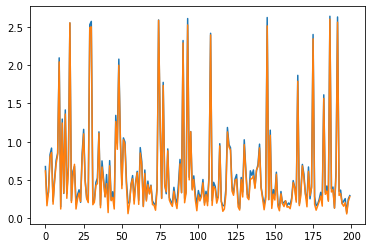

In [137]:
plt.plot(scaler2.inverse_transform(y_pred[10000:10200]))
plt.plot(scaler2.inverse_transform(y_test[10000:10200]))